In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

2023-07-20 16:11:51.652226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Density Charts

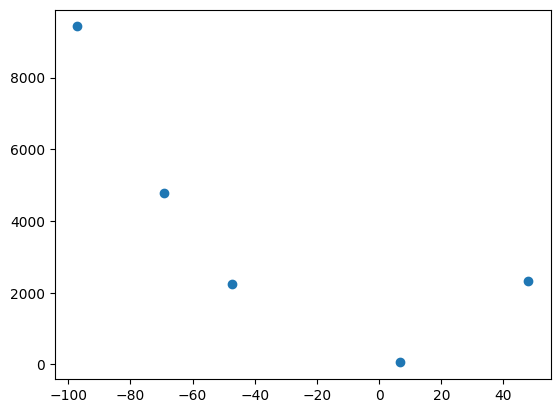

In [2]:
rng = np.random.RandomState(12)

# For the sparse parabola
num_samples = 5

x = (200 * rng.rand(num_samples)) - 100 
y = (x**2) + (rng.rand(num_samples) * 10)

column_x = x[:, np.newaxis]
plt.scatter(x, y)

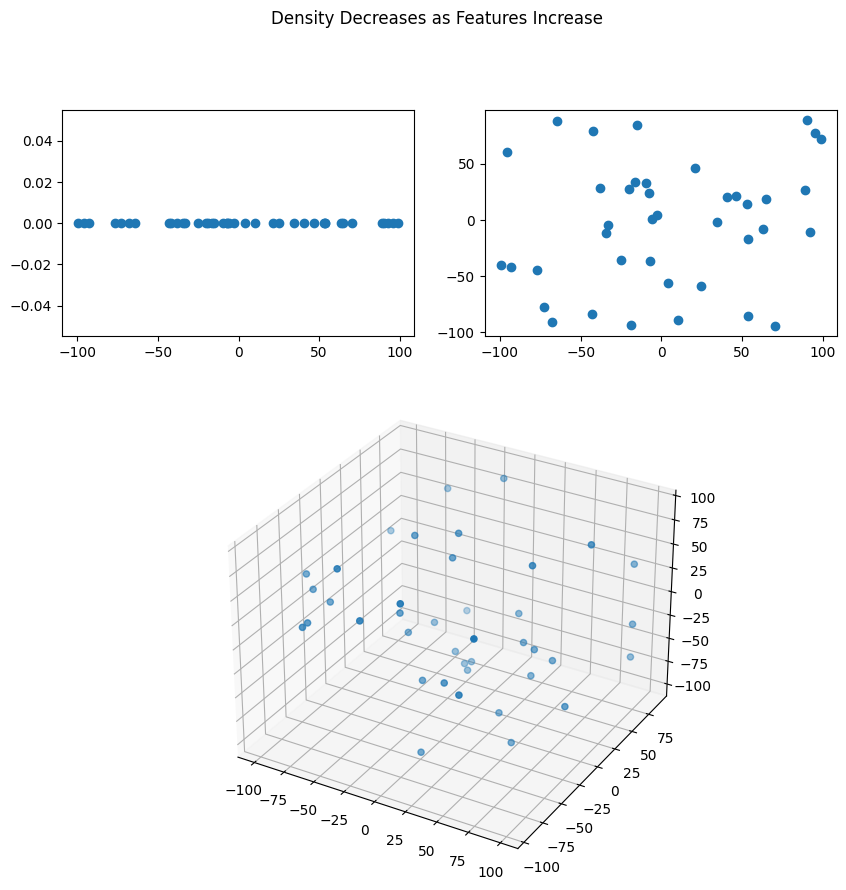

In [3]:
# For the decreasing density vs feature count

num_samples = 40
x = (200 * rng.rand(num_samples)) - 100 
y = np.zeros(num_samples)
y2 = (200 * rng.rand(num_samples)) - 100
y3 = (200 * rng.rand(num_samples)) - 100

fig = plt.figure(figsize=(10,10))
fig.suptitle('Density Decreases as Features Increase')

ax = fig.add_subplot(3, 2, 1)
ax.scatter(x, y)

ax = fig.add_subplot(3, 2, 2)
ax.scatter(x, y2)

ax = fig.add_subplot(3, 2, (3,6), projection='3d')
ax.scatter(x, y2, y3)

# For the underfitting example

63/63 [==============================] - 0s 2ms/step


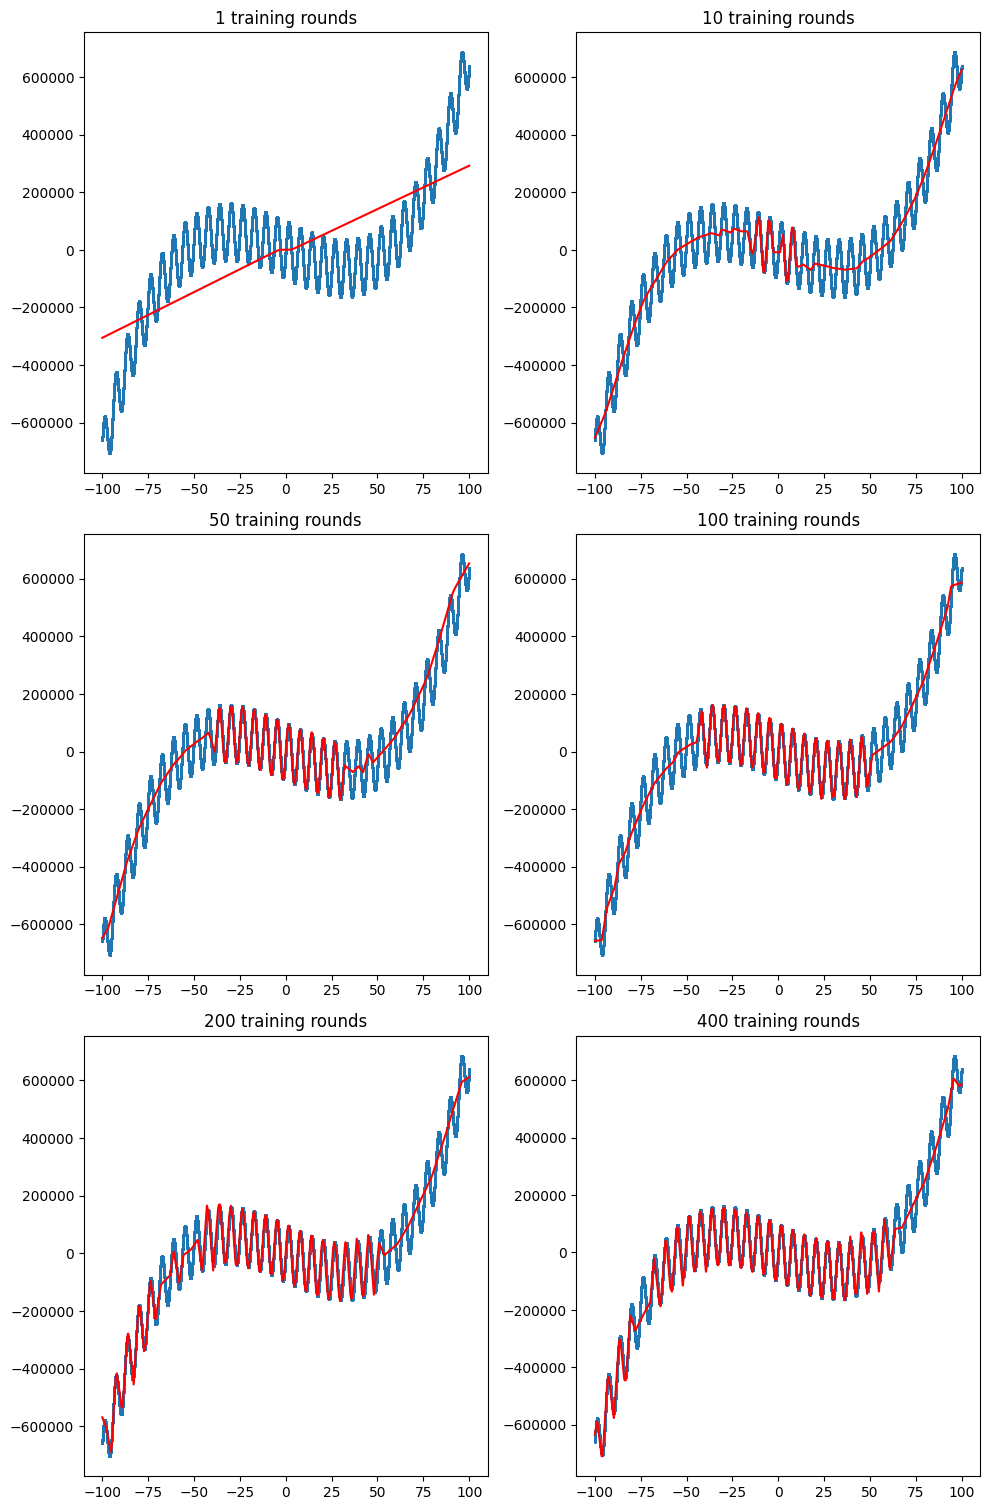

In [4]:
# For fitting the strange function over many iterations.

num_samples = 100000

x = (200 * rng.rand(num_samples)) - 100 
column_x = x[:, np.newaxis]
xfit = np.linspace(-100, 100, 2000)
y = (x**3) + (np.sin(x) * 100000) - (3000*x) - x**2

model = Sequential([
    Dense(units=500, activation='relu', input_shape=(1,)),
    Dense(units=250, activation='relu'),
    Dense(units=125, activation='relu'),
    Dense(units=125, activation='relu'),
    Dense(units=125, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(optimizer="adam", loss='mse')

subplot_n = 0
fig = plt.figure(figsize=(10, 25))
plot_at = (1, 10, 50, 100, 200, 400)
for n in range(1, 401):
    model.fit(column_x, y, batch_size=200, epochs=1, verbose=False)
    
    if n in plot_at:
        subplot_n += 1
        ax = fig.add_subplot(5, 2, subplot_n)
        yfit = model.predict(xfit[:, np.newaxis])
        ax.plot(xfit, yfit, color='red')
        ax.scatter(x, y, s=1)
        ax.set_title(f'{n} training rounds')

plt.tight_layout()        
plt.show()
    


# For the overfitting example

In [5]:
# New linear data with noise to overfit

rng = np.random.RandomState(15)
num_samples = 200

x = np.linspace(0, 100, num_samples)
y = (50*x) + ((rng.rand(num_samples) * 1000) - 500)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=55)

In [6]:
model = Sequential([
    Dense(units=2000, activation='relu', input_shape=(1,)),
    Dense(units=1000, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=1, activation='linear')
])

model.compile(optimizer="adam", loss='mse')

In [7]:
cp = ModelCheckpoint(
    'cp{epoch:02d}-{loss:.2f}',
    monitor = 'loss',
    save_best_only=True
)


model.fit(X_train, y_train, batch_size=25, epochs=50000, verbose=True, callbacks=[cp])

Epoch 1/50000
7/7 [==============================] - ETA: 0s - loss: 7379950.5000INFO:tensorflow:Assets written to: cp01-7379950.50/assets


INFO:tensorflow:Assets written to: cp01-7379950.50/assets


7/7 [==============================] - 2s 152ms/step - loss: 7379950.5000
Epoch 2/50000
7/7 [==============================] - ETA: 0s - loss: 5805170.0000INFO:tensorflow:Assets written to: cp02-5805170.00/assets


INFO:tensorflow:Assets written to: cp02-5805170.00/assets


7/7 [==============================] - 1s 118ms/step - loss: 5805170.0000
Epoch 3/50000
7/7 [==============================] - ETA: 0s - loss: 2717553.5000INFO:tensorflow:Assets written to: cp03-2717553.50/assets


INFO:tensorflow:Assets written to: cp03-2717553.50/assets


7/7 [==============================] - 1s 112ms/step - loss: 2717553.5000
Epoch 4/50000
7/7 [==============================] - ETA: 0s - loss: 376892.2188INFO:tensorflow:Assets written to: cp04-376892.22/assets


INFO:tensorflow:Assets written to: cp04-376892.22/assets


7/7 [==============================] - 1s 155ms/step - loss: 376892.2188
Epoch 5/50000
7/7 [==============================] - 0s 21ms/step - loss: 591011.3750
Epoch 6/50000
7/7 [==============================] - ETA: 0s - loss: 142993.1406INFO:tensorflow:Assets written to: cp06-142993.14/assets


INFO:tensorflow:Assets written to: cp06-142993.14/assets


7/7 [==============================] - 1s 113ms/step - loss: 142993.1406
Epoch 7/50000
7/7 [==============================] - 0s 20ms/step - loss: 229717.7812
Epoch 8/50000
6/7 [========================>.....] - ETA: 0s - loss: 97710.9766INFO:tensorflow:Assets written to: cp08-101599.66/assets


INFO:tensorflow:Assets written to: cp08-101599.66/assets


7/7 [==============================] - 1s 114ms/step - loss: 101599.6562
Epoch 9/50000
7/7 [==============================] - 0s 21ms/step - loss: 124810.3984
Epoch 10/50000
7/7 [==============================] - ETA: 0s - loss: 96585.2734INFO:tensorflow:Assets written to: cp10-96585.27/assets


INFO:tensorflow:Assets written to: cp10-96585.27/assets


7/7 [==============================] - 1s 110ms/step - loss: 96585.2734
Epoch 11/50000
7/7 [==============================] - ETA: 0s - loss: 95859.3516INFO:tensorflow:Assets written to: cp11-95859.35/assets


INFO:tensorflow:Assets written to: cp11-95859.35/assets


7/7 [==============================] - 1s 111ms/step - loss: 95859.3516
Epoch 12/50000
7/7 [==============================] - ETA: 0s - loss: 89961.2969INFO:tensorflow:Assets written to: cp12-89961.30/assets


INFO:tensorflow:Assets written to: cp12-89961.30/assets


7/7 [==============================] - 1s 110ms/step - loss: 89961.2969
Epoch 13/50000
7/7 [==============================] - 0s 20ms/step - loss: 91909.2656
Epoch 14/50000
7/7 [==============================] - 0s 24ms/step - loss: 90170.3125
Epoch 15/50000
7/7 [==============================] - 0s 24ms/step - loss: 90854.2266
Epoch 16/50000
7/7 [==============================] - ETA: 0s - loss: 88871.1172INFO:tensorflow:Assets written to: cp16-88871.12/assets


INFO:tensorflow:Assets written to: cp16-88871.12/assets


7/7 [==============================] - 1s 114ms/step - loss: 88871.1172
Epoch 17/50000
7/7 [==============================] - 0s 22ms/step - loss: 92724.7969
Epoch 18/50000
7/7 [==============================] - ETA: 0s - loss: 88575.2969INFO:tensorflow:Assets written to: cp18-88575.30/assets


INFO:tensorflow:Assets written to: cp18-88575.30/assets


7/7 [==============================] - 1s 111ms/step - loss: 88575.2969
Epoch 19/50000
7/7 [==============================] - 0s 20ms/step - loss: 92056.7812
Epoch 20/50000
7/7 [==============================] - 0s 20ms/step - loss: 90874.5391
Epoch 21/50000
7/7 [==============================] - 0s 20ms/step - loss: 90194.8906
Epoch 22/50000
7/7 [==============================] - 0s 19ms/step - loss: 89967.9766
Epoch 23/50000
7/7 [==============================] - 0s 20ms/step - loss: 91428.6719
Epoch 24/50000
7/7 [==============================] - ETA: 0s - loss: 88218.6406INFO:tensorflow:Assets written to: cp24-88218.64/assets


INFO:tensorflow:Assets written to: cp24-88218.64/assets


7/7 [==============================] - 1s 106ms/step - loss: 88218.6406
Epoch 25/50000
7/7 [==============================] - 0s 20ms/step - loss: 90492.5078
Epoch 26/50000
7/7 [==============================] - 0s 20ms/step - loss: 90245.1094
Epoch 27/50000
7/7 [==============================] - ETA: 0s - loss: 88048.9219INFO:tensorflow:Assets written to: cp27-88048.92/assets


INFO:tensorflow:Assets written to: cp27-88048.92/assets


7/7 [==============================] - 1s 110ms/step - loss: 88048.9219
Epoch 28/50000
7/7 [==============================] - 0s 23ms/step - loss: 89365.1250
Epoch 29/50000
7/7 [==============================] - 0s 25ms/step - loss: 88390.9688
Epoch 30/50000
7/7 [==============================] - 0s 24ms/step - loss: 88781.9844
Epoch 31/50000
7/7 [==============================] - 0s 23ms/step - loss: 89613.7344
Epoch 32/50000
7/7 [==============================] - 0s 22ms/step - loss: 89813.6094
Epoch 33/50000
7/7 [==============================] - 0s 25ms/step - loss: 89256.7578
Epoch 34/50000
7/7 [==============================] - 0s 25ms/step - loss: 88613.5156
Epoch 35/50000
7/7 [==============================] - 0s 20ms/step - loss: 89948.7031
Epoch 36/50000
7/7 [==============================] - 0s 21ms/step - loss: 89459.1406
Epoch 37/50000
7/7 [==============================] - 0s 20ms/step - loss: 88925.3672
Epoch 38/50000
7/7 [==============================] - 0s 20ms/step -

INFO:tensorflow:Assets written to: cp41-87964.44/assets


7/7 [==============================] - 1s 112ms/step - loss: 87964.4375
Epoch 42/50000
7/7 [==============================] - 0s 21ms/step - loss: 90265.6641
Epoch 43/50000
7/7 [==============================] - 0s 21ms/step - loss: 91956.5859
Epoch 44/50000
7/7 [==============================] - 0s 22ms/step - loss: 98923.1719
Epoch 45/50000
7/7 [==============================] - 0s 21ms/step - loss: 96137.6406
Epoch 46/50000
7/7 [==============================] - 0s 21ms/step - loss: 97238.8984
Epoch 47/50000
7/7 [==============================] - ETA: 0s - loss: 87801.6016INFO:tensorflow:Assets written to: cp47-87801.60/assets


INFO:tensorflow:Assets written to: cp47-87801.60/assets


7/7 [==============================] - 1s 154ms/step - loss: 87801.6016
Epoch 48/50000
7/7 [==============================] - 0s 21ms/step - loss: 92166.7656
Epoch 49/50000
7/7 [==============================] - 0s 22ms/step - loss: 88135.3750
Epoch 50/50000
7/7 [==============================] - 0s 21ms/step - loss: 88672.4141
Epoch 51/50000
7/7 [==============================] - 0s 21ms/step - loss: 91572.1719
Epoch 52/50000
7/7 [==============================] - 0s 26ms/step - loss: 95204.8594
Epoch 53/50000
7/7 [==============================] - 0s 26ms/step - loss: 89335.2344
Epoch 54/50000
7/7 [==============================] - 0s 25ms/step - loss: 88150.5000
Epoch 55/50000
7/7 [==============================] - 0s 26ms/step - loss: 89873.5234
Epoch 56/50000
7/7 [==============================] - ETA: 0s - loss: 87450.2500INFO:tensorflow:Assets written to: cp56-87450.25/assets


INFO:tensorflow:Assets written to: cp56-87450.25/assets


7/7 [==============================] - 1s 119ms/step - loss: 87450.2500
Epoch 57/50000
7/7 [==============================] - ETA: 0s - loss: 87226.4453INFO:tensorflow:Assets written to: cp57-87226.45/assets


INFO:tensorflow:Assets written to: cp57-87226.45/assets


7/7 [==============================] - 1s 114ms/step - loss: 87226.4453
Epoch 58/50000
7/7 [==============================] - ETA: 0s - loss: 87069.0469INFO:tensorflow:Assets written to: cp58-87069.05/assets


INFO:tensorflow:Assets written to: cp58-87069.05/assets


7/7 [==============================] - 1s 118ms/step - loss: 87069.0469
Epoch 59/50000
7/7 [==============================] - 0s 20ms/step - loss: 89024.7969
Epoch 60/50000
7/7 [==============================] - 0s 20ms/step - loss: 92873.1250
Epoch 61/50000
7/7 [==============================] - 0s 20ms/step - loss: 94909.5781
Epoch 62/50000
7/7 [==============================] - ETA: 0s - loss: 86381.3281INFO:tensorflow:Assets written to: cp62-86381.33/assets


INFO:tensorflow:Assets written to: cp62-86381.33/assets


7/7 [==============================] - 1s 113ms/step - loss: 86381.3281
Epoch 63/50000
7/7 [==============================] - 0s 24ms/step - loss: 88333.9062
Epoch 64/50000
7/7 [==============================] - 0s 25ms/step - loss: 90365.9141
Epoch 65/50000
7/7 [==============================] - 0s 25ms/step - loss: 86927.9844
Epoch 66/50000
7/7 [==============================] - 0s 24ms/step - loss: 88015.9219
Epoch 67/50000
7/7 [==============================] - 0s 24ms/step - loss: 87082.2500
Epoch 68/50000
7/7 [==============================] - 0s 25ms/step - loss: 87578.7891
Epoch 69/50000
7/7 [==============================] - 0s 24ms/step - loss: 86868.9375
Epoch 70/50000
7/7 [==============================] - 0s 25ms/step - loss: 87385.3438
Epoch 71/50000
7/7 [==============================] - 0s 26ms/step - loss: 86399.7969
Epoch 72/50000
7/7 [==============================] - 0s 24ms/step - loss: 90134.1484
Epoch 73/50000
7/7 [==============================] - 0s 25ms/step -

INFO:tensorflow:Assets written to: cp120-86210.88/assets


7/7 [==============================] - 1s 116ms/step - loss: 86210.8750
Epoch 121/50000
7/7 [==============================] - 0s 21ms/step - loss: 86610.3594
Epoch 122/50000
7/7 [==============================] - 0s 23ms/step - loss: 87264.0547
Epoch 123/50000
7/7 [==============================] - 0s 25ms/step - loss: 86468.5391
Epoch 124/50000
7/7 [==============================] - 0s 24ms/step - loss: 87085.2656
Epoch 125/50000
7/7 [==============================] - 0s 25ms/step - loss: 88054.6250
Epoch 126/50000
7/7 [==============================] - 0s 25ms/step - loss: 87407.7500
Epoch 127/50000
7/7 [==============================] - 0s 24ms/step - loss: 87402.7109
Epoch 128/50000
7/7 [==============================] - 0s 25ms/step - loss: 88926.0469
Epoch 129/50000
7/7 [==============================] - 0s 25ms/step - loss: 86593.9141
Epoch 130/50000
7/7 [==============================] - 0s 24ms/step - loss: 89274.4531
Epoch 131/50000
7/7 [==============================] - 0s 

INFO:tensorflow:Assets written to: cp164-86090.27/assets


7/7 [==============================] - 1s 113ms/step - loss: 86090.2656
Epoch 165/50000
7/7 [==============================] - 0s 22ms/step - loss: 90376.1094
Epoch 166/50000
7/7 [==============================] - 0s 25ms/step - loss: 98793.4531
Epoch 167/50000
7/7 [==============================] - 0s 24ms/step - loss: 87201.7188
Epoch 168/50000
7/7 [==============================] - 0s 24ms/step - loss: 87091.6250
Epoch 169/50000
7/7 [==============================] - 0s 25ms/step - loss: 86340.9062
Epoch 170/50000
7/7 [==============================] - 0s 24ms/step - loss: 87609.0156
Epoch 171/50000
7/7 [==============================] - 0s 25ms/step - loss: 96425.9609
Epoch 172/50000
7/7 [==============================] - 0s 25ms/step - loss: 96235.9062
Epoch 173/50000
7/7 [==============================] - 0s 24ms/step - loss: 103450.5703
Epoch 174/50000
7/7 [==============================] - 0s 24ms/step - loss: 113568.5469
Epoch 175/50000
7/7 [==============================] - 0

INFO:tensorflow:Assets written to: cp182-86072.34/assets


7/7 [==============================] - 1s 112ms/step - loss: 86072.3359
Epoch 183/50000
7/7 [==============================] - 0s 23ms/step - loss: 91871.5234
Epoch 184/50000
7/7 [==============================] - 0s 23ms/step - loss: 93627.7969
Epoch 185/50000
7/7 [==============================] - 0s 24ms/step - loss: 88909.2031
Epoch 186/50000
7/7 [==============================] - 0s 23ms/step - loss: 93130.0469
Epoch 187/50000
7/7 [==============================] - 0s 24ms/step - loss: 90956.0156
Epoch 188/50000
7/7 [==============================] - 0s 25ms/step - loss: 88488.4375
Epoch 189/50000
7/7 [==============================] - 0s 23ms/step - loss: 94288.6406
Epoch 190/50000
7/7 [==============================] - 0s 24ms/step - loss: 92441.7188
Epoch 191/50000
7/7 [==============================] - 0s 24ms/step - loss: 87073.4844
Epoch 192/50000
7/7 [==============================] - 0s 24ms/step - loss: 88054.4766
Epoch 193/50000
7/7 [==============================] - 0s 

INFO:tensorflow:Assets written to: cp195-85215.95/assets


7/7 [==============================] - 1s 109ms/step - loss: 85215.9453
Epoch 196/50000
7/7 [==============================] - 0s 23ms/step - loss: 86418.7344
Epoch 197/50000
7/7 [==============================] - 0s 24ms/step - loss: 87045.0234
Epoch 198/50000
7/7 [==============================] - 0s 23ms/step - loss: 88679.5781
Epoch 199/50000
7/7 [==============================] - 0s 24ms/step - loss: 104346.5078
Epoch 200/50000
7/7 [==============================] - 0s 25ms/step - loss: 103933.7031
Epoch 201/50000
7/7 [==============================] - 0s 23ms/step - loss: 137907.8438
Epoch 202/50000
7/7 [==============================] - 0s 23ms/step - loss: 135482.2812
Epoch 203/50000
7/7 [==============================] - 0s 24ms/step - loss: 97883.9922
Epoch 204/50000
7/7 [==============================] - 0s 20ms/step - loss: 89104.7812
Epoch 205/50000
7/7 [==============================] - 0s 20ms/step - loss: 85865.4375
Epoch 206/50000
7/7 [==============================] -

INFO:tensorflow:Assets written to: cp218-84586.76/assets


7/7 [==============================] - 1s 107ms/step - loss: 84586.7578
Epoch 219/50000
7/7 [==============================] - 0s 20ms/step - loss: 86685.0781
Epoch 220/50000
7/7 [==============================] - 0s 20ms/step - loss: 90166.2734
Epoch 221/50000
7/7 [==============================] - 0s 20ms/step - loss: 88358.0625
Epoch 222/50000
7/7 [==============================] - 0s 20ms/step - loss: 85337.3281
Epoch 223/50000
7/7 [==============================] - 0s 20ms/step - loss: 97433.8594
Epoch 224/50000
7/7 [==============================] - 0s 22ms/step - loss: 93538.6406
Epoch 225/50000
7/7 [==============================] - 0s 25ms/step - loss: 103330.0625
Epoch 226/50000
7/7 [==============================] - 0s 24ms/step - loss: 88597.7656
Epoch 227/50000
7/7 [==============================] - 0s 24ms/step - loss: 91731.6094
Epoch 228/50000
7/7 [==============================] - ETA: 0s - loss: 84254.3672INFO:tensorflow:Assets written to: cp228-84254.37/assets


INFO:tensorflow:Assets written to: cp228-84254.37/assets


7/7 [==============================] - 1s 147ms/step - loss: 84254.3672
Epoch 229/50000
7/7 [==============================] - 0s 21ms/step - loss: 93375.7500
Epoch 230/50000
7/7 [==============================] - 0s 22ms/step - loss: 92428.0781
Epoch 231/50000
7/7 [==============================] - 0s 20ms/step - loss: 93972.1406
Epoch 232/50000
7/7 [==============================] - 0s 21ms/step - loss: 100685.5469
Epoch 233/50000
7/7 [==============================] - 0s 24ms/step - loss: 125929.5625
Epoch 234/50000
7/7 [==============================] - 0s 25ms/step - loss: 105071.8984
Epoch 235/50000
7/7 [==============================] - 0s 26ms/step - loss: 103898.4531
Epoch 236/50000
7/7 [==============================] - 0s 27ms/step - loss: 89328.2578
Epoch 237/50000
7/7 [==============================] - 0s 27ms/step - loss: 97112.3984
Epoch 238/50000
7/7 [==============================] - 0s 26ms/step - loss: 95799.0625
Epoch 239/50000
7/7 [==============================] -

INFO:tensorflow:Assets written to: cp242-83383.09/assets


7/7 [==============================] - 1s 111ms/step - loss: 83383.0938
Epoch 243/50000
7/7 [==============================] - 0s 20ms/step - loss: 94421.1172
Epoch 244/50000
7/7 [==============================] - 0s 20ms/step - loss: 85472.8672
Epoch 245/50000
7/7 [==============================] - 0s 20ms/step - loss: 90452.2188
Epoch 246/50000
7/7 [==============================] - 0s 20ms/step - loss: 86083.7031
Epoch 247/50000
7/7 [==============================] - 0s 20ms/step - loss: 85610.3359
Epoch 248/50000
7/7 [==============================] - 0s 20ms/step - loss: 85803.9219
Epoch 249/50000
7/7 [==============================] - 0s 20ms/step - loss: 93023.1719
Epoch 250/50000
7/7 [==============================] - 0s 24ms/step - loss: 86616.9766
Epoch 251/50000
7/7 [==============================] - 0s 25ms/step - loss: 86636.3125
Epoch 252/50000
7/7 [==============================] - 0s 25ms/step - loss: 88114.6641
Epoch 253/50000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 24ms/step - loss: 84332.4844
Epoch 337/50000
7/7 [==============================] - 0s 24ms/step - loss: 91400.4688
Epoch 338/50000
7/7 [==============================] - 0s 24ms/step - loss: 84814.9062
Epoch 339/50000
7/7 [==============================] - 0s 25ms/step - loss: 86418.5625
Epoch 340/50000
7/7 [==============================] - 0s 25ms/step - loss: 92484.8594
Epoch 341/50000
7/7 [==============================] - 0s 25ms/step - loss: 85796.5469
Epoch 342/50000
7/7 [==============================] - 0s 24ms/step - loss: 84344.0625
Epoch 343/50000
7/7 [==============================] - 0s 25ms/step - loss: 91243.5625
Epoch 344/50000
7/7 [==============================] - 0s 25ms/step - loss: 89855.1719
Epoch 345/50000
7/7 [==============================] - 0s 25ms/step - loss: 87573.8281
Epoch 346/50000
7/7 [==============================] - 0s 25ms/step - loss: 94160.3984
Epoch 347/50000
7/7 [==============================] - 0s 2

INFO:tensorflow:Assets written to: cp381-82904.78/assets


7/7 [==============================] - 1s 109ms/step - loss: 82904.7812
Epoch 382/50000
7/7 [==============================] - 0s 22ms/step - loss: 88448.3594
Epoch 383/50000
7/7 [==============================] - 0s 21ms/step - loss: 95525.5703
Epoch 384/50000
7/7 [==============================] - 0s 25ms/step - loss: 105986.9531
Epoch 385/50000
7/7 [==============================] - 0s 26ms/step - loss: 122847.1406
Epoch 386/50000
7/7 [==============================] - 0s 26ms/step - loss: 126515.3906
Epoch 387/50000
7/7 [==============================] - 0s 26ms/step - loss: 99662.5938
Epoch 388/50000
7/7 [==============================] - 0s 26ms/step - loss: 95097.1641
Epoch 389/50000
7/7 [==============================] - 0s 25ms/step - loss: 91845.8203
Epoch 390/50000
7/7 [==============================] - 0s 25ms/step - loss: 86082.2969
Epoch 391/50000
7/7 [==============================] - 0s 25ms/step - loss: 90068.6484
Epoch 392/50000
7/7 [==============================] - 

INFO:tensorflow:Assets written to: cp452-80807.23/assets


7/7 [==============================] - 1s 110ms/step - loss: 80807.2344
Epoch 453/50000
7/7 [==============================] - 0s 24ms/step - loss: 87571.6016
Epoch 454/50000
7/7 [==============================] - 0s 25ms/step - loss: 97251.7656
Epoch 455/50000
7/7 [==============================] - 0s 24ms/step - loss: 83676.9297
Epoch 456/50000
7/7 [==============================] - 0s 25ms/step - loss: 83944.3359
Epoch 457/50000
7/7 [==============================] - 0s 25ms/step - loss: 84650.4844
Epoch 458/50000
7/7 [==============================] - 0s 24ms/step - loss: 85186.6562
Epoch 459/50000
7/7 [==============================] - 0s 23ms/step - loss: 84472.0703
Epoch 460/50000
7/7 [==============================] - 0s 20ms/step - loss: 85255.2344
Epoch 461/50000
7/7 [==============================] - 0s 21ms/step - loss: 83839.4531
Epoch 462/50000
7/7 [==============================] - 0s 21ms/step - loss: 85543.8047
Epoch 463/50000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 25ms/step - loss: 88231.5781
Epoch 547/50000
7/7 [==============================] - 0s 25ms/step - loss: 96643.7656
Epoch 548/50000
7/7 [==============================] - 0s 25ms/step - loss: 88794.4531
Epoch 549/50000
7/7 [==============================] - 0s 24ms/step - loss: 87285.1953
Epoch 550/50000
7/7 [==============================] - 0s 25ms/step - loss: 91512.1953
Epoch 551/50000
7/7 [==============================] - 0s 24ms/step - loss: 85713.9219
Epoch 552/50000
7/7 [==============================] - 0s 24ms/step - loss: 86572.8281
Epoch 553/50000
7/7 [==============================] - 0s 24ms/step - loss: 84489.7891
Epoch 554/50000
7/7 [==============================] - 0s 25ms/step - loss: 84411.2109
Epoch 555/50000
7/7 [==============================] - 0s 24ms/step - loss: 86480.0000
Epoch 556/50000
7/7 [==============================] - 0s 24ms/step - loss: 85945.7500
Epoch 557/50000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 24ms/step - loss: 94845.8906
Epoch 641/50000
7/7 [==============================] - 0s 25ms/step - loss: 86476.8281
Epoch 642/50000
7/7 [==============================] - 0s 24ms/step - loss: 85357.3828
Epoch 643/50000
7/7 [==============================] - 0s 20ms/step - loss: 89765.0625
Epoch 644/50000
7/7 [==============================] - 0s 20ms/step - loss: 93231.1641
Epoch 645/50000
7/7 [==============================] - 0s 21ms/step - loss: 87191.7656
Epoch 646/50000
7/7 [==============================] - 0s 20ms/step - loss: 86113.4375
Epoch 647/50000
7/7 [==============================] - 0s 22ms/step - loss: 83132.8047
Epoch 648/50000
7/7 [==============================] - 0s 24ms/step - loss: 86448.3125
Epoch 649/50000
7/7 [==============================] - 0s 24ms/step - loss: 90814.0234
Epoch 650/50000
7/7 [==============================] - 0s 22ms/step - loss: 92997.5156
Epoch 651/50000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 24ms/step - loss: 82446.0469
Epoch 735/50000
7/7 [==============================] - 0s 24ms/step - loss: 86920.1406
Epoch 736/50000
7/7 [==============================] - 0s 24ms/step - loss: 85033.4219
Epoch 737/50000
7/7 [==============================] - 0s 24ms/step - loss: 84759.4766
Epoch 738/50000
7/7 [==============================] - 0s 23ms/step - loss: 83889.4844
Epoch 739/50000
7/7 [==============================] - 0s 24ms/step - loss: 83931.0781
Epoch 740/50000
7/7 [==============================] - 0s 24ms/step - loss: 86033.6484
Epoch 741/50000
7/7 [==============================] - 0s 23ms/step - loss: 87247.6719
Epoch 742/50000
7/7 [==============================] - 0s 24ms/step - loss: 87413.0781
Epoch 743/50000
7/7 [==============================] - 0s 24ms/step - loss: 83863.6016
Epoch 744/50000
7/7 [==============================] - 0s 24ms/step - loss: 84267.9688
Epoch 745/50000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 24ms/step - loss: 96387.0312
Epoch 829/50000
7/7 [==============================] - 0s 24ms/step - loss: 98322.3203
Epoch 830/50000
7/7 [==============================] - 0s 23ms/step - loss: 89752.9922
Epoch 831/50000
7/7 [==============================] - 0s 24ms/step - loss: 93222.0078
Epoch 832/50000
7/7 [==============================] - 0s 25ms/step - loss: 90561.2109
Epoch 833/50000
7/7 [==============================] - 0s 24ms/step - loss: 91713.7969
Epoch 834/50000
7/7 [==============================] - 0s 24ms/step - loss: 84972.6562
Epoch 835/50000
7/7 [==============================] - 0s 23ms/step - loss: 88405.4375
Epoch 836/50000
7/7 [==============================] - 0s 24ms/step - loss: 92921.0859
Epoch 837/50000
7/7 [==============================] - 0s 24ms/step - loss: 87601.5000
Epoch 838/50000
7/7 [==============================] - 0s 24ms/step - loss: 99384.1094
Epoch 839/50000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 23ms/step - loss: 90596.6953
Epoch 923/50000
7/7 [==============================] - 0s 24ms/step - loss: 87372.9844
Epoch 924/50000
7/7 [==============================] - 0s 23ms/step - loss: 84030.7656
Epoch 925/50000
7/7 [==============================] - 0s 24ms/step - loss: 87509.9141
Epoch 926/50000
7/7 [==============================] - 0s 25ms/step - loss: 84587.2891
Epoch 927/50000
7/7 [==============================] - 0s 24ms/step - loss: 82305.7344
Epoch 928/50000
7/7 [==============================] - 0s 23ms/step - loss: 83377.3281
Epoch 929/50000
7/7 [==============================] - 0s 24ms/step - loss: 95678.0781
Epoch 930/50000
7/7 [==============================] - 0s 24ms/step - loss: 89993.2578
Epoch 931/50000
7/7 [==============================] - 0s 24ms/step - loss: 86998.9766
Epoch 932/50000
7/7 [==============================] - 0s 24ms/step - loss: 84260.6328
Epoch 933/50000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 24ms/step - loss: 86299.4062
Epoch 1017/50000
7/7 [==============================] - 0s 23ms/step - loss: 84437.8047
Epoch 1018/50000
7/7 [==============================] - 0s 23ms/step - loss: 86120.5469
Epoch 1019/50000
7/7 [==============================] - 0s 24ms/step - loss: 83626.8281
Epoch 1020/50000
7/7 [==============================] - 0s 24ms/step - loss: 87324.4531
Epoch 1021/50000
7/7 [==============================] - 0s 23ms/step - loss: 84703.6094
Epoch 1022/50000
7/7 [==============================] - 0s 24ms/step - loss: 84420.7031
Epoch 1023/50000
7/7 [==============================] - 0s 20ms/step - loss: 84266.8906
Epoch 1024/50000
7/7 [==============================] - 0s 21ms/step - loss: 84138.2969
Epoch 1025/50000
7/7 [==============================] - 0s 21ms/step - loss: 83531.6719
Epoch 1026/50000
7/7 [==============================] - 0s 24ms/step - loss: 89721.1172
Epoch 1027/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 88046.2969
Epoch 1110/50000
7/7 [==============================] - 0s 24ms/step - loss: 91698.4609
Epoch 1111/50000
7/7 [==============================] - 0s 24ms/step - loss: 91507.6484
Epoch 1112/50000
7/7 [==============================] - 0s 23ms/step - loss: 98347.8359
Epoch 1113/50000
7/7 [==============================] - 0s 23ms/step - loss: 99068.9141
Epoch 1114/50000
7/7 [==============================] - 0s 24ms/step - loss: 102020.1094
Epoch 1115/50000
7/7 [==============================] - 0s 23ms/step - loss: 90599.3984
Epoch 1116/50000
7/7 [==============================] - 0s 23ms/step - loss: 86956.6875
Epoch 1117/50000
7/7 [==============================] - 0s 23ms/step - loss: 83836.6406
Epoch 1118/50000
7/7 [==============================] - 0s 24ms/step - loss: 83458.2812
Epoch 1119/50000
7/7 [==============================] - 0s 23ms/step - loss: 84495.9609
Epoch 1120/50000
7/7 [==========================

7/7 [==============================] - 0s 24ms/step - loss: 87666.2422
Epoch 1203/50000
7/7 [==============================] - 0s 20ms/step - loss: 86802.0859
Epoch 1204/50000
7/7 [==============================] - 0s 19ms/step - loss: 89962.8516
Epoch 1205/50000
7/7 [==============================] - 0s 19ms/step - loss: 90380.2500
Epoch 1206/50000
7/7 [==============================] - 0s 19ms/step - loss: 96685.3828
Epoch 1207/50000
7/7 [==============================] - 0s 19ms/step - loss: 99049.4453
Epoch 1208/50000
7/7 [==============================] - 0s 20ms/step - loss: 107750.4609
Epoch 1209/50000
7/7 [==============================] - 0s 19ms/step - loss: 93780.9922
Epoch 1210/50000
7/7 [==============================] - 0s 19ms/step - loss: 96610.3906
Epoch 1211/50000
7/7 [==============================] - 0s 19ms/step - loss: 87660.1250
Epoch 1212/50000
7/7 [==============================] - 0s 19ms/step - loss: 86884.5469
Epoch 1213/50000
7/7 [==========================

7/7 [==============================] - 0s 23ms/step - loss: 89294.1719
Epoch 1296/50000
7/7 [==============================] - 0s 24ms/step - loss: 86865.4219
Epoch 1297/50000
7/7 [==============================] - 0s 23ms/step - loss: 83177.3906
Epoch 1298/50000
7/7 [==============================] - 0s 23ms/step - loss: 88060.5703
Epoch 1299/50000
7/7 [==============================] - 0s 24ms/step - loss: 85876.7500
Epoch 1300/50000
7/7 [==============================] - 0s 23ms/step - loss: 84684.2188
Epoch 1301/50000
7/7 [==============================] - 0s 23ms/step - loss: 85306.2578
Epoch 1302/50000
7/7 [==============================] - 0s 23ms/step - loss: 83876.1797
Epoch 1303/50000
7/7 [==============================] - 0s 24ms/step - loss: 85033.0312
Epoch 1304/50000
7/7 [==============================] - 0s 24ms/step - loss: 85854.6328
Epoch 1305/50000
7/7 [==============================] - 0s 24ms/step - loss: 85657.3828
Epoch 1306/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 87162.6094
Epoch 1389/50000
7/7 [==============================] - 0s 24ms/step - loss: 83040.7969
Epoch 1390/50000
7/7 [==============================] - 0s 23ms/step - loss: 84496.9688
Epoch 1391/50000
7/7 [==============================] - 0s 24ms/step - loss: 86572.7266
Epoch 1392/50000
7/7 [==============================] - 0s 23ms/step - loss: 84301.4062
Epoch 1393/50000
7/7 [==============================] - 0s 24ms/step - loss: 85062.0234
Epoch 1394/50000
7/7 [==============================] - 0s 24ms/step - loss: 83694.9062
Epoch 1395/50000
7/7 [==============================] - 0s 24ms/step - loss: 82540.1484
Epoch 1396/50000
7/7 [==============================] - 0s 23ms/step - loss: 82850.0000
Epoch 1397/50000
7/7 [==============================] - 0s 24ms/step - loss: 85541.5469
Epoch 1398/50000
7/7 [==============================] - 0s 24ms/step - loss: 92042.9531
Epoch 1399/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 82689.7734
Epoch 1482/50000
7/7 [==============================] - 0s 24ms/step - loss: 83597.7031
Epoch 1483/50000
7/7 [==============================] - 0s 24ms/step - loss: 83194.9297
Epoch 1484/50000
7/7 [==============================] - 0s 24ms/step - loss: 85371.1562
Epoch 1485/50000
7/7 [==============================] - 0s 23ms/step - loss: 88106.7188
Epoch 1486/50000
7/7 [==============================] - 0s 23ms/step - loss: 87732.5000
Epoch 1487/50000
7/7 [==============================] - 0s 23ms/step - loss: 83833.3047
Epoch 1488/50000
7/7 [==============================] - 0s 24ms/step - loss: 84158.0234
Epoch 1489/50000
7/7 [==============================] - 0s 24ms/step - loss: 83658.7500
Epoch 1490/50000
7/7 [==============================] - 0s 24ms/step - loss: 84041.6484
Epoch 1491/50000
7/7 [==============================] - 0s 23ms/step - loss: 84493.1094
Epoch 1492/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 86536.5234
Epoch 1575/50000
7/7 [==============================] - 0s 23ms/step - loss: 85152.3828
Epoch 1576/50000
7/7 [==============================] - 0s 23ms/step - loss: 88024.5391
Epoch 1577/50000
7/7 [==============================] - 0s 23ms/step - loss: 85959.2500
Epoch 1578/50000
7/7 [==============================] - 0s 24ms/step - loss: 94799.4844
Epoch 1579/50000
7/7 [==============================] - 0s 23ms/step - loss: 102873.0469
Epoch 1580/50000
7/7 [==============================] - 0s 23ms/step - loss: 104080.6875
Epoch 1581/50000
7/7 [==============================] - 0s 23ms/step - loss: 87346.0312
Epoch 1582/50000
7/7 [==============================] - 0s 23ms/step - loss: 87062.9062
Epoch 1583/50000
7/7 [==============================] - 0s 24ms/step - loss: 84527.9219
Epoch 1584/50000
7/7 [==============================] - 0s 23ms/step - loss: 86490.2188
Epoch 1585/50000
7/7 [=========================

7/7 [==============================] - 0s 23ms/step - loss: 85261.6016
Epoch 1668/50000
7/7 [==============================] - 0s 23ms/step - loss: 83761.8906
Epoch 1669/50000
7/7 [==============================] - 0s 24ms/step - loss: 84677.0859
Epoch 1670/50000
7/7 [==============================] - 0s 24ms/step - loss: 84809.4062
Epoch 1671/50000
7/7 [==============================] - 0s 23ms/step - loss: 83901.0156
Epoch 1672/50000
7/7 [==============================] - 0s 23ms/step - loss: 85252.8984
Epoch 1673/50000
7/7 [==============================] - 0s 23ms/step - loss: 89825.4609
Epoch 1674/50000
7/7 [==============================] - 0s 23ms/step - loss: 90401.2266
Epoch 1675/50000
7/7 [==============================] - 0s 23ms/step - loss: 86560.5859
Epoch 1676/50000
7/7 [==============================] - 0s 23ms/step - loss: 84927.2188
Epoch 1677/50000
7/7 [==============================] - 0s 23ms/step - loss: 84218.5469
Epoch 1678/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 84529.3906
Epoch 1761/50000
7/7 [==============================] - 0s 24ms/step - loss: 84542.6094
Epoch 1762/50000
7/7 [==============================] - 0s 24ms/step - loss: 88127.1953
Epoch 1763/50000
7/7 [==============================] - 0s 24ms/step - loss: 90087.1328
Epoch 1764/50000
7/7 [==============================] - 0s 23ms/step - loss: 90170.9531
Epoch 1765/50000
7/7 [==============================] - 0s 24ms/step - loss: 85176.0078
Epoch 1766/50000
7/7 [==============================] - 0s 24ms/step - loss: 85235.0391
Epoch 1767/50000
7/7 [==============================] - 0s 24ms/step - loss: 83612.2031
Epoch 1768/50000
7/7 [==============================] - 0s 24ms/step - loss: 83832.3594
Epoch 1769/50000
7/7 [==============================] - 0s 24ms/step - loss: 89616.8281
Epoch 1770/50000
7/7 [==============================] - 0s 24ms/step - loss: 85743.9844
Epoch 1771/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 97870.5781
Epoch 1854/50000
7/7 [==============================] - 0s 23ms/step - loss: 90638.7656
Epoch 1855/50000
7/7 [==============================] - 0s 23ms/step - loss: 95782.2031
Epoch 1856/50000
7/7 [==============================] - 0s 23ms/step - loss: 89127.4219
Epoch 1857/50000
7/7 [==============================] - 0s 23ms/step - loss: 85816.0078
Epoch 1858/50000
7/7 [==============================] - 0s 23ms/step - loss: 83766.2656
Epoch 1859/50000
7/7 [==============================] - 0s 23ms/step - loss: 84195.2656
Epoch 1860/50000
7/7 [==============================] - 0s 22ms/step - loss: 86442.6953
Epoch 1861/50000
7/7 [==============================] - 0s 24ms/step - loss: 85925.3516
Epoch 1862/50000
7/7 [==============================] - 0s 25ms/step - loss: 84515.5781
Epoch 1863/50000
7/7 [==============================] - 0s 25ms/step - loss: 86955.3281
Epoch 1864/50000
7/7 [===========================

7/7 [==============================] - 0s 22ms/step - loss: 83537.3672
Epoch 1947/50000
7/7 [==============================] - 0s 23ms/step - loss: 84466.7891
Epoch 1948/50000
7/7 [==============================] - 0s 23ms/step - loss: 84541.2812
Epoch 1949/50000
7/7 [==============================] - 0s 23ms/step - loss: 88168.7656
Epoch 1950/50000
7/7 [==============================] - 0s 23ms/step - loss: 95327.4766
Epoch 1951/50000
7/7 [==============================] - 0s 23ms/step - loss: 88878.4766
Epoch 1952/50000
7/7 [==============================] - 0s 24ms/step - loss: 89221.1797
Epoch 1953/50000
7/7 [==============================] - 0s 26ms/step - loss: 84353.3438
Epoch 1954/50000
7/7 [==============================] - 0s 22ms/step - loss: 86116.5156
Epoch 1955/50000
7/7 [==============================] - 0s 26ms/step - loss: 85098.8281
Epoch 1956/50000
7/7 [==============================] - 0s 24ms/step - loss: 88834.7891
Epoch 1957/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 84976.3984
Epoch 2040/50000
7/7 [==============================] - 0s 23ms/step - loss: 83967.8594
Epoch 2041/50000
7/7 [==============================] - 0s 24ms/step - loss: 88667.2656
Epoch 2042/50000
7/7 [==============================] - 0s 25ms/step - loss: 91917.7422
Epoch 2043/50000
7/7 [==============================] - 0s 24ms/step - loss: 88023.1250
Epoch 2044/50000
7/7 [==============================] - 0s 24ms/step - loss: 90999.0781
Epoch 2045/50000
7/7 [==============================] - 0s 24ms/step - loss: 89302.6484
Epoch 2046/50000
7/7 [==============================] - 0s 24ms/step - loss: 82978.9297
Epoch 2047/50000
7/7 [==============================] - 0s 24ms/step - loss: 84453.4844
Epoch 2048/50000
7/7 [==============================] - 0s 24ms/step - loss: 84621.2891
Epoch 2049/50000
7/7 [==============================] - 0s 25ms/step - loss: 86949.5078
Epoch 2050/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 88666.0781
Epoch 2133/50000
7/7 [==============================] - 0s 24ms/step - loss: 83591.8281
Epoch 2134/50000
7/7 [==============================] - 0s 24ms/step - loss: 83729.6641
Epoch 2135/50000
7/7 [==============================] - 0s 23ms/step - loss: 84755.0312
Epoch 2136/50000
7/7 [==============================] - 0s 23ms/step - loss: 92929.9766
Epoch 2137/50000
7/7 [==============================] - 0s 23ms/step - loss: 88798.3906
Epoch 2138/50000
7/7 [==============================] - 0s 24ms/step - loss: 87598.3047
Epoch 2139/50000
7/7 [==============================] - 0s 23ms/step - loss: 93539.7266
Epoch 2140/50000
7/7 [==============================] - 0s 24ms/step - loss: 86925.3594
Epoch 2141/50000
7/7 [==============================] - 0s 24ms/step - loss: 85434.4219
Epoch 2142/50000
7/7 [==============================] - 0s 23ms/step - loss: 83853.3594
Epoch 2143/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 86135.3594
Epoch 2226/50000
7/7 [==============================] - 0s 24ms/step - loss: 85624.9219
Epoch 2227/50000
7/7 [==============================] - 0s 24ms/step - loss: 83895.9531
Epoch 2228/50000
7/7 [==============================] - 0s 24ms/step - loss: 84608.5000
Epoch 2229/50000
7/7 [==============================] - 0s 23ms/step - loss: 85662.4922
Epoch 2230/50000
7/7 [==============================] - 0s 24ms/step - loss: 83695.1719
Epoch 2231/50000
7/7 [==============================] - 0s 23ms/step - loss: 85003.5312
Epoch 2232/50000
7/7 [==============================] - 0s 23ms/step - loss: 83514.9844
Epoch 2233/50000
7/7 [==============================] - 0s 24ms/step - loss: 86127.5547
Epoch 2234/50000
7/7 [==============================] - 0s 24ms/step - loss: 86640.4531
Epoch 2235/50000
7/7 [==============================] - 0s 23ms/step - loss: 82703.2031
Epoch 2236/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 82869.1484
Epoch 2319/50000
7/7 [==============================] - 0s 23ms/step - loss: 83330.3359
Epoch 2320/50000
7/7 [==============================] - 0s 23ms/step - loss: 86947.4375
Epoch 2321/50000
7/7 [==============================] - 0s 23ms/step - loss: 85984.9531
Epoch 2322/50000
7/7 [==============================] - 0s 23ms/step - loss: 84157.2812
Epoch 2323/50000
7/7 [==============================] - 0s 24ms/step - loss: 86373.5156
Epoch 2324/50000
7/7 [==============================] - 0s 24ms/step - loss: 88750.7344
Epoch 2325/50000
7/7 [==============================] - 0s 24ms/step - loss: 87393.3750
Epoch 2326/50000
7/7 [==============================] - 0s 23ms/step - loss: 83428.5391
Epoch 2327/50000
7/7 [==============================] - 0s 24ms/step - loss: 82826.1719
Epoch 2328/50000
7/7 [==============================] - 0s 24ms/step - loss: 87866.2109
Epoch 2329/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 83571.7891
Epoch 2412/50000
7/7 [==============================] - 0s 25ms/step - loss: 84042.8281
Epoch 2413/50000
7/7 [==============================] - 0s 24ms/step - loss: 85326.4219
Epoch 2414/50000
7/7 [==============================] - 0s 25ms/step - loss: 85708.7656
Epoch 2415/50000
7/7 [==============================] - 0s 24ms/step - loss: 92221.6094
Epoch 2416/50000
7/7 [==============================] - 0s 24ms/step - loss: 83879.6016
Epoch 2417/50000
7/7 [==============================] - 0s 24ms/step - loss: 83519.6016
Epoch 2418/50000
7/7 [==============================] - 0s 26ms/step - loss: 83285.5781
Epoch 2419/50000
7/7 [==============================] - 0s 23ms/step - loss: 83120.5781
Epoch 2420/50000
7/7 [==============================] - 0s 25ms/step - loss: 83820.0000
Epoch 2421/50000
7/7 [==============================] - 0s 24ms/step - loss: 83909.8438
Epoch 2422/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 84883.6875
Epoch 2505/50000
7/7 [==============================] - 0s 24ms/step - loss: 86590.1016
Epoch 2506/50000
7/7 [==============================] - 0s 24ms/step - loss: 83413.9375
Epoch 2507/50000
7/7 [==============================] - 0s 27ms/step - loss: 85803.9609
Epoch 2508/50000
7/7 [==============================] - 0s 22ms/step - loss: 89148.3516
Epoch 2509/50000
7/7 [==============================] - 0s 21ms/step - loss: 83637.8750
Epoch 2510/50000
7/7 [==============================] - 0s 22ms/step - loss: 83434.7969
Epoch 2511/50000
7/7 [==============================] - 0s 24ms/step - loss: 88660.3281
Epoch 2512/50000
7/7 [==============================] - 0s 24ms/step - loss: 84550.5781
Epoch 2513/50000
7/7 [==============================] - 0s 24ms/step - loss: 84805.0156
Epoch 2514/50000
7/7 [==============================] - 0s 24ms/step - loss: 85467.9219
Epoch 2515/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 96140.4219
Epoch 2598/50000
7/7 [==============================] - 0s 24ms/step - loss: 86108.7656
Epoch 2599/50000
7/7 [==============================] - 0s 24ms/step - loss: 83320.0000
Epoch 2600/50000
7/7 [==============================] - 0s 23ms/step - loss: 83602.1797
Epoch 2601/50000
7/7 [==============================] - 0s 24ms/step - loss: 84537.4531
Epoch 2602/50000
7/7 [==============================] - 0s 24ms/step - loss: 84756.0078
Epoch 2603/50000
7/7 [==============================] - 0s 23ms/step - loss: 85326.2344
Epoch 2604/50000
7/7 [==============================] - 0s 23ms/step - loss: 83697.5781
Epoch 2605/50000
7/7 [==============================] - 0s 23ms/step - loss: 83488.4844
Epoch 2606/50000
7/7 [==============================] - 0s 24ms/step - loss: 83640.7969
Epoch 2607/50000
7/7 [==============================] - 0s 22ms/step - loss: 84139.5859
Epoch 2608/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 88257.8906
Epoch 2691/50000
7/7 [==============================] - 0s 24ms/step - loss: 85533.1094
Epoch 2692/50000
7/7 [==============================] - 0s 24ms/step - loss: 83260.8906
Epoch 2693/50000
7/7 [==============================] - 0s 24ms/step - loss: 83665.6797
Epoch 2694/50000
7/7 [==============================] - 0s 23ms/step - loss: 85653.2656
Epoch 2695/50000
7/7 [==============================] - 0s 22ms/step - loss: 85544.8984
Epoch 2696/50000
7/7 [==============================] - 0s 19ms/step - loss: 87626.1562
Epoch 2697/50000
7/7 [==============================] - 0s 20ms/step - loss: 83967.2891
Epoch 2698/50000
7/7 [==============================] - 0s 19ms/step - loss: 90325.3750
Epoch 2699/50000
7/7 [==============================] - 0s 19ms/step - loss: 85110.7656
Epoch 2700/50000
7/7 [==============================] - 0s 19ms/step - loss: 82685.0234
Epoch 2701/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 87643.3125
Epoch 2784/50000
7/7 [==============================] - 0s 24ms/step - loss: 88952.3828
Epoch 2785/50000
7/7 [==============================] - 0s 24ms/step - loss: 90380.7031
Epoch 2786/50000
7/7 [==============================] - 0s 23ms/step - loss: 96961.8750
Epoch 2787/50000
7/7 [==============================] - 0s 23ms/step - loss: 86708.9141
Epoch 2788/50000
7/7 [==============================] - 0s 23ms/step - loss: 84100.7031
Epoch 2789/50000
7/7 [==============================] - 0s 23ms/step - loss: 87785.1875
Epoch 2790/50000
7/7 [==============================] - 0s 23ms/step - loss: 87579.3281
Epoch 2791/50000
7/7 [==============================] - 0s 24ms/step - loss: 82617.0469
Epoch 2792/50000
7/7 [==============================] - 0s 24ms/step - loss: 84971.6250
Epoch 2793/50000
7/7 [==============================] - 0s 24ms/step - loss: 86903.9688
Epoch 2794/50000
7/7 [===========================

7/7 [==============================] - 0s 20ms/step - loss: 84018.3750
Epoch 2877/50000
7/7 [==============================] - 0s 21ms/step - loss: 86346.9219
Epoch 2878/50000
7/7 [==============================] - 0s 20ms/step - loss: 83128.1484
Epoch 2879/50000
7/7 [==============================] - 0s 20ms/step - loss: 85259.4219
Epoch 2880/50000
7/7 [==============================] - 0s 23ms/step - loss: 84265.7031
Epoch 2881/50000
7/7 [==============================] - 0s 25ms/step - loss: 82496.8281
Epoch 2882/50000
7/7 [==============================] - 0s 25ms/step - loss: 86866.9844
Epoch 2883/50000
7/7 [==============================] - 0s 25ms/step - loss: 87085.3359
Epoch 2884/50000
7/7 [==============================] - 0s 24ms/step - loss: 83643.2500
Epoch 2885/50000
7/7 [==============================] - 0s 25ms/step - loss: 84875.9922
Epoch 2886/50000
7/7 [==============================] - 0s 24ms/step - loss: 83865.1250
Epoch 2887/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 88850.8359
Epoch 2970/50000
7/7 [==============================] - 0s 23ms/step - loss: 90880.8438
Epoch 2971/50000
7/7 [==============================] - 0s 23ms/step - loss: 89879.7266
Epoch 2972/50000
7/7 [==============================] - 0s 23ms/step - loss: 86704.0859
Epoch 2973/50000
7/7 [==============================] - 0s 23ms/step - loss: 87251.1016
Epoch 2974/50000
7/7 [==============================] - 0s 23ms/step - loss: 93495.1484
Epoch 2975/50000
7/7 [==============================] - 0s 23ms/step - loss: 88540.9141
Epoch 2976/50000
7/7 [==============================] - 0s 24ms/step - loss: 82519.4453
Epoch 2977/50000
7/7 [==============================] - 0s 24ms/step - loss: 82555.3594
Epoch 2978/50000
7/7 [==============================] - 0s 21ms/step - loss: 84755.4219
Epoch 2979/50000
7/7 [==============================] - 0s 21ms/step - loss: 83285.3984
Epoch 2980/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 84596.0859
Epoch 3063/50000
7/7 [==============================] - 0s 24ms/step - loss: 82682.1172
Epoch 3064/50000
7/7 [==============================] - 0s 23ms/step - loss: 83123.8906
Epoch 3065/50000
7/7 [==============================] - 0s 23ms/step - loss: 84325.7734
Epoch 3066/50000
7/7 [==============================] - 0s 21ms/step - loss: 86989.9766
Epoch 3067/50000
7/7 [==============================] - 0s 24ms/step - loss: 85398.7812
Epoch 3068/50000
7/7 [==============================] - 0s 24ms/step - loss: 83567.6641
Epoch 3069/50000
7/7 [==============================] - 0s 23ms/step - loss: 83482.0156
Epoch 3070/50000
7/7 [==============================] - 0s 23ms/step - loss: 82760.9609
Epoch 3071/50000
7/7 [==============================] - 0s 24ms/step - loss: 82982.1953
Epoch 3072/50000
7/7 [==============================] - 0s 23ms/step - loss: 83959.7344
Epoch 3073/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 83149.5469
Epoch 3156/50000
7/7 [==============================] - 0s 24ms/step - loss: 83616.5000
Epoch 3157/50000
7/7 [==============================] - 0s 24ms/step - loss: 89405.6797
Epoch 3158/50000
7/7 [==============================] - 0s 24ms/step - loss: 83739.9453
Epoch 3159/50000
7/7 [==============================] - 0s 24ms/step - loss: 82840.3516
Epoch 3160/50000
7/7 [==============================] - 0s 23ms/step - loss: 82958.8828
Epoch 3161/50000
7/7 [==============================] - 0s 23ms/step - loss: 86763.0469
Epoch 3162/50000
7/7 [==============================] - 0s 23ms/step - loss: 86052.0312
Epoch 3163/50000
7/7 [==============================] - 0s 23ms/step - loss: 84301.3047
Epoch 3164/50000
7/7 [==============================] - 0s 23ms/step - loss: 83184.1250
Epoch 3165/50000
7/7 [==============================] - 0s 23ms/step - loss: 87846.5469
Epoch 3166/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 83389.6875
Epoch 3249/50000
7/7 [==============================] - 0s 24ms/step - loss: 82217.8359
Epoch 3250/50000
7/7 [==============================] - 0s 24ms/step - loss: 84011.9609
Epoch 3251/50000
7/7 [==============================] - 0s 23ms/step - loss: 81854.6016
Epoch 3252/50000
7/7 [==============================] - 0s 24ms/step - loss: 84396.7578
Epoch 3253/50000
7/7 [==============================] - 0s 23ms/step - loss: 83506.8203
Epoch 3254/50000
7/7 [==============================] - 0s 23ms/step - loss: 84683.1406
Epoch 3255/50000
7/7 [==============================] - 0s 23ms/step - loss: 88691.5312
Epoch 3256/50000
7/7 [==============================] - 0s 24ms/step - loss: 83183.9531
Epoch 3257/50000
7/7 [==============================] - 0s 23ms/step - loss: 85375.3984
Epoch 3258/50000
7/7 [==============================] - 0s 24ms/step - loss: 84388.5625
Epoch 3259/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 83423.6094
Epoch 3342/50000
7/7 [==============================] - 0s 24ms/step - loss: 82147.7422
Epoch 3343/50000
7/7 [==============================] - 0s 24ms/step - loss: 86506.9531
Epoch 3344/50000
7/7 [==============================] - 0s 23ms/step - loss: 82284.9531
Epoch 3345/50000
7/7 [==============================] - 0s 23ms/step - loss: 82402.3984
Epoch 3346/50000
7/7 [==============================] - 0s 24ms/step - loss: 83307.1406
Epoch 3347/50000
7/7 [==============================] - 0s 23ms/step - loss: 84464.6719
Epoch 3348/50000
7/7 [==============================] - 0s 23ms/step - loss: 85172.1484
Epoch 3349/50000
7/7 [==============================] - 0s 23ms/step - loss: 84142.8672
Epoch 3350/50000
7/7 [==============================] - 0s 23ms/step - loss: 84324.2031
Epoch 3351/50000
7/7 [==============================] - 0s 24ms/step - loss: 83342.2031
Epoch 3352/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 82122.3281
Epoch 3435/50000
7/7 [==============================] - 0s 23ms/step - loss: 90006.8516
Epoch 3436/50000
7/7 [==============================] - 0s 24ms/step - loss: 88952.9219
Epoch 3437/50000
7/7 [==============================] - 0s 23ms/step - loss: 83904.8281
Epoch 3438/50000
7/7 [==============================] - 0s 24ms/step - loss: 85468.3672
Epoch 3439/50000
7/7 [==============================] - 0s 23ms/step - loss: 81755.3750
Epoch 3440/50000
7/7 [==============================] - 0s 24ms/step - loss: 82205.1875
Epoch 3441/50000
7/7 [==============================] - 0s 23ms/step - loss: 82517.7969
Epoch 3442/50000
7/7 [==============================] - 0s 24ms/step - loss: 86116.5156
Epoch 3443/50000
7/7 [==============================] - 0s 23ms/step - loss: 83764.8516
Epoch 3444/50000
7/7 [==============================] - 0s 24ms/step - loss: 81920.1172
Epoch 3445/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp3472-80396.23/assets


7/7 [==============================] - 1s 97ms/step - loss: 80396.2266
Epoch 3473/50000
7/7 [==============================] - 0s 23ms/step - loss: 84738.1797
Epoch 3474/50000
7/7 [==============================] - 0s 23ms/step - loss: 90896.7656
Epoch 3475/50000
7/7 [==============================] - 0s 23ms/step - loss: 85905.4531
Epoch 3476/50000
7/7 [==============================] - 0s 23ms/step - loss: 83932.7891
Epoch 3477/50000
7/7 [==============================] - 0s 23ms/step - loss: 81890.7578
Epoch 3478/50000
7/7 [==============================] - 0s 22ms/step - loss: 88044.2500
Epoch 3479/50000
7/7 [==============================] - 0s 23ms/step - loss: 87824.4766
Epoch 3480/50000
7/7 [==============================] - 0s 24ms/step - loss: 83172.2578
Epoch 3481/50000
7/7 [==============================] - 0s 23ms/step - loss: 82390.2656
Epoch 3482/50000
7/7 [==============================] - 0s 25ms/step - loss: 84311.5156
Epoch 3483/50000
7/7 [===========================

7/7 [==============================] - 0s 21ms/step - loss: 81848.6328
Epoch 3566/50000
7/7 [==============================] - 0s 20ms/step - loss: 84212.8906
Epoch 3567/50000
7/7 [==============================] - 0s 20ms/step - loss: 82863.1719
Epoch 3568/50000
7/7 [==============================] - 0s 21ms/step - loss: 81855.4844
Epoch 3569/50000
7/7 [==============================] - 0s 26ms/step - loss: 81413.4766
Epoch 3570/50000
7/7 [==============================] - 0s 25ms/step - loss: 82103.5156
Epoch 3571/50000
7/7 [==============================] - 0s 24ms/step - loss: 84167.7891
Epoch 3572/50000
7/7 [==============================] - 0s 24ms/step - loss: 83798.2422
Epoch 3573/50000
7/7 [==============================] - 0s 20ms/step - loss: 83241.3828
Epoch 3574/50000
7/7 [==============================] - 0s 21ms/step - loss: 83243.9062
Epoch 3575/50000
7/7 [==============================] - 0s 21ms/step - loss: 84292.9297
Epoch 3576/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 82554.6094
Epoch 3659/50000
7/7 [==============================] - 0s 23ms/step - loss: 83093.0703
Epoch 3660/50000
7/7 [==============================] - 0s 26ms/step - loss: 86899.5859
Epoch 3661/50000
7/7 [==============================] - 0s 25ms/step - loss: 86911.6172
Epoch 3662/50000
7/7 [==============================] - 0s 24ms/step - loss: 81114.5156
Epoch 3663/50000
7/7 [==============================] - 0s 24ms/step - loss: 82928.0703
Epoch 3664/50000
7/7 [==============================] - 0s 25ms/step - loss: 82211.6094
Epoch 3665/50000
7/7 [==============================] - 0s 25ms/step - loss: 86048.8125
Epoch 3666/50000
7/7 [==============================] - 0s 25ms/step - loss: 81105.6406
Epoch 3667/50000
7/7 [==============================] - 0s 25ms/step - loss: 81197.2109
Epoch 3668/50000
7/7 [==============================] - 0s 23ms/step - loss: 83644.2734
Epoch 3669/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 81456.9844
Epoch 3752/50000
7/7 [==============================] - 0s 25ms/step - loss: 81838.7969
Epoch 3753/50000
7/7 [==============================] - 0s 25ms/step - loss: 82713.3516
Epoch 3754/50000
7/7 [==============================] - 0s 25ms/step - loss: 81250.4609
Epoch 3755/50000
7/7 [==============================] - 0s 25ms/step - loss: 82276.2812
Epoch 3756/50000
7/7 [==============================] - 0s 21ms/step - loss: 82800.4219
Epoch 3757/50000
7/7 [==============================] - 0s 21ms/step - loss: 83120.5391
Epoch 3758/50000
7/7 [==============================] - 0s 21ms/step - loss: 82528.7344
Epoch 3759/50000
7/7 [==============================] - 0s 20ms/step - loss: 82922.8125
Epoch 3760/50000
7/7 [==============================] - 0s 20ms/step - loss: 88992.2344
Epoch 3761/50000
7/7 [==============================] - 0s 21ms/step - loss: 85912.9141
Epoch 3762/50000
7/7 [===========================

7/7 [==============================] - 0s 28ms/step - loss: 82607.0938
Epoch 3845/50000
7/7 [==============================] - 0s 26ms/step - loss: 86519.4844
Epoch 3846/50000
7/7 [==============================] - 0s 27ms/step - loss: 86324.9609
Epoch 3847/50000
7/7 [==============================] - 0s 27ms/step - loss: 81877.7500
Epoch 3848/50000
7/7 [==============================] - 0s 28ms/step - loss: 82185.0547
Epoch 3849/50000
7/7 [==============================] - 0s 28ms/step - loss: 81023.2656
Epoch 3850/50000
7/7 [==============================] - 0s 27ms/step - loss: 83607.2266
Epoch 3851/50000
7/7 [==============================] - 0s 27ms/step - loss: 84485.5859
Epoch 3852/50000
7/7 [==============================] - 0s 25ms/step - loss: 81374.4844
Epoch 3853/50000
7/7 [==============================] - 0s 27ms/step - loss: 81008.8359
Epoch 3854/50000
7/7 [==============================] - 0s 30ms/step - loss: 83592.9688
Epoch 3855/50000
7/7 [===========================

7/7 [==============================] - 0s 26ms/step - loss: 82173.8125
Epoch 3938/50000
7/7 [==============================] - 0s 26ms/step - loss: 81576.2656
Epoch 3939/50000
7/7 [==============================] - 0s 25ms/step - loss: 80805.7266
Epoch 3940/50000
7/7 [==============================] - 0s 25ms/step - loss: 83336.5469
Epoch 3941/50000
7/7 [==============================] - 0s 25ms/step - loss: 80804.1484
Epoch 3942/50000
7/7 [==============================] - 0s 26ms/step - loss: 84306.7500
Epoch 3943/50000
6/7 [========================>.....] - ETA: 0s - loss: 80722.3203INFO:tensorflow:Assets written to: cp3943-79517.77/assets


INFO:tensorflow:Assets written to: cp3943-79517.77/assets


7/7 [==============================] - 1s 111ms/step - loss: 79517.7656
Epoch 3944/50000
7/7 [==============================] - 0s 24ms/step - loss: 82404.5625
Epoch 3945/50000
7/7 [==============================] - 0s 25ms/step - loss: 84027.5547
Epoch 3946/50000
7/7 [==============================] - 0s 25ms/step - loss: 82851.3047
Epoch 3947/50000
7/7 [==============================] - 0s 23ms/step - loss: 82509.9219
Epoch 3948/50000
7/7 [==============================] - 0s 22ms/step - loss: 81960.5859
Epoch 3949/50000
7/7 [==============================] - 0s 25ms/step - loss: 80637.1094
Epoch 3950/50000
7/7 [==============================] - 0s 25ms/step - loss: 82040.1719
Epoch 3951/50000
7/7 [==============================] - 0s 26ms/step - loss: 83446.1016
Epoch 3952/50000
7/7 [==============================] - 0s 25ms/step - loss: 81646.4219
Epoch 3953/50000
7/7 [==============================] - 0s 25ms/step - loss: 83203.3594
Epoch 3954/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 82700.6250
Epoch 4037/50000
7/7 [==============================] - 0s 24ms/step - loss: 85172.8203
Epoch 4038/50000
7/7 [==============================] - 0s 25ms/step - loss: 86857.9141
Epoch 4039/50000
7/7 [==============================] - 0s 25ms/step - loss: 90566.4922
Epoch 4040/50000
7/7 [==============================] - 0s 25ms/step - loss: 81243.2344
Epoch 4041/50000
7/7 [==============================] - 0s 25ms/step - loss: 81714.4062
Epoch 4042/50000
7/7 [==============================] - 0s 24ms/step - loss: 81759.9219
Epoch 4043/50000
7/7 [==============================] - 0s 25ms/step - loss: 85398.3906
Epoch 4044/50000
7/7 [==============================] - 0s 25ms/step - loss: 80818.8125
Epoch 4045/50000
7/7 [==============================] - 0s 25ms/step - loss: 81408.8516
Epoch 4046/50000
7/7 [==============================] - 0s 25ms/step - loss: 85984.3672
Epoch 4047/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 80719.7188
Epoch 4130/50000
7/7 [==============================] - 0s 25ms/step - loss: 81238.3359
Epoch 4131/50000
7/7 [==============================] - 0s 24ms/step - loss: 81881.5156
Epoch 4132/50000
7/7 [==============================] - 0s 25ms/step - loss: 81679.5547
Epoch 4133/50000
7/7 [==============================] - 0s 24ms/step - loss: 81712.8281
Epoch 4134/50000
7/7 [==============================] - 0s 25ms/step - loss: 82720.0078
Epoch 4135/50000
7/7 [==============================] - 0s 24ms/step - loss: 82445.9297
Epoch 4136/50000
7/7 [==============================] - 0s 25ms/step - loss: 80292.6953
Epoch 4137/50000
7/7 [==============================] - 0s 25ms/step - loss: 81785.4766
Epoch 4138/50000
7/7 [==============================] - 0s 25ms/step - loss: 81579.4062
Epoch 4139/50000
7/7 [==============================] - 0s 24ms/step - loss: 83534.8594
Epoch 4140/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 81101.9219
Epoch 4223/50000
7/7 [==============================] - 0s 25ms/step - loss: 81784.9375
Epoch 4224/50000
7/7 [==============================] - 0s 25ms/step - loss: 82620.2656
Epoch 4225/50000
7/7 [==============================] - 0s 26ms/step - loss: 81707.7422
Epoch 4226/50000
7/7 [==============================] - 0s 25ms/step - loss: 81655.4844
Epoch 4227/50000
7/7 [==============================] - 0s 25ms/step - loss: 82144.5234
Epoch 4228/50000
7/7 [==============================] - 0s 25ms/step - loss: 86281.1797
Epoch 4229/50000
7/7 [==============================] - 0s 25ms/step - loss: 89776.1250
Epoch 4230/50000
7/7 [==============================] - 0s 24ms/step - loss: 94078.9609
Epoch 4231/50000
7/7 [==============================] - 0s 25ms/step - loss: 88201.1719
Epoch 4232/50000
7/7 [==============================] - 0s 25ms/step - loss: 81784.2500
Epoch 4233/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 82983.5469
Epoch 4316/50000
7/7 [==============================] - 0s 25ms/step - loss: 83072.7656
Epoch 4317/50000
7/7 [==============================] - 0s 24ms/step - loss: 86451.3047
Epoch 4318/50000
7/7 [==============================] - 0s 25ms/step - loss: 85031.0156
Epoch 4319/50000
7/7 [==============================] - 0s 25ms/step - loss: 86265.0469
Epoch 4320/50000
7/7 [==============================] - 0s 25ms/step - loss: 83892.9609
Epoch 4321/50000
7/7 [==============================] - 0s 24ms/step - loss: 82775.8906
Epoch 4322/50000
7/7 [==============================] - 0s 24ms/step - loss: 82434.5469
Epoch 4323/50000
7/7 [==============================] - 0s 24ms/step - loss: 82126.7109
Epoch 4324/50000
7/7 [==============================] - 0s 25ms/step - loss: 85369.2891
Epoch 4325/50000
7/7 [==============================] - 0s 25ms/step - loss: 88221.4297
Epoch 4326/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 81308.0859
Epoch 4409/50000
7/7 [==============================] - 0s 25ms/step - loss: 80003.3906
Epoch 4410/50000
7/7 [==============================] - 0s 25ms/step - loss: 82688.8438
Epoch 4411/50000
7/7 [==============================] - 0s 25ms/step - loss: 83911.4844
Epoch 4412/50000
7/7 [==============================] - ETA: 0s - loss: 79493.7812INFO:tensorflow:Assets written to: cp4412-79493.78/assets


INFO:tensorflow:Assets written to: cp4412-79493.78/assets


7/7 [==============================] - 1s 107ms/step - loss: 79493.7812
Epoch 4413/50000
7/7 [==============================] - 0s 25ms/step - loss: 83727.1562
Epoch 4414/50000
7/7 [==============================] - 0s 26ms/step - loss: 83176.1875
Epoch 4415/50000
7/7 [==============================] - 0s 26ms/step - loss: 82773.7812
Epoch 4416/50000
7/7 [==============================] - 0s 26ms/step - loss: 81389.8750
Epoch 4417/50000
7/7 [==============================] - 0s 25ms/step - loss: 82699.1016
Epoch 4418/50000
7/7 [==============================] - 0s 26ms/step - loss: 79970.6094
Epoch 4419/50000
7/7 [==============================] - 0s 27ms/step - loss: 81968.2266
Epoch 4420/50000
7/7 [==============================] - 0s 26ms/step - loss: 79832.3828
Epoch 4421/50000
7/7 [==============================] - 0s 25ms/step - loss: 81051.6094
Epoch 4422/50000
7/7 [==============================] - 0s 27ms/step - loss: 82685.4453
Epoch 4423/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4483-79304.08/assets


7/7 [==============================] - 1s 116ms/step - loss: 79304.0781
Epoch 4484/50000
7/7 [==============================] - 0s 24ms/step - loss: 81999.5156
Epoch 4485/50000
7/7 [==============================] - 0s 25ms/step - loss: 81275.9453
Epoch 4486/50000
7/7 [==============================] - 0s 24ms/step - loss: 92197.3359
Epoch 4487/50000
7/7 [==============================] - 0s 25ms/step - loss: 83087.7344
Epoch 4488/50000
7/7 [==============================] - 0s 24ms/step - loss: 82795.0469
Epoch 4489/50000
7/7 [==============================] - 0s 25ms/step - loss: 85178.7969
Epoch 4490/50000
7/7 [==============================] - 0s 26ms/step - loss: 81234.1016
Epoch 4491/50000
7/7 [==============================] - 0s 25ms/step - loss: 82046.1719
Epoch 4492/50000
7/7 [==============================] - 0s 24ms/step - loss: 82351.4297
Epoch 4493/50000
7/7 [==============================] - 0s 24ms/step - loss: 79812.7266
Epoch 4494/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 81545.3281
Epoch 4577/50000
7/7 [==============================] - 0s 25ms/step - loss: 81186.5312
Epoch 4578/50000
7/7 [==============================] - 0s 25ms/step - loss: 79832.0703
Epoch 4579/50000
7/7 [==============================] - 0s 25ms/step - loss: 79889.6406
Epoch 4580/50000
7/7 [==============================] - 0s 25ms/step - loss: 80565.3047
Epoch 4581/50000
7/7 [==============================] - 0s 24ms/step - loss: 82276.9062
Epoch 4582/50000
7/7 [==============================] - 0s 25ms/step - loss: 87688.8125
Epoch 4583/50000
7/7 [==============================] - 0s 25ms/step - loss: 80014.8516
Epoch 4584/50000
7/7 [==============================] - 0s 24ms/step - loss: 82341.2578
Epoch 4585/50000
7/7 [==============================] - 0s 25ms/step - loss: 79903.1250
Epoch 4586/50000
7/7 [==============================] - 0s 25ms/step - loss: 81116.8438
Epoch 4587/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp4604-78884.38/assets


7/7 [==============================] - 1s 109ms/step - loss: 78884.3750
Epoch 4605/50000
7/7 [==============================] - 0s 25ms/step - loss: 81994.0234
Epoch 4606/50000
7/7 [==============================] - 0s 27ms/step - loss: 86216.1641
Epoch 4607/50000
7/7 [==============================] - 0s 25ms/step - loss: 79428.8281
Epoch 4608/50000
7/7 [==============================] - 0s 27ms/step - loss: 79708.7188
Epoch 4609/50000
7/7 [==============================] - 0s 25ms/step - loss: 85415.8203
Epoch 4610/50000
7/7 [==============================] - 0s 25ms/step - loss: 80435.7109
Epoch 4611/50000
7/7 [==============================] - 0s 27ms/step - loss: 83089.1719
Epoch 4612/50000
7/7 [==============================] - 0s 28ms/step - loss: 79380.2656
Epoch 4613/50000
7/7 [==============================] - 0s 26ms/step - loss: 79868.4609
Epoch 4614/50000
7/7 [==============================] - 0s 26ms/step - loss: 79257.2188
Epoch 4615/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4643-78705.93/assets


7/7 [==============================] - 1s 111ms/step - loss: 78705.9297
Epoch 4644/50000
7/7 [==============================] - 0s 26ms/step - loss: 78758.6875
Epoch 4645/50000
7/7 [==============================] - 0s 25ms/step - loss: 83230.8281
Epoch 4646/50000
7/7 [==============================] - 0s 24ms/step - loss: 79946.9219
Epoch 4647/50000
7/7 [==============================] - 0s 25ms/step - loss: 80571.7266
Epoch 4648/50000
7/7 [==============================] - 0s 24ms/step - loss: 81483.1250
Epoch 4649/50000
7/7 [==============================] - 0s 25ms/step - loss: 87812.0312
Epoch 4650/50000
7/7 [==============================] - 0s 24ms/step - loss: 81596.4688
Epoch 4651/50000
7/7 [==============================] - 0s 25ms/step - loss: 82021.2344
Epoch 4652/50000
7/7 [==============================] - 0s 26ms/step - loss: 84548.2031
Epoch 4653/50000
7/7 [==============================] - 0s 24ms/step - loss: 85361.0469
Epoch 4654/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4734-78688.08/assets


7/7 [==============================] - 1s 146ms/step - loss: 78688.0781
Epoch 4735/50000
7/7 [==============================] - 0s 22ms/step - loss: 79489.9219
Epoch 4736/50000
7/7 [==============================] - 0s 21ms/step - loss: 80463.1719
Epoch 4737/50000
7/7 [==============================] - 0s 21ms/step - loss: 80947.9766
Epoch 4738/50000
7/7 [==============================] - 0s 25ms/step - loss: 81720.0625
Epoch 4739/50000
7/7 [==============================] - 0s 24ms/step - loss: 81952.3984
Epoch 4740/50000
7/7 [==============================] - 0s 25ms/step - loss: 83862.6562
Epoch 4741/50000
7/7 [==============================] - 0s 24ms/step - loss: 81089.3906
Epoch 4742/50000
7/7 [==============================] - 0s 25ms/step - loss: 78811.8828
Epoch 4743/50000
7/7 [==============================] - 0s 25ms/step - loss: 78838.3281
Epoch 4744/50000
7/7 [==============================] - 0s 25ms/step - loss: 82982.9219
Epoch 4745/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4753-78514.63/assets


7/7 [==============================] - 1s 107ms/step - loss: 78514.6328
Epoch 4754/50000
7/7 [==============================] - 0s 20ms/step - loss: 84859.5391
Epoch 4755/50000
7/7 [==============================] - 0s 21ms/step - loss: 89458.6875
Epoch 4756/50000
7/7 [==============================] - 0s 20ms/step - loss: 88189.1328
Epoch 4757/50000
7/7 [==============================] - 0s 21ms/step - loss: 82286.3750
Epoch 4758/50000
7/7 [==============================] - 0s 21ms/step - loss: 78551.7031
Epoch 4759/50000
7/7 [==============================] - 0s 21ms/step - loss: 80291.8047
Epoch 4760/50000
7/7 [==============================] - 0s 21ms/step - loss: 79918.3203
Epoch 4761/50000
7/7 [==============================] - 0s 21ms/step - loss: 81690.7656
Epoch 4762/50000
7/7 [==============================] - 0s 21ms/step - loss: 86596.7969
Epoch 4763/50000
7/7 [==============================] - 0s 24ms/step - loss: 80250.7344
Epoch 4764/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4788-77986.66/assets


7/7 [==============================] - 1s 109ms/step - loss: 77986.6562
Epoch 4789/50000
7/7 [==============================] - 0s 25ms/step - loss: 81426.1719
Epoch 4790/50000
7/7 [==============================] - 0s 25ms/step - loss: 78273.8984
Epoch 4791/50000
7/7 [==============================] - 0s 25ms/step - loss: 81966.7188
Epoch 4792/50000
7/7 [==============================] - 0s 26ms/step - loss: 78569.6562
Epoch 4793/50000
7/7 [==============================] - 0s 26ms/step - loss: 80288.4219
Epoch 4794/50000
7/7 [==============================] - 0s 25ms/step - loss: 78967.5703
Epoch 4795/50000
7/7 [==============================] - 0s 25ms/step - loss: 78186.2344
Epoch 4796/50000
7/7 [==============================] - 0s 25ms/step - loss: 80130.8281
Epoch 4797/50000
7/7 [==============================] - 0s 25ms/step - loss: 79664.5234
Epoch 4798/50000
7/7 [==============================] - 0s 26ms/step - loss: 80945.9531
Epoch 4799/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4859-77649.09/assets


7/7 [==============================] - 1s 109ms/step - loss: 77649.0859
Epoch 4860/50000
7/7 [==============================] - 0s 21ms/step - loss: 82470.4141
Epoch 4861/50000
7/7 [==============================] - 0s 22ms/step - loss: 86711.8359
Epoch 4862/50000
7/7 [==============================] - 0s 21ms/step - loss: 91875.8359
Epoch 4863/50000
7/7 [==============================] - 0s 22ms/step - loss: 90625.0703
Epoch 4864/50000
7/7 [==============================] - 0s 21ms/step - loss: 91704.0781
Epoch 4865/50000
7/7 [==============================] - 0s 22ms/step - loss: 92244.6641
Epoch 4866/50000
7/7 [==============================] - 0s 22ms/step - loss: 80954.2188
Epoch 4867/50000
7/7 [==============================] - 0s 22ms/step - loss: 79063.1641
Epoch 4868/50000
7/7 [==============================] - 0s 21ms/step - loss: 79618.8984
Epoch 4869/50000
7/7 [==============================] - 0s 21ms/step - loss: 78359.0938
Epoch 4870/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4912-76698.52/assets


7/7 [==============================] - 1s 102ms/step - loss: 76698.5156
Epoch 4913/50000
7/7 [==============================] - 0s 24ms/step - loss: 82408.6562
Epoch 4914/50000
7/7 [==============================] - 0s 24ms/step - loss: 81816.2266
Epoch 4915/50000
7/7 [==============================] - 0s 25ms/step - loss: 77549.0156
Epoch 4916/50000
7/7 [==============================] - 0s 24ms/step - loss: 80892.1953
Epoch 4917/50000
7/7 [==============================] - 0s 24ms/step - loss: 78834.2266
Epoch 4918/50000
7/7 [==============================] - 0s 25ms/step - loss: 79110.9844
Epoch 4919/50000
7/7 [==============================] - 0s 25ms/step - loss: 78210.2422
Epoch 4920/50000
7/7 [==============================] - 0s 25ms/step - loss: 78385.7812
Epoch 4921/50000
7/7 [==============================] - 0s 24ms/step - loss: 78230.3672
Epoch 4922/50000
7/7 [==============================] - 0s 25ms/step - loss: 78143.1484
Epoch 4923/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp4928-74769.27/assets


7/7 [==============================] - 1s 108ms/step - loss: 74769.2656
Epoch 4929/50000
7/7 [==============================] - 0s 21ms/step - loss: 82123.0781
Epoch 4930/50000
7/7 [==============================] - 0s 25ms/step - loss: 79185.5781
Epoch 4931/50000
7/7 [==============================] - 0s 25ms/step - loss: 78186.8516
Epoch 4932/50000
7/7 [==============================] - 0s 25ms/step - loss: 79680.6719
Epoch 4933/50000
7/7 [==============================] - 0s 25ms/step - loss: 79312.6719
Epoch 4934/50000
7/7 [==============================] - 0s 28ms/step - loss: 84188.5312
Epoch 4935/50000
7/7 [==============================] - 0s 26ms/step - loss: 78031.3594
Epoch 4936/50000
7/7 [==============================] - 0s 26ms/step - loss: 77731.3438
Epoch 4937/50000
7/7 [==============================] - 0s 25ms/step - loss: 79686.9297
Epoch 4938/50000
7/7 [==============================] - 0s 25ms/step - loss: 78763.3906
Epoch 4939/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 82658.7109
Epoch 5022/50000
7/7 [==============================] - 0s 24ms/step - loss: 81466.9609
Epoch 5023/50000
7/7 [==============================] - 0s 25ms/step - loss: 78117.1562
Epoch 5024/50000
7/7 [==============================] - 0s 24ms/step - loss: 77981.5234
Epoch 5025/50000
7/7 [==============================] - 0s 25ms/step - loss: 79160.4766
Epoch 5026/50000
7/7 [==============================] - 0s 24ms/step - loss: 81601.7344
Epoch 5027/50000
7/7 [==============================] - 0s 25ms/step - loss: 87551.5703
Epoch 5028/50000
7/7 [==============================] - 0s 24ms/step - loss: 81005.9766
Epoch 5029/50000
7/7 [==============================] - 0s 26ms/step - loss: 81679.1328
Epoch 5030/50000
7/7 [==============================] - 0s 26ms/step - loss: 78380.4375
Epoch 5031/50000
7/7 [==============================] - 0s 26ms/step - loss: 79674.3281
Epoch 5032/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 80020.0938
Epoch 5115/50000
7/7 [==============================] - 0s 24ms/step - loss: 78625.8047
Epoch 5116/50000
7/7 [==============================] - 0s 25ms/step - loss: 78263.1719
Epoch 5117/50000
7/7 [==============================] - 0s 24ms/step - loss: 80336.1328
Epoch 5118/50000
7/7 [==============================] - 0s 24ms/step - loss: 77561.7891
Epoch 5119/50000
7/7 [==============================] - 0s 26ms/step - loss: 77474.8516
Epoch 5120/50000
7/7 [==============================] - 0s 25ms/step - loss: 77840.7969
Epoch 5121/50000
7/7 [==============================] - 0s 24ms/step - loss: 80881.7656
Epoch 5122/50000
7/7 [==============================] - 0s 24ms/step - loss: 79276.8828
Epoch 5123/50000
7/7 [==============================] - 0s 25ms/step - loss: 81726.2891
Epoch 5124/50000
7/7 [==============================] - 0s 24ms/step - loss: 80711.3438
Epoch 5125/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77917.8906
Epoch 5208/50000
7/7 [==============================] - 0s 25ms/step - loss: 78908.9922
Epoch 5209/50000
7/7 [==============================] - 0s 25ms/step - loss: 77326.5156
Epoch 5210/50000
7/7 [==============================] - 0s 25ms/step - loss: 77940.5156
Epoch 5211/50000
7/7 [==============================] - 0s 24ms/step - loss: 79128.4609
Epoch 5212/50000
7/7 [==============================] - 0s 24ms/step - loss: 79912.3047
Epoch 5213/50000
7/7 [==============================] - 0s 24ms/step - loss: 80166.4922
Epoch 5214/50000
7/7 [==============================] - 0s 25ms/step - loss: 77842.0703
Epoch 5215/50000
7/7 [==============================] - 0s 25ms/step - loss: 77469.7266
Epoch 5216/50000
7/7 [==============================] - 0s 25ms/step - loss: 77802.6562
Epoch 5217/50000
7/7 [==============================] - 0s 25ms/step - loss: 80933.9844
Epoch 5218/50000
7/7 [===========================

7/7 [==============================] - 0s 26ms/step - loss: 82396.9062
Epoch 5301/50000
7/7 [==============================] - 0s 25ms/step - loss: 90269.1562
Epoch 5302/50000
7/7 [==============================] - 0s 24ms/step - loss: 83364.4375
Epoch 5303/50000
7/7 [==============================] - 0s 24ms/step - loss: 82112.3828
Epoch 5304/50000
7/7 [==============================] - 0s 24ms/step - loss: 87243.5391
Epoch 5305/50000
7/7 [==============================] - 0s 24ms/step - loss: 78296.4141
Epoch 5306/50000
7/7 [==============================] - 0s 25ms/step - loss: 76510.0156
Epoch 5307/50000
7/7 [==============================] - 0s 25ms/step - loss: 78272.9609
Epoch 5308/50000
7/7 [==============================] - 0s 24ms/step - loss: 78367.9766
Epoch 5309/50000
7/7 [==============================] - 0s 24ms/step - loss: 76791.2500
Epoch 5310/50000
7/7 [==============================] - 0s 24ms/step - loss: 77598.5938
Epoch 5311/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 79280.7812
Epoch 5394/50000
7/7 [==============================] - 0s 24ms/step - loss: 78235.1094
Epoch 5395/50000
7/7 [==============================] - 0s 25ms/step - loss: 79020.5391
Epoch 5396/50000
7/7 [==============================] - 0s 26ms/step - loss: 77493.4922
Epoch 5397/50000
7/7 [==============================] - 0s 22ms/step - loss: 76548.6797
Epoch 5398/50000
7/7 [==============================] - 0s 21ms/step - loss: 77427.4844
Epoch 5399/50000
7/7 [==============================] - 0s 21ms/step - loss: 76860.8125
Epoch 5400/50000
7/7 [==============================] - 0s 20ms/step - loss: 76675.7109
Epoch 5401/50000
7/7 [==============================] - 0s 20ms/step - loss: 77537.3906
Epoch 5402/50000
7/7 [==============================] - 0s 20ms/step - loss: 79991.9609
Epoch 5403/50000
7/7 [==============================] - 0s 21ms/step - loss: 77645.8203
Epoch 5404/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 76691.7891
Epoch 5487/50000
7/7 [==============================] - 0s 25ms/step - loss: 76953.0234
Epoch 5488/50000
7/7 [==============================] - 0s 25ms/step - loss: 78688.2109
Epoch 5489/50000
7/7 [==============================] - 0s 25ms/step - loss: 76700.6406
Epoch 5490/50000
7/7 [==============================] - 0s 24ms/step - loss: 76289.6641
Epoch 5491/50000
7/7 [==============================] - 0s 25ms/step - loss: 76519.1094
Epoch 5492/50000
7/7 [==============================] - 0s 25ms/step - loss: 76293.9844
Epoch 5493/50000
7/7 [==============================] - 0s 24ms/step - loss: 76994.8203
Epoch 5494/50000
7/7 [==============================] - 0s 25ms/step - loss: 77419.2891
Epoch 5495/50000
7/7 [==============================] - 0s 26ms/step - loss: 78795.7422
Epoch 5496/50000
7/7 [==============================] - 0s 25ms/step - loss: 81612.9844
Epoch 5497/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77214.8906
Epoch 5580/50000
7/7 [==============================] - 0s 25ms/step - loss: 77290.4219
Epoch 5581/50000
7/7 [==============================] - 0s 25ms/step - loss: 76909.8047
Epoch 5582/50000
7/7 [==============================] - 0s 24ms/step - loss: 79062.0234
Epoch 5583/50000
7/7 [==============================] - 0s 24ms/step - loss: 80004.8750
Epoch 5584/50000
7/7 [==============================] - 0s 24ms/step - loss: 81128.5156
Epoch 5585/50000
7/7 [==============================] - 0s 25ms/step - loss: 80175.4922
Epoch 5586/50000
7/7 [==============================] - 0s 25ms/step - loss: 76231.2891
Epoch 5587/50000
7/7 [==============================] - 0s 25ms/step - loss: 78629.7891
Epoch 5588/50000
7/7 [==============================] - 0s 25ms/step - loss: 76979.6328
Epoch 5589/50000
7/7 [==============================] - 0s 25ms/step - loss: 76274.9531
Epoch 5590/50000
7/7 [===========================

7/7 [==============================] - 0s 21ms/step - loss: 78709.0391
Epoch 5673/50000
7/7 [==============================] - 0s 22ms/step - loss: 77072.7891
Epoch 5674/50000
7/7 [==============================] - 0s 21ms/step - loss: 75558.8281
Epoch 5675/50000
7/7 [==============================] - 0s 20ms/step - loss: 75600.0469
Epoch 5676/50000
7/7 [==============================] - 0s 20ms/step - loss: 78656.4922
Epoch 5677/50000
7/7 [==============================] - 0s 20ms/step - loss: 86448.2109
Epoch 5678/50000
7/7 [==============================] - 0s 21ms/step - loss: 100040.0000
Epoch 5679/50000
7/7 [==============================] - 0s 21ms/step - loss: 85040.0859
Epoch 5680/50000
7/7 [==============================] - 0s 21ms/step - loss: 86523.5547
Epoch 5681/50000
7/7 [==============================] - 0s 21ms/step - loss: 92145.0781
Epoch 5682/50000
7/7 [==============================] - 0s 21ms/step - loss: 78500.8047
Epoch 5683/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 76696.0703
Epoch 5766/50000
7/7 [==============================] - 0s 24ms/step - loss: 77723.5469
Epoch 5767/50000
7/7 [==============================] - 0s 26ms/step - loss: 76787.8594
Epoch 5768/50000
7/7 [==============================] - 0s 24ms/step - loss: 76669.8516
Epoch 5769/50000
7/7 [==============================] - 0s 25ms/step - loss: 77446.5234
Epoch 5770/50000
7/7 [==============================] - 0s 24ms/step - loss: 75588.7656
Epoch 5771/50000
7/7 [==============================] - 0s 24ms/step - loss: 76795.3750
Epoch 5772/50000
7/7 [==============================] - 0s 24ms/step - loss: 75890.1094
Epoch 5773/50000
7/7 [==============================] - 0s 26ms/step - loss: 75889.3672
Epoch 5774/50000
7/7 [==============================] - 0s 24ms/step - loss: 76690.1641
Epoch 5775/50000
7/7 [==============================] - 0s 26ms/step - loss: 77140.7578
Epoch 5776/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp5801-74736.39/assets


7/7 [==============================] - 1s 134ms/step - loss: 74736.3906
Epoch 5802/50000
7/7 [==============================] - 0s 23ms/step - loss: 80396.6641
Epoch 5803/50000
7/7 [==============================] - 0s 22ms/step - loss: 77209.0938
Epoch 5804/50000
7/7 [==============================] - 0s 22ms/step - loss: 76241.7266
Epoch 5805/50000
7/7 [==============================] - 0s 22ms/step - loss: 75213.4766
Epoch 5806/50000
7/7 [==============================] - 0s 23ms/step - loss: 76760.0156
Epoch 5807/50000
7/7 [==============================] - 0s 22ms/step - loss: 80145.7969
Epoch 5808/50000
7/7 [==============================] - 0s 22ms/step - loss: 76211.8125
Epoch 5809/50000
7/7 [==============================] - 0s 22ms/step - loss: 76033.1406
Epoch 5810/50000
7/7 [==============================] - 0s 26ms/step - loss: 75896.0000
Epoch 5811/50000
7/7 [==============================] - 0s 25ms/step - loss: 77719.1094
Epoch 5812/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 78678.5938
Epoch 5895/50000
7/7 [==============================] - 0s 25ms/step - loss: 78504.9922
Epoch 5896/50000
7/7 [==============================] - 0s 26ms/step - loss: 74948.1484
Epoch 5897/50000
7/7 [==============================] - 0s 26ms/step - loss: 78044.2500
Epoch 5898/50000
7/7 [==============================] - 0s 25ms/step - loss: 79437.9141
Epoch 5899/50000
7/7 [==============================] - 0s 25ms/step - loss: 82397.7109
Epoch 5900/50000
7/7 [==============================] - 0s 26ms/step - loss: 77178.0078
Epoch 5901/50000
7/7 [==============================] - 0s 25ms/step - loss: 76625.4922
Epoch 5902/50000
7/7 [==============================] - 0s 26ms/step - loss: 75396.2578
Epoch 5903/50000
7/7 [==============================] - 0s 26ms/step - loss: 78119.5703
Epoch 5904/50000
7/7 [==============================] - 0s 26ms/step - loss: 76662.4453
Epoch 5905/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp5950-74233.91/assets


7/7 [==============================] - 1s 110ms/step - loss: 74233.9062
Epoch 5951/50000
7/7 [==============================] - 0s 21ms/step - loss: 79779.3750
Epoch 5952/50000
7/7 [==============================] - 0s 21ms/step - loss: 77706.9375
Epoch 5953/50000
7/7 [==============================] - 0s 20ms/step - loss: 77791.3906
Epoch 5954/50000
7/7 [==============================] - 0s 21ms/step - loss: 76952.6797
Epoch 5955/50000
7/7 [==============================] - 0s 26ms/step - loss: 75947.0000
Epoch 5956/50000
7/7 [==============================] - 0s 25ms/step - loss: 75740.8906
Epoch 5957/50000
7/7 [==============================] - 0s 25ms/step - loss: 75631.9453
Epoch 5958/50000
7/7 [==============================] - 0s 25ms/step - loss: 76522.4844
Epoch 5959/50000
7/7 [==============================] - 0s 25ms/step - loss: 76149.3516
Epoch 5960/50000
7/7 [==============================] - 0s 25ms/step - loss: 77016.1406
Epoch 5961/50000
7/7 [==========================

7/7 [==============================] - 0s 29ms/step - loss: 87771.5469
Epoch 6044/50000
7/7 [==============================] - 0s 26ms/step - loss: 78788.9531
Epoch 6045/50000
7/7 [==============================] - 0s 25ms/step - loss: 75744.3594
Epoch 6046/50000
7/7 [==============================] - 0s 25ms/step - loss: 77048.5391
Epoch 6047/50000
7/7 [==============================] - 0s 25ms/step - loss: 77682.7188
Epoch 6048/50000
7/7 [==============================] - 0s 24ms/step - loss: 77528.6953
Epoch 6049/50000
7/7 [==============================] - 0s 25ms/step - loss: 76300.4844
Epoch 6050/50000
7/7 [==============================] - 0s 25ms/step - loss: 76367.1719
Epoch 6051/50000
7/7 [==============================] - 0s 25ms/step - loss: 76790.1719
Epoch 6052/50000
7/7 [==============================] - 0s 23ms/step - loss: 75415.0469
Epoch 6053/50000
7/7 [==============================] - 0s 21ms/step - loss: 75371.2344
Epoch 6054/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 76510.4688
Epoch 6137/50000
7/7 [==============================] - 0s 24ms/step - loss: 76015.8594
Epoch 6138/50000
7/7 [==============================] - 0s 25ms/step - loss: 76164.2031
Epoch 6139/50000
7/7 [==============================] - 0s 25ms/step - loss: 77040.8594
Epoch 6140/50000
7/7 [==============================] - 0s 25ms/step - loss: 75587.8125
Epoch 6141/50000
7/7 [==============================] - 0s 25ms/step - loss: 75482.1875
Epoch 6142/50000
7/7 [==============================] - 0s 25ms/step - loss: 75907.4844
Epoch 6143/50000
7/7 [==============================] - 0s 24ms/step - loss: 77174.8750
Epoch 6144/50000
7/7 [==============================] - 0s 25ms/step - loss: 81643.1719
Epoch 6145/50000
7/7 [==============================] - 0s 25ms/step - loss: 78746.3750
Epoch 6146/50000
7/7 [==============================] - 0s 25ms/step - loss: 94723.5781
Epoch 6147/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 75712.2031
Epoch 6230/50000
7/7 [==============================] - 0s 26ms/step - loss: 75176.4922
Epoch 6231/50000
7/7 [==============================] - 0s 25ms/step - loss: 76980.8281
Epoch 6232/50000
7/7 [==============================] - 0s 24ms/step - loss: 82000.4141
Epoch 6233/50000
7/7 [==============================] - 0s 25ms/step - loss: 80542.3281
Epoch 6234/50000
7/7 [==============================] - 0s 25ms/step - loss: 78857.8516
Epoch 6235/50000
7/7 [==============================] - 0s 24ms/step - loss: 74672.5859
Epoch 6236/50000
7/7 [==============================] - 0s 24ms/step - loss: 77447.2734
Epoch 6237/50000
7/7 [==============================] - 0s 25ms/step - loss: 75611.4219
Epoch 6238/50000
7/7 [==============================] - 0s 25ms/step - loss: 76906.0078
Epoch 6239/50000
7/7 [==============================] - 0s 26ms/step - loss: 81660.5391
Epoch 6240/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp6273-74125.16/assets


7/7 [==============================] - 1s 111ms/step - loss: 74125.1562
Epoch 6274/50000
7/7 [==============================] - 0s 21ms/step - loss: 76947.1719
Epoch 6275/50000
7/7 [==============================] - 0s 20ms/step - loss: 76448.3906
Epoch 6276/50000
7/7 [==============================] - 0s 21ms/step - loss: 75169.3359
Epoch 6277/50000
7/7 [==============================] - 0s 22ms/step - loss: 76221.2031
Epoch 6278/50000
7/7 [==============================] - 0s 23ms/step - loss: 74537.4297
Epoch 6279/50000
7/7 [==============================] - 0s 21ms/step - loss: 75721.3438
Epoch 6280/50000
7/7 [==============================] - 0s 21ms/step - loss: 74893.9062
Epoch 6281/50000
7/7 [==============================] - 0s 21ms/step - loss: 74771.3203
Epoch 6282/50000
7/7 [==============================] - 0s 26ms/step - loss: 76181.3828
Epoch 6283/50000
7/7 [==============================] - 0s 21ms/step - loss: 77073.9844
Epoch 6284/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 75167.0469
Epoch 6367/50000
7/7 [==============================] - 0s 24ms/step - loss: 75481.7344
Epoch 6368/50000
7/7 [==============================] - 0s 25ms/step - loss: 75714.8125
Epoch 6369/50000
7/7 [==============================] - 0s 25ms/step - loss: 78248.4141
Epoch 6370/50000
7/7 [==============================] - 0s 25ms/step - loss: 77865.3125
Epoch 6371/50000
7/7 [==============================] - 0s 25ms/step - loss: 77199.0156
Epoch 6372/50000
7/7 [==============================] - 0s 25ms/step - loss: 74956.9922
Epoch 6373/50000
7/7 [==============================] - 0s 24ms/step - loss: 74659.2422
Epoch 6374/50000
7/7 [==============================] - 0s 25ms/step - loss: 75219.8750
Epoch 6375/50000
7/7 [==============================] - 0s 24ms/step - loss: 75061.0156
Epoch 6376/50000
7/7 [==============================] - 0s 24ms/step - loss: 75285.2500
Epoch 6377/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp6396-73879.76/assets


7/7 [==============================] - 1s 109ms/step - loss: 73879.7578
Epoch 6397/50000
7/7 [==============================] - 0s 21ms/step - loss: 75906.4297
Epoch 6398/50000
7/7 [==============================] - 0s 20ms/step - loss: 74845.5625
Epoch 6399/50000
7/7 [==============================] - 0s 20ms/step - loss: 75518.5391
Epoch 6400/50000
7/7 [==============================] - 0s 20ms/step - loss: 75902.5000
Epoch 6401/50000
7/7 [==============================] - 0s 20ms/step - loss: 74923.5938
Epoch 6402/50000
7/7 [==============================] - 0s 20ms/step - loss: 74706.8906
Epoch 6403/50000
7/7 [==============================] - 0s 20ms/step - loss: 75188.2109
Epoch 6404/50000
7/7 [==============================] - 0s 20ms/step - loss: 78994.7656
Epoch 6405/50000
7/7 [==============================] - 0s 20ms/step - loss: 77413.6484
Epoch 6406/50000
7/7 [==============================] - 0s 20ms/step - loss: 75593.4531
Epoch 6407/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 78080.7188
Epoch 6490/50000
7/7 [==============================] - 0s 24ms/step - loss: 75924.3594
Epoch 6491/50000
7/7 [==============================] - 0s 24ms/step - loss: 74721.2344
Epoch 6492/50000
7/7 [==============================] - 0s 24ms/step - loss: 78682.3359
Epoch 6493/50000
7/7 [==============================] - 0s 24ms/step - loss: 74487.7109
Epoch 6494/50000
7/7 [==============================] - 0s 27ms/step - loss: 76329.8047
Epoch 6495/50000
7/7 [==============================] - 0s 26ms/step - loss: 75106.9141
Epoch 6496/50000
7/7 [==============================] - 0s 26ms/step - loss: 74774.2344
Epoch 6497/50000
7/7 [==============================] - 0s 25ms/step - loss: 75117.4609
Epoch 6498/50000
7/7 [==============================] - 0s 26ms/step - loss: 74568.3750
Epoch 6499/50000
7/7 [==============================] - 0s 24ms/step - loss: 75681.7344
Epoch 6500/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp6581-73598.65/assets


7/7 [==============================] - 1s 108ms/step - loss: 73598.6484
Epoch 6582/50000
7/7 [==============================] - 0s 24ms/step - loss: 76824.7500
Epoch 6583/50000
7/7 [==============================] - 0s 24ms/step - loss: 76997.4531
Epoch 6584/50000
7/7 [==============================] - 0s 25ms/step - loss: 77882.1641
Epoch 6585/50000
7/7 [==============================] - 0s 24ms/step - loss: 75049.9922
Epoch 6586/50000
7/7 [==============================] - 0s 24ms/step - loss: 74689.8516
Epoch 6587/50000
7/7 [==============================] - 0s 24ms/step - loss: 76085.8672
Epoch 6588/50000
7/7 [==============================] - 0s 25ms/step - loss: 76241.7734
Epoch 6589/50000
7/7 [==============================] - 0s 25ms/step - loss: 75557.7969
Epoch 6590/50000
7/7 [==============================] - 0s 24ms/step - loss: 74366.8672
Epoch 6591/50000
7/7 [==============================] - 0s 24ms/step - loss: 75618.0000
Epoch 6592/50000
7/7 [==========================

7/7 [==============================] - 0s 21ms/step - loss: 79041.7969
Epoch 6675/50000
7/7 [==============================] - 0s 21ms/step - loss: 88676.5938
Epoch 6676/50000
7/7 [==============================] - 0s 21ms/step - loss: 73664.7500
Epoch 6677/50000
7/7 [==============================] - 0s 21ms/step - loss: 75941.5000
Epoch 6678/50000
7/7 [==============================] - 0s 20ms/step - loss: 82885.9844
Epoch 6679/50000
7/7 [==============================] - 0s 22ms/step - loss: 84756.1875
Epoch 6680/50000
7/7 [==============================] - 0s 21ms/step - loss: 82118.2969
Epoch 6681/50000
7/7 [==============================] - 0s 20ms/step - loss: 79844.7656
Epoch 6682/50000
7/7 [==============================] - 0s 21ms/step - loss: 75765.8672
Epoch 6683/50000
7/7 [==============================] - 0s 22ms/step - loss: 78089.2656
Epoch 6684/50000
7/7 [==============================] - 0s 24ms/step - loss: 76833.6094
Epoch 6685/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 75693.9219
Epoch 6768/50000
7/7 [==============================] - 0s 25ms/step - loss: 75446.0781
Epoch 6769/50000
7/7 [==============================] - 0s 25ms/step - loss: 75784.4531
Epoch 6770/50000
7/7 [==============================] - 0s 25ms/step - loss: 75085.0781
Epoch 6771/50000
7/7 [==============================] - 0s 26ms/step - loss: 75581.9141
Epoch 6772/50000
7/7 [==============================] - 0s 24ms/step - loss: 74430.3984
Epoch 6773/50000
7/7 [==============================] - 0s 24ms/step - loss: 74738.4453
Epoch 6774/50000
7/7 [==============================] - 0s 25ms/step - loss: 79765.6562
Epoch 6775/50000
7/7 [==============================] - 0s 25ms/step - loss: 82112.2031
Epoch 6776/50000
7/7 [==============================] - 0s 25ms/step - loss: 81033.8750
Epoch 6777/50000
7/7 [==============================] - 0s 25ms/step - loss: 76034.4531
Epoch 6778/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp6781-73532.87/assets


7/7 [==============================] - 1s 151ms/step - loss: 73532.8672
Epoch 6782/50000
7/7 [==============================] - 0s 20ms/step - loss: 84356.4453
Epoch 6783/50000
7/7 [==============================] - 0s 20ms/step - loss: 84224.3125
Epoch 6784/50000
7/7 [==============================] - 0s 20ms/step - loss: 77950.1406
Epoch 6785/50000
7/7 [==============================] - 0s 20ms/step - loss: 74220.9531
Epoch 6786/50000
7/7 [==============================] - 0s 20ms/step - loss: 74844.5547
Epoch 6787/50000
7/7 [==============================] - 0s 19ms/step - loss: 75584.9297
Epoch 6788/50000
7/7 [==============================] - 0s 20ms/step - loss: 75886.0859
Epoch 6789/50000
7/7 [==============================] - 0s 20ms/step - loss: 79956.4453
Epoch 6790/50000
7/7 [==============================] - 0s 20ms/step - loss: 75881.9766
Epoch 6791/50000
7/7 [==============================] - 0s 20ms/step - loss: 76241.9453
Epoch 6792/50000
7/7 [==========================

INFO:tensorflow:Assets written to: cp6792-73521.08/assets


7/7 [==============================] - 1s 101ms/step - loss: 73521.0781
Epoch 6793/50000
7/7 [==============================] - 0s 20ms/step - loss: 79985.5156
Epoch 6794/50000
7/7 [==============================] - 0s 22ms/step - loss: 74784.6562
Epoch 6795/50000
7/7 [==============================] - 0s 22ms/step - loss: 75979.1094
Epoch 6796/50000
7/7 [==============================] - 0s 20ms/step - loss: 84865.3281
Epoch 6797/50000
7/7 [==============================] - 0s 20ms/step - loss: 80393.8359
Epoch 6798/50000
7/7 [==============================] - 0s 20ms/step - loss: 75641.5391
Epoch 6799/50000
7/7 [==============================] - 0s 20ms/step - loss: 78003.1641
Epoch 6800/50000
7/7 [==============================] - 0s 20ms/step - loss: 77815.4141
Epoch 6801/50000
7/7 [==============================] - 0s 20ms/step - loss: 76327.6172
Epoch 6802/50000
7/7 [==============================] - 0s 20ms/step - loss: 75037.9062
Epoch 6803/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 76069.0625
Epoch 6886/50000
7/7 [==============================] - 0s 26ms/step - loss: 76102.3594
Epoch 6887/50000
7/7 [==============================] - 0s 25ms/step - loss: 74861.9141
Epoch 6888/50000
7/7 [==============================] - 0s 25ms/step - loss: 75587.4531
Epoch 6889/50000
7/7 [==============================] - 0s 24ms/step - loss: 74277.5156
Epoch 6890/50000
7/7 [==============================] - 0s 25ms/step - loss: 75266.2656
Epoch 6891/50000
7/7 [==============================] - 0s 24ms/step - loss: 77173.9375
Epoch 6892/50000
7/7 [==============================] - 0s 24ms/step - loss: 74945.5703
Epoch 6893/50000
7/7 [==============================] - 0s 25ms/step - loss: 76872.7969
Epoch 6894/50000
7/7 [==============================] - 0s 24ms/step - loss: 76736.9219
Epoch 6895/50000
7/7 [==============================] - 0s 24ms/step - loss: 75194.3125
Epoch 6896/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 74519.2031
Epoch 6979/50000
7/7 [==============================] - 0s 25ms/step - loss: 80510.4062
Epoch 6980/50000
7/7 [==============================] - 0s 25ms/step - loss: 84344.1016
Epoch 6981/50000
7/7 [==============================] - 0s 24ms/step - loss: 76937.2188
Epoch 6982/50000
7/7 [==============================] - 0s 24ms/step - loss: 80788.3906
Epoch 6983/50000
7/7 [==============================] - 0s 25ms/step - loss: 82520.5000
Epoch 6984/50000
7/7 [==============================] - 0s 26ms/step - loss: 84015.0625
Epoch 6985/50000
7/7 [==============================] - 0s 26ms/step - loss: 74850.4531
Epoch 6986/50000
7/7 [==============================] - 0s 25ms/step - loss: 78060.0391
Epoch 6987/50000
7/7 [==============================] - 0s 27ms/step - loss: 76253.2969
Epoch 6988/50000
7/7 [==============================] - 0s 28ms/step - loss: 76234.9531
Epoch 6989/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 75778.9766
Epoch 7072/50000
7/7 [==============================] - 0s 26ms/step - loss: 75368.1016
Epoch 7073/50000
7/7 [==============================] - 0s 25ms/step - loss: 74700.9219
Epoch 7074/50000
7/7 [==============================] - 0s 25ms/step - loss: 74767.5234
Epoch 7075/50000
7/7 [==============================] - 0s 24ms/step - loss: 74637.4219
Epoch 7076/50000
7/7 [==============================] - 0s 25ms/step - loss: 74206.1719
Epoch 7077/50000
7/7 [==============================] - 0s 25ms/step - loss: 77359.5156
Epoch 7078/50000
7/7 [==============================] - 0s 26ms/step - loss: 83010.8125
Epoch 7079/50000
7/7 [==============================] - 0s 25ms/step - loss: 79538.2812
Epoch 7080/50000
7/7 [==============================] - 0s 25ms/step - loss: 75675.1406
Epoch 7081/50000
7/7 [==============================] - 0s 24ms/step - loss: 74909.8984
Epoch 7082/50000
7/7 [===========================

7/7 [==============================] - 0s 26ms/step - loss: 73985.7969
Epoch 7165/50000
7/7 [==============================] - 0s 25ms/step - loss: 77018.5391
Epoch 7166/50000
7/7 [==============================] - 0s 25ms/step - loss: 82168.7578
Epoch 7167/50000
7/7 [==============================] - 0s 24ms/step - loss: 76454.5312
Epoch 7168/50000
7/7 [==============================] - 0s 21ms/step - loss: 77992.6094
Epoch 7169/50000
7/7 [==============================] - 0s 25ms/step - loss: 86307.6328
Epoch 7170/50000
7/7 [==============================] - 0s 26ms/step - loss: 88262.9219
Epoch 7171/50000
7/7 [==============================] - 0s 24ms/step - loss: 78989.2109
Epoch 7172/50000
7/7 [==============================] - 0s 25ms/step - loss: 76761.6641
Epoch 7173/50000
7/7 [==============================] - 0s 25ms/step - loss: 78911.1406
Epoch 7174/50000
7/7 [==============================] - 0s 24ms/step - loss: 81719.2344
Epoch 7175/50000
7/7 [===========================

7/7 [==============================] - 0s 26ms/step - loss: 88110.4844
Epoch 7258/50000
7/7 [==============================] - 0s 26ms/step - loss: 86236.3359
Epoch 7259/50000
7/7 [==============================] - 0s 26ms/step - loss: 79411.4141
Epoch 7260/50000
7/7 [==============================] - 0s 28ms/step - loss: 76362.7734
Epoch 7261/50000
7/7 [==============================] - 0s 24ms/step - loss: 77077.6250
Epoch 7262/50000
7/7 [==============================] - 0s 25ms/step - loss: 78752.5078
Epoch 7263/50000
7/7 [==============================] - 0s 25ms/step - loss: 77575.7656
Epoch 7264/50000
7/7 [==============================] - 0s 24ms/step - loss: 77264.3672
Epoch 7265/50000
7/7 [==============================] - 0s 25ms/step - loss: 77649.2891
Epoch 7266/50000
7/7 [==============================] - 0s 24ms/step - loss: 77402.4531
Epoch 7267/50000
7/7 [==============================] - 0s 25ms/step - loss: 77787.4453
Epoch 7268/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 78786.5469
Epoch 7351/50000
7/7 [==============================] - 0s 25ms/step - loss: 82126.4531
Epoch 7352/50000
7/7 [==============================] - 0s 24ms/step - loss: 76791.9453
Epoch 7353/50000
7/7 [==============================] - 0s 25ms/step - loss: 74211.9766
Epoch 7354/50000
7/7 [==============================] - 0s 25ms/step - loss: 76157.9844
Epoch 7355/50000
7/7 [==============================] - 0s 23ms/step - loss: 80754.3125
Epoch 7356/50000
7/7 [==============================] - 0s 24ms/step - loss: 75025.4688
Epoch 7357/50000
7/7 [==============================] - 0s 27ms/step - loss: 74849.0000
Epoch 7358/50000
7/7 [==============================] - 0s 25ms/step - loss: 77157.2031
Epoch 7359/50000
7/7 [==============================] - 0s 25ms/step - loss: 73567.7578
Epoch 7360/50000
7/7 [==============================] - 0s 24ms/step - loss: 76375.2109
Epoch 7361/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 78343.9453
Epoch 7444/50000
7/7 [==============================] - 0s 26ms/step - loss: 79541.6016
Epoch 7445/50000
7/7 [==============================] - 0s 23ms/step - loss: 75894.8594
Epoch 7446/50000
7/7 [==============================] - 0s 22ms/step - loss: 75286.4609
Epoch 7447/50000
7/7 [==============================] - 0s 21ms/step - loss: 76260.0938
Epoch 7448/50000
7/7 [==============================] - 0s 21ms/step - loss: 78857.5547
Epoch 7449/50000
7/7 [==============================] - 0s 21ms/step - loss: 78325.1719
Epoch 7450/50000
7/7 [==============================] - 0s 20ms/step - loss: 75346.9062
Epoch 7451/50000
7/7 [==============================] - 0s 20ms/step - loss: 76197.7031
Epoch 7452/50000
7/7 [==============================] - 0s 20ms/step - loss: 74110.9375
Epoch 7453/50000
7/7 [==============================] - 0s 21ms/step - loss: 75621.5781
Epoch 7454/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp7494-71725.06/assets


7/7 [==============================] - 1s 112ms/step - loss: 71725.0625
Epoch 7495/50000
7/7 [==============================] - 0s 22ms/step - loss: 78326.9297
Epoch 7496/50000
7/7 [==============================] - 0s 24ms/step - loss: 78120.5156
Epoch 7497/50000
7/7 [==============================] - 0s 24ms/step - loss: 80311.3359
Epoch 7498/50000
7/7 [==============================] - 0s 23ms/step - loss: 77056.5547
Epoch 7499/50000
7/7 [==============================] - 0s 24ms/step - loss: 75938.5156
Epoch 7500/50000
7/7 [==============================] - 0s 24ms/step - loss: 75819.8594
Epoch 7501/50000
7/7 [==============================] - 0s 24ms/step - loss: 75937.4766
Epoch 7502/50000
7/7 [==============================] - 0s 25ms/step - loss: 75283.7500
Epoch 7503/50000
7/7 [==============================] - 0s 25ms/step - loss: 74384.7969
Epoch 7504/50000
7/7 [==============================] - 0s 23ms/step - loss: 81686.7891
Epoch 7505/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 81213.2344
Epoch 7588/50000
7/7 [==============================] - 0s 24ms/step - loss: 75045.0859
Epoch 7589/50000
7/7 [==============================] - 0s 24ms/step - loss: 76181.2422
Epoch 7590/50000
7/7 [==============================] - 0s 24ms/step - loss: 76780.8125
Epoch 7591/50000
7/7 [==============================] - 0s 24ms/step - loss: 75138.3750
Epoch 7592/50000
7/7 [==============================] - 0s 24ms/step - loss: 75680.6094
Epoch 7593/50000
7/7 [==============================] - 0s 24ms/step - loss: 79255.7969
Epoch 7594/50000
7/7 [==============================] - 0s 24ms/step - loss: 76285.7031
Epoch 7595/50000
7/7 [==============================] - 0s 24ms/step - loss: 77129.0156
Epoch 7596/50000
7/7 [==============================] - 0s 24ms/step - loss: 74729.3516
Epoch 7597/50000
7/7 [==============================] - 0s 23ms/step - loss: 76853.7344
Epoch 7598/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77184.5234
Epoch 7681/50000
7/7 [==============================] - 0s 25ms/step - loss: 76326.8906
Epoch 7682/50000
7/7 [==============================] - 0s 24ms/step - loss: 77044.7031
Epoch 7683/50000
7/7 [==============================] - 0s 25ms/step - loss: 76367.0625
Epoch 7684/50000
7/7 [==============================] - 0s 25ms/step - loss: 76190.4844
Epoch 7685/50000
7/7 [==============================] - 0s 25ms/step - loss: 75068.0469
Epoch 7686/50000
7/7 [==============================] - 0s 25ms/step - loss: 73886.6406
Epoch 7687/50000
7/7 [==============================] - 0s 24ms/step - loss: 76434.2188
Epoch 7688/50000
7/7 [==============================] - 0s 24ms/step - loss: 74986.1406
Epoch 7689/50000
7/7 [==============================] - 0s 24ms/step - loss: 75051.1016
Epoch 7690/50000
7/7 [==============================] - 0s 24ms/step - loss: 77324.5547
Epoch 7691/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 75656.6484
Epoch 7774/50000
7/7 [==============================] - 0s 25ms/step - loss: 78942.8750
Epoch 7775/50000
7/7 [==============================] - 0s 26ms/step - loss: 80810.2812
Epoch 7776/50000
7/7 [==============================] - 0s 25ms/step - loss: 82072.0234
Epoch 7777/50000
7/7 [==============================] - 0s 25ms/step - loss: 74573.2031
Epoch 7778/50000
7/7 [==============================] - 0s 25ms/step - loss: 77104.4141
Epoch 7779/50000
7/7 [==============================] - 0s 25ms/step - loss: 75132.8594
Epoch 7780/50000
7/7 [==============================] - 0s 24ms/step - loss: 74756.5547
Epoch 7781/50000
7/7 [==============================] - 0s 24ms/step - loss: 76025.9688
Epoch 7782/50000
7/7 [==============================] - 0s 25ms/step - loss: 81303.9844
Epoch 7783/50000
7/7 [==============================] - 0s 25ms/step - loss: 75901.6875
Epoch 7784/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 74551.9375
Epoch 7867/50000
7/7 [==============================] - 0s 24ms/step - loss: 76653.7422
Epoch 7868/50000
7/7 [==============================] - 0s 27ms/step - loss: 84479.7109
Epoch 7869/50000
7/7 [==============================] - 0s 26ms/step - loss: 79455.8047
Epoch 7870/50000
7/7 [==============================] - 0s 25ms/step - loss: 78182.1250
Epoch 7871/50000
7/7 [==============================] - 0s 24ms/step - loss: 75497.1797
Epoch 7872/50000
7/7 [==============================] - 0s 25ms/step - loss: 75712.6641
Epoch 7873/50000
7/7 [==============================] - 0s 25ms/step - loss: 75796.7266
Epoch 7874/50000
7/7 [==============================] - 0s 25ms/step - loss: 76011.6406
Epoch 7875/50000
7/7 [==============================] - 0s 24ms/step - loss: 74643.3906
Epoch 7876/50000
7/7 [==============================] - 0s 26ms/step - loss: 76240.4766
Epoch 7877/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 75220.7656
Epoch 7960/50000
7/7 [==============================] - 0s 28ms/step - loss: 74780.2344
Epoch 7961/50000
7/7 [==============================] - 0s 27ms/step - loss: 77315.1172
Epoch 7962/50000
7/7 [==============================] - 0s 27ms/step - loss: 74207.0391
Epoch 7963/50000
7/7 [==============================] - 0s 26ms/step - loss: 74580.3906
Epoch 7964/50000
7/7 [==============================] - 0s 26ms/step - loss: 74970.4531
Epoch 7965/50000
7/7 [==============================] - 0s 26ms/step - loss: 77238.0781
Epoch 7966/50000
7/7 [==============================] - 0s 26ms/step - loss: 74659.4375
Epoch 7967/50000
7/7 [==============================] - 0s 27ms/step - loss: 75421.6719
Epoch 7968/50000
7/7 [==============================] - 0s 25ms/step - loss: 75592.8281
Epoch 7969/50000
7/7 [==============================] - 0s 27ms/step - loss: 75796.9141
Epoch 7970/50000
7/7 [===========================

INFO:tensorflow:Assets written to: cp7987-71567.31/assets


7/7 [==============================] - 1s 171ms/step - loss: 71567.3125
Epoch 7988/50000
7/7 [==============================] - 0s 22ms/step - loss: 78818.1641
Epoch 7989/50000
7/7 [==============================] - 0s 21ms/step - loss: 81324.7109
Epoch 7990/50000
7/7 [==============================] - 0s 27ms/step - loss: 79200.2031
Epoch 7991/50000
7/7 [==============================] - 0s 26ms/step - loss: 77194.3203
Epoch 7992/50000
7/7 [==============================] - 0s 27ms/step - loss: 78012.9531
Epoch 7993/50000
7/7 [==============================] - 0s 28ms/step - loss: 75772.5078
Epoch 7994/50000
7/7 [==============================] - 0s 25ms/step - loss: 75517.6094
Epoch 7995/50000
7/7 [==============================] - 0s 26ms/step - loss: 77808.1094
Epoch 7996/50000
7/7 [==============================] - 0s 29ms/step - loss: 79090.7266
Epoch 7997/50000
7/7 [==============================] - 0s 25ms/step - loss: 76285.4844
Epoch 7998/50000
7/7 [==========================

7/7 [==============================] - 0s 25ms/step - loss: 77526.0391
Epoch 8081/50000
7/7 [==============================] - 0s 25ms/step - loss: 82666.0781
Epoch 8082/50000
7/7 [==============================] - 0s 21ms/step - loss: 81380.1875
Epoch 8083/50000
7/7 [==============================] - 0s 25ms/step - loss: 78049.8984
Epoch 8084/50000
7/7 [==============================] - 0s 21ms/step - loss: 75764.1250
Epoch 8085/50000
7/7 [==============================] - 0s 23ms/step - loss: 75296.2344
Epoch 8086/50000
7/7 [==============================] - 0s 25ms/step - loss: 78246.8594
Epoch 8087/50000
7/7 [==============================] - 0s 25ms/step - loss: 79278.8984
Epoch 8088/50000
7/7 [==============================] - 0s 26ms/step - loss: 77012.7734
Epoch 8089/50000
7/7 [==============================] - 0s 26ms/step - loss: 75145.5156
Epoch 8090/50000
7/7 [==============================] - 0s 25ms/step - loss: 74459.9219
Epoch 8091/50000
7/7 [===========================

7/7 [==============================] - 0s 27ms/step - loss: 74246.2344
Epoch 8174/50000
7/7 [==============================] - 0s 25ms/step - loss: 75244.2891
Epoch 8175/50000
7/7 [==============================] - 0s 26ms/step - loss: 74376.2344
Epoch 8176/50000
7/7 [==============================] - 0s 26ms/step - loss: 74158.9531
Epoch 8177/50000
7/7 [==============================] - 0s 26ms/step - loss: 76862.1484
Epoch 8178/50000
7/7 [==============================] - 0s 26ms/step - loss: 76608.8984
Epoch 8179/50000
7/7 [==============================] - 0s 25ms/step - loss: 75907.2734
Epoch 8180/50000
7/7 [==============================] - 0s 26ms/step - loss: 75174.3594
Epoch 8181/50000
7/7 [==============================] - 0s 27ms/step - loss: 74583.8672
Epoch 8182/50000
7/7 [==============================] - 0s 25ms/step - loss: 74791.8203
Epoch 8183/50000
7/7 [==============================] - 0s 27ms/step - loss: 76855.9688
Epoch 8184/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 74619.0781
Epoch 8267/50000
7/7 [==============================] - 0s 25ms/step - loss: 74424.6250
Epoch 8268/50000
7/7 [==============================] - 0s 27ms/step - loss: 74327.3203
Epoch 8269/50000
7/7 [==============================] - 0s 26ms/step - loss: 75298.7344
Epoch 8270/50000
7/7 [==============================] - 0s 27ms/step - loss: 75362.3906
Epoch 8271/50000
7/7 [==============================] - 0s 27ms/step - loss: 75374.1094
Epoch 8272/50000
7/7 [==============================] - 0s 26ms/step - loss: 75325.7031
Epoch 8273/50000
7/7 [==============================] - 0s 25ms/step - loss: 75348.4219
Epoch 8274/50000
7/7 [==============================] - 0s 27ms/step - loss: 74523.8906
Epoch 8275/50000
7/7 [==============================] - 0s 26ms/step - loss: 74487.6094
Epoch 8276/50000
7/7 [==============================] - 0s 26ms/step - loss: 76253.3125
Epoch 8277/50000
7/7 [===========================

7/7 [==============================] - 0s 27ms/step - loss: 75392.7344
Epoch 8360/50000
7/7 [==============================] - 0s 25ms/step - loss: 76419.0469
Epoch 8361/50000
7/7 [==============================] - 0s 26ms/step - loss: 78802.9844
Epoch 8362/50000
7/7 [==============================] - 0s 25ms/step - loss: 73884.3594
Epoch 8363/50000
7/7 [==============================] - 0s 26ms/step - loss: 75625.5156
Epoch 8364/50000
7/7 [==============================] - 0s 26ms/step - loss: 75235.5156
Epoch 8365/50000
7/7 [==============================] - 0s 26ms/step - loss: 73850.2969
Epoch 8366/50000
7/7 [==============================] - 0s 26ms/step - loss: 77218.8906
Epoch 8367/50000
7/7 [==============================] - 0s 25ms/step - loss: 76821.7031
Epoch 8368/50000
7/7 [==============================] - 0s 25ms/step - loss: 76535.5781
Epoch 8369/50000
7/7 [==============================] - 0s 26ms/step - loss: 78078.6797
Epoch 8370/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 74198.7812
Epoch 8453/50000
7/7 [==============================] - 0s 26ms/step - loss: 76050.6250
Epoch 8454/50000
7/7 [==============================] - 0s 26ms/step - loss: 76200.5312
Epoch 8455/50000
7/7 [==============================] - 0s 26ms/step - loss: 75469.8359
Epoch 8456/50000
7/7 [==============================] - 0s 25ms/step - loss: 75296.0234
Epoch 8457/50000
7/7 [==============================] - 0s 25ms/step - loss: 75658.3750
Epoch 8458/50000
7/7 [==============================] - 0s 25ms/step - loss: 74303.9141
Epoch 8459/50000
7/7 [==============================] - 0s 25ms/step - loss: 75729.5391
Epoch 8460/50000
7/7 [==============================] - 0s 25ms/step - loss: 74336.3047
Epoch 8461/50000
7/7 [==============================] - 0s 26ms/step - loss: 75145.4141
Epoch 8462/50000
7/7 [==============================] - 0s 25ms/step - loss: 75191.0234
Epoch 8463/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77386.9219
Epoch 8546/50000
7/7 [==============================] - 0s 25ms/step - loss: 75518.8906
Epoch 8547/50000
7/7 [==============================] - 0s 27ms/step - loss: 75147.9844
Epoch 8548/50000
7/7 [==============================] - 0s 26ms/step - loss: 76676.9297
Epoch 8549/50000
7/7 [==============================] - 0s 25ms/step - loss: 74612.0156
Epoch 8550/50000
7/7 [==============================] - 0s 26ms/step - loss: 75067.4688
Epoch 8551/50000
7/7 [==============================] - 0s 26ms/step - loss: 75377.5000
Epoch 8552/50000
7/7 [==============================] - 0s 25ms/step - loss: 75240.7500
Epoch 8553/50000
7/7 [==============================] - 0s 26ms/step - loss: 74656.9531
Epoch 8554/50000
7/7 [==============================] - 0s 26ms/step - loss: 74515.6719
Epoch 8555/50000
7/7 [==============================] - 0s 26ms/step - loss: 73980.4609
Epoch 8556/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 76174.6016
Epoch 8639/50000
7/7 [==============================] - 0s 26ms/step - loss: 74934.6484
Epoch 8640/50000
7/7 [==============================] - 0s 26ms/step - loss: 76767.1172
Epoch 8641/50000
7/7 [==============================] - 0s 27ms/step - loss: 78428.2500
Epoch 8642/50000
7/7 [==============================] - 0s 25ms/step - loss: 77111.3281
Epoch 8643/50000
7/7 [==============================] - 0s 24ms/step - loss: 75941.2031
Epoch 8644/50000
7/7 [==============================] - 0s 26ms/step - loss: 76204.3281
Epoch 8645/50000
7/7 [==============================] - 0s 26ms/step - loss: 75203.7969
Epoch 8646/50000
7/7 [==============================] - 0s 25ms/step - loss: 75171.3906
Epoch 8647/50000
7/7 [==============================] - 0s 26ms/step - loss: 73951.0781
Epoch 8648/50000
7/7 [==============================] - 0s 27ms/step - loss: 75555.2109
Epoch 8649/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 76355.0156
Epoch 8732/50000
7/7 [==============================] - 0s 25ms/step - loss: 78140.2734
Epoch 8733/50000
7/7 [==============================] - 0s 25ms/step - loss: 76513.7969
Epoch 8734/50000
7/7 [==============================] - 0s 25ms/step - loss: 76451.3516
Epoch 8735/50000
7/7 [==============================] - 0s 26ms/step - loss: 74417.5391
Epoch 8736/50000
7/7 [==============================] - 0s 25ms/step - loss: 74975.6719
Epoch 8737/50000
7/7 [==============================] - 0s 26ms/step - loss: 76950.4844
Epoch 8738/50000
7/7 [==============================] - 0s 25ms/step - loss: 74684.7656
Epoch 8739/50000
7/7 [==============================] - 0s 26ms/step - loss: 76406.4766
Epoch 8740/50000
7/7 [==============================] - 0s 26ms/step - loss: 74350.4219
Epoch 8741/50000
7/7 [==============================] - 0s 25ms/step - loss: 75666.2969
Epoch 8742/50000
7/7 [===========================

7/7 [==============================] - 0s 26ms/step - loss: 76861.6719
Epoch 8825/50000
7/7 [==============================] - 0s 25ms/step - loss: 78432.5859
Epoch 8826/50000
7/7 [==============================] - 0s 25ms/step - loss: 78027.5391
Epoch 8827/50000
7/7 [==============================] - 0s 25ms/step - loss: 75165.4375
Epoch 8828/50000
7/7 [==============================] - 0s 27ms/step - loss: 76896.6172
Epoch 8829/50000
7/7 [==============================] - 0s 26ms/step - loss: 76309.0781
Epoch 8830/50000
7/7 [==============================] - 0s 25ms/step - loss: 74878.3594
Epoch 8831/50000
7/7 [==============================] - 0s 26ms/step - loss: 75365.5781
Epoch 8832/50000
7/7 [==============================] - 0s 26ms/step - loss: 74374.1016
Epoch 8833/50000
7/7 [==============================] - 0s 26ms/step - loss: 75115.1406
Epoch 8834/50000
7/7 [==============================] - 0s 25ms/step - loss: 74741.7812
Epoch 8835/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77239.9844
Epoch 8918/50000
7/7 [==============================] - 0s 25ms/step - loss: 78248.6953
Epoch 8919/50000
7/7 [==============================] - 0s 25ms/step - loss: 83833.6953
Epoch 8920/50000
7/7 [==============================] - 0s 25ms/step - loss: 77265.1484
Epoch 8921/50000
7/7 [==============================] - 0s 25ms/step - loss: 80188.5000
Epoch 8922/50000
7/7 [==============================] - 0s 26ms/step - loss: 76256.7969
Epoch 8923/50000
7/7 [==============================] - 0s 26ms/step - loss: 75658.6406
Epoch 8924/50000
7/7 [==============================] - 0s 25ms/step - loss: 75428.5859
Epoch 8925/50000
7/7 [==============================] - 0s 26ms/step - loss: 79144.1797
Epoch 8926/50000
7/7 [==============================] - 0s 26ms/step - loss: 75334.0156
Epoch 8927/50000
7/7 [==============================] - 0s 26ms/step - loss: 76091.7812
Epoch 8928/50000
7/7 [===========================

7/7 [==============================] - 0s 22ms/step - loss: 78050.2109
Epoch 9011/50000
7/7 [==============================] - 0s 22ms/step - loss: 77162.3047
Epoch 9012/50000
7/7 [==============================] - 0s 21ms/step - loss: 76019.3281
Epoch 9013/50000
7/7 [==============================] - 0s 21ms/step - loss: 75510.8828
Epoch 9014/50000
7/7 [==============================] - 0s 21ms/step - loss: 74561.7656
Epoch 9015/50000
7/7 [==============================] - 0s 21ms/step - loss: 75323.8672
Epoch 9016/50000
7/7 [==============================] - 0s 22ms/step - loss: 74410.5781
Epoch 9017/50000
7/7 [==============================] - 0s 21ms/step - loss: 75421.4844
Epoch 9018/50000
7/7 [==============================] - 0s 22ms/step - loss: 75962.0547
Epoch 9019/50000
7/7 [==============================] - 0s 22ms/step - loss: 75778.6172
Epoch 9020/50000
7/7 [==============================] - 0s 22ms/step - loss: 75910.1016
Epoch 9021/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 76055.9062
Epoch 9104/50000
7/7 [==============================] - 0s 24ms/step - loss: 74438.2031
Epoch 9105/50000
7/7 [==============================] - 0s 25ms/step - loss: 76174.4766
Epoch 9106/50000
7/7 [==============================] - 0s 25ms/step - loss: 74481.8750
Epoch 9107/50000
7/7 [==============================] - 0s 25ms/step - loss: 74088.4297
Epoch 9108/50000
7/7 [==============================] - 0s 24ms/step - loss: 75713.7266
Epoch 9109/50000
7/7 [==============================] - 0s 24ms/step - loss: 77327.4375
Epoch 9110/50000
7/7 [==============================] - 0s 25ms/step - loss: 74242.4922
Epoch 9111/50000
7/7 [==============================] - 0s 25ms/step - loss: 75261.1641
Epoch 9112/50000
7/7 [==============================] - 0s 24ms/step - loss: 75337.4297
Epoch 9113/50000
7/7 [==============================] - 0s 24ms/step - loss: 76291.9531
Epoch 9114/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 74279.4297
Epoch 9197/50000
7/7 [==============================] - 0s 24ms/step - loss: 75497.6094
Epoch 9198/50000
7/7 [==============================] - 0s 25ms/step - loss: 73853.8672
Epoch 9199/50000
7/7 [==============================] - 0s 24ms/step - loss: 74911.8125
Epoch 9200/50000
7/7 [==============================] - 0s 25ms/step - loss: 74482.1328
Epoch 9201/50000
7/7 [==============================] - 0s 24ms/step - loss: 74018.1094
Epoch 9202/50000
7/7 [==============================] - 0s 25ms/step - loss: 74682.1250
Epoch 9203/50000
7/7 [==============================] - 0s 25ms/step - loss: 75277.4219
Epoch 9204/50000
7/7 [==============================] - 0s 25ms/step - loss: 75072.0234
Epoch 9205/50000
7/7 [==============================] - 0s 25ms/step - loss: 75529.7500
Epoch 9206/50000
7/7 [==============================] - 0s 25ms/step - loss: 74976.7188
Epoch 9207/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 76943.8594
Epoch 9290/50000
7/7 [==============================] - 0s 23ms/step - loss: 77598.1094
Epoch 9291/50000
7/7 [==============================] - 0s 23ms/step - loss: 76437.8047
Epoch 9292/50000
7/7 [==============================] - 0s 24ms/step - loss: 76643.0469
Epoch 9293/50000
7/7 [==============================] - 0s 24ms/step - loss: 75026.6953
Epoch 9294/50000
7/7 [==============================] - 0s 24ms/step - loss: 77264.7812
Epoch 9295/50000
7/7 [==============================] - 0s 23ms/step - loss: 76383.4922
Epoch 9296/50000
7/7 [==============================] - 0s 23ms/step - loss: 75260.7969
Epoch 9297/50000
7/7 [==============================] - 0s 24ms/step - loss: 74194.0312
Epoch 9298/50000
7/7 [==============================] - 0s 23ms/step - loss: 78186.0469
Epoch 9299/50000
7/7 [==============================] - 0s 24ms/step - loss: 76587.9531
Epoch 9300/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 76850.3594
Epoch 9383/50000
7/7 [==============================] - 0s 26ms/step - loss: 75633.4922
Epoch 9384/50000
7/7 [==============================] - 0s 25ms/step - loss: 74913.8281
Epoch 9385/50000
7/7 [==============================] - 0s 25ms/step - loss: 74899.0469
Epoch 9386/50000
7/7 [==============================] - 0s 25ms/step - loss: 74923.0859
Epoch 9387/50000
7/7 [==============================] - 0s 28ms/step - loss: 73965.2422
Epoch 9388/50000
7/7 [==============================] - 0s 25ms/step - loss: 75180.9531
Epoch 9389/50000
7/7 [==============================] - 0s 47ms/step - loss: 76452.5312
Epoch 9390/50000
7/7 [==============================] - 0s 27ms/step - loss: 77418.9766
Epoch 9391/50000
7/7 [==============================] - 0s 37ms/step - loss: 75524.5469
Epoch 9392/50000
7/7 [==============================] - 0s 27ms/step - loss: 74713.7969
Epoch 9393/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 74002.2422
Epoch 9476/50000
7/7 [==============================] - 0s 23ms/step - loss: 73676.3828
Epoch 9477/50000
7/7 [==============================] - 0s 24ms/step - loss: 77854.0156
Epoch 9478/50000
7/7 [==============================] - 0s 24ms/step - loss: 79342.3203
Epoch 9479/50000
7/7 [==============================] - 0s 35ms/step - loss: 81249.7266
Epoch 9480/50000
7/7 [==============================] - 0s 22ms/step - loss: 72105.5625
Epoch 9481/50000
7/7 [==============================] - 0s 24ms/step - loss: 79421.8125
Epoch 9482/50000
7/7 [==============================] - 0s 24ms/step - loss: 77780.3906
Epoch 9483/50000
7/7 [==============================] - 0s 23ms/step - loss: 80986.2344
Epoch 9484/50000
7/7 [==============================] - 0s 23ms/step - loss: 84255.9766
Epoch 9485/50000
7/7 [==============================] - 0s 23ms/step - loss: 87231.7734
Epoch 9486/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 76187.9375
Epoch 9569/50000
7/7 [==============================] - 0s 23ms/step - loss: 74402.2969
Epoch 9570/50000
7/7 [==============================] - 0s 23ms/step - loss: 74043.6719
Epoch 9571/50000
7/7 [==============================] - 0s 24ms/step - loss: 75265.5469
Epoch 9572/50000
7/7 [==============================] - 0s 24ms/step - loss: 74289.0781
Epoch 9573/50000
7/7 [==============================] - 0s 23ms/step - loss: 74630.3359
Epoch 9574/50000
7/7 [==============================] - 0s 24ms/step - loss: 77710.5469
Epoch 9575/50000
7/7 [==============================] - 0s 23ms/step - loss: 74397.3281
Epoch 9576/50000
7/7 [==============================] - 0s 24ms/step - loss: 74281.6406
Epoch 9577/50000
7/7 [==============================] - 0s 24ms/step - loss: 76438.6094
Epoch 9578/50000
7/7 [==============================] - 0s 24ms/step - loss: 78785.0469
Epoch 9579/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 75065.2656
Epoch 9662/50000
7/7 [==============================] - 0s 23ms/step - loss: 75499.6250
Epoch 9663/50000
7/7 [==============================] - 0s 23ms/step - loss: 74040.8125
Epoch 9664/50000
7/7 [==============================] - 0s 24ms/step - loss: 78867.7656
Epoch 9665/50000
7/7 [==============================] - 0s 23ms/step - loss: 74997.4531
Epoch 9666/50000
7/7 [==============================] - 0s 24ms/step - loss: 73627.8047
Epoch 9667/50000
7/7 [==============================] - 0s 23ms/step - loss: 75435.2891
Epoch 9668/50000
7/7 [==============================] - 0s 23ms/step - loss: 73673.9453
Epoch 9669/50000
7/7 [==============================] - 0s 23ms/step - loss: 78273.9297
Epoch 9670/50000
7/7 [==============================] - 0s 23ms/step - loss: 75367.2031
Epoch 9671/50000
7/7 [==============================] - 0s 24ms/step - loss: 76527.7500
Epoch 9672/50000
7/7 [===========================

7/7 [==============================] - 0s 25ms/step - loss: 77692.3594
Epoch 9755/50000
7/7 [==============================] - 0s 24ms/step - loss: 73329.2344
Epoch 9756/50000
7/7 [==============================] - 0s 25ms/step - loss: 76597.7500
Epoch 9757/50000
7/7 [==============================] - 0s 24ms/step - loss: 73980.7344
Epoch 9758/50000
7/7 [==============================] - 0s 25ms/step - loss: 75146.4609
Epoch 9759/50000
7/7 [==============================] - 0s 25ms/step - loss: 77833.2500
Epoch 9760/50000
7/7 [==============================] - 0s 25ms/step - loss: 80995.0391
Epoch 9761/50000
7/7 [==============================] - 0s 25ms/step - loss: 74018.0000
Epoch 9762/50000
7/7 [==============================] - 0s 25ms/step - loss: 77434.5469
Epoch 9763/50000
7/7 [==============================] - 0s 25ms/step - loss: 74658.4531
Epoch 9764/50000
7/7 [==============================] - 0s 24ms/step - loss: 75242.7344
Epoch 9765/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 75181.2266
Epoch 9848/50000
7/7 [==============================] - 0s 25ms/step - loss: 76579.7266
Epoch 9849/50000
7/7 [==============================] - 0s 24ms/step - loss: 79212.4219
Epoch 9850/50000
7/7 [==============================] - 0s 24ms/step - loss: 78088.6641
Epoch 9851/50000
7/7 [==============================] - 0s 27ms/step - loss: 76879.4141
Epoch 9852/50000
7/7 [==============================] - 0s 25ms/step - loss: 75537.6562
Epoch 9853/50000
7/7 [==============================] - 0s 25ms/step - loss: 76965.7344
Epoch 9854/50000
7/7 [==============================] - 0s 26ms/step - loss: 74109.1719
Epoch 9855/50000
7/7 [==============================] - 0s 22ms/step - loss: 76881.7266
Epoch 9856/50000
7/7 [==============================] - 0s 24ms/step - loss: 74054.0469
Epoch 9857/50000
7/7 [==============================] - 0s 24ms/step - loss: 75265.7812
Epoch 9858/50000
7/7 [===========================

7/7 [==============================] - 0s 24ms/step - loss: 75472.7969
Epoch 9941/50000
7/7 [==============================] - 0s 24ms/step - loss: 74421.9531
Epoch 9942/50000
7/7 [==============================] - 0s 24ms/step - loss: 75848.0547
Epoch 9943/50000
7/7 [==============================] - 0s 23ms/step - loss: 77033.8516
Epoch 9944/50000
7/7 [==============================] - 0s 23ms/step - loss: 77324.3281
Epoch 9945/50000
7/7 [==============================] - 0s 23ms/step - loss: 73302.7656
Epoch 9946/50000
7/7 [==============================] - 0s 24ms/step - loss: 77505.5156
Epoch 9947/50000
7/7 [==============================] - 0s 23ms/step - loss: 75654.1797
Epoch 9948/50000
7/7 [==============================] - 0s 23ms/step - loss: 74375.1875
Epoch 9949/50000
7/7 [==============================] - 0s 23ms/step - loss: 75005.9844
Epoch 9950/50000
7/7 [==============================] - 0s 24ms/step - loss: 75191.1094
Epoch 9951/50000
7/7 [===========================

7/7 [==============================] - 0s 23ms/step - loss: 76624.0938
Epoch 10033/50000
7/7 [==============================] - 0s 24ms/step - loss: 74174.8281
Epoch 10034/50000
7/7 [==============================] - 0s 23ms/step - loss: 75931.4062
Epoch 10035/50000
7/7 [==============================] - 0s 24ms/step - loss: 73674.1250
Epoch 10036/50000
7/7 [==============================] - 0s 24ms/step - loss: 74708.6250
Epoch 10037/50000
7/7 [==============================] - 0s 23ms/step - loss: 75140.7656
Epoch 10038/50000
7/7 [==============================] - 0s 24ms/step - loss: 76410.8203
Epoch 10039/50000
7/7 [==============================] - 0s 23ms/step - loss: 75724.3984
Epoch 10040/50000
7/7 [==============================] - 0s 24ms/step - loss: 79062.5156
Epoch 10041/50000
7/7 [==============================] - 0s 23ms/step - loss: 75021.2734
Epoch 10042/50000
7/7 [==============================] - 0s 24ms/step - loss: 76324.3828
Epoch 10043/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 76701.5547
Epoch 10125/50000
7/7 [==============================] - 0s 26ms/step - loss: 74453.3438
Epoch 10126/50000
7/7 [==============================] - 0s 25ms/step - loss: 75993.3359
Epoch 10127/50000
7/7 [==============================] - 0s 24ms/step - loss: 74260.9453
Epoch 10128/50000
7/7 [==============================] - 0s 25ms/step - loss: 76353.9375
Epoch 10129/50000
7/7 [==============================] - 0s 25ms/step - loss: 81769.0469
Epoch 10130/50000
7/7 [==============================] - 0s 25ms/step - loss: 75077.8906
Epoch 10131/50000
7/7 [==============================] - 0s 25ms/step - loss: 75028.0078
Epoch 10132/50000
7/7 [==============================] - 0s 27ms/step - loss: 74734.1875
Epoch 10133/50000
7/7 [==============================] - 0s 26ms/step - loss: 75416.1875
Epoch 10134/50000
7/7 [==============================] - 0s 25ms/step - loss: 75273.3594
Epoch 10135/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73895.2812
Epoch 10217/50000
7/7 [==============================] - 0s 24ms/step - loss: 74089.2188
Epoch 10218/50000
7/7 [==============================] - 0s 24ms/step - loss: 75692.0234
Epoch 10219/50000
7/7 [==============================] - 0s 23ms/step - loss: 75134.2578
Epoch 10220/50000
7/7 [==============================] - 0s 24ms/step - loss: 75498.5781
Epoch 10221/50000
7/7 [==============================] - 0s 24ms/step - loss: 74286.4531
Epoch 10222/50000
7/7 [==============================] - 0s 24ms/step - loss: 75322.8359
Epoch 10223/50000
7/7 [==============================] - 0s 23ms/step - loss: 74525.3750
Epoch 10224/50000
7/7 [==============================] - 0s 24ms/step - loss: 74996.5078
Epoch 10225/50000
7/7 [==============================] - 0s 23ms/step - loss: 74266.4219
Epoch 10226/50000
7/7 [==============================] - 0s 24ms/step - loss: 74925.2344
Epoch 10227/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 76593.0156
Epoch 10309/50000
7/7 [==============================] - 0s 27ms/step - loss: 74238.8672
Epoch 10310/50000
7/7 [==============================] - 0s 24ms/step - loss: 75951.0625
Epoch 10311/50000
7/7 [==============================] - 0s 24ms/step - loss: 77200.7422
Epoch 10312/50000
7/7 [==============================] - 0s 25ms/step - loss: 74407.6484
Epoch 10313/50000
7/7 [==============================] - 0s 25ms/step - loss: 74072.2422
Epoch 10314/50000
7/7 [==============================] - 0s 24ms/step - loss: 74402.7031
Epoch 10315/50000
7/7 [==============================] - 0s 25ms/step - loss: 74571.0391
Epoch 10316/50000
7/7 [==============================] - 0s 25ms/step - loss: 73916.1875
Epoch 10317/50000
7/7 [==============================] - 0s 25ms/step - loss: 74758.5625
Epoch 10318/50000
7/7 [==============================] - 0s 25ms/step - loss: 74003.0547
Epoch 10319/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 74355.0469
Epoch 10401/50000
7/7 [==============================] - 0s 24ms/step - loss: 78064.5156
Epoch 10402/50000
7/7 [==============================] - 0s 24ms/step - loss: 74083.2969
Epoch 10403/50000
7/7 [==============================] - 0s 24ms/step - loss: 76410.9844
Epoch 10404/50000
7/7 [==============================] - 0s 25ms/step - loss: 73981.9609
Epoch 10405/50000
7/7 [==============================] - 0s 25ms/step - loss: 76476.3281
Epoch 10406/50000
7/7 [==============================] - 0s 24ms/step - loss: 73449.9922
Epoch 10407/50000
7/7 [==============================] - 0s 23ms/step - loss: 76725.8906
Epoch 10408/50000
7/7 [==============================] - 0s 24ms/step - loss: 73981.8594
Epoch 10409/50000
7/7 [==============================] - 0s 25ms/step - loss: 75961.2344
Epoch 10410/50000
7/7 [==============================] - 0s 24ms/step - loss: 76810.3906
Epoch 10411/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74156.4844
Epoch 10493/50000
7/7 [==============================] - 0s 25ms/step - loss: 75596.4844
Epoch 10494/50000
7/7 [==============================] - 0s 25ms/step - loss: 73881.2031
Epoch 10495/50000
7/7 [==============================] - 0s 23ms/step - loss: 78047.9297
Epoch 10496/50000
7/7 [==============================] - 0s 23ms/step - loss: 76211.2109
Epoch 10497/50000
7/7 [==============================] - 0s 24ms/step - loss: 74551.9922
Epoch 10498/50000
7/7 [==============================] - 0s 24ms/step - loss: 74448.3594
Epoch 10499/50000
7/7 [==============================] - 0s 23ms/step - loss: 74166.3750
Epoch 10500/50000
7/7 [==============================] - 0s 24ms/step - loss: 74207.2812
Epoch 10501/50000
7/7 [==============================] - 0s 23ms/step - loss: 73416.1641
Epoch 10502/50000
7/7 [==============================] - 0s 24ms/step - loss: 74907.8594
Epoch 10503/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 84360.3203
Epoch 10585/50000
7/7 [==============================] - 0s 24ms/step - loss: 81294.1016
Epoch 10586/50000
7/7 [==============================] - 0s 24ms/step - loss: 77784.0469
Epoch 10587/50000
7/7 [==============================] - 0s 24ms/step - loss: 77420.7656
Epoch 10588/50000
7/7 [==============================] - 0s 25ms/step - loss: 75817.8672
Epoch 10589/50000
7/7 [==============================] - 0s 24ms/step - loss: 75968.8906
Epoch 10590/50000
7/7 [==============================] - 0s 24ms/step - loss: 74432.0547
Epoch 10591/50000
7/7 [==============================] - 0s 24ms/step - loss: 75309.6094
Epoch 10592/50000
7/7 [==============================] - 0s 23ms/step - loss: 75453.3672
Epoch 10593/50000
7/7 [==============================] - 0s 24ms/step - loss: 74909.1875
Epoch 10594/50000
7/7 [==============================] - 0s 24ms/step - loss: 75362.8750
Epoch 10595/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 73710.9609
Epoch 10677/50000
7/7 [==============================] - 0s 24ms/step - loss: 74639.0469
Epoch 10678/50000
7/7 [==============================] - 0s 23ms/step - loss: 75886.6953
Epoch 10679/50000
7/7 [==============================] - 0s 23ms/step - loss: 75119.5078
Epoch 10680/50000
7/7 [==============================] - 0s 24ms/step - loss: 75544.6094
Epoch 10681/50000
7/7 [==============================] - 0s 24ms/step - loss: 74605.8047
Epoch 10682/50000
7/7 [==============================] - 0s 24ms/step - loss: 75526.4688
Epoch 10683/50000
7/7 [==============================] - 0s 24ms/step - loss: 75074.6172
Epoch 10684/50000
7/7 [==============================] - 0s 25ms/step - loss: 73845.8203
Epoch 10685/50000
7/7 [==============================] - 0s 25ms/step - loss: 73984.5156
Epoch 10686/50000
7/7 [==============================] - 0s 25ms/step - loss: 74025.2500
Epoch 10687/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 75962.1016
Epoch 10769/50000
7/7 [==============================] - 0s 24ms/step - loss: 81985.2031
Epoch 10770/50000
7/7 [==============================] - 0s 24ms/step - loss: 76718.8594
Epoch 10771/50000
7/7 [==============================] - 0s 24ms/step - loss: 75989.3359
Epoch 10772/50000
7/7 [==============================] - 0s 24ms/step - loss: 73642.6250
Epoch 10773/50000
7/7 [==============================] - 0s 23ms/step - loss: 74618.9766
Epoch 10774/50000
7/7 [==============================] - 0s 23ms/step - loss: 74719.3906
Epoch 10775/50000
7/7 [==============================] - 0s 23ms/step - loss: 73705.0234
Epoch 10776/50000
7/7 [==============================] - 0s 24ms/step - loss: 74459.2969
Epoch 10777/50000
7/7 [==============================] - 0s 23ms/step - loss: 74191.6875
Epoch 10778/50000
7/7 [==============================] - 0s 24ms/step - loss: 75272.8672
Epoch 10779/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 73981.0859
Epoch 10861/50000
7/7 [==============================] - 0s 20ms/step - loss: 74220.1016
Epoch 10862/50000
7/7 [==============================] - 0s 19ms/step - loss: 73625.6719
Epoch 10863/50000
7/7 [==============================] - 0s 20ms/step - loss: 74221.0312
Epoch 10864/50000
7/7 [==============================] - 0s 20ms/step - loss: 74589.8906
Epoch 10865/50000
7/7 [==============================] - 0s 22ms/step - loss: 74138.1172
Epoch 10866/50000
7/7 [==============================] - 0s 23ms/step - loss: 77196.9844
Epoch 10867/50000
7/7 [==============================] - 0s 23ms/step - loss: 74098.7891
Epoch 10868/50000
7/7 [==============================] - 0s 24ms/step - loss: 74739.9375
Epoch 10869/50000
7/7 [==============================] - 0s 24ms/step - loss: 75406.3047
Epoch 10870/50000
7/7 [==============================] - 0s 24ms/step - loss: 74273.8828
Epoch 10871/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74800.1719
Epoch 10953/50000
7/7 [==============================] - 0s 24ms/step - loss: 76029.5547
Epoch 10954/50000
7/7 [==============================] - 0s 23ms/step - loss: 73389.6172
Epoch 10955/50000
7/7 [==============================] - 0s 23ms/step - loss: 75864.9844
Epoch 10956/50000
7/7 [==============================] - 0s 24ms/step - loss: 73225.2344
Epoch 10957/50000
7/7 [==============================] - 0s 24ms/step - loss: 74650.6250
Epoch 10958/50000
7/7 [==============================] - 0s 24ms/step - loss: 77647.3594
Epoch 10959/50000
7/7 [==============================] - 0s 24ms/step - loss: 76923.8672
Epoch 10960/50000
7/7 [==============================] - 0s 24ms/step - loss: 76928.3516
Epoch 10961/50000
7/7 [==============================] - 0s 24ms/step - loss: 77651.8828
Epoch 10962/50000
7/7 [==============================] - 0s 22ms/step - loss: 73771.6406
Epoch 10963/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 74108.3750
Epoch 11045/50000
7/7 [==============================] - 0s 25ms/step - loss: 74386.4219
Epoch 11046/50000
7/7 [==============================] - 0s 24ms/step - loss: 74805.5703
Epoch 11047/50000
7/7 [==============================] - 0s 25ms/step - loss: 73946.4922
Epoch 11048/50000
7/7 [==============================] - 0s 24ms/step - loss: 74944.7891
Epoch 11049/50000
7/7 [==============================] - 0s 25ms/step - loss: 79741.4688
Epoch 11050/50000
7/7 [==============================] - 0s 24ms/step - loss: 75229.8516
Epoch 11051/50000
7/7 [==============================] - 0s 25ms/step - loss: 78070.9141
Epoch 11052/50000
7/7 [==============================] - 0s 24ms/step - loss: 74942.1797
Epoch 11053/50000
7/7 [==============================] - 0s 24ms/step - loss: 74875.5312
Epoch 11054/50000
7/7 [==============================] - 0s 25ms/step - loss: 74308.0312
Epoch 11055/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 75072.9375
Epoch 11137/50000
7/7 [==============================] - 0s 24ms/step - loss: 74864.1875
Epoch 11138/50000
7/7 [==============================] - 0s 24ms/step - loss: 77055.9297
Epoch 11139/50000
7/7 [==============================] - 0s 24ms/step - loss: 77880.0625
Epoch 11140/50000
7/7 [==============================] - 0s 25ms/step - loss: 78133.3828
Epoch 11141/50000
7/7 [==============================] - 0s 24ms/step - loss: 75153.3828
Epoch 11142/50000
7/7 [==============================] - 0s 24ms/step - loss: 74803.5547
Epoch 11143/50000
7/7 [==============================] - 0s 24ms/step - loss: 75433.0781
Epoch 11144/50000
7/7 [==============================] - 0s 24ms/step - loss: 73525.4844
Epoch 11145/50000
7/7 [==============================] - 0s 24ms/step - loss: 73913.0625
Epoch 11146/50000
7/7 [==============================] - 0s 24ms/step - loss: 74104.7812
Epoch 11147/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74915.9375
Epoch 11229/50000
7/7 [==============================] - 0s 24ms/step - loss: 74033.8516
Epoch 11230/50000
7/7 [==============================] - 0s 25ms/step - loss: 73844.1250
Epoch 11231/50000
7/7 [==============================] - 0s 25ms/step - loss: 73703.2578
Epoch 11232/50000
7/7 [==============================] - 0s 25ms/step - loss: 75983.4219
Epoch 11233/50000
7/7 [==============================] - 0s 23ms/step - loss: 75561.0469
Epoch 11234/50000
7/7 [==============================] - 0s 24ms/step - loss: 74502.2500
Epoch 11235/50000
7/7 [==============================] - 0s 25ms/step - loss: 75589.6875
Epoch 11236/50000
7/7 [==============================] - 0s 25ms/step - loss: 75220.7266
Epoch 11237/50000
7/7 [==============================] - 0s 22ms/step - loss: 76380.5938
Epoch 11238/50000
7/7 [==============================] - 0s 20ms/step - loss: 71972.5078
Epoch 11239/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 74314.9609
Epoch 11321/50000
7/7 [==============================] - 0s 24ms/step - loss: 74780.2109
Epoch 11322/50000
7/7 [==============================] - 0s 24ms/step - loss: 74416.4219
Epoch 11323/50000
7/7 [==============================] - 0s 23ms/step - loss: 73654.6953
Epoch 11324/50000
7/7 [==============================] - 0s 24ms/step - loss: 74124.6641
Epoch 11325/50000
7/7 [==============================] - 0s 23ms/step - loss: 74844.6406
Epoch 11326/50000
7/7 [==============================] - 0s 23ms/step - loss: 74062.3438
Epoch 11327/50000
7/7 [==============================] - 0s 23ms/step - loss: 79507.2031
Epoch 11328/50000
7/7 [==============================] - 0s 23ms/step - loss: 75827.3594
Epoch 11329/50000
7/7 [==============================] - 0s 23ms/step - loss: 75101.1484
Epoch 11330/50000
7/7 [==============================] - 0s 23ms/step - loss: 79596.5625
Epoch 11331/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 73185.9375
Epoch 11413/50000
7/7 [==============================] - 0s 24ms/step - loss: 73480.7500
Epoch 11414/50000
7/7 [==============================] - 0s 25ms/step - loss: 74526.7500
Epoch 11415/50000
7/7 [==============================] - 0s 23ms/step - loss: 73928.8281
Epoch 11416/50000
7/7 [==============================] - 0s 24ms/step - loss: 74216.5625
Epoch 11417/50000
7/7 [==============================] - 0s 24ms/step - loss: 80042.2109
Epoch 11418/50000
7/7 [==============================] - 0s 23ms/step - loss: 78381.9219
Epoch 11419/50000
7/7 [==============================] - 0s 24ms/step - loss: 71646.1094
Epoch 11420/50000
7/7 [==============================] - 0s 24ms/step - loss: 82264.9297
Epoch 11421/50000
7/7 [==============================] - 0s 24ms/step - loss: 76605.4766
Epoch 11422/50000
7/7 [==============================] - 0s 24ms/step - loss: 82122.9453
Epoch 11423/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 74759.2031
Epoch 11505/50000
7/7 [==============================] - 0s 24ms/step - loss: 73057.9531
Epoch 11506/50000
7/7 [==============================] - 0s 24ms/step - loss: 73912.9375
Epoch 11507/50000
7/7 [==============================] - 0s 24ms/step - loss: 73169.3906
Epoch 11508/50000
7/7 [==============================] - 0s 25ms/step - loss: 74685.6250
Epoch 11509/50000
7/7 [==============================] - 0s 25ms/step - loss: 73739.6641
Epoch 11510/50000
7/7 [==============================] - 0s 23ms/step - loss: 73626.6875
Epoch 11511/50000
7/7 [==============================] - 0s 25ms/step - loss: 73850.7734
Epoch 11512/50000
7/7 [==============================] - 0s 24ms/step - loss: 74377.2500
Epoch 11513/50000
7/7 [==============================] - 0s 24ms/step - loss: 75074.1172
Epoch 11514/50000
7/7 [==============================] - 0s 24ms/step - loss: 73866.7344
Epoch 11515/50000
7/7 [================

INFO:tensorflow:Assets written to: cp11573-71313.20/assets


7/7 [==============================] - 1s 102ms/step - loss: 71313.2031
Epoch 11574/50000
7/7 [==============================] - 0s 23ms/step - loss: 75666.6484
Epoch 11575/50000
7/7 [==============================] - 0s 26ms/step - loss: 75463.6172
Epoch 11576/50000
7/7 [==============================] - 0s 26ms/step - loss: 76237.7266
Epoch 11577/50000
7/7 [==============================] - 0s 25ms/step - loss: 76391.8594
Epoch 11578/50000
7/7 [==============================] - 0s 24ms/step - loss: 74179.9844
Epoch 11579/50000
7/7 [==============================] - 0s 25ms/step - loss: 77669.6406
Epoch 11580/50000
7/7 [==============================] - 0s 24ms/step - loss: 73713.3750
Epoch 11581/50000
7/7 [==============================] - 0s 25ms/step - loss: 73305.6797
Epoch 11582/50000
7/7 [==============================] - 0s 25ms/step - loss: 73675.7031
Epoch 11583/50000
7/7 [==============================] - 0s 24ms/step - loss: 74227.2422
Epoch 11584/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 73283.1094
Epoch 11666/50000
7/7 [==============================] - 0s 25ms/step - loss: 74161.0156
Epoch 11667/50000
7/7 [==============================] - 0s 25ms/step - loss: 73548.0000
Epoch 11668/50000
7/7 [==============================] - 0s 24ms/step - loss: 73247.9844
Epoch 11669/50000
7/7 [==============================] - 0s 24ms/step - loss: 73320.5000
Epoch 11670/50000
7/7 [==============================] - 0s 24ms/step - loss: 74197.6406
Epoch 11671/50000
7/7 [==============================] - 0s 25ms/step - loss: 74227.1797
Epoch 11672/50000
7/7 [==============================] - 0s 24ms/step - loss: 73400.1172
Epoch 11673/50000
7/7 [==============================] - 0s 25ms/step - loss: 73895.0156
Epoch 11674/50000
7/7 [==============================] - 0s 24ms/step - loss: 74910.9141
Epoch 11675/50000
7/7 [==============================] - 0s 25ms/step - loss: 73933.2969
Epoch 11676/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74226.7734
Epoch 11758/50000
7/7 [==============================] - 0s 24ms/step - loss: 75068.5625
Epoch 11759/50000
7/7 [==============================] - 0s 25ms/step - loss: 73675.5156
Epoch 11760/50000
7/7 [==============================] - 0s 25ms/step - loss: 73238.3047
Epoch 11761/50000
7/7 [==============================] - 0s 23ms/step - loss: 73043.9531
Epoch 11762/50000
7/7 [==============================] - 0s 24ms/step - loss: 73874.6797
Epoch 11763/50000
7/7 [==============================] - 0s 24ms/step - loss: 72920.3828
Epoch 11764/50000
7/7 [==============================] - 0s 25ms/step - loss: 73116.9219
Epoch 11765/50000
7/7 [==============================] - 0s 24ms/step - loss: 73566.9766
Epoch 11766/50000
7/7 [==============================] - 0s 25ms/step - loss: 74145.6484
Epoch 11767/50000
7/7 [==============================] - 0s 24ms/step - loss: 74403.8438
Epoch 11768/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 74384.1094
Epoch 11850/50000
7/7 [==============================] - 0s 24ms/step - loss: 72711.2656
Epoch 11851/50000
7/7 [==============================] - 0s 25ms/step - loss: 73393.6016
Epoch 11852/50000
7/7 [==============================] - 0s 25ms/step - loss: 72911.0938
Epoch 11853/50000
7/7 [==============================] - 0s 25ms/step - loss: 73838.3203
Epoch 11854/50000
7/7 [==============================] - 0s 26ms/step - loss: 73656.3125
Epoch 11855/50000
7/7 [==============================] - 0s 25ms/step - loss: 75305.1094
Epoch 11856/50000
7/7 [==============================] - 0s 26ms/step - loss: 74199.7969
Epoch 11857/50000
7/7 [==============================] - 0s 24ms/step - loss: 73378.5781
Epoch 11858/50000
7/7 [==============================] - 0s 27ms/step - loss: 75622.8906
Epoch 11859/50000
7/7 [==============================] - 0s 25ms/step - loss: 73165.2500
Epoch 11860/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73768.4141
Epoch 11942/50000
7/7 [==============================] - 0s 24ms/step - loss: 73135.5469
Epoch 11943/50000
7/7 [==============================] - 0s 23ms/step - loss: 72853.1797
Epoch 11944/50000
7/7 [==============================] - 0s 24ms/step - loss: 72658.7344
Epoch 11945/50000
7/7 [==============================] - 0s 24ms/step - loss: 74269.6250
Epoch 11946/50000
7/7 [==============================] - 0s 25ms/step - loss: 72674.2891
Epoch 11947/50000
7/7 [==============================] - 0s 24ms/step - loss: 72888.0000
Epoch 11948/50000
7/7 [==============================] - 0s 23ms/step - loss: 73255.9219
Epoch 11949/50000
7/7 [==============================] - 0s 24ms/step - loss: 74528.0938
Epoch 11950/50000
7/7 [==============================] - 0s 23ms/step - loss: 74841.7969
Epoch 11951/50000
7/7 [==============================] - 0s 24ms/step - loss: 73590.9766
Epoch 11952/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 73554.2031
Epoch 12034/50000
7/7 [==============================] - 0s 24ms/step - loss: 73730.5156
Epoch 12035/50000
7/7 [==============================] - 0s 24ms/step - loss: 73868.7031
Epoch 12036/50000
7/7 [==============================] - 0s 24ms/step - loss: 74569.8672
Epoch 12037/50000
7/7 [==============================] - 0s 23ms/step - loss: 73350.9062
Epoch 12038/50000
7/7 [==============================] - 0s 23ms/step - loss: 73900.5703
Epoch 12039/50000
7/7 [==============================] - 0s 24ms/step - loss: 73099.3125
Epoch 12040/50000
7/7 [==============================] - 0s 24ms/step - loss: 74329.3906
Epoch 12041/50000
7/7 [==============================] - 0s 23ms/step - loss: 74861.8047
Epoch 12042/50000
7/7 [==============================] - 0s 23ms/step - loss: 72402.1328
Epoch 12043/50000
7/7 [==============================] - 0s 24ms/step - loss: 74012.3203
Epoch 12044/50000
7/7 [================

INFO:tensorflow:Assets written to: cp12081-71135.59/assets


7/7 [==============================] - 1s 114ms/step - loss: 71135.5938
Epoch 12082/50000
7/7 [==============================] - 0s 20ms/step - loss: 75257.7656
Epoch 12083/50000
7/7 [==============================] - 0s 20ms/step - loss: 75090.5234
Epoch 12084/50000
7/7 [==============================] - 0s 24ms/step - loss: 78153.2188
Epoch 12085/50000
7/7 [==============================] - 0s 24ms/step - loss: 74836.7422
Epoch 12086/50000
7/7 [==============================] - 0s 24ms/step - loss: 78780.0078
Epoch 12087/50000
7/7 [==============================] - 0s 23ms/step - loss: 72981.0156
Epoch 12088/50000
7/7 [==============================] - 0s 24ms/step - loss: 76910.4219
Epoch 12089/50000
7/7 [==============================] - 0s 24ms/step - loss: 74697.3125
Epoch 12090/50000
7/7 [==============================] - 0s 24ms/step - loss: 72954.8047
Epoch 12091/50000
7/7 [==============================] - 0s 25ms/step - loss: 74911.9844
Epoch 12092/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 73877.1172
Epoch 12174/50000
7/7 [==============================] - 0s 23ms/step - loss: 74592.1875
Epoch 12175/50000
7/7 [==============================] - 0s 24ms/step - loss: 72596.4609
Epoch 12176/50000
7/7 [==============================] - 0s 23ms/step - loss: 73691.0703
Epoch 12177/50000
7/7 [==============================] - 0s 24ms/step - loss: 75197.2344
Epoch 12178/50000
7/7 [==============================] - 0s 23ms/step - loss: 76040.5156
Epoch 12179/50000
7/7 [==============================] - 0s 23ms/step - loss: 73553.3906
Epoch 12180/50000
7/7 [==============================] - 0s 23ms/step - loss: 74379.9844
Epoch 12181/50000
7/7 [==============================] - 0s 23ms/step - loss: 73321.3438
Epoch 12182/50000
7/7 [==============================] - 0s 23ms/step - loss: 73000.6875
Epoch 12183/50000
7/7 [==============================] - 0s 23ms/step - loss: 72393.3281
Epoch 12184/50000
7/7 [================

INFO:tensorflow:Assets written to: cp12226-70986.80/assets


7/7 [==============================] - 1s 102ms/step - loss: 70986.7969
Epoch 12227/50000
7/7 [==============================] - 0s 19ms/step - loss: 76359.3594
Epoch 12228/50000
7/7 [==============================] - 0s 19ms/step - loss: 73593.9844
Epoch 12229/50000
7/7 [==============================] - 0s 19ms/step - loss: 76961.3516
Epoch 12230/50000
7/7 [==============================] - 0s 19ms/step - loss: 71989.4219
Epoch 12231/50000
7/7 [==============================] - 0s 19ms/step - loss: 72882.8906
Epoch 12232/50000
7/7 [==============================] - 0s 19ms/step - loss: 72540.4609
Epoch 12233/50000
7/7 [==============================] - 0s 19ms/step - loss: 75420.7266
Epoch 12234/50000
7/7 [==============================] - 0s 19ms/step - loss: 78857.3281
Epoch 12235/50000
7/7 [==============================] - 0s 20ms/step - loss: 72405.1797
Epoch 12236/50000
7/7 [==============================] - 0s 20ms/step - loss: 73057.1484
Epoch 12237/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 73725.1797
Epoch 12319/50000
7/7 [==============================] - 0s 24ms/step - loss: 73934.2969
Epoch 12320/50000
7/7 [==============================] - 0s 24ms/step - loss: 71338.1094
Epoch 12321/50000
7/7 [==============================] - 0s 23ms/step - loss: 73342.8594
Epoch 12322/50000
7/7 [==============================] - 0s 23ms/step - loss: 73054.2656
Epoch 12323/50000
7/7 [==============================] - 0s 23ms/step - loss: 72262.6406
Epoch 12324/50000
7/7 [==============================] - 0s 24ms/step - loss: 72557.0625
Epoch 12325/50000
7/7 [==============================] - 0s 23ms/step - loss: 73080.2344
Epoch 12326/50000
7/7 [==============================] - 0s 23ms/step - loss: 73640.4531
Epoch 12327/50000
7/7 [==============================] - 0s 24ms/step - loss: 76251.4141
Epoch 12328/50000
7/7 [==============================] - 0s 24ms/step - loss: 73530.4609
Epoch 12329/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73847.1719
Epoch 12411/50000
7/7 [==============================] - 0s 24ms/step - loss: 80141.0391
Epoch 12412/50000
7/7 [==============================] - 0s 24ms/step - loss: 81373.1094
Epoch 12413/50000
7/7 [==============================] - 0s 23ms/step - loss: 74033.0781
Epoch 12414/50000
7/7 [==============================] - 0s 24ms/step - loss: 76131.9453
Epoch 12415/50000
7/7 [==============================] - 0s 24ms/step - loss: 73208.4844
Epoch 12416/50000
7/7 [==============================] - 0s 24ms/step - loss: 73840.5469
Epoch 12417/50000
7/7 [==============================] - 0s 24ms/step - loss: 77932.7422
Epoch 12418/50000
7/7 [==============================] - 0s 23ms/step - loss: 75872.7031
Epoch 12419/50000
7/7 [==============================] - 0s 23ms/step - loss: 77076.3047
Epoch 12420/50000
7/7 [==============================] - 0s 23ms/step - loss: 77998.9688
Epoch 12421/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 82822.1719
Epoch 12503/50000
7/7 [==============================] - 0s 23ms/step - loss: 76489.6641
Epoch 12504/50000
7/7 [==============================] - 0s 24ms/step - loss: 72119.9219
Epoch 12505/50000
7/7 [==============================] - 0s 23ms/step - loss: 77610.0547
Epoch 12506/50000
7/7 [==============================] - 0s 24ms/step - loss: 76057.3516
Epoch 12507/50000
7/7 [==============================] - 0s 24ms/step - loss: 80395.8203
Epoch 12508/50000
7/7 [==============================] - 0s 24ms/step - loss: 72501.9453
Epoch 12509/50000
7/7 [==============================] - 0s 23ms/step - loss: 75089.0547
Epoch 12510/50000
7/7 [==============================] - 0s 23ms/step - loss: 73416.7656
Epoch 12511/50000
7/7 [==============================] - 0s 23ms/step - loss: 72474.0156
Epoch 12512/50000
7/7 [==============================] - 0s 24ms/step - loss: 72649.2500
Epoch 12513/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 74098.0156
Epoch 12595/50000
7/7 [==============================] - 0s 25ms/step - loss: 73835.6094
Epoch 12596/50000
7/7 [==============================] - 0s 25ms/step - loss: 72852.8594
Epoch 12597/50000
7/7 [==============================] - 0s 25ms/step - loss: 71697.2031
Epoch 12598/50000
7/7 [==============================] - 0s 27ms/step - loss: 72688.8594
Epoch 12599/50000
7/7 [==============================] - 0s 27ms/step - loss: 72012.4531
Epoch 12600/50000
7/7 [==============================] - 0s 24ms/step - loss: 72607.8125
Epoch 12601/50000
7/7 [==============================] - 0s 24ms/step - loss: 73146.8594
Epoch 12602/50000
7/7 [==============================] - 0s 26ms/step - loss: 71994.0234
Epoch 12603/50000
7/7 [==============================] - 0s 24ms/step - loss: 72909.5781
Epoch 12604/50000
7/7 [==============================] - 0s 24ms/step - loss: 74164.1328
Epoch 12605/50000
7/7 [================

INFO:tensorflow:Assets written to: cp12637-70857.21/assets


7/7 [==============================] - 1s 102ms/step - loss: 70857.2109
Epoch 12638/50000
7/7 [==============================] - 0s 23ms/step - loss: 75855.6406
Epoch 12639/50000
7/7 [==============================] - 0s 24ms/step - loss: 73611.5312
Epoch 12640/50000
7/7 [==============================] - 0s 24ms/step - loss: 75214.2031
Epoch 12641/50000
7/7 [==============================] - 0s 24ms/step - loss: 73044.0156
Epoch 12642/50000
7/7 [==============================] - 0s 23ms/step - loss: 73981.1719
Epoch 12643/50000
7/7 [==============================] - 0s 24ms/step - loss: 73867.6484
Epoch 12644/50000
7/7 [==============================] - 0s 23ms/step - loss: 76995.4219
Epoch 12645/50000
7/7 [==============================] - 0s 24ms/step - loss: 75472.9062
Epoch 12646/50000
7/7 [==============================] - 0s 24ms/step - loss: 74808.7266
Epoch 12647/50000
7/7 [==============================] - 0s 20ms/step - loss: 73891.6406
Epoch 12648/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 77203.8281
Epoch 12730/50000
7/7 [==============================] - 0s 24ms/step - loss: 81159.2344
Epoch 12731/50000
7/7 [==============================] - 0s 24ms/step - loss: 74163.0469
Epoch 12732/50000
7/7 [==============================] - 0s 23ms/step - loss: 73454.1406
Epoch 12733/50000
7/7 [==============================] - 0s 23ms/step - loss: 75581.7812
Epoch 12734/50000
7/7 [==============================] - 0s 24ms/step - loss: 74050.6953
Epoch 12735/50000
7/7 [==============================] - 0s 23ms/step - loss: 74293.6016
Epoch 12736/50000
7/7 [==============================] - 0s 23ms/step - loss: 72564.5469
Epoch 12737/50000
7/7 [==============================] - 0s 23ms/step - loss: 74241.6719
Epoch 12738/50000
7/7 [==============================] - 0s 23ms/step - loss: 73305.8125
Epoch 12739/50000
7/7 [==============================] - 0s 23ms/step - loss: 72845.1719
Epoch 12740/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72679.4766
Epoch 12822/50000
7/7 [==============================] - 0s 24ms/step - loss: 72306.8906
Epoch 12823/50000
7/7 [==============================] - 0s 24ms/step - loss: 73214.0547
Epoch 12824/50000
7/7 [==============================] - 0s 23ms/step - loss: 77419.0156
Epoch 12825/50000
7/7 [==============================] - 0s 24ms/step - loss: 76822.0938
Epoch 12826/50000
7/7 [==============================] - 0s 23ms/step - loss: 72362.5547
Epoch 12827/50000
7/7 [==============================] - 0s 23ms/step - loss: 73147.4766
Epoch 12828/50000
7/7 [==============================] - 0s 24ms/step - loss: 75333.1016
Epoch 12829/50000
7/7 [==============================] - 0s 23ms/step - loss: 72923.3281
Epoch 12830/50000
7/7 [==============================] - 0s 23ms/step - loss: 73785.3438
Epoch 12831/50000
7/7 [==============================] - 0s 23ms/step - loss: 71973.2812
Epoch 12832/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72718.9922
Epoch 12914/50000
7/7 [==============================] - 0s 24ms/step - loss: 71997.7812
Epoch 12915/50000
7/7 [==============================] - 0s 24ms/step - loss: 72799.8516
Epoch 12916/50000
7/7 [==============================] - 0s 23ms/step - loss: 76427.0156
Epoch 12917/50000
7/7 [==============================] - ETA: 0s - loss: 70567.8984INFO:tensorflow:Assets written to: cp12917-70567.90/assets


INFO:tensorflow:Assets written to: cp12917-70567.90/assets


7/7 [==============================] - 1s 103ms/step - loss: 70567.8984
Epoch 12918/50000
7/7 [==============================] - 0s 19ms/step - loss: 74443.5391
Epoch 12919/50000
7/7 [==============================] - 0s 19ms/step - loss: 71588.7031
Epoch 12920/50000
7/7 [==============================] - 0s 19ms/step - loss: 72273.8906
Epoch 12921/50000
7/7 [==============================] - 0s 19ms/step - loss: 71795.7734
Epoch 12922/50000
7/7 [==============================] - 0s 19ms/step - loss: 73816.7344
Epoch 12923/50000
7/7 [==============================] - 0s 24ms/step - loss: 77902.1641
Epoch 12924/50000
7/7 [==============================] - 0s 23ms/step - loss: 73002.3516
Epoch 12925/50000
7/7 [==============================] - 0s 23ms/step - loss: 74928.0703
Epoch 12926/50000
7/7 [==============================] - 0s 23ms/step - loss: 73485.9609
Epoch 12927/50000
7/7 [==============================] - 0s 23ms/step - loss: 73076.0391
Epoch 12928/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 73145.3906
Epoch 13010/50000
7/7 [==============================] - 0s 23ms/step - loss: 72751.7344
Epoch 13011/50000
7/7 [==============================] - 0s 24ms/step - loss: 72849.3516
Epoch 13012/50000
7/7 [==============================] - 0s 23ms/step - loss: 72946.1016
Epoch 13013/50000
7/7 [==============================] - 0s 23ms/step - loss: 72655.1641
Epoch 13014/50000
7/7 [==============================] - 0s 25ms/step - loss: 73481.5781
Epoch 13015/50000
7/7 [==============================] - 0s 24ms/step - loss: 72154.0391
Epoch 13016/50000
7/7 [==============================] - 0s 23ms/step - loss: 72515.1797
Epoch 13017/50000
7/7 [==============================] - 0s 23ms/step - loss: 73063.4375
Epoch 13018/50000
7/7 [==============================] - 0s 23ms/step - loss: 71921.2500
Epoch 13019/50000
7/7 [==============================] - 0s 23ms/step - loss: 72174.5156
Epoch 13020/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71659.2031
Epoch 13102/50000
7/7 [==============================] - 0s 24ms/step - loss: 74755.6094
Epoch 13103/50000
7/7 [==============================] - 0s 23ms/step - loss: 71732.4766
Epoch 13104/50000
7/7 [==============================] - 0s 23ms/step - loss: 73276.2656
Epoch 13105/50000
7/7 [==============================] - 0s 23ms/step - loss: 72921.1250
Epoch 13106/50000
7/7 [==============================] - 0s 24ms/step - loss: 72514.4375
Epoch 13107/50000
7/7 [==============================] - 0s 24ms/step - loss: 71778.4766
Epoch 13108/50000
7/7 [==============================] - 0s 23ms/step - loss: 72250.5781
Epoch 13109/50000
7/7 [==============================] - 0s 23ms/step - loss: 71922.5156
Epoch 13110/50000
7/7 [==============================] - 0s 23ms/step - loss: 72033.3672
Epoch 13111/50000
7/7 [==============================] - 0s 23ms/step - loss: 72842.1719
Epoch 13112/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71650.3516
Epoch 13194/50000
7/7 [==============================] - 0s 25ms/step - loss: 73315.3594
Epoch 13195/50000
7/7 [==============================] - 0s 24ms/step - loss: 72230.8047
Epoch 13196/50000
7/7 [==============================] - 0s 24ms/step - loss: 71510.2734
Epoch 13197/50000
7/7 [==============================] - 0s 24ms/step - loss: 71857.2656
Epoch 13198/50000
7/7 [==============================] - 0s 24ms/step - loss: 71708.9297
Epoch 13199/50000
7/7 [==============================] - 0s 23ms/step - loss: 72662.3281
Epoch 13200/50000
7/7 [==============================] - 0s 23ms/step - loss: 71775.3828
Epoch 13201/50000
7/7 [==============================] - 0s 23ms/step - loss: 71712.8672
Epoch 13202/50000
7/7 [==============================] - 0s 23ms/step - loss: 73722.3906
Epoch 13203/50000
7/7 [==============================] - 0s 23ms/step - loss: 74366.4297
Epoch 13204/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71837.7344
Epoch 13286/50000
7/7 [==============================] - 0s 23ms/step - loss: 72702.8125
Epoch 13287/50000
7/7 [==============================] - 0s 24ms/step - loss: 74443.8906
Epoch 13288/50000
7/7 [==============================] - 0s 24ms/step - loss: 72213.7344
Epoch 13289/50000
7/7 [==============================] - 0s 23ms/step - loss: 71255.1875
Epoch 13290/50000
7/7 [==============================] - 0s 24ms/step - loss: 72546.1094
Epoch 13291/50000
7/7 [==============================] - 0s 23ms/step - loss: 72168.4531
Epoch 13292/50000
7/7 [==============================] - 0s 23ms/step - loss: 71668.7188
Epoch 13293/50000
7/7 [==============================] - 0s 24ms/step - loss: 71575.4922
Epoch 13294/50000
7/7 [==============================] - 0s 23ms/step - loss: 72699.0391
Epoch 13295/50000
7/7 [==============================] - 0s 23ms/step - loss: 72474.2734
Epoch 13296/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72620.7734
Epoch 13378/50000
7/7 [==============================] - 0s 25ms/step - loss: 72993.6875
Epoch 13379/50000
7/7 [==============================] - 0s 24ms/step - loss: 72575.3359
Epoch 13380/50000
7/7 [==============================] - 0s 23ms/step - loss: 72687.4844
Epoch 13381/50000
7/7 [==============================] - 0s 23ms/step - loss: 73086.4531
Epoch 13382/50000
7/7 [==============================] - 0s 23ms/step - loss: 82355.6094
Epoch 13383/50000
7/7 [==============================] - 0s 23ms/step - loss: 77053.7656
Epoch 13384/50000
7/7 [==============================] - 0s 24ms/step - loss: 75233.3047
Epoch 13385/50000
7/7 [==============================] - 0s 23ms/step - loss: 74228.7344
Epoch 13386/50000
7/7 [==============================] - 0s 24ms/step - loss: 72196.2812
Epoch 13387/50000
7/7 [==============================] - 0s 24ms/step - loss: 72482.9219
Epoch 13388/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72976.1016
Epoch 13470/50000
7/7 [==============================] - 0s 23ms/step - loss: 71846.8438
Epoch 13471/50000
7/7 [==============================] - 0s 24ms/step - loss: 72102.6406
Epoch 13472/50000
7/7 [==============================] - 0s 23ms/step - loss: 72398.5781
Epoch 13473/50000
7/7 [==============================] - 0s 23ms/step - loss: 72353.8281
Epoch 13474/50000
7/7 [==============================] - 0s 23ms/step - loss: 71853.0547
Epoch 13475/50000
7/7 [==============================] - 0s 23ms/step - loss: 74484.6719
Epoch 13476/50000
7/7 [==============================] - 0s 23ms/step - loss: 71703.3906
Epoch 13477/50000
7/7 [==============================] - 0s 24ms/step - loss: 72984.8516
Epoch 13478/50000
7/7 [==============================] - 0s 24ms/step - loss: 72732.3828
Epoch 13479/50000
7/7 [==============================] - 0s 24ms/step - loss: 72195.2656
Epoch 13480/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72587.2969
Epoch 13562/50000
7/7 [==============================] - 0s 24ms/step - loss: 73292.1562
Epoch 13563/50000
7/7 [==============================] - 0s 24ms/step - loss: 73373.1016
Epoch 13564/50000
7/7 [==============================] - 0s 24ms/step - loss: 74595.9766
Epoch 13565/50000
7/7 [==============================] - 0s 26ms/step - loss: 76116.6016
Epoch 13566/50000
7/7 [==============================] - 0s 25ms/step - loss: 73989.1094
Epoch 13567/50000
7/7 [==============================] - 0s 24ms/step - loss: 72255.7969
Epoch 13568/50000
7/7 [==============================] - 0s 23ms/step - loss: 71839.2344
Epoch 13569/50000
7/7 [==============================] - 0s 23ms/step - loss: 75217.8984
Epoch 13570/50000
7/7 [==============================] - 0s 23ms/step - loss: 72936.7734
Epoch 13571/50000
7/7 [==============================] - 0s 25ms/step - loss: 71695.6719
Epoch 13572/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 72730.5469
Epoch 13654/50000
7/7 [==============================] - 0s 23ms/step - loss: 72298.7812
Epoch 13655/50000
7/7 [==============================] - 0s 24ms/step - loss: 71293.0391
Epoch 13656/50000
7/7 [==============================] - 0s 24ms/step - loss: 71580.0156
Epoch 13657/50000
7/7 [==============================] - 0s 24ms/step - loss: 72282.9141
Epoch 13658/50000
7/7 [==============================] - 0s 24ms/step - loss: 72592.4844
Epoch 13659/50000
7/7 [==============================] - 0s 23ms/step - loss: 72394.8516
Epoch 13660/50000
7/7 [==============================] - 0s 20ms/step - loss: 72593.7578
Epoch 13661/50000
7/7 [==============================] - 0s 21ms/step - loss: 72584.2578
Epoch 13662/50000
7/7 [==============================] - 0s 20ms/step - loss: 71948.2969
Epoch 13663/50000
7/7 [==============================] - 0s 20ms/step - loss: 71421.4844
Epoch 13664/50000
7/7 [================

INFO:tensorflow:Assets written to: cp13672-70551.08/assets


7/7 [==============================] - 1s 108ms/step - loss: 70551.0781
Epoch 13673/50000
7/7 [==============================] - 0s 20ms/step - loss: 74235.9688
Epoch 13674/50000
7/7 [==============================] - 0s 23ms/step - loss: 71540.2422
Epoch 13675/50000
7/7 [==============================] - 0s 22ms/step - loss: 72537.3906
Epoch 13676/50000
7/7 [==============================] - 0s 23ms/step - loss: 71695.5469
Epoch 13677/50000
7/7 [==============================] - 0s 23ms/step - loss: 72110.7031
Epoch 13678/50000
7/7 [==============================] - 0s 23ms/step - loss: 73227.7969
Epoch 13679/50000
7/7 [==============================] - 0s 23ms/step - loss: 72047.5391
Epoch 13680/50000
7/7 [==============================] - 0s 23ms/step - loss: 71704.0625
Epoch 13681/50000
7/7 [==============================] - 0s 23ms/step - loss: 74230.6953
Epoch 13682/50000
7/7 [==============================] - 0s 24ms/step - loss: 77135.2734
Epoch 13683/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 72481.2344
Epoch 13765/50000
7/7 [==============================] - 0s 24ms/step - loss: 73349.9844
Epoch 13766/50000
7/7 [==============================] - 0s 23ms/step - loss: 78824.3594
Epoch 13767/50000
7/7 [==============================] - 0s 23ms/step - loss: 71113.5938
Epoch 13768/50000
7/7 [==============================] - 0s 24ms/step - loss: 73465.8594
Epoch 13769/50000
7/7 [==============================] - 0s 23ms/step - loss: 73214.9453
Epoch 13770/50000
7/7 [==============================] - 0s 24ms/step - loss: 73913.1406
Epoch 13771/50000
7/7 [==============================] - 0s 24ms/step - loss: 71994.0625
Epoch 13772/50000
7/7 [==============================] - 0s 24ms/step - loss: 73338.7031
Epoch 13773/50000
7/7 [==============================] - 0s 24ms/step - loss: 72839.3750
Epoch 13774/50000
7/7 [==============================] - 0s 24ms/step - loss: 72249.0781
Epoch 13775/50000
7/7 [================

INFO:tensorflow:Assets written to: cp13811-70496.89/assets


7/7 [==============================] - 1s 132ms/step - loss: 70496.8906
Epoch 13812/50000
7/7 [==============================] - 0s 19ms/step - loss: 76039.5781
Epoch 13813/50000
7/7 [==============================] - 0s 19ms/step - loss: 71274.8125
Epoch 13814/50000
7/7 [==============================] - 0s 19ms/step - loss: 74158.6094
Epoch 13815/50000
7/7 [==============================] - 0s 20ms/step - loss: 74663.8125
Epoch 13816/50000
7/7 [==============================] - 0s 20ms/step - loss: 72783.6641
Epoch 13817/50000
7/7 [==============================] - 0s 20ms/step - loss: 71235.6250
Epoch 13818/50000
7/7 [==============================] - 0s 19ms/step - loss: 74233.2266
Epoch 13819/50000
7/7 [==============================] - 0s 19ms/step - loss: 72538.0156
Epoch 13820/50000
7/7 [==============================] - 0s 19ms/step - loss: 72244.8594
Epoch 13821/50000
7/7 [==============================] - 0s 19ms/step - loss: 73434.1953
Epoch 13822/50000
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 73342.3672
Epoch 13904/50000
7/7 [==============================] - 0s 24ms/step - loss: 72124.5938
Epoch 13905/50000
7/7 [==============================] - 0s 23ms/step - loss: 73809.5312
Epoch 13906/50000
7/7 [==============================] - 0s 24ms/step - loss: 73533.8906
Epoch 13907/50000
7/7 [==============================] - 0s 24ms/step - loss: 76440.4688
Epoch 13908/50000
7/7 [==============================] - 0s 23ms/step - loss: 71573.2188
Epoch 13909/50000
7/7 [==============================] - 0s 23ms/step - loss: 74555.8594
Epoch 13910/50000
7/7 [==============================] - 0s 23ms/step - loss: 73390.5938
Epoch 13911/50000
7/7 [==============================] - 0s 23ms/step - loss: 71501.2578
Epoch 13912/50000
7/7 [==============================] - 0s 24ms/step - loss: 77222.5781
Epoch 13913/50000
7/7 [==============================] - 0s 24ms/step - loss: 75041.7578
Epoch 13914/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70821.1094
Epoch 13996/50000
7/7 [==============================] - 0s 23ms/step - loss: 75565.5703
Epoch 13997/50000
7/7 [==============================] - 0s 24ms/step - loss: 72698.4062
Epoch 13998/50000
7/7 [==============================] - 0s 23ms/step - loss: 73424.7031
Epoch 13999/50000
7/7 [==============================] - 0s 24ms/step - loss: 71915.4531
Epoch 14000/50000
7/7 [==============================] - 0s 24ms/step - loss: 71551.2891
Epoch 14001/50000
7/7 [==============================] - 0s 23ms/step - loss: 77810.0859
Epoch 14002/50000
7/7 [==============================] - 0s 23ms/step - loss: 70969.4531
Epoch 14003/50000
7/7 [==============================] - 0s 23ms/step - loss: 72869.4219
Epoch 14004/50000
7/7 [==============================] - 0s 24ms/step - loss: 74209.3047
Epoch 14005/50000
7/7 [==============================] - 0s 24ms/step - loss: 76446.2344
Epoch 14006/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 72285.9844
Epoch 14088/50000
7/7 [==============================] - 0s 23ms/step - loss: 72516.8203
Epoch 14089/50000
7/7 [==============================] - 0s 23ms/step - loss: 71903.6250
Epoch 14090/50000
7/7 [==============================] - 0s 24ms/step - loss: 74578.3281
Epoch 14091/50000
7/7 [==============================] - 0s 24ms/step - loss: 73094.4844
Epoch 14092/50000
7/7 [==============================] - 0s 23ms/step - loss: 74933.9375
Epoch 14093/50000
7/7 [==============================] - 0s 23ms/step - loss: 75335.5391
Epoch 14094/50000
7/7 [==============================] - 0s 26ms/step - loss: 73790.7422
Epoch 14095/50000
7/7 [==============================] - 0s 25ms/step - loss: 74821.1797
Epoch 14096/50000
7/7 [==============================] - 0s 25ms/step - loss: 71143.2344
Epoch 14097/50000
7/7 [==============================] - 0s 25ms/step - loss: 72575.9531
Epoch 14098/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 76781.3594
Epoch 14180/50000
7/7 [==============================] - 0s 23ms/step - loss: 75962.5469
Epoch 14181/50000
7/7 [==============================] - 0s 23ms/step - loss: 78392.6719
Epoch 14182/50000
7/7 [==============================] - 0s 23ms/step - loss: 76147.0938
Epoch 14183/50000
7/7 [==============================] - 0s 23ms/step - loss: 74074.9688
Epoch 14184/50000
7/7 [==============================] - 0s 23ms/step - loss: 75466.4297
Epoch 14185/50000
7/7 [==============================] - 0s 23ms/step - loss: 75936.4062
Epoch 14186/50000
7/7 [==============================] - 0s 24ms/step - loss: 74221.5078
Epoch 14187/50000
7/7 [==============================] - 0s 23ms/step - loss: 78194.6719
Epoch 14188/50000
7/7 [==============================] - 0s 23ms/step - loss: 78289.5234
Epoch 14189/50000
7/7 [==============================] - 0s 23ms/step - loss: 74732.6484
Epoch 14190/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71762.4688
Epoch 14272/50000
7/7 [==============================] - 0s 23ms/step - loss: 72241.5547
Epoch 14273/50000
7/7 [==============================] - 0s 23ms/step - loss: 72035.7578
Epoch 14274/50000
7/7 [==============================] - 0s 23ms/step - loss: 71798.0859
Epoch 14275/50000
7/7 [==============================] - 0s 23ms/step - loss: 71458.9531
Epoch 14276/50000
7/7 [==============================] - 0s 23ms/step - loss: 71343.1172
Epoch 14277/50000
7/7 [==============================] - 0s 23ms/step - loss: 71634.6953
Epoch 14278/50000
7/7 [==============================] - 0s 23ms/step - loss: 71114.9219
Epoch 14279/50000
7/7 [==============================] - 0s 23ms/step - loss: 73116.1641
Epoch 14280/50000
7/7 [==============================] - 0s 23ms/step - loss: 72617.3047
Epoch 14281/50000
7/7 [==============================] - 0s 23ms/step - loss: 72265.3203
Epoch 14282/50000
7/7 [================

INFO:tensorflow:Assets written to: cp14304-70231.30/assets


7/7 [==============================] - 1s 104ms/step - loss: 70231.3047
Epoch 14305/50000
7/7 [==============================] - 0s 23ms/step - loss: 73035.3516
Epoch 14306/50000
7/7 [==============================] - 0s 23ms/step - loss: 71766.3047
Epoch 14307/50000
7/7 [==============================] - 0s 24ms/step - loss: 71721.7344
Epoch 14308/50000
7/7 [==============================] - 0s 23ms/step - loss: 73994.5078
Epoch 14309/50000
7/7 [==============================] - 0s 23ms/step - loss: 78830.3672
Epoch 14310/50000
7/7 [==============================] - 0s 24ms/step - loss: 73009.8047
Epoch 14311/50000
7/7 [==============================] - 0s 23ms/step - loss: 71881.5781
Epoch 14312/50000
7/7 [==============================] - 0s 26ms/step - loss: 73396.4531
Epoch 14313/50000
7/7 [==============================] - 0s 23ms/step - loss: 71506.6094
Epoch 14314/50000
7/7 [==============================] - 0s 24ms/step - loss: 71369.0234
Epoch 14315/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 72712.5625
Epoch 14397/50000
7/7 [==============================] - 0s 24ms/step - loss: 71655.5625
Epoch 14398/50000
7/7 [==============================] - 0s 24ms/step - loss: 72612.9375
Epoch 14399/50000
7/7 [==============================] - 0s 23ms/step - loss: 72343.4844
Epoch 14400/50000
7/7 [==============================] - 0s 24ms/step - loss: 79243.6641
Epoch 14401/50000
7/7 [==============================] - 0s 23ms/step - loss: 77287.3672
Epoch 14402/50000
7/7 [==============================] - 0s 24ms/step - loss: 76867.6719
Epoch 14403/50000
7/7 [==============================] - 0s 24ms/step - loss: 73692.4531
Epoch 14404/50000
7/7 [==============================] - 0s 24ms/step - loss: 72411.8906
Epoch 14405/50000
7/7 [==============================] - 0s 24ms/step - loss: 72192.0938
Epoch 14406/50000
7/7 [==============================] - 0s 23ms/step - loss: 70706.0547
Epoch 14407/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73370.8828
Epoch 14489/50000
7/7 [==============================] - 0s 24ms/step - loss: 70681.9844
Epoch 14490/50000
7/7 [==============================] - 0s 23ms/step - loss: 72511.9375
Epoch 14491/50000
7/7 [==============================] - 0s 24ms/step - loss: 74680.0703
Epoch 14492/50000
7/7 [==============================] - 0s 23ms/step - loss: 70942.4609
Epoch 14493/50000
7/7 [==============================] - 0s 24ms/step - loss: 71981.3281
Epoch 14494/50000
7/7 [==============================] - 0s 23ms/step - loss: 72983.8828
Epoch 14495/50000
7/7 [==============================] - 0s 23ms/step - loss: 75436.2031
Epoch 14496/50000
7/7 [==============================] - 0s 23ms/step - loss: 72231.9219
Epoch 14497/50000
7/7 [==============================] - 0s 23ms/step - loss: 75376.9375
Epoch 14498/50000
7/7 [==============================] - 0s 23ms/step - loss: 75534.6016
Epoch 14499/50000
7/7 [================

INFO:tensorflow:Assets written to: cp14557-69832.36/assets


7/7 [==============================] - 1s 103ms/step - loss: 69832.3594
Epoch 14558/50000
7/7 [==============================] - 0s 24ms/step - loss: 75238.4922
Epoch 14559/50000
7/7 [==============================] - 0s 23ms/step - loss: 74976.1406
Epoch 14560/50000
7/7 [==============================] - 0s 23ms/step - loss: 71236.2109
Epoch 14561/50000
7/7 [==============================] - 0s 23ms/step - loss: 74728.1562
Epoch 14562/50000
7/7 [==============================] - 0s 23ms/step - loss: 71379.4219
Epoch 14563/50000
7/7 [==============================] - 0s 23ms/step - loss: 71027.5000
Epoch 14564/50000
7/7 [==============================] - 0s 23ms/step - loss: 71182.3516
Epoch 14565/50000
7/7 [==============================] - 0s 24ms/step - loss: 70861.5859
Epoch 14566/50000
7/7 [==============================] - 0s 25ms/step - loss: 71000.1328
Epoch 14567/50000
7/7 [==============================] - 0s 24ms/step - loss: 70905.4141
Epoch 14568/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 72317.4375
Epoch 14650/50000
7/7 [==============================] - 0s 23ms/step - loss: 72587.1641
Epoch 14651/50000
7/7 [==============================] - 0s 23ms/step - loss: 75967.4219
Epoch 14652/50000
7/7 [==============================] - ETA: 0s - loss: 69308.4844INFO:tensorflow:Assets written to: cp14652-69308.48/assets


INFO:tensorflow:Assets written to: cp14652-69308.48/assets


7/7 [==============================] - 1s 110ms/step - loss: 69308.4844
Epoch 14653/50000
7/7 [==============================] - 0s 19ms/step - loss: 74936.6016
Epoch 14654/50000
7/7 [==============================] - 0s 19ms/step - loss: 74046.4766
Epoch 14655/50000
7/7 [==============================] - 0s 19ms/step - loss: 72487.1797
Epoch 14656/50000
7/7 [==============================] - 0s 19ms/step - loss: 72740.3359
Epoch 14657/50000
7/7 [==============================] - 0s 19ms/step - loss: 72060.9141
Epoch 14658/50000
7/7 [==============================] - 0s 24ms/step - loss: 71511.1953
Epoch 14659/50000
7/7 [==============================] - 0s 24ms/step - loss: 71491.8438
Epoch 14660/50000
7/7 [==============================] - 0s 24ms/step - loss: 72124.8125
Epoch 14661/50000
7/7 [==============================] - 0s 24ms/step - loss: 72427.7969
Epoch 14662/50000
7/7 [==============================] - 0s 24ms/step - loss: 72384.3438
Epoch 14663/50000
7/7 [===============

7/7 [==============================] - 0s 19ms/step - loss: 71733.2422
Epoch 14745/50000
7/7 [==============================] - 0s 19ms/step - loss: 73629.1641
Epoch 14746/50000
7/7 [==============================] - 0s 19ms/step - loss: 71982.4453
Epoch 14747/50000
7/7 [==============================] - 0s 19ms/step - loss: 71486.6953
Epoch 14748/50000
7/7 [==============================] - 0s 19ms/step - loss: 72934.3125
Epoch 14749/50000
7/7 [==============================] - 0s 19ms/step - loss: 73603.2188
Epoch 14750/50000
7/7 [==============================] - 0s 19ms/step - loss: 71389.1641
Epoch 14751/50000
7/7 [==============================] - 0s 19ms/step - loss: 71647.2109
Epoch 14752/50000
7/7 [==============================] - 0s 20ms/step - loss: 71390.8984
Epoch 14753/50000
7/7 [==============================] - 0s 19ms/step - loss: 71418.6328
Epoch 14754/50000
7/7 [==============================] - 0s 19ms/step - loss: 72107.4844
Epoch 14755/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73601.3359
Epoch 14837/50000
7/7 [==============================] - 0s 23ms/step - loss: 72969.0781
Epoch 14838/50000
7/7 [==============================] - 0s 23ms/step - loss: 71050.7734
Epoch 14839/50000
7/7 [==============================] - 0s 23ms/step - loss: 72887.3281
Epoch 14840/50000
7/7 [==============================] - 0s 23ms/step - loss: 72514.7344
Epoch 14841/50000
7/7 [==============================] - 0s 24ms/step - loss: 72913.2031
Epoch 14842/50000
7/7 [==============================] - 0s 24ms/step - loss: 72667.1953
Epoch 14843/50000
7/7 [==============================] - 0s 24ms/step - loss: 74501.5156
Epoch 14844/50000
7/7 [==============================] - 0s 23ms/step - loss: 71717.3828
Epoch 14845/50000
7/7 [==============================] - 0s 23ms/step - loss: 72792.9531
Epoch 14846/50000
7/7 [==============================] - 0s 24ms/step - loss: 71837.3203
Epoch 14847/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71556.2969
Epoch 14929/50000
7/7 [==============================] - 0s 23ms/step - loss: 71127.2891
Epoch 14930/50000
7/7 [==============================] - 0s 23ms/step - loss: 71755.0469
Epoch 14931/50000
7/7 [==============================] - 0s 23ms/step - loss: 74452.6875
Epoch 14932/50000
7/7 [==============================] - 0s 23ms/step - loss: 76937.0469
Epoch 14933/50000
7/7 [==============================] - 0s 23ms/step - loss: 72268.5859
Epoch 14934/50000
7/7 [==============================] - 0s 23ms/step - loss: 71811.5703
Epoch 14935/50000
7/7 [==============================] - 0s 23ms/step - loss: 71194.3281
Epoch 14936/50000
7/7 [==============================] - 0s 23ms/step - loss: 71642.6328
Epoch 14937/50000
7/7 [==============================] - 0s 24ms/step - loss: 73286.5703
Epoch 14938/50000
7/7 [==============================] - 0s 24ms/step - loss: 71962.5156
Epoch 14939/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 72443.5547
Epoch 15021/50000
7/7 [==============================] - 0s 25ms/step - loss: 71912.5703
Epoch 15022/50000
7/7 [==============================] - 0s 24ms/step - loss: 70787.2500
Epoch 15023/50000
7/7 [==============================] - 0s 23ms/step - loss: 73059.8281
Epoch 15024/50000
7/7 [==============================] - 0s 23ms/step - loss: 72395.5000
Epoch 15025/50000
7/7 [==============================] - 0s 24ms/step - loss: 74147.4297
Epoch 15026/50000
7/7 [==============================] - 0s 23ms/step - loss: 73657.3203
Epoch 15027/50000
7/7 [==============================] - 0s 23ms/step - loss: 72057.8125
Epoch 15028/50000
7/7 [==============================] - 0s 24ms/step - loss: 72434.7734
Epoch 15029/50000
7/7 [==============================] - 0s 24ms/step - loss: 71003.5703
Epoch 15030/50000
7/7 [==============================] - 0s 23ms/step - loss: 71277.7656
Epoch 15031/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72265.3594
Epoch 15113/50000
7/7 [==============================] - 0s 23ms/step - loss: 71988.6406
Epoch 15114/50000
7/7 [==============================] - 0s 23ms/step - loss: 73226.7500
Epoch 15115/50000
7/7 [==============================] - 0s 23ms/step - loss: 70953.5156
Epoch 15116/50000
7/7 [==============================] - 0s 23ms/step - loss: 71731.9219
Epoch 15117/50000
7/7 [==============================] - 0s 23ms/step - loss: 71041.1484
Epoch 15118/50000
7/7 [==============================] - 0s 23ms/step - loss: 72758.0312
Epoch 15119/50000
7/7 [==============================] - 0s 23ms/step - loss: 70771.3281
Epoch 15120/50000
7/7 [==============================] - 0s 23ms/step - loss: 71496.9688
Epoch 15121/50000
7/7 [==============================] - 0s 23ms/step - loss: 71520.3984
Epoch 15122/50000
7/7 [==============================] - 0s 23ms/step - loss: 71622.5000
Epoch 15123/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73778.8516
Epoch 15205/50000
7/7 [==============================] - 0s 24ms/step - loss: 70262.2500
Epoch 15206/50000
7/7 [==============================] - 0s 24ms/step - loss: 72214.1094
Epoch 15207/50000
7/7 [==============================] - 0s 23ms/step - loss: 74438.3594
Epoch 15208/50000
7/7 [==============================] - 0s 23ms/step - loss: 70979.1250
Epoch 15209/50000
7/7 [==============================] - 0s 24ms/step - loss: 70746.3828
Epoch 15210/50000
7/7 [==============================] - 0s 23ms/step - loss: 75006.6094
Epoch 15211/50000
7/7 [==============================] - 0s 23ms/step - loss: 76152.7656
Epoch 15212/50000
7/7 [==============================] - 0s 23ms/step - loss: 74642.5625
Epoch 15213/50000
7/7 [==============================] - 0s 24ms/step - loss: 71583.1484
Epoch 15214/50000
7/7 [==============================] - 0s 24ms/step - loss: 72062.8203
Epoch 15215/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 73708.3750
Epoch 15297/50000
7/7 [==============================] - 0s 23ms/step - loss: 70796.5391
Epoch 15298/50000
7/7 [==============================] - 0s 23ms/step - loss: 72839.4219
Epoch 15299/50000
7/7 [==============================] - 0s 23ms/step - loss: 71171.2031
Epoch 15300/50000
7/7 [==============================] - 0s 23ms/step - loss: 72618.7109
Epoch 15301/50000
7/7 [==============================] - 0s 24ms/step - loss: 72029.5469
Epoch 15302/50000
7/7 [==============================] - 0s 23ms/step - loss: 72007.4531
Epoch 15303/50000
7/7 [==============================] - 0s 23ms/step - loss: 71306.0859
Epoch 15304/50000
7/7 [==============================] - 0s 23ms/step - loss: 70768.3984
Epoch 15305/50000
7/7 [==============================] - 0s 23ms/step - loss: 71125.9375
Epoch 15306/50000
7/7 [==============================] - 0s 24ms/step - loss: 70959.2266
Epoch 15307/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71426.4297
Epoch 15389/50000
7/7 [==============================] - 0s 24ms/step - loss: 70638.2578
Epoch 15390/50000
7/7 [==============================] - 0s 23ms/step - loss: 72466.5859
Epoch 15391/50000
7/7 [==============================] - 0s 24ms/step - loss: 70612.8828
Epoch 15392/50000
7/7 [==============================] - 0s 23ms/step - loss: 71180.3750
Epoch 15393/50000
7/7 [==============================] - 0s 23ms/step - loss: 70870.8359
Epoch 15394/50000
7/7 [==============================] - 0s 23ms/step - loss: 70598.2812
Epoch 15395/50000
7/7 [==============================] - 0s 23ms/step - loss: 72671.4844
Epoch 15396/50000
7/7 [==============================] - 0s 23ms/step - loss: 77532.3281
Epoch 15397/50000
7/7 [==============================] - 0s 25ms/step - loss: 71311.8906
Epoch 15398/50000
7/7 [==============================] - 0s 24ms/step - loss: 72278.3984
Epoch 15399/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71984.2656
Epoch 15481/50000
7/7 [==============================] - 0s 23ms/step - loss: 74355.8281
Epoch 15482/50000
7/7 [==============================] - 0s 23ms/step - loss: 73983.3984
Epoch 15483/50000
7/7 [==============================] - 0s 23ms/step - loss: 72177.7188
Epoch 15484/50000
7/7 [==============================] - 0s 23ms/step - loss: 74642.4531
Epoch 15485/50000
7/7 [==============================] - 0s 23ms/step - loss: 74170.5312
Epoch 15486/50000
7/7 [==============================] - 0s 23ms/step - loss: 71636.0000
Epoch 15487/50000
7/7 [==============================] - 0s 23ms/step - loss: 71438.7734
Epoch 15488/50000
7/7 [==============================] - 0s 23ms/step - loss: 70642.7656
Epoch 15489/50000
7/7 [==============================] - 0s 23ms/step - loss: 71382.9375
Epoch 15490/50000
7/7 [==============================] - 0s 23ms/step - loss: 72492.5000
Epoch 15491/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 70636.1875
Epoch 15573/50000
7/7 [==============================] - 0s 23ms/step - loss: 73685.2344
Epoch 15574/50000
7/7 [==============================] - 0s 23ms/step - loss: 74216.3281
Epoch 15575/50000
7/7 [==============================] - 0s 23ms/step - loss: 71635.1406
Epoch 15576/50000
7/7 [==============================] - 0s 23ms/step - loss: 72009.4375
Epoch 15577/50000
7/7 [==============================] - 0s 23ms/step - loss: 70829.3594
Epoch 15578/50000
7/7 [==============================] - 0s 23ms/step - loss: 71000.1641
Epoch 15579/50000
7/7 [==============================] - 0s 23ms/step - loss: 73286.8672
Epoch 15580/50000
7/7 [==============================] - 0s 23ms/step - loss: 71459.9922
Epoch 15581/50000
7/7 [==============================] - 0s 24ms/step - loss: 72415.0078
Epoch 15582/50000
7/7 [==============================] - 0s 23ms/step - loss: 72622.8672
Epoch 15583/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71225.2031
Epoch 15665/50000
7/7 [==============================] - 0s 23ms/step - loss: 70894.9766
Epoch 15666/50000
7/7 [==============================] - 0s 23ms/step - loss: 72179.3594
Epoch 15667/50000
7/7 [==============================] - 0s 23ms/step - loss: 72994.8750
Epoch 15668/50000
7/7 [==============================] - 0s 23ms/step - loss: 76338.5859
Epoch 15669/50000
7/7 [==============================] - 0s 24ms/step - loss: 72641.6406
Epoch 15670/50000
7/7 [==============================] - 0s 23ms/step - loss: 71284.9219
Epoch 15671/50000
7/7 [==============================] - 0s 24ms/step - loss: 71123.3281
Epoch 15672/50000
7/7 [==============================] - 0s 23ms/step - loss: 73445.9766
Epoch 15673/50000
7/7 [==============================] - 0s 23ms/step - loss: 71600.9141
Epoch 15674/50000
7/7 [==============================] - 0s 24ms/step - loss: 72879.6016
Epoch 15675/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 78768.9062
Epoch 15757/50000
7/7 [==============================] - 0s 26ms/step - loss: 72713.3203
Epoch 15758/50000
7/7 [==============================] - 0s 25ms/step - loss: 81553.4922
Epoch 15759/50000
7/7 [==============================] - 0s 25ms/step - loss: 76274.3750
Epoch 15760/50000
7/7 [==============================] - 0s 25ms/step - loss: 75948.1953
Epoch 15761/50000
7/7 [==============================] - 0s 24ms/step - loss: 73696.6172
Epoch 15762/50000
7/7 [==============================] - 0s 21ms/step - loss: 71272.7188
Epoch 15763/50000
7/7 [==============================] - 0s 20ms/step - loss: 71720.6719
Epoch 15764/50000
7/7 [==============================] - 0s 19ms/step - loss: 73770.5781
Epoch 15765/50000
7/7 [==============================] - 0s 19ms/step - loss: 72805.5391
Epoch 15766/50000
7/7 [==============================] - 0s 19ms/step - loss: 71675.2500
Epoch 15767/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71574.8047
Epoch 15849/50000
7/7 [==============================] - 0s 24ms/step - loss: 70934.5469
Epoch 15850/50000
7/7 [==============================] - 0s 24ms/step - loss: 72684.1406
Epoch 15851/50000
7/7 [==============================] - 0s 23ms/step - loss: 71655.0469
Epoch 15852/50000
7/7 [==============================] - 0s 23ms/step - loss: 71641.5469
Epoch 15853/50000
7/7 [==============================] - 0s 23ms/step - loss: 70844.3047
Epoch 15854/50000
7/7 [==============================] - 0s 23ms/step - loss: 72829.4062
Epoch 15855/50000
7/7 [==============================] - 0s 23ms/step - loss: 73087.3594
Epoch 15856/50000
7/7 [==============================] - 0s 23ms/step - loss: 71878.8984
Epoch 15857/50000
7/7 [==============================] - 0s 23ms/step - loss: 72217.5078
Epoch 15858/50000
7/7 [==============================] - 0s 23ms/step - loss: 72506.5312
Epoch 15859/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 72043.9609
Epoch 15941/50000
7/7 [==============================] - 0s 23ms/step - loss: 70505.3594
Epoch 15942/50000
7/7 [==============================] - 0s 23ms/step - loss: 71339.0156
Epoch 15943/50000
7/7 [==============================] - 0s 23ms/step - loss: 73606.4844
Epoch 15944/50000
7/7 [==============================] - 0s 23ms/step - loss: 73836.9297
Epoch 15945/50000
7/7 [==============================] - 0s 24ms/step - loss: 73645.7109
Epoch 15946/50000
7/7 [==============================] - 0s 23ms/step - loss: 72600.5156
Epoch 15947/50000
7/7 [==============================] - 0s 24ms/step - loss: 79456.3438
Epoch 15948/50000
7/7 [==============================] - 0s 23ms/step - loss: 72829.1719
Epoch 15949/50000
7/7 [==============================] - 0s 23ms/step - loss: 74388.2812
Epoch 15950/50000
7/7 [==============================] - 0s 23ms/step - loss: 71331.2578
Epoch 15951/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 74109.5000
Epoch 16033/50000
7/7 [==============================] - 0s 23ms/step - loss: 71017.9453
Epoch 16034/50000
7/7 [==============================] - 0s 23ms/step - loss: 71889.1719
Epoch 16035/50000
7/7 [==============================] - 0s 23ms/step - loss: 70509.6719
Epoch 16036/50000
7/7 [==============================] - 0s 24ms/step - loss: 70524.1484
Epoch 16037/50000
7/7 [==============================] - 0s 24ms/step - loss: 71308.7031
Epoch 16038/50000
7/7 [==============================] - 0s 23ms/step - loss: 70963.1719
Epoch 16039/50000
7/7 [==============================] - 0s 23ms/step - loss: 71185.3750
Epoch 16040/50000
7/7 [==============================] - 0s 24ms/step - loss: 72149.9141
Epoch 16041/50000
7/7 [==============================] - 0s 24ms/step - loss: 71161.7812
Epoch 16042/50000
7/7 [==============================] - 0s 23ms/step - loss: 71666.0156
Epoch 16043/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71453.9844
Epoch 16125/50000
7/7 [==============================] - 0s 23ms/step - loss: 70870.5312
Epoch 16126/50000
7/7 [==============================] - 0s 23ms/step - loss: 70817.9844
Epoch 16127/50000
7/7 [==============================] - 0s 23ms/step - loss: 71061.8438
Epoch 16128/50000
7/7 [==============================] - 0s 23ms/step - loss: 73373.7656
Epoch 16129/50000
7/7 [==============================] - 0s 23ms/step - loss: 71145.8359
Epoch 16130/50000
7/7 [==============================] - 0s 23ms/step - loss: 71010.4219
Epoch 16131/50000
7/7 [==============================] - 0s 23ms/step - loss: 72132.3750
Epoch 16132/50000
7/7 [==============================] - 0s 24ms/step - loss: 73002.0312
Epoch 16133/50000
7/7 [==============================] - 0s 23ms/step - loss: 74351.3047
Epoch 16134/50000
7/7 [==============================] - 0s 23ms/step - loss: 73311.0000
Epoch 16135/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 75829.5156
Epoch 16217/50000
7/7 [==============================] - 0s 23ms/step - loss: 70701.9375
Epoch 16218/50000
7/7 [==============================] - 0s 23ms/step - loss: 72012.6797
Epoch 16219/50000
7/7 [==============================] - 0s 24ms/step - loss: 72175.4531
Epoch 16220/50000
7/7 [==============================] - 0s 23ms/step - loss: 71335.7188
Epoch 16221/50000
7/7 [==============================] - 0s 23ms/step - loss: 71738.0078
Epoch 16222/50000
7/7 [==============================] - 0s 23ms/step - loss: 71848.7344
Epoch 16223/50000
7/7 [==============================] - 0s 23ms/step - loss: 71671.9453
Epoch 16224/50000
7/7 [==============================] - 0s 23ms/step - loss: 72207.0781
Epoch 16225/50000
7/7 [==============================] - 0s 23ms/step - loss: 72457.5469
Epoch 16226/50000
7/7 [==============================] - 0s 23ms/step - loss: 72511.9219
Epoch 16227/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 72170.4844
Epoch 16309/50000
7/7 [==============================] - 0s 24ms/step - loss: 70809.3750
Epoch 16310/50000
7/7 [==============================] - 0s 24ms/step - loss: 71368.6953
Epoch 16311/50000
7/7 [==============================] - 0s 23ms/step - loss: 71184.9688
Epoch 16312/50000
7/7 [==============================] - 0s 24ms/step - loss: 72741.7031
Epoch 16313/50000
7/7 [==============================] - 0s 23ms/step - loss: 70813.7734
Epoch 16314/50000
7/7 [==============================] - 0s 24ms/step - loss: 72975.5234
Epoch 16315/50000
7/7 [==============================] - 0s 23ms/step - loss: 70449.9688
Epoch 16316/50000
7/7 [==============================] - 0s 23ms/step - loss: 70603.1719
Epoch 16317/50000
7/7 [==============================] - 0s 23ms/step - loss: 71577.8750
Epoch 16318/50000
7/7 [==============================] - 0s 24ms/step - loss: 72215.5469
Epoch 16319/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 71601.8828
Epoch 16401/50000
7/7 [==============================] - 0s 25ms/step - loss: 70640.6719
Epoch 16402/50000
7/7 [==============================] - 0s 24ms/step - loss: 71055.8906
Epoch 16403/50000
7/7 [==============================] - 0s 24ms/step - loss: 72405.4688
Epoch 16404/50000
7/7 [==============================] - 0s 24ms/step - loss: 73169.8828
Epoch 16405/50000
7/7 [==============================] - 0s 25ms/step - loss: 73170.0859
Epoch 16406/50000
7/7 [==============================] - 0s 25ms/step - loss: 72821.9844
Epoch 16407/50000
7/7 [==============================] - 0s 26ms/step - loss: 73589.4609
Epoch 16408/50000
7/7 [==============================] - 0s 24ms/step - loss: 71729.9766
Epoch 16409/50000
7/7 [==============================] - 0s 25ms/step - loss: 75301.2812
Epoch 16410/50000
7/7 [==============================] - 0s 24ms/step - loss: 72959.0078
Epoch 16411/50000
7/7 [================

7/7 [==============================] - 0s 19ms/step - loss: 71670.3594
Epoch 16493/50000
7/7 [==============================] - 0s 19ms/step - loss: 71401.3359
Epoch 16494/50000
7/7 [==============================] - 0s 19ms/step - loss: 71193.8047
Epoch 16495/50000
7/7 [==============================] - 0s 19ms/step - loss: 70418.8984
Epoch 16496/50000
7/7 [==============================] - 0s 19ms/step - loss: 70253.3281
Epoch 16497/50000
7/7 [==============================] - 0s 19ms/step - loss: 72823.0938
Epoch 16498/50000
7/7 [==============================] - 0s 19ms/step - loss: 70529.3594
Epoch 16499/50000
7/7 [==============================] - 0s 20ms/step - loss: 71578.4531
Epoch 16500/50000
7/7 [==============================] - 0s 23ms/step - loss: 70498.7734
Epoch 16501/50000
7/7 [==============================] - 0s 23ms/step - loss: 71974.8906
Epoch 16502/50000
7/7 [==============================] - 0s 23ms/step - loss: 70912.3281
Epoch 16503/50000
7/7 [================

INFO:tensorflow:Assets written to: cp16580-68779.52/assets


7/7 [==============================] - 1s 103ms/step - loss: 68779.5234
Epoch 16581/50000
7/7 [==============================] - 0s 23ms/step - loss: 74611.9766
Epoch 16582/50000
7/7 [==============================] - 0s 23ms/step - loss: 79093.1484
Epoch 16583/50000
7/7 [==============================] - 0s 23ms/step - loss: 72924.9844
Epoch 16584/50000
7/7 [==============================] - 0s 23ms/step - loss: 70939.1641
Epoch 16585/50000
7/7 [==============================] - 0s 23ms/step - loss: 73899.1328
Epoch 16586/50000
7/7 [==============================] - 0s 23ms/step - loss: 72527.8750
Epoch 16587/50000
7/7 [==============================] - 0s 24ms/step - loss: 69692.7656
Epoch 16588/50000
7/7 [==============================] - 0s 24ms/step - loss: 72182.3594
Epoch 16589/50000
7/7 [==============================] - 0s 24ms/step - loss: 70911.7500
Epoch 16590/50000
7/7 [==============================] - 0s 23ms/step - loss: 71080.0703
Epoch 16591/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 72963.0625
Epoch 16673/50000
7/7 [==============================] - 0s 24ms/step - loss: 70210.0625
Epoch 16674/50000
7/7 [==============================] - 0s 24ms/step - loss: 71847.0078
Epoch 16675/50000
7/7 [==============================] - 0s 23ms/step - loss: 71202.4609
Epoch 16676/50000
7/7 [==============================] - 0s 24ms/step - loss: 71614.4766
Epoch 16677/50000
7/7 [==============================] - 0s 24ms/step - loss: 70669.1094
Epoch 16678/50000
7/7 [==============================] - 0s 23ms/step - loss: 71261.6797
Epoch 16679/50000
7/7 [==============================] - 0s 25ms/step - loss: 72035.5469
Epoch 16680/50000
7/7 [==============================] - 0s 20ms/step - loss: 75122.0781
Epoch 16681/50000
7/7 [==============================] - 0s 19ms/step - loss: 79430.8828
Epoch 16682/50000
7/7 [==============================] - 0s 19ms/step - loss: 73560.4297
Epoch 16683/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 70551.9531
Epoch 16765/50000
7/7 [==============================] - 0s 23ms/step - loss: 70413.2656
Epoch 16766/50000
7/7 [==============================] - 0s 23ms/step - loss: 70531.6797
Epoch 16767/50000
7/7 [==============================] - 0s 23ms/step - loss: 70329.9453
Epoch 16768/50000
7/7 [==============================] - 0s 24ms/step - loss: 71454.2031
Epoch 16769/50000
7/7 [==============================] - 0s 24ms/step - loss: 70529.0469
Epoch 16770/50000
7/7 [==============================] - 0s 23ms/step - loss: 71646.6719
Epoch 16771/50000
7/7 [==============================] - 0s 24ms/step - loss: 70413.3906
Epoch 16772/50000
7/7 [==============================] - 0s 23ms/step - loss: 71557.1875
Epoch 16773/50000
7/7 [==============================] - 0s 23ms/step - loss: 70731.7500
Epoch 16774/50000
7/7 [==============================] - 0s 24ms/step - loss: 70453.1172
Epoch 16775/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71138.7500
Epoch 16857/50000
7/7 [==============================] - 0s 23ms/step - loss: 71519.7109
Epoch 16858/50000
7/7 [==============================] - 0s 23ms/step - loss: 71696.7344
Epoch 16859/50000
7/7 [==============================] - 0s 24ms/step - loss: 71282.7422
Epoch 16860/50000
7/7 [==============================] - 0s 23ms/step - loss: 71368.7656
Epoch 16861/50000
7/7 [==============================] - 0s 24ms/step - loss: 70813.4062
Epoch 16862/50000
7/7 [==============================] - 0s 24ms/step - loss: 70535.7969
Epoch 16863/50000
7/7 [==============================] - 0s 23ms/step - loss: 71031.6641
Epoch 16864/50000
7/7 [==============================] - 0s 23ms/step - loss: 70953.0625
Epoch 16865/50000
7/7 [==============================] - 0s 23ms/step - loss: 71143.0938
Epoch 16866/50000
7/7 [==============================] - 0s 23ms/step - loss: 73256.3594
Epoch 16867/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71084.9297
Epoch 16949/50000
7/7 [==============================] - 0s 25ms/step - loss: 70281.5000
Epoch 16950/50000
7/7 [==============================] - 0s 23ms/step - loss: 75656.1562
Epoch 16951/50000
7/7 [==============================] - 0s 23ms/step - loss: 70351.0703
Epoch 16952/50000
7/7 [==============================] - 0s 24ms/step - loss: 72499.4219
Epoch 16953/50000
7/7 [==============================] - 0s 23ms/step - loss: 73204.2578
Epoch 16954/50000
7/7 [==============================] - 0s 24ms/step - loss: 74665.6719
Epoch 16955/50000
7/7 [==============================] - 0s 23ms/step - loss: 72549.4375
Epoch 16956/50000
7/7 [==============================] - 0s 24ms/step - loss: 70258.4844
Epoch 16957/50000
7/7 [==============================] - 0s 25ms/step - loss: 71456.9297
Epoch 16958/50000
7/7 [==============================] - 0s 24ms/step - loss: 74103.8281
Epoch 16959/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70767.2109
Epoch 17041/50000
7/7 [==============================] - 0s 24ms/step - loss: 71353.1797
Epoch 17042/50000
7/7 [==============================] - 0s 24ms/step - loss: 70976.7266
Epoch 17043/50000
7/7 [==============================] - 0s 24ms/step - loss: 70686.1797
Epoch 17044/50000
7/7 [==============================] - 0s 24ms/step - loss: 71719.8047
Epoch 17045/50000
7/7 [==============================] - 0s 24ms/step - loss: 70442.6250
Epoch 17046/50000
7/7 [==============================] - 0s 23ms/step - loss: 70963.3750
Epoch 17047/50000
7/7 [==============================] - 0s 24ms/step - loss: 71184.7031
Epoch 17048/50000
7/7 [==============================] - 0s 23ms/step - loss: 78252.0938
Epoch 17049/50000
7/7 [==============================] - 0s 24ms/step - loss: 76306.3594
Epoch 17050/50000
7/7 [==============================] - 0s 22ms/step - loss: 76624.0078
Epoch 17051/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70264.2656
Epoch 17133/50000
7/7 [==============================] - 0s 24ms/step - loss: 70514.6328
Epoch 17134/50000
7/7 [==============================] - 0s 23ms/step - loss: 71201.9531
Epoch 17135/50000
7/7 [==============================] - 0s 24ms/step - loss: 70100.1719
Epoch 17136/50000
7/7 [==============================] - 0s 24ms/step - loss: 71035.7266
Epoch 17137/50000
7/7 [==============================] - 0s 24ms/step - loss: 70519.2500
Epoch 17138/50000
7/7 [==============================] - 0s 24ms/step - loss: 70710.5469
Epoch 17139/50000
7/7 [==============================] - 0s 26ms/step - loss: 71571.6406
Epoch 17140/50000
7/7 [==============================] - 0s 26ms/step - loss: 69721.4922
Epoch 17141/50000
7/7 [==============================] - 0s 26ms/step - loss: 71406.0312
Epoch 17142/50000
7/7 [==============================] - 0s 28ms/step - loss: 71893.5312
Epoch 17143/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70967.3906
Epoch 17225/50000
7/7 [==============================] - 0s 23ms/step - loss: 71020.2891
Epoch 17226/50000
7/7 [==============================] - 0s 23ms/step - loss: 71263.9609
Epoch 17227/50000
7/7 [==============================] - 0s 23ms/step - loss: 72295.4219
Epoch 17228/50000
7/7 [==============================] - 0s 24ms/step - loss: 72285.5156
Epoch 17229/50000
7/7 [==============================] - 0s 24ms/step - loss: 70668.9062
Epoch 17230/50000
7/7 [==============================] - 0s 23ms/step - loss: 74751.1250
Epoch 17231/50000
7/7 [==============================] - 0s 23ms/step - loss: 72633.9688
Epoch 17232/50000
7/7 [==============================] - 0s 24ms/step - loss: 71512.4453
Epoch 17233/50000
7/7 [==============================] - 0s 24ms/step - loss: 71264.3906
Epoch 17234/50000
7/7 [==============================] - 0s 23ms/step - loss: 71876.5234
Epoch 17235/50000
7/7 [================

INFO:tensorflow:Assets written to: cp17291-68551.37/assets


7/7 [==============================] - 1s 103ms/step - loss: 68551.3672
Epoch 17292/50000
7/7 [==============================] - 0s 19ms/step - loss: 74378.6797
Epoch 17293/50000
7/7 [==============================] - 0s 19ms/step - loss: 74686.4219
Epoch 17294/50000
7/7 [==============================] - 0s 23ms/step - loss: 70955.6719
Epoch 17295/50000
7/7 [==============================] - 0s 23ms/step - loss: 70288.2109
Epoch 17296/50000
7/7 [==============================] - 0s 23ms/step - loss: 73500.7344
Epoch 17297/50000
7/7 [==============================] - 0s 22ms/step - loss: 74927.3594
Epoch 17298/50000
7/7 [==============================] - 0s 23ms/step - loss: 71200.3906
Epoch 17299/50000
7/7 [==============================] - 0s 23ms/step - loss: 71965.5938
Epoch 17300/50000
7/7 [==============================] - 0s 23ms/step - loss: 72807.2578
Epoch 17301/50000
7/7 [==============================] - 0s 23ms/step - loss: 72998.7266
Epoch 17302/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 71637.0000
Epoch 17384/50000
7/7 [==============================] - 0s 24ms/step - loss: 73100.1094
Epoch 17385/50000
7/7 [==============================] - 0s 24ms/step - loss: 72314.6406
Epoch 17386/50000
7/7 [==============================] - 0s 24ms/step - loss: 74190.0938
Epoch 17387/50000
7/7 [==============================] - 0s 24ms/step - loss: 69443.1562
Epoch 17388/50000
7/7 [==============================] - 0s 23ms/step - loss: 71133.8594
Epoch 17389/50000
7/7 [==============================] - 0s 23ms/step - loss: 72978.0078
Epoch 17390/50000
7/7 [==============================] - 0s 24ms/step - loss: 70119.1016
Epoch 17391/50000
7/7 [==============================] - 0s 24ms/step - loss: 71678.5859
Epoch 17392/50000
7/7 [==============================] - 0s 23ms/step - loss: 72883.3359
Epoch 17393/50000
7/7 [==============================] - 0s 23ms/step - loss: 73174.0234
Epoch 17394/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71556.3281
Epoch 17476/50000
7/7 [==============================] - 0s 23ms/step - loss: 73122.4062
Epoch 17477/50000
7/7 [==============================] - 0s 23ms/step - loss: 71206.7031
Epoch 17478/50000
7/7 [==============================] - 0s 23ms/step - loss: 71275.5859
Epoch 17479/50000
7/7 [==============================] - 0s 23ms/step - loss: 72230.0938
Epoch 17480/50000
7/7 [==============================] - 0s 23ms/step - loss: 74251.1719
Epoch 17481/50000
7/7 [==============================] - 0s 24ms/step - loss: 71779.7031
Epoch 17482/50000
7/7 [==============================] - 0s 23ms/step - loss: 71081.7578
Epoch 17483/50000
7/7 [==============================] - 0s 24ms/step - loss: 70526.6484
Epoch 17484/50000
7/7 [==============================] - 0s 23ms/step - loss: 71057.4844
Epoch 17485/50000
7/7 [==============================] - 0s 23ms/step - loss: 70643.3984
Epoch 17486/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71320.6016
Epoch 17568/50000
7/7 [==============================] - 0s 23ms/step - loss: 73287.5547
Epoch 17569/50000
7/7 [==============================] - 0s 23ms/step - loss: 72085.2344
Epoch 17570/50000
7/7 [==============================] - 0s 23ms/step - loss: 71399.6328
Epoch 17571/50000
7/7 [==============================] - 0s 24ms/step - loss: 71103.4922
Epoch 17572/50000
7/7 [==============================] - 0s 23ms/step - loss: 70132.3750
Epoch 17573/50000
7/7 [==============================] - 0s 23ms/step - loss: 69939.6328
Epoch 17574/50000
7/7 [==============================] - 0s 23ms/step - loss: 73266.5781
Epoch 17575/50000
7/7 [==============================] - 0s 24ms/step - loss: 75278.0469
Epoch 17576/50000
7/7 [==============================] - 0s 23ms/step - loss: 78463.5938
Epoch 17577/50000
7/7 [==============================] - 0s 24ms/step - loss: 69875.8672
Epoch 17578/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 70719.6172
Epoch 17660/50000
7/7 [==============================] - 0s 24ms/step - loss: 70434.4766
Epoch 17661/50000
7/7 [==============================] - 0s 23ms/step - loss: 73261.1094
Epoch 17662/50000
7/7 [==============================] - 0s 23ms/step - loss: 71520.2344
Epoch 17663/50000
7/7 [==============================] - 0s 23ms/step - loss: 70871.2578
Epoch 17664/50000
7/7 [==============================] - 0s 24ms/step - loss: 73595.8516
Epoch 17665/50000
7/7 [==============================] - 0s 24ms/step - loss: 70573.6250
Epoch 17666/50000
7/7 [==============================] - 0s 23ms/step - loss: 70218.3438
Epoch 17667/50000
7/7 [==============================] - 0s 24ms/step - loss: 70647.5234
Epoch 17668/50000
7/7 [==============================] - 0s 24ms/step - loss: 70940.4297
Epoch 17669/50000
7/7 [==============================] - 0s 24ms/step - loss: 71170.1406
Epoch 17670/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71567.4922
Epoch 17752/50000
7/7 [==============================] - 0s 23ms/step - loss: 70423.1797
Epoch 17753/50000
7/7 [==============================] - 0s 23ms/step - loss: 71511.4141
Epoch 17754/50000
7/7 [==============================] - 0s 24ms/step - loss: 71589.2188
Epoch 17755/50000
7/7 [==============================] - 0s 24ms/step - loss: 70653.5938
Epoch 17756/50000
7/7 [==============================] - 0s 23ms/step - loss: 71346.6875
Epoch 17757/50000
7/7 [==============================] - 0s 23ms/step - loss: 72773.4062
Epoch 17758/50000
7/7 [==============================] - 0s 23ms/step - loss: 72880.8672
Epoch 17759/50000
7/7 [==============================] - 0s 23ms/step - loss: 74234.8203
Epoch 17760/50000
7/7 [==============================] - 0s 24ms/step - loss: 72135.1719
Epoch 17761/50000
7/7 [==============================] - 0s 23ms/step - loss: 71794.0703
Epoch 17762/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71107.6250
Epoch 17844/50000
7/7 [==============================] - 0s 24ms/step - loss: 72137.7969
Epoch 17845/50000
7/7 [==============================] - 0s 24ms/step - loss: 72051.6172
Epoch 17846/50000
7/7 [==============================] - 0s 23ms/step - loss: 70887.6328
Epoch 17847/50000
7/7 [==============================] - 0s 23ms/step - loss: 70310.1016
Epoch 17848/50000
7/7 [==============================] - 0s 23ms/step - loss: 71586.7031
Epoch 17849/50000
7/7 [==============================] - 0s 23ms/step - loss: 70441.3594
Epoch 17850/50000
7/7 [==============================] - 0s 24ms/step - loss: 69987.8672
Epoch 17851/50000
7/7 [==============================] - 0s 23ms/step - loss: 71022.3281
Epoch 17852/50000
7/7 [==============================] - 0s 24ms/step - loss: 70815.5781
Epoch 17853/50000
7/7 [==============================] - 0s 23ms/step - loss: 70390.3281
Epoch 17854/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 71307.6094
Epoch 17936/50000
7/7 [==============================] - 0s 28ms/step - loss: 82058.8906
Epoch 17937/50000
7/7 [==============================] - 0s 30ms/step - loss: 71163.9531
Epoch 17938/50000
7/7 [==============================] - 0s 34ms/step - loss: 72577.3203
Epoch 17939/50000
7/7 [==============================] - 0s 24ms/step - loss: 71496.3906
Epoch 17940/50000
7/7 [==============================] - 0s 27ms/step - loss: 71560.3281
Epoch 17941/50000
7/7 [==============================] - 0s 31ms/step - loss: 70777.2500
Epoch 17942/50000
7/7 [==============================] - 0s 30ms/step - loss: 70606.4219
Epoch 17943/50000
7/7 [==============================] - 0s 30ms/step - loss: 70401.6016
Epoch 17944/50000
7/7 [==============================] - 0s 29ms/step - loss: 69998.4609
Epoch 17945/50000
7/7 [==============================] - 0s 28ms/step - loss: 70518.4844
Epoch 17946/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 73426.4141
Epoch 18028/50000
7/7 [==============================] - 0s 24ms/step - loss: 72653.6328
Epoch 18029/50000
7/7 [==============================] - 0s 24ms/step - loss: 71950.9375
Epoch 18030/50000
7/7 [==============================] - 0s 27ms/step - loss: 70111.0312
Epoch 18031/50000
7/7 [==============================] - 0s 26ms/step - loss: 71153.1484
Epoch 18032/50000
7/7 [==============================] - 0s 25ms/step - loss: 70284.1562
Epoch 18033/50000
7/7 [==============================] - 0s 24ms/step - loss: 74038.4219
Epoch 18034/50000
7/7 [==============================] - 0s 24ms/step - loss: 75280.5859
Epoch 18035/50000
7/7 [==============================] - 0s 25ms/step - loss: 70447.9844
Epoch 18036/50000
7/7 [==============================] - 0s 26ms/step - loss: 77962.6719
Epoch 18037/50000
7/7 [==============================] - 0s 24ms/step - loss: 73990.7031
Epoch 18038/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 70612.6875
Epoch 18120/50000
7/7 [==============================] - 0s 26ms/step - loss: 69627.3594
Epoch 18121/50000
7/7 [==============================] - 0s 26ms/step - loss: 70635.6094
Epoch 18122/50000
7/7 [==============================] - 0s 26ms/step - loss: 70125.0625
Epoch 18123/50000
7/7 [==============================] - 0s 25ms/step - loss: 70591.4297
Epoch 18124/50000
7/7 [==============================] - 0s 25ms/step - loss: 70761.9375
Epoch 18125/50000
7/7 [==============================] - 0s 25ms/step - loss: 70747.9922
Epoch 18126/50000
7/7 [==============================] - 0s 25ms/step - loss: 70654.1094
Epoch 18127/50000
7/7 [==============================] - 0s 26ms/step - loss: 70931.8516
Epoch 18128/50000
7/7 [==============================] - 0s 25ms/step - loss: 71676.5156
Epoch 18129/50000
7/7 [==============================] - 0s 25ms/step - loss: 72290.4375
Epoch 18130/50000
7/7 [================

7/7 [==============================] - 0s 32ms/step - loss: 70245.9844
Epoch 18212/50000
7/7 [==============================] - 0s 30ms/step - loss: 70753.2891
Epoch 18213/50000
7/7 [==============================] - 0s 32ms/step - loss: 70295.2656
Epoch 18214/50000
7/7 [==============================] - 0s 29ms/step - loss: 70072.9531
Epoch 18215/50000
7/7 [==============================] - 0s 28ms/step - loss: 69791.2969
Epoch 18216/50000
7/7 [==============================] - 0s 31ms/step - loss: 69536.2031
Epoch 18217/50000
7/7 [==============================] - 0s 29ms/step - loss: 70140.7266
Epoch 18218/50000
7/7 [==============================] - 0s 27ms/step - loss: 70198.3281
Epoch 18219/50000
7/7 [==============================] - 0s 25ms/step - loss: 71694.0078
Epoch 18220/50000
7/7 [==============================] - 0s 26ms/step - loss: 70959.2969
Epoch 18221/50000
7/7 [==============================] - 0s 25ms/step - loss: 71508.7734
Epoch 18222/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70236.2500
Epoch 18304/50000
7/7 [==============================] - 0s 24ms/step - loss: 72084.1250
Epoch 18305/50000
7/7 [==============================] - 0s 26ms/step - loss: 71107.0625
Epoch 18306/50000
7/7 [==============================] - 0s 25ms/step - loss: 71660.9375
Epoch 18307/50000
7/7 [==============================] - 0s 25ms/step - loss: 70644.9688
Epoch 18308/50000
7/7 [==============================] - 0s 26ms/step - loss: 71314.8828
Epoch 18309/50000
7/7 [==============================] - 0s 26ms/step - loss: 70432.6953
Epoch 18310/50000
7/7 [==============================] - 0s 25ms/step - loss: 70457.7344
Epoch 18311/50000
7/7 [==============================] - 0s 25ms/step - loss: 71384.4141
Epoch 18312/50000
7/7 [==============================] - 0s 24ms/step - loss: 72860.2578
Epoch 18313/50000
7/7 [==============================] - 0s 25ms/step - loss: 70166.5781
Epoch 18314/50000
7/7 [================

INFO:tensorflow:Assets written to: cp18344-68407.63/assets


7/7 [==============================] - 1s 118ms/step - loss: 68407.6328
Epoch 18345/50000
7/7 [==============================] - 0s 23ms/step - loss: 82187.6250
Epoch 18346/50000
7/7 [==============================] - 0s 22ms/step - loss: 75714.4141
Epoch 18347/50000
7/7 [==============================] - 0s 22ms/step - loss: 75282.7422
Epoch 18348/50000
7/7 [==============================] - 0s 22ms/step - loss: 72330.0078
Epoch 18349/50000
7/7 [==============================] - 0s 21ms/step - loss: 71067.1250
Epoch 18350/50000
7/7 [==============================] - 0s 21ms/step - loss: 71358.0703
Epoch 18351/50000
7/7 [==============================] - 0s 21ms/step - loss: 70867.0469
Epoch 18352/50000
7/7 [==============================] - 0s 22ms/step - loss: 70217.3828
Epoch 18353/50000
7/7 [==============================] - 0s 27ms/step - loss: 72249.8906
Epoch 18354/50000
7/7 [==============================] - 0s 25ms/step - loss: 70884.5859
Epoch 18355/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 69833.2500
Epoch 18437/50000
7/7 [==============================] - 0s 28ms/step - loss: 69868.9531
Epoch 18438/50000
7/7 [==============================] - 0s 29ms/step - loss: 72388.1719
Epoch 18439/50000
7/7 [==============================] - 0s 30ms/step - loss: 72897.6484
Epoch 18440/50000
7/7 [==============================] - 0s 30ms/step - loss: 70223.0859
Epoch 18441/50000
7/7 [==============================] - 0s 29ms/step - loss: 70813.3672
Epoch 18442/50000
7/7 [==============================] - 0s 28ms/step - loss: 70115.8125
Epoch 18443/50000
7/7 [==============================] - 0s 24ms/step - loss: 70355.2578
Epoch 18444/50000
7/7 [==============================] - 0s 26ms/step - loss: 70561.1875
Epoch 18445/50000
7/7 [==============================] - 0s 28ms/step - loss: 70253.1875
Epoch 18446/50000
7/7 [==============================] - 0s 30ms/step - loss: 71479.4219
Epoch 18447/50000
7/7 [================

INFO:tensorflow:Assets written to: cp18489-67756.14/assets


7/7 [==============================] - 1s 142ms/step - loss: 67756.1406
Epoch 18490/50000
7/7 [==============================] - 0s 26ms/step - loss: 80408.6406
Epoch 18491/50000
7/7 [==============================] - 0s 28ms/step - loss: 85384.0703
Epoch 18492/50000
7/7 [==============================] - 0s 29ms/step - loss: 74117.0625
Epoch 18493/50000
7/7 [==============================] - 0s 27ms/step - loss: 73009.9531
Epoch 18494/50000
7/7 [==============================] - 0s 30ms/step - loss: 73059.3359
Epoch 18495/50000
7/7 [==============================] - 0s 27ms/step - loss: 73248.7031
Epoch 18496/50000
7/7 [==============================] - 0s 27ms/step - loss: 71842.9609
Epoch 18497/50000
7/7 [==============================] - 0s 26ms/step - loss: 73803.6250
Epoch 18498/50000
7/7 [==============================] - 0s 27ms/step - loss: 73075.0625
Epoch 18499/50000
7/7 [==============================] - 0s 28ms/step - loss: 71591.5547
Epoch 18500/50000
7/7 [===============

7/7 [==============================] - 0s 21ms/step - loss: 72213.2188
Epoch 18582/50000
7/7 [==============================] - 0s 27ms/step - loss: 71198.1484
Epoch 18583/50000
7/7 [==============================] - 0s 29ms/step - loss: 70524.5234
Epoch 18584/50000
7/7 [==============================] - 0s 27ms/step - loss: 70620.6094
Epoch 18585/50000
7/7 [==============================] - 0s 27ms/step - loss: 70250.5703
Epoch 18586/50000
7/7 [==============================] - 0s 28ms/step - loss: 71372.3359
Epoch 18587/50000
7/7 [==============================] - 0s 28ms/step - loss: 70828.6094
Epoch 18588/50000
7/7 [==============================] - 0s 27ms/step - loss: 71640.8750
Epoch 18589/50000
7/7 [==============================] - 0s 28ms/step - loss: 70530.6328
Epoch 18590/50000
7/7 [==============================] - 0s 31ms/step - loss: 69530.1016
Epoch 18591/50000
7/7 [==============================] - 0s 28ms/step - loss: 70997.2578
Epoch 18592/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69888.2344
Epoch 18674/50000
7/7 [==============================] - 0s 24ms/step - loss: 70270.6250
Epoch 18675/50000
7/7 [==============================] - 0s 24ms/step - loss: 72661.1875
Epoch 18676/50000
7/7 [==============================] - 0s 24ms/step - loss: 70623.8125
Epoch 18677/50000
7/7 [==============================] - 0s 25ms/step - loss: 70114.9688
Epoch 18678/50000
7/7 [==============================] - 0s 25ms/step - loss: 71199.5625
Epoch 18679/50000
7/7 [==============================] - 0s 25ms/step - loss: 69943.0000
Epoch 18680/50000
7/7 [==============================] - 0s 24ms/step - loss: 70920.7344
Epoch 18681/50000
7/7 [==============================] - 0s 25ms/step - loss: 69753.4766
Epoch 18682/50000
7/7 [==============================] - 0s 25ms/step - loss: 71052.8828
Epoch 18683/50000
7/7 [==============================] - 0s 24ms/step - loss: 71909.6094
Epoch 18684/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74038.9609
Epoch 18766/50000
7/7 [==============================] - 0s 21ms/step - loss: 71652.1094
Epoch 18767/50000
7/7 [==============================] - 0s 25ms/step - loss: 72457.6719
Epoch 18768/50000
7/7 [==============================] - 0s 23ms/step - loss: 71910.6562
Epoch 18769/50000
7/7 [==============================] - 0s 25ms/step - loss: 71748.8750
Epoch 18770/50000
7/7 [==============================] - 0s 25ms/step - loss: 72282.4453
Epoch 18771/50000
7/7 [==============================] - 0s 24ms/step - loss: 69553.8672
Epoch 18772/50000
7/7 [==============================] - 0s 25ms/step - loss: 70555.9922
Epoch 18773/50000
7/7 [==============================] - 0s 25ms/step - loss: 70825.7266
Epoch 18774/50000
7/7 [==============================] - 0s 26ms/step - loss: 69750.0391
Epoch 18775/50000
7/7 [==============================] - 0s 25ms/step - loss: 71838.1172
Epoch 18776/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 71631.0781
Epoch 18858/50000
7/7 [==============================] - 0s 26ms/step - loss: 69461.3359
Epoch 18859/50000
7/7 [==============================] - 0s 25ms/step - loss: 69466.7344
Epoch 18860/50000
7/7 [==============================] - 0s 24ms/step - loss: 69880.7578
Epoch 18861/50000
7/7 [==============================] - 0s 24ms/step - loss: 70483.2031
Epoch 18862/50000
7/7 [==============================] - 0s 25ms/step - loss: 71251.1328
Epoch 18863/50000
7/7 [==============================] - 0s 25ms/step - loss: 72307.6172
Epoch 18864/50000
7/7 [==============================] - 0s 25ms/step - loss: 70496.4531
Epoch 18865/50000
7/7 [==============================] - 0s 24ms/step - loss: 71314.4297
Epoch 18866/50000
7/7 [==============================] - 0s 25ms/step - loss: 69895.6094
Epoch 18867/50000
7/7 [==============================] - 0s 25ms/step - loss: 69790.9219
Epoch 18868/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 70701.5078
Epoch 18950/50000
7/7 [==============================] - 0s 20ms/step - loss: 69220.4688
Epoch 18951/50000
7/7 [==============================] - 0s 21ms/step - loss: 70203.9062
Epoch 18952/50000
7/7 [==============================] - 0s 21ms/step - loss: 73150.9141
Epoch 18953/50000
7/7 [==============================] - 0s 21ms/step - loss: 68582.2734
Epoch 18954/50000
7/7 [==============================] - 0s 21ms/step - loss: 72835.6562
Epoch 18955/50000
7/7 [==============================] - 0s 21ms/step - loss: 74226.2656
Epoch 18956/50000
7/7 [==============================] - 0s 21ms/step - loss: 72669.6641
Epoch 18957/50000
7/7 [==============================] - 0s 20ms/step - loss: 72667.3125
Epoch 18958/50000
7/7 [==============================] - 0s 21ms/step - loss: 70205.6250
Epoch 18959/50000
7/7 [==============================] - 0s 20ms/step - loss: 70515.3359
Epoch 18960/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69958.8906
Epoch 19042/50000
7/7 [==============================] - 0s 24ms/step - loss: 73423.9062
Epoch 19043/50000
7/7 [==============================] - 0s 24ms/step - loss: 71068.2578
Epoch 19044/50000
7/7 [==============================] - 0s 26ms/step - loss: 70373.0938
Epoch 19045/50000
7/7 [==============================] - 0s 25ms/step - loss: 70154.5781
Epoch 19046/50000
7/7 [==============================] - 0s 25ms/step - loss: 71622.4844
Epoch 19047/50000
7/7 [==============================] - 0s 25ms/step - loss: 71219.8438
Epoch 19048/50000
7/7 [==============================] - 0s 25ms/step - loss: 72178.5703
Epoch 19049/50000
7/7 [==============================] - 0s 24ms/step - loss: 69795.3203
Epoch 19050/50000
7/7 [==============================] - 0s 25ms/step - loss: 70742.3594
Epoch 19051/50000
7/7 [==============================] - 0s 25ms/step - loss: 73709.3516
Epoch 19052/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 77608.9531
Epoch 19134/50000
7/7 [==============================] - 0s 25ms/step - loss: 75778.7656
Epoch 19135/50000
7/7 [==============================] - 0s 24ms/step - loss: 72312.7109
Epoch 19136/50000
7/7 [==============================] - 0s 26ms/step - loss: 72668.4219
Epoch 19137/50000
7/7 [==============================] - 0s 24ms/step - loss: 69484.9219
Epoch 19138/50000
7/7 [==============================] - 0s 25ms/step - loss: 73764.7344
Epoch 19139/50000
7/7 [==============================] - 0s 25ms/step - loss: 70175.3672
Epoch 19140/50000
7/7 [==============================] - 0s 25ms/step - loss: 69754.6953
Epoch 19141/50000
7/7 [==============================] - 0s 25ms/step - loss: 71604.7422
Epoch 19142/50000
7/7 [==============================] - 0s 25ms/step - loss: 69954.2734
Epoch 19143/50000
7/7 [==============================] - 0s 25ms/step - loss: 70407.3203
Epoch 19144/50000
7/7 [================

INFO:tensorflow:Assets written to: cp19158-67453.84/assets


7/7 [==============================] - 1s 111ms/step - loss: 67453.8438
Epoch 19159/50000
7/7 [==============================] - 0s 21ms/step - loss: 75680.7344
Epoch 19160/50000
7/7 [==============================] - 0s 25ms/step - loss: 69433.2344
Epoch 19161/50000
7/7 [==============================] - 0s 25ms/step - loss: 70408.0234
Epoch 19162/50000
7/7 [==============================] - 0s 25ms/step - loss: 69950.4609
Epoch 19163/50000
7/7 [==============================] - 0s 25ms/step - loss: 70686.5156
Epoch 19164/50000
7/7 [==============================] - 0s 24ms/step - loss: 70460.3281
Epoch 19165/50000
7/7 [==============================] - 0s 26ms/step - loss: 71110.4609
Epoch 19166/50000
7/7 [==============================] - 0s 27ms/step - loss: 70540.0312
Epoch 19167/50000
7/7 [==============================] - 0s 28ms/step - loss: 69933.2656
Epoch 19168/50000
7/7 [==============================] - 0s 25ms/step - loss: 69470.0625
Epoch 19169/50000
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 69102.5781
Epoch 19251/50000
7/7 [==============================] - 0s 25ms/step - loss: 73975.6406
Epoch 19252/50000
7/7 [==============================] - 0s 25ms/step - loss: 73291.9141
Epoch 19253/50000
7/7 [==============================] - 0s 25ms/step - loss: 71547.3828
Epoch 19254/50000
7/7 [==============================] - 0s 25ms/step - loss: 70726.6484
Epoch 19255/50000
7/7 [==============================] - 0s 26ms/step - loss: 71312.5703
Epoch 19256/50000
7/7 [==============================] - 0s 25ms/step - loss: 70914.0469
Epoch 19257/50000
7/7 [==============================] - 0s 24ms/step - loss: 69537.3594
Epoch 19258/50000
7/7 [==============================] - 0s 25ms/step - loss: 69748.8516
Epoch 19259/50000
7/7 [==============================] - 0s 24ms/step - loss: 70486.9453
Epoch 19260/50000
7/7 [==============================] - 0s 25ms/step - loss: 72461.3281
Epoch 19261/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70149.2891
Epoch 19343/50000
7/7 [==============================] - 0s 25ms/step - loss: 70160.5469
Epoch 19344/50000
7/7 [==============================] - 0s 27ms/step - loss: 69807.3906
Epoch 19345/50000
7/7 [==============================] - 0s 26ms/step - loss: 69692.3672
Epoch 19346/50000
7/7 [==============================] - 0s 22ms/step - loss: 69600.6172
Epoch 19347/50000
7/7 [==============================] - 0s 21ms/step - loss: 69421.5938
Epoch 19348/50000
7/7 [==============================] - 0s 21ms/step - loss: 69889.8594
Epoch 19349/50000
7/7 [==============================] - 0s 21ms/step - loss: 69953.4141
Epoch 19350/50000
7/7 [==============================] - 0s 21ms/step - loss: 70488.5547
Epoch 19351/50000
7/7 [==============================] - 0s 22ms/step - loss: 69556.8281
Epoch 19352/50000
7/7 [==============================] - 0s 21ms/step - loss: 70788.0078
Epoch 19353/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 74401.7812
Epoch 19435/50000
7/7 [==============================] - 0s 25ms/step - loss: 74929.0234
Epoch 19436/50000
7/7 [==============================] - 0s 25ms/step - loss: 72205.8672
Epoch 19437/50000
7/7 [==============================] - 0s 25ms/step - loss: 72435.2422
Epoch 19438/50000
7/7 [==============================] - 0s 21ms/step - loss: 79492.8281
Epoch 19439/50000
7/7 [==============================] - 0s 21ms/step - loss: 74328.5859
Epoch 19440/50000
7/7 [==============================] - 0s 21ms/step - loss: 71042.5469
Epoch 19441/50000
7/7 [==============================] - 0s 21ms/step - loss: 72926.0234
Epoch 19442/50000
7/7 [==============================] - 0s 22ms/step - loss: 72925.6719
Epoch 19443/50000
7/7 [==============================] - 0s 21ms/step - loss: 70013.7578
Epoch 19444/50000
7/7 [==============================] - 0s 21ms/step - loss: 71798.8516
Epoch 19445/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70331.1562
Epoch 19527/50000
7/7 [==============================] - 0s 25ms/step - loss: 69526.0156
Epoch 19528/50000
7/7 [==============================] - 0s 25ms/step - loss: 70189.1250
Epoch 19529/50000
7/7 [==============================] - 0s 25ms/step - loss: 69419.1953
Epoch 19530/50000
7/7 [==============================] - 0s 24ms/step - loss: 68945.8438
Epoch 19531/50000
7/7 [==============================] - 0s 25ms/step - loss: 70540.1094
Epoch 19532/50000
7/7 [==============================] - 0s 27ms/step - loss: 68608.6250
Epoch 19533/50000
7/7 [==============================] - 0s 24ms/step - loss: 70930.7891
Epoch 19534/50000
7/7 [==============================] - 0s 26ms/step - loss: 70056.6172
Epoch 19535/50000
7/7 [==============================] - 0s 24ms/step - loss: 70347.7266
Epoch 19536/50000
7/7 [==============================] - 0s 24ms/step - loss: 72434.0078
Epoch 19537/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 77560.1094
Epoch 19619/50000
7/7 [==============================] - 0s 25ms/step - loss: 83085.8672
Epoch 19620/50000
7/7 [==============================] - 0s 25ms/step - loss: 100862.6875
Epoch 19621/50000
7/7 [==============================] - 0s 25ms/step - loss: 95322.0391
Epoch 19622/50000
7/7 [==============================] - 0s 24ms/step - loss: 85827.5625
Epoch 19623/50000
7/7 [==============================] - 0s 25ms/step - loss: 82871.4062
Epoch 19624/50000
7/7 [==============================] - 0s 25ms/step - loss: 78921.5312
Epoch 19625/50000
7/7 [==============================] - 0s 25ms/step - loss: 80258.8906
Epoch 19626/50000
7/7 [==============================] - 0s 24ms/step - loss: 74132.9219
Epoch 19627/50000
7/7 [==============================] - 0s 25ms/step - loss: 74627.9922
Epoch 19628/50000
7/7 [==============================] - 0s 25ms/step - loss: 73078.6172
Epoch 19629/50000
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 71288.6250
Epoch 19711/50000
7/7 [==============================] - 0s 24ms/step - loss: 71191.4219
Epoch 19712/50000
7/7 [==============================] - 0s 27ms/step - loss: 70697.8594
Epoch 19713/50000
7/7 [==============================] - 0s 25ms/step - loss: 71080.2656
Epoch 19714/50000
7/7 [==============================] - 0s 29ms/step - loss: 72032.4375
Epoch 19715/50000
7/7 [==============================] - 0s 27ms/step - loss: 71018.9531
Epoch 19716/50000
7/7 [==============================] - 0s 25ms/step - loss: 71151.6875
Epoch 19717/50000
7/7 [==============================] - 0s 25ms/step - loss: 71715.6016
Epoch 19718/50000
7/7 [==============================] - 0s 25ms/step - loss: 71526.1641
Epoch 19719/50000
7/7 [==============================] - 0s 26ms/step - loss: 72726.9219
Epoch 19720/50000
7/7 [==============================] - 0s 24ms/step - loss: 72697.7656
Epoch 19721/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 72978.7344
Epoch 19803/50000
7/7 [==============================] - 0s 21ms/step - loss: 73168.3359
Epoch 19804/50000
7/7 [==============================] - 0s 21ms/step - loss: 71201.0781
Epoch 19805/50000
7/7 [==============================] - 0s 21ms/step - loss: 70887.0938
Epoch 19806/50000
7/7 [==============================] - 0s 21ms/step - loss: 71545.1406
Epoch 19807/50000
7/7 [==============================] - 0s 20ms/step - loss: 73900.7500
Epoch 19808/50000
7/7 [==============================] - 0s 21ms/step - loss: 72061.9375
Epoch 19809/50000
7/7 [==============================] - 0s 21ms/step - loss: 71934.6094
Epoch 19810/50000
7/7 [==============================] - 0s 21ms/step - loss: 70647.9531
Epoch 19811/50000
7/7 [==============================] - 0s 21ms/step - loss: 70537.9375
Epoch 19812/50000
7/7 [==============================] - 0s 21ms/step - loss: 71160.5547
Epoch 19813/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71895.6406
Epoch 19895/50000
7/7 [==============================] - 0s 25ms/step - loss: 70821.4453
Epoch 19896/50000
7/7 [==============================] - 0s 26ms/step - loss: 71296.2031
Epoch 19897/50000
7/7 [==============================] - 0s 26ms/step - loss: 72140.5391
Epoch 19898/50000
7/7 [==============================] - 0s 25ms/step - loss: 70339.8906
Epoch 19899/50000
7/7 [==============================] - 0s 25ms/step - loss: 74753.2656
Epoch 19900/50000
7/7 [==============================] - 0s 25ms/step - loss: 72564.4219
Epoch 19901/50000
7/7 [==============================] - 0s 25ms/step - loss: 72700.2734
Epoch 19902/50000
7/7 [==============================] - 0s 25ms/step - loss: 72688.5859
Epoch 19903/50000
7/7 [==============================] - 0s 26ms/step - loss: 71795.9922
Epoch 19904/50000
7/7 [==============================] - 0s 24ms/step - loss: 72436.3438
Epoch 19905/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 73308.0781
Epoch 19987/50000
7/7 [==============================] - 0s 25ms/step - loss: 70418.2109
Epoch 19988/50000
7/7 [==============================] - 0s 24ms/step - loss: 70555.3438
Epoch 19989/50000
7/7 [==============================] - 0s 24ms/step - loss: 70784.3438
Epoch 19990/50000
7/7 [==============================] - 0s 24ms/step - loss: 71815.4922
Epoch 19991/50000
7/7 [==============================] - 0s 25ms/step - loss: 72534.6719
Epoch 19992/50000
7/7 [==============================] - 0s 25ms/step - loss: 69107.7344
Epoch 19993/50000
7/7 [==============================] - 0s 25ms/step - loss: 73585.2891
Epoch 19994/50000
7/7 [==============================] - 0s 25ms/step - loss: 70748.7344
Epoch 19995/50000
7/7 [==============================] - 0s 25ms/step - loss: 71556.7188
Epoch 19996/50000
7/7 [==============================] - 0s 24ms/step - loss: 71421.5156
Epoch 19997/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69526.4141
Epoch 20079/50000
7/7 [==============================] - 0s 24ms/step - loss: 70433.9688
Epoch 20080/50000
7/7 [==============================] - 0s 25ms/step - loss: 69986.7969
Epoch 20081/50000
7/7 [==============================] - 0s 25ms/step - loss: 69995.3125
Epoch 20082/50000
7/7 [==============================] - 0s 25ms/step - loss: 73593.0000
Epoch 20083/50000
7/7 [==============================] - 0s 25ms/step - loss: 74386.8594
Epoch 20084/50000
7/7 [==============================] - 0s 25ms/step - loss: 71839.9844
Epoch 20085/50000
7/7 [==============================] - 0s 25ms/step - loss: 71423.9531
Epoch 20086/50000
7/7 [==============================] - 0s 25ms/step - loss: 71440.2578
Epoch 20087/50000
7/7 [==============================] - 0s 25ms/step - loss: 71265.5156
Epoch 20088/50000
7/7 [==============================] - 0s 24ms/step - loss: 71788.2500
Epoch 20089/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70817.7656
Epoch 20171/50000
7/7 [==============================] - 0s 25ms/step - loss: 70592.8750
Epoch 20172/50000
7/7 [==============================] - 0s 24ms/step - loss: 71033.5547
Epoch 20173/50000
7/7 [==============================] - 0s 25ms/step - loss: 70319.3125
Epoch 20174/50000
7/7 [==============================] - 0s 25ms/step - loss: 70004.3750
Epoch 20175/50000
7/7 [==============================] - 0s 25ms/step - loss: 70006.8125
Epoch 20176/50000
7/7 [==============================] - 0s 25ms/step - loss: 70013.5859
Epoch 20177/50000
7/7 [==============================] - 0s 25ms/step - loss: 70066.9844
Epoch 20178/50000
7/7 [==============================] - 0s 24ms/step - loss: 70952.0625
Epoch 20179/50000
7/7 [==============================] - 0s 27ms/step - loss: 69830.7422
Epoch 20180/50000
7/7 [==============================] - 0s 25ms/step - loss: 70904.6719
Epoch 20181/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69990.8359
Epoch 20263/50000
7/7 [==============================] - 0s 26ms/step - loss: 71085.5859
Epoch 20264/50000
7/7 [==============================] - 0s 25ms/step - loss: 69731.0078
Epoch 20265/50000
7/7 [==============================] - 0s 25ms/step - loss: 69879.4609
Epoch 20266/50000
7/7 [==============================] - 0s 25ms/step - loss: 71114.1328
Epoch 20267/50000
7/7 [==============================] - 0s 25ms/step - loss: 71186.1953
Epoch 20268/50000
7/7 [==============================] - 0s 25ms/step - loss: 69745.2656
Epoch 20269/50000
7/7 [==============================] - 0s 25ms/step - loss: 70147.4219
Epoch 20270/50000
7/7 [==============================] - 0s 25ms/step - loss: 69775.8281
Epoch 20271/50000
7/7 [==============================] - 0s 24ms/step - loss: 71326.1172
Epoch 20272/50000
7/7 [==============================] - 0s 26ms/step - loss: 69997.7109
Epoch 20273/50000
7/7 [================

7/7 [==============================] - 0s 20ms/step - loss: 69701.7031
Epoch 20355/50000
7/7 [==============================] - 0s 25ms/step - loss: 71307.0000
Epoch 20356/50000
7/7 [==============================] - 0s 24ms/step - loss: 71930.0234
Epoch 20357/50000
7/7 [==============================] - 0s 25ms/step - loss: 69176.3906
Epoch 20358/50000
7/7 [==============================] - 0s 25ms/step - loss: 71191.7891
Epoch 20359/50000
7/7 [==============================] - 0s 25ms/step - loss: 70207.1719
Epoch 20360/50000
7/7 [==============================] - 0s 24ms/step - loss: 70411.6719
Epoch 20361/50000
7/7 [==============================] - 0s 26ms/step - loss: 70257.7031
Epoch 20362/50000
7/7 [==============================] - 0s 28ms/step - loss: 69894.2344
Epoch 20363/50000
7/7 [==============================] - 0s 25ms/step - loss: 72651.0234
Epoch 20364/50000
7/7 [==============================] - 0s 25ms/step - loss: 73399.0234
Epoch 20365/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 77528.8594
Epoch 20447/50000
7/7 [==============================] - 0s 25ms/step - loss: 72264.2031
Epoch 20448/50000
7/7 [==============================] - 0s 25ms/step - loss: 71360.0781
Epoch 20449/50000
7/7 [==============================] - 0s 25ms/step - loss: 70956.8047
Epoch 20450/50000
7/7 [==============================] - 0s 25ms/step - loss: 71631.5156
Epoch 20451/50000
7/7 [==============================] - 0s 24ms/step - loss: 71014.1641
Epoch 20452/50000
7/7 [==============================] - 0s 27ms/step - loss: 72077.0938
Epoch 20453/50000
7/7 [==============================] - 0s 25ms/step - loss: 73619.6406
Epoch 20454/50000
7/7 [==============================] - 0s 24ms/step - loss: 73335.8672
Epoch 20455/50000
7/7 [==============================] - 0s 24ms/step - loss: 73080.5625
Epoch 20456/50000
7/7 [==============================] - 0s 25ms/step - loss: 70576.1406
Epoch 20457/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70339.1016
Epoch 20539/50000
7/7 [==============================] - 0s 25ms/step - loss: 72214.7734
Epoch 20540/50000
7/7 [==============================] - 0s 25ms/step - loss: 71699.8594
Epoch 20541/50000
7/7 [==============================] - 0s 24ms/step - loss: 71185.3281
Epoch 20542/50000
7/7 [==============================] - 0s 26ms/step - loss: 71989.1797
Epoch 20543/50000
7/7 [==============================] - 0s 25ms/step - loss: 70411.6172
Epoch 20544/50000
7/7 [==============================] - 0s 25ms/step - loss: 72770.8672
Epoch 20545/50000
7/7 [==============================] - 0s 25ms/step - loss: 71074.7422
Epoch 20546/50000
7/7 [==============================] - 0s 25ms/step - loss: 72002.1719
Epoch 20547/50000
7/7 [==============================] - 0s 25ms/step - loss: 69421.4375
Epoch 20548/50000
7/7 [==============================] - 0s 24ms/step - loss: 70597.7344
Epoch 20549/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69641.2812
Epoch 20631/50000
7/7 [==============================] - 0s 25ms/step - loss: 70343.1562
Epoch 20632/50000
7/7 [==============================] - 0s 25ms/step - loss: 70993.2656
Epoch 20633/50000
7/7 [==============================] - 0s 25ms/step - loss: 70847.7578
Epoch 20634/50000
7/7 [==============================] - 0s 25ms/step - loss: 70162.5391
Epoch 20635/50000
7/7 [==============================] - 0s 24ms/step - loss: 69964.2656
Epoch 20636/50000
7/7 [==============================] - 0s 27ms/step - loss: 70217.3906
Epoch 20637/50000
7/7 [==============================] - 0s 25ms/step - loss: 72580.5781
Epoch 20638/50000
7/7 [==============================] - 0s 24ms/step - loss: 70366.5547
Epoch 20639/50000
7/7 [==============================] - 0s 25ms/step - loss: 69650.6953
Epoch 20640/50000
7/7 [==============================] - 0s 25ms/step - loss: 69898.6094
Epoch 20641/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69716.0547
Epoch 20723/50000
7/7 [==============================] - 0s 26ms/step - loss: 71605.3906
Epoch 20724/50000
7/7 [==============================] - 0s 24ms/step - loss: 69462.2188
Epoch 20725/50000
7/7 [==============================] - 0s 24ms/step - loss: 70864.7812
Epoch 20726/50000
7/7 [==============================] - 0s 24ms/step - loss: 69652.9844
Epoch 20727/50000
7/7 [==============================] - 0s 24ms/step - loss: 70115.8516
Epoch 20728/50000
7/7 [==============================] - 0s 24ms/step - loss: 70209.7031
Epoch 20729/50000
7/7 [==============================] - 0s 25ms/step - loss: 70898.7812
Epoch 20730/50000
7/7 [==============================] - 0s 25ms/step - loss: 70700.0156
Epoch 20731/50000
7/7 [==============================] - 0s 26ms/step - loss: 70224.3828
Epoch 20732/50000
7/7 [==============================] - 0s 25ms/step - loss: 70043.3125
Epoch 20733/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 72078.4609
Epoch 20815/50000
7/7 [==============================] - 0s 25ms/step - loss: 70831.0078
Epoch 20816/50000
7/7 [==============================] - 0s 25ms/step - loss: 72768.5703
Epoch 20817/50000
7/7 [==============================] - 0s 25ms/step - loss: 71216.5234
Epoch 20818/50000
7/7 [==============================] - 0s 24ms/step - loss: 71155.7969
Epoch 20819/50000
7/7 [==============================] - 0s 25ms/step - loss: 71434.1172
Epoch 20820/50000
7/7 [==============================] - 0s 25ms/step - loss: 80038.3984
Epoch 20821/50000
7/7 [==============================] - 0s 25ms/step - loss: 79326.6406
Epoch 20822/50000
7/7 [==============================] - 0s 25ms/step - loss: 74676.3906
Epoch 20823/50000
7/7 [==============================] - 0s 24ms/step - loss: 71191.1562
Epoch 20824/50000
7/7 [==============================] - 0s 25ms/step - loss: 71492.2344
Epoch 20825/50000
7/7 [================

7/7 [==============================] - 0s 33ms/step - loss: 69606.2656
Epoch 20907/50000
7/7 [==============================] - 0s 22ms/step - loss: 71666.8984
Epoch 20908/50000
7/7 [==============================] - 0s 23ms/step - loss: 69758.4609
Epoch 20909/50000
7/7 [==============================] - 0s 32ms/step - loss: 71000.3281
Epoch 20910/50000
7/7 [==============================] - 0s 25ms/step - loss: 71133.3281
Epoch 20911/50000
7/7 [==============================] - 0s 25ms/step - loss: 74973.0000
Epoch 20912/50000
7/7 [==============================] - 0s 24ms/step - loss: 78116.3281
Epoch 20913/50000
7/7 [==============================] - 0s 26ms/step - loss: 69845.8516
Epoch 20914/50000
7/7 [==============================] - 0s 21ms/step - loss: 71419.4609
Epoch 20915/50000
7/7 [==============================] - 0s 21ms/step - loss: 71092.1172
Epoch 20916/50000
7/7 [==============================] - 0s 20ms/step - loss: 74027.0312
Epoch 20917/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 71230.5547
Epoch 20999/50000
7/7 [==============================] - 0s 24ms/step - loss: 70108.7969
Epoch 21000/50000
7/7 [==============================] - 0s 25ms/step - loss: 70171.8281
Epoch 21001/50000
7/7 [==============================] - 0s 25ms/step - loss: 71776.4922
Epoch 21002/50000
7/7 [==============================] - 0s 25ms/step - loss: 69948.2031
Epoch 21003/50000
7/7 [==============================] - 0s 24ms/step - loss: 70250.5000
Epoch 21004/50000
7/7 [==============================] - 0s 25ms/step - loss: 71807.3359
Epoch 21005/50000
7/7 [==============================] - 0s 26ms/step - loss: 69854.5938
Epoch 21006/50000
7/7 [==============================] - 0s 26ms/step - loss: 70332.8906
Epoch 21007/50000
7/7 [==============================] - 0s 25ms/step - loss: 71334.9141
Epoch 21008/50000
7/7 [==============================] - 0s 25ms/step - loss: 70624.0547
Epoch 21009/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69845.8359
Epoch 21091/50000
7/7 [==============================] - 0s 25ms/step - loss: 73297.2969
Epoch 21092/50000
7/7 [==============================] - 0s 26ms/step - loss: 70223.6406
Epoch 21093/50000
7/7 [==============================] - 0s 24ms/step - loss: 71668.5078
Epoch 21094/50000
7/7 [==============================] - 0s 25ms/step - loss: 72199.6484
Epoch 21095/50000
7/7 [==============================] - 0s 24ms/step - loss: 71933.5234
Epoch 21096/50000
7/7 [==============================] - 0s 26ms/step - loss: 72411.0938
Epoch 21097/50000
7/7 [==============================] - 0s 25ms/step - loss: 71829.9219
Epoch 21098/50000
7/7 [==============================] - 0s 26ms/step - loss: 70538.5625
Epoch 21099/50000
7/7 [==============================] - 0s 24ms/step - loss: 70654.3438
Epoch 21100/50000
7/7 [==============================] - 0s 25ms/step - loss: 70276.5703
Epoch 21101/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 71237.4531
Epoch 21183/50000
7/7 [==============================] - 0s 24ms/step - loss: 69769.4922
Epoch 21184/50000
7/7 [==============================] - 0s 25ms/step - loss: 70859.8281
Epoch 21185/50000
7/7 [==============================] - 0s 25ms/step - loss: 71542.1641
Epoch 21186/50000
7/7 [==============================] - 0s 25ms/step - loss: 71277.9609
Epoch 21187/50000
7/7 [==============================] - 0s 27ms/step - loss: 69862.1250
Epoch 21188/50000
7/7 [==============================] - 0s 26ms/step - loss: 70597.1172
Epoch 21189/50000
7/7 [==============================] - 0s 24ms/step - loss: 69909.2734
Epoch 21190/50000
7/7 [==============================] - 0s 24ms/step - loss: 70408.6094
Epoch 21191/50000
7/7 [==============================] - 0s 24ms/step - loss: 71243.7656
Epoch 21192/50000
7/7 [==============================] - 0s 25ms/step - loss: 72526.0156
Epoch 21193/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70397.5469
Epoch 21275/50000
7/7 [==============================] - 0s 24ms/step - loss: 73342.0156
Epoch 21276/50000
7/7 [==============================] - 0s 27ms/step - loss: 71005.9141
Epoch 21277/50000
7/7 [==============================] - 0s 24ms/step - loss: 73466.4141
Epoch 21278/50000
7/7 [==============================] - 0s 25ms/step - loss: 70314.6797
Epoch 21279/50000
7/7 [==============================] - 0s 25ms/step - loss: 71700.7734
Epoch 21280/50000
7/7 [==============================] - 0s 24ms/step - loss: 71851.9844
Epoch 21281/50000
7/7 [==============================] - 0s 25ms/step - loss: 72373.3594
Epoch 21282/50000
7/7 [==============================] - 0s 26ms/step - loss: 71325.1328
Epoch 21283/50000
7/7 [==============================] - 0s 24ms/step - loss: 71423.7891
Epoch 21284/50000
7/7 [==============================] - 0s 26ms/step - loss: 70803.9375
Epoch 21285/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 72976.2266
Epoch 21367/50000
7/7 [==============================] - 0s 26ms/step - loss: 69715.6250
Epoch 21368/50000
7/7 [==============================] - 0s 26ms/step - loss: 71987.5469
Epoch 21369/50000
7/7 [==============================] - 0s 26ms/step - loss: 70421.7969
Epoch 21370/50000
7/7 [==============================] - 0s 27ms/step - loss: 70081.8203
Epoch 21371/50000
7/7 [==============================] - 0s 25ms/step - loss: 70215.1953
Epoch 21372/50000
7/7 [==============================] - 0s 25ms/step - loss: 70969.1094
Epoch 21373/50000
7/7 [==============================] - 0s 24ms/step - loss: 73350.7734
Epoch 21374/50000
7/7 [==============================] - 0s 25ms/step - loss: 76673.5781
Epoch 21375/50000
7/7 [==============================] - 0s 25ms/step - loss: 71399.9531
Epoch 21376/50000
7/7 [==============================] - 0s 25ms/step - loss: 72744.6328
Epoch 21377/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 71792.7031
Epoch 21459/50000
7/7 [==============================] - 0s 24ms/step - loss: 72290.0547
Epoch 21460/50000
7/7 [==============================] - 0s 25ms/step - loss: 73083.8516
Epoch 21461/50000
7/7 [==============================] - 0s 25ms/step - loss: 72241.2266
Epoch 21462/50000
7/7 [==============================] - 0s 25ms/step - loss: 71221.3828
Epoch 21463/50000
7/7 [==============================] - 0s 24ms/step - loss: 70230.7969
Epoch 21464/50000
7/7 [==============================] - 0s 24ms/step - loss: 71949.4219
Epoch 21465/50000
7/7 [==============================] - 0s 25ms/step - loss: 74354.5156
Epoch 21466/50000
7/7 [==============================] - 0s 25ms/step - loss: 71971.2344
Epoch 21467/50000
7/7 [==============================] - 0s 26ms/step - loss: 72097.1562
Epoch 21468/50000
7/7 [==============================] - 0s 25ms/step - loss: 71180.1172
Epoch 21469/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70436.9297
Epoch 21551/50000
7/7 [==============================] - 0s 25ms/step - loss: 70737.4844
Epoch 21552/50000
7/7 [==============================] - 0s 25ms/step - loss: 70340.9609
Epoch 21553/50000
7/7 [==============================] - 0s 25ms/step - loss: 69754.8594
Epoch 21554/50000
7/7 [==============================] - 0s 26ms/step - loss: 69896.0859
Epoch 21555/50000
7/7 [==============================] - 0s 24ms/step - loss: 70349.1406
Epoch 21556/50000
7/7 [==============================] - 0s 24ms/step - loss: 70357.2109
Epoch 21557/50000
7/7 [==============================] - 0s 25ms/step - loss: 72024.8906
Epoch 21558/50000
7/7 [==============================] - 0s 25ms/step - loss: 73134.5781
Epoch 21559/50000
7/7 [==============================] - 0s 26ms/step - loss: 71865.4453
Epoch 21560/50000
7/7 [==============================] - 0s 25ms/step - loss: 72318.2656
Epoch 21561/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 70549.2266
Epoch 21643/50000
7/7 [==============================] - 0s 24ms/step - loss: 70116.4844
Epoch 21644/50000
7/7 [==============================] - 0s 25ms/step - loss: 71610.0469
Epoch 21645/50000
7/7 [==============================] - 0s 25ms/step - loss: 70444.6641
Epoch 21646/50000
7/7 [==============================] - 0s 24ms/step - loss: 70443.3438
Epoch 21647/50000
7/7 [==============================] - 0s 25ms/step - loss: 71404.5156
Epoch 21648/50000
7/7 [==============================] - 0s 25ms/step - loss: 70040.6484
Epoch 21649/50000
7/7 [==============================] - 0s 24ms/step - loss: 70524.9297
Epoch 21650/50000
7/7 [==============================] - 0s 24ms/step - loss: 69392.7656
Epoch 21651/50000
7/7 [==============================] - 0s 24ms/step - loss: 72075.3828
Epoch 21652/50000
7/7 [==============================] - 0s 25ms/step - loss: 71601.7109
Epoch 21653/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71047.9609
Epoch 21735/50000
7/7 [==============================] - 0s 28ms/step - loss: 76378.3281
Epoch 21736/50000
7/7 [==============================] - 0s 24ms/step - loss: 79947.2266
Epoch 21737/50000
7/7 [==============================] - 0s 25ms/step - loss: 71287.9609
Epoch 21738/50000
7/7 [==============================] - 0s 25ms/step - loss: 79531.7891
Epoch 21739/50000
7/7 [==============================] - 0s 24ms/step - loss: 71569.2734
Epoch 21740/50000
7/7 [==============================] - 0s 24ms/step - loss: 70736.4531
Epoch 21741/50000
7/7 [==============================] - 0s 25ms/step - loss: 70188.9141
Epoch 21742/50000
7/7 [==============================] - 0s 27ms/step - loss: 71679.0703
Epoch 21743/50000
7/7 [==============================] - 0s 26ms/step - loss: 70507.5312
Epoch 21744/50000
7/7 [==============================] - 0s 24ms/step - loss: 69877.6875
Epoch 21745/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70526.4375
Epoch 21827/50000
7/7 [==============================] - 0s 25ms/step - loss: 70475.4219
Epoch 21828/50000
7/7 [==============================] - 0s 25ms/step - loss: 70525.3984
Epoch 21829/50000
7/7 [==============================] - 0s 25ms/step - loss: 70484.7266
Epoch 21830/50000
7/7 [==============================] - 0s 25ms/step - loss: 70591.0391
Epoch 21831/50000
7/7 [==============================] - 0s 24ms/step - loss: 70578.2031
Epoch 21832/50000
7/7 [==============================] - 0s 25ms/step - loss: 70032.8594
Epoch 21833/50000
7/7 [==============================] - 0s 25ms/step - loss: 72187.6016
Epoch 21834/50000
7/7 [==============================] - 0s 25ms/step - loss: 70164.9062
Epoch 21835/50000
7/7 [==============================] - 0s 24ms/step - loss: 71862.8125
Epoch 21836/50000
7/7 [==============================] - 0s 24ms/step - loss: 70404.3516
Epoch 21837/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71657.2734
Epoch 21919/50000
7/7 [==============================] - 0s 26ms/step - loss: 70381.2422
Epoch 21920/50000
7/7 [==============================] - 0s 25ms/step - loss: 71443.1719
Epoch 21921/50000
7/7 [==============================] - 0s 24ms/step - loss: 71049.3594
Epoch 21922/50000
7/7 [==============================] - 0s 25ms/step - loss: 72001.8359
Epoch 21923/50000
7/7 [==============================] - 0s 25ms/step - loss: 70131.9844
Epoch 21924/50000
7/7 [==============================] - 0s 25ms/step - loss: 69816.7266
Epoch 21925/50000
7/7 [==============================] - 0s 25ms/step - loss: 69634.2500
Epoch 21926/50000
7/7 [==============================] - 0s 26ms/step - loss: 70092.5547
Epoch 21927/50000
7/7 [==============================] - 0s 25ms/step - loss: 69948.0938
Epoch 21928/50000
7/7 [==============================] - 0s 25ms/step - loss: 69862.3203
Epoch 21929/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 72572.0156
Epoch 22011/50000
7/7 [==============================] - 0s 24ms/step - loss: 71169.8984
Epoch 22012/50000
7/7 [==============================] - 0s 25ms/step - loss: 70549.1719
Epoch 22013/50000
7/7 [==============================] - 0s 24ms/step - loss: 72422.2969
Epoch 22014/50000
7/7 [==============================] - 0s 24ms/step - loss: 71517.0625
Epoch 22015/50000
7/7 [==============================] - 0s 25ms/step - loss: 71853.5781
Epoch 22016/50000
7/7 [==============================] - 0s 25ms/step - loss: 70666.1328
Epoch 22017/50000
7/7 [==============================] - 0s 25ms/step - loss: 70243.6641
Epoch 22018/50000
7/7 [==============================] - 0s 25ms/step - loss: 70921.3047
Epoch 22019/50000
7/7 [==============================] - 0s 24ms/step - loss: 70487.9297
Epoch 22020/50000
7/7 [==============================] - 0s 25ms/step - loss: 71456.5156
Epoch 22021/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 78568.4297
Epoch 22103/50000
7/7 [==============================] - 0s 25ms/step - loss: 72298.1641
Epoch 22104/50000
7/7 [==============================] - 0s 24ms/step - loss: 69758.2812
Epoch 22105/50000
7/7 [==============================] - 0s 25ms/step - loss: 73555.1094
Epoch 22106/50000
7/7 [==============================] - 0s 25ms/step - loss: 70163.3984
Epoch 22107/50000
7/7 [==============================] - 0s 25ms/step - loss: 72790.1094
Epoch 22108/50000
7/7 [==============================] - 0s 24ms/step - loss: 71475.1406
Epoch 22109/50000
7/7 [==============================] - 0s 25ms/step - loss: 70390.7344
Epoch 22110/50000
7/7 [==============================] - 0s 26ms/step - loss: 71244.1719
Epoch 22111/50000
7/7 [==============================] - 0s 24ms/step - loss: 70437.8125
Epoch 22112/50000
7/7 [==============================] - 0s 26ms/step - loss: 69830.6094
Epoch 22113/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 69918.7656
Epoch 22195/50000
7/7 [==============================] - 0s 21ms/step - loss: 69661.6719
Epoch 22196/50000
7/7 [==============================] - 0s 25ms/step - loss: 70944.2031
Epoch 22197/50000
7/7 [==============================] - 0s 25ms/step - loss: 70696.9297
Epoch 22198/50000
7/7 [==============================] - 0s 25ms/step - loss: 69904.3359
Epoch 22199/50000
7/7 [==============================] - 0s 24ms/step - loss: 69841.6562
Epoch 22200/50000
7/7 [==============================] - 0s 25ms/step - loss: 70076.5234
Epoch 22201/50000
7/7 [==============================] - 0s 25ms/step - loss: 69293.9453
Epoch 22202/50000
7/7 [==============================] - 0s 25ms/step - loss: 73395.2656
Epoch 22203/50000
7/7 [==============================] - 0s 25ms/step - loss: 71376.4375
Epoch 22204/50000
7/7 [==============================] - 0s 25ms/step - loss: 72441.7031
Epoch 22205/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69412.3203
Epoch 22287/50000
7/7 [==============================] - 0s 26ms/step - loss: 71395.1016
Epoch 22288/50000
7/7 [==============================] - 0s 26ms/step - loss: 70282.0859
Epoch 22289/50000
7/7 [==============================] - 0s 25ms/step - loss: 69810.2734
Epoch 22290/50000
7/7 [==============================] - 0s 25ms/step - loss: 70548.0859
Epoch 22291/50000
7/7 [==============================] - 0s 24ms/step - loss: 70455.4062
Epoch 22292/50000
7/7 [==============================] - 0s 25ms/step - loss: 69807.3281
Epoch 22293/50000
7/7 [==============================] - 0s 25ms/step - loss: 70157.2422
Epoch 22294/50000
7/7 [==============================] - 0s 25ms/step - loss: 69233.9297
Epoch 22295/50000
7/7 [==============================] - 0s 25ms/step - loss: 70497.8281
Epoch 22296/50000
7/7 [==============================] - 0s 25ms/step - loss: 75765.9922
Epoch 22297/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70480.7578
Epoch 22379/50000
7/7 [==============================] - 0s 25ms/step - loss: 70116.8516
Epoch 22380/50000
7/7 [==============================] - 0s 26ms/step - loss: 71824.8828
Epoch 22381/50000
7/7 [==============================] - 0s 26ms/step - loss: 73471.6406
Epoch 22382/50000
7/7 [==============================] - 0s 25ms/step - loss: 70660.0312
Epoch 22383/50000
7/7 [==============================] - 0s 26ms/step - loss: 71173.8750
Epoch 22384/50000
7/7 [==============================] - 0s 24ms/step - loss: 70380.4141
Epoch 22385/50000
7/7 [==============================] - 0s 26ms/step - loss: 70529.0469
Epoch 22386/50000
7/7 [==============================] - 0s 25ms/step - loss: 69969.1641
Epoch 22387/50000
7/7 [==============================] - 0s 25ms/step - loss: 70123.9141
Epoch 22388/50000
7/7 [==============================] - 0s 25ms/step - loss: 70283.6641
Epoch 22389/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70982.9219
Epoch 22471/50000
7/7 [==============================] - 0s 25ms/step - loss: 70620.8984
Epoch 22472/50000
7/7 [==============================] - 0s 25ms/step - loss: 69722.9531
Epoch 22473/50000
7/7 [==============================] - 0s 25ms/step - loss: 69735.7734
Epoch 22474/50000
7/7 [==============================] - 0s 24ms/step - loss: 69883.7969
Epoch 22475/50000
7/7 [==============================] - 0s 25ms/step - loss: 70350.5156
Epoch 22476/50000
7/7 [==============================] - 0s 25ms/step - loss: 69939.1484
Epoch 22477/50000
7/7 [==============================] - 0s 24ms/step - loss: 69600.1719
Epoch 22478/50000
7/7 [==============================] - 0s 25ms/step - loss: 70453.9375
Epoch 22479/50000
7/7 [==============================] - 0s 25ms/step - loss: 69938.3125
Epoch 22480/50000
7/7 [==============================] - 0s 26ms/step - loss: 70024.7344
Epoch 22481/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 72033.9531
Epoch 22563/50000
7/7 [==============================] - 0s 25ms/step - loss: 70771.7500
Epoch 22564/50000
7/7 [==============================] - 0s 25ms/step - loss: 71188.3047
Epoch 22565/50000
7/7 [==============================] - 0s 24ms/step - loss: 71017.1094
Epoch 22566/50000
7/7 [==============================] - 0s 25ms/step - loss: 73190.1641
Epoch 22567/50000
7/7 [==============================] - 0s 25ms/step - loss: 68829.4141
Epoch 22568/50000
7/7 [==============================] - 0s 24ms/step - loss: 70399.4609
Epoch 22569/50000
7/7 [==============================] - 0s 25ms/step - loss: 70028.3672
Epoch 22570/50000
7/7 [==============================] - 0s 26ms/step - loss: 69930.2734
Epoch 22571/50000
7/7 [==============================] - 0s 25ms/step - loss: 69498.5547
Epoch 22572/50000
7/7 [==============================] - 0s 25ms/step - loss: 70292.7344
Epoch 22573/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70188.9688
Epoch 22655/50000
7/7 [==============================] - 0s 25ms/step - loss: 69546.5234
Epoch 22656/50000
7/7 [==============================] - 0s 25ms/step - loss: 69869.7188
Epoch 22657/50000
7/7 [==============================] - 0s 25ms/step - loss: 70334.5547
Epoch 22658/50000
7/7 [==============================] - 0s 24ms/step - loss: 70401.4766
Epoch 22659/50000
7/7 [==============================] - 0s 25ms/step - loss: 71746.8438
Epoch 22660/50000
7/7 [==============================] - 0s 24ms/step - loss: 79944.7812
Epoch 22661/50000
7/7 [==============================] - 0s 25ms/step - loss: 69338.8438
Epoch 22662/50000
7/7 [==============================] - 0s 26ms/step - loss: 76538.2266
Epoch 22663/50000
7/7 [==============================] - 0s 25ms/step - loss: 72001.7891
Epoch 22664/50000
7/7 [==============================] - 0s 25ms/step - loss: 68894.2109
Epoch 22665/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70190.8828
Epoch 22747/50000
7/7 [==============================] - 0s 25ms/step - loss: 70259.9141
Epoch 22748/50000
7/7 [==============================] - 0s 24ms/step - loss: 72040.0469
Epoch 22749/50000
7/7 [==============================] - 0s 25ms/step - loss: 69053.6094
Epoch 22750/50000
7/7 [==============================] - 0s 27ms/step - loss: 71042.4609
Epoch 22751/50000
7/7 [==============================] - 0s 43ms/step - loss: 69759.0625
Epoch 22752/50000
7/7 [==============================] - 0s 35ms/step - loss: 70762.3125
Epoch 22753/50000
7/7 [==============================] - 0s 30ms/step - loss: 70389.6875
Epoch 22754/50000
7/7 [==============================] - 0s 28ms/step - loss: 70484.1016
Epoch 22755/50000
7/7 [==============================] - 0s 24ms/step - loss: 74055.4219
Epoch 22756/50000
7/7 [==============================] - 0s 25ms/step - loss: 83704.3359
Epoch 22757/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69823.1562
Epoch 22839/50000
7/7 [==============================] - 0s 25ms/step - loss: 70218.0625
Epoch 22840/50000
7/7 [==============================] - 0s 25ms/step - loss: 71710.4688
Epoch 22841/50000
7/7 [==============================] - 0s 25ms/step - loss: 70467.6094
Epoch 22842/50000
7/7 [==============================] - 0s 26ms/step - loss: 73299.9844
Epoch 22843/50000
7/7 [==============================] - 0s 24ms/step - loss: 70242.7891
Epoch 22844/50000
7/7 [==============================] - 0s 25ms/step - loss: 70881.8906
Epoch 22845/50000
7/7 [==============================] - 0s 25ms/step - loss: 70661.5078
Epoch 22846/50000
7/7 [==============================] - 0s 25ms/step - loss: 69736.1328
Epoch 22847/50000
7/7 [==============================] - 0s 25ms/step - loss: 70121.0234
Epoch 22848/50000
7/7 [==============================] - 0s 24ms/step - loss: 69868.3750
Epoch 22849/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70696.1172
Epoch 22931/50000
7/7 [==============================] - 0s 25ms/step - loss: 71104.0781
Epoch 22932/50000
7/7 [==============================] - 0s 26ms/step - loss: 69413.9844
Epoch 22933/50000
7/7 [==============================] - 0s 27ms/step - loss: 70802.3438
Epoch 22934/50000
7/7 [==============================] - 0s 26ms/step - loss: 69846.3203
Epoch 22935/50000
7/7 [==============================] - 0s 25ms/step - loss: 72827.9609
Epoch 22936/50000
7/7 [==============================] - 0s 24ms/step - loss: 69640.6406
Epoch 22937/50000
7/7 [==============================] - 0s 25ms/step - loss: 70805.5234
Epoch 22938/50000
7/7 [==============================] - 0s 25ms/step - loss: 73049.2031
Epoch 22939/50000
7/7 [==============================] - 0s 25ms/step - loss: 69408.1953
Epoch 22940/50000
7/7 [==============================] - 0s 25ms/step - loss: 71872.6406
Epoch 22941/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69606.2031
Epoch 23023/50000
7/7 [==============================] - 0s 25ms/step - loss: 69764.3984
Epoch 23024/50000
7/7 [==============================] - 0s 25ms/step - loss: 69701.5469
Epoch 23025/50000
7/7 [==============================] - 0s 25ms/step - loss: 70223.5156
Epoch 23026/50000
7/7 [==============================] - 0s 25ms/step - loss: 71124.9141
Epoch 23027/50000
7/7 [==============================] - 0s 25ms/step - loss: 70136.1641
Epoch 23028/50000
7/7 [==============================] - 0s 24ms/step - loss: 70663.7344
Epoch 23029/50000
7/7 [==============================] - 0s 25ms/step - loss: 71119.9219
Epoch 23030/50000
7/7 [==============================] - 0s 24ms/step - loss: 70534.5859
Epoch 23031/50000
7/7 [==============================] - 0s 25ms/step - loss: 70765.7969
Epoch 23032/50000
7/7 [==============================] - 0s 25ms/step - loss: 70242.7578
Epoch 23033/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69853.2109
Epoch 23115/50000
7/7 [==============================] - 0s 25ms/step - loss: 69784.5781
Epoch 23116/50000
7/7 [==============================] - 0s 24ms/step - loss: 72746.8281
Epoch 23117/50000
7/7 [==============================] - 0s 26ms/step - loss: 74055.7812
Epoch 23118/50000
7/7 [==============================] - 0s 25ms/step - loss: 73290.3203
Epoch 23119/50000
7/7 [==============================] - 0s 26ms/step - loss: 71166.3125
Epoch 23120/50000
7/7 [==============================] - 0s 25ms/step - loss: 70895.0312
Epoch 23121/50000
7/7 [==============================] - 0s 24ms/step - loss: 70169.3281
Epoch 23122/50000
7/7 [==============================] - 0s 25ms/step - loss: 69678.2031
Epoch 23123/50000
7/7 [==============================] - 0s 25ms/step - loss: 71632.5938
Epoch 23124/50000
7/7 [==============================] - 0s 24ms/step - loss: 69326.4375
Epoch 23125/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70602.9297
Epoch 23207/50000
7/7 [==============================] - 0s 25ms/step - loss: 71019.4297
Epoch 23208/50000
7/7 [==============================] - 0s 25ms/step - loss: 73636.1953
Epoch 23209/50000
7/7 [==============================] - 0s 25ms/step - loss: 69672.0156
Epoch 23210/50000
7/7 [==============================] - 0s 25ms/step - loss: 72421.8516
Epoch 23211/50000
7/7 [==============================] - 0s 25ms/step - loss: 72032.7344
Epoch 23212/50000
7/7 [==============================] - 0s 25ms/step - loss: 68783.4531
Epoch 23213/50000
7/7 [==============================] - 0s 25ms/step - loss: 74130.5078
Epoch 23214/50000
7/7 [==============================] - 0s 25ms/step - loss: 72477.7500
Epoch 23215/50000
7/7 [==============================] - 0s 24ms/step - loss: 72503.8281
Epoch 23216/50000
7/7 [==============================] - 0s 25ms/step - loss: 72408.0938
Epoch 23217/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70570.2109
Epoch 23299/50000
7/7 [==============================] - 0s 24ms/step - loss: 70387.8516
Epoch 23300/50000
7/7 [==============================] - 0s 25ms/step - loss: 70789.3281
Epoch 23301/50000
7/7 [==============================] - 0s 24ms/step - loss: 70282.9141
Epoch 23302/50000
7/7 [==============================] - 0s 25ms/step - loss: 70000.1172
Epoch 23303/50000
7/7 [==============================] - 0s 25ms/step - loss: 70368.3828
Epoch 23304/50000
7/7 [==============================] - 0s 25ms/step - loss: 70148.7266
Epoch 23305/50000
7/7 [==============================] - 0s 25ms/step - loss: 70693.6484
Epoch 23306/50000
7/7 [==============================] - 0s 25ms/step - loss: 70862.9141
Epoch 23307/50000
7/7 [==============================] - 0s 24ms/step - loss: 74096.8047
Epoch 23308/50000
7/7 [==============================] - 0s 25ms/step - loss: 73649.9375
Epoch 23309/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69651.9219
Epoch 23391/50000
7/7 [==============================] - 0s 26ms/step - loss: 69124.9141
Epoch 23392/50000
7/7 [==============================] - 0s 25ms/step - loss: 70188.8828
Epoch 23393/50000
7/7 [==============================] - 0s 25ms/step - loss: 72144.5547
Epoch 23394/50000
7/7 [==============================] - 0s 25ms/step - loss: 70697.7969
Epoch 23395/50000
7/7 [==============================] - 0s 25ms/step - loss: 69623.2031
Epoch 23396/50000
7/7 [==============================] - 0s 25ms/step - loss: 70142.4766
Epoch 23397/50000
7/7 [==============================] - 0s 24ms/step - loss: 69760.7812
Epoch 23398/50000
7/7 [==============================] - 0s 26ms/step - loss: 73001.7422
Epoch 23399/50000
7/7 [==============================] - 0s 25ms/step - loss: 70709.7188
Epoch 23400/50000
7/7 [==============================] - 0s 26ms/step - loss: 71239.0078
Epoch 23401/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69998.3047
Epoch 23483/50000
7/7 [==============================] - 0s 26ms/step - loss: 69748.9297
Epoch 23484/50000
7/7 [==============================] - 0s 25ms/step - loss: 69446.6562
Epoch 23485/50000
7/7 [==============================] - 0s 24ms/step - loss: 70925.1016
Epoch 23486/50000
7/7 [==============================] - 0s 25ms/step - loss: 69222.5078
Epoch 23487/50000
7/7 [==============================] - 0s 24ms/step - loss: 69547.5547
Epoch 23488/50000
7/7 [==============================] - 0s 25ms/step - loss: 71290.6094
Epoch 23489/50000
7/7 [==============================] - 0s 25ms/step - loss: 70340.8125
Epoch 23490/50000
7/7 [==============================] - 0s 24ms/step - loss: 70030.9844
Epoch 23491/50000
7/7 [==============================] - 0s 25ms/step - loss: 69903.6016
Epoch 23492/50000
7/7 [==============================] - 0s 24ms/step - loss: 70611.9844
Epoch 23493/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70829.9297
Epoch 23575/50000
7/7 [==============================] - 0s 25ms/step - loss: 71707.7031
Epoch 23576/50000
7/7 [==============================] - 0s 24ms/step - loss: 69763.4609
Epoch 23577/50000
7/7 [==============================] - 0s 26ms/step - loss: 70711.4844
Epoch 23578/50000
7/7 [==============================] - 0s 25ms/step - loss: 71008.7969
Epoch 23579/50000
7/7 [==============================] - 0s 25ms/step - loss: 71211.5859
Epoch 23580/50000
7/7 [==============================] - 0s 25ms/step - loss: 69132.6094
Epoch 23581/50000
7/7 [==============================] - 0s 25ms/step - loss: 70716.5156
Epoch 23582/50000
7/7 [==============================] - 0s 25ms/step - loss: 71001.5938
Epoch 23583/50000
7/7 [==============================] - 0s 25ms/step - loss: 70127.8125
Epoch 23584/50000
7/7 [==============================] - 0s 25ms/step - loss: 70435.7422
Epoch 23585/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69304.7734
Epoch 23667/50000
7/7 [==============================] - 0s 27ms/step - loss: 69188.8906
Epoch 23668/50000
7/7 [==============================] - 0s 28ms/step - loss: 72773.6406
Epoch 23669/50000
7/7 [==============================] - 0s 28ms/step - loss: 71253.4062
Epoch 23670/50000
7/7 [==============================] - 0s 25ms/step - loss: 70129.3984
Epoch 23671/50000
7/7 [==============================] - 0s 25ms/step - loss: 69648.4844
Epoch 23672/50000
7/7 [==============================] - 0s 27ms/step - loss: 69336.5938
Epoch 23673/50000
7/7 [==============================] - 0s 26ms/step - loss: 69557.1328
Epoch 23674/50000
7/7 [==============================] - 0s 27ms/step - loss: 69943.8594
Epoch 23675/50000
7/7 [==============================] - 0s 25ms/step - loss: 73603.5469
Epoch 23676/50000
7/7 [==============================] - 0s 21ms/step - loss: 68942.7812
Epoch 23677/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 70893.8984
Epoch 23759/50000
7/7 [==============================] - 0s 24ms/step - loss: 72918.2969
Epoch 23760/50000
7/7 [==============================] - 0s 22ms/step - loss: 68736.3828
Epoch 23761/50000
7/7 [==============================] - 0s 26ms/step - loss: 71334.2969
Epoch 23762/50000
7/7 [==============================] - 0s 26ms/step - loss: 69376.3281
Epoch 23763/50000
7/7 [==============================] - 0s 25ms/step - loss: 70199.3906
Epoch 23764/50000
7/7 [==============================] - 0s 24ms/step - loss: 70313.2422
Epoch 23765/50000
7/7 [==============================] - 0s 25ms/step - loss: 70519.6641
Epoch 23766/50000
7/7 [==============================] - 0s 21ms/step - loss: 69598.4609
Epoch 23767/50000
7/7 [==============================] - 0s 22ms/step - loss: 71309.6875
Epoch 23768/50000
7/7 [==============================] - 0s 23ms/step - loss: 73333.7266
Epoch 23769/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71612.7109
Epoch 23851/50000
7/7 [==============================] - 0s 23ms/step - loss: 69072.8828
Epoch 23852/50000
7/7 [==============================] - 0s 23ms/step - loss: 72072.6797
Epoch 23853/50000
7/7 [==============================] - 0s 24ms/step - loss: 72776.6719
Epoch 23854/50000
7/7 [==============================] - 0s 23ms/step - loss: 71277.9844
Epoch 23855/50000
7/7 [==============================] - 0s 23ms/step - loss: 70019.4766
Epoch 23856/50000
7/7 [==============================] - 0s 24ms/step - loss: 69727.1641
Epoch 23857/50000
7/7 [==============================] - 0s 24ms/step - loss: 69601.9141
Epoch 23858/50000
7/7 [==============================] - 0s 24ms/step - loss: 69541.9922
Epoch 23859/50000
7/7 [==============================] - 0s 24ms/step - loss: 70153.1719
Epoch 23860/50000
7/7 [==============================] - 0s 23ms/step - loss: 69000.5859
Epoch 23861/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69035.2031
Epoch 23943/50000
7/7 [==============================] - 0s 24ms/step - loss: 69652.2656
Epoch 23944/50000
7/7 [==============================] - 0s 24ms/step - loss: 69213.3594
Epoch 23945/50000
7/7 [==============================] - 0s 24ms/step - loss: 70033.6953
Epoch 23946/50000
7/7 [==============================] - 0s 24ms/step - loss: 70021.4844
Epoch 23947/50000
7/7 [==============================] - 0s 25ms/step - loss: 70883.0625
Epoch 23948/50000
7/7 [==============================] - 0s 24ms/step - loss: 70467.9609
Epoch 23949/50000
7/7 [==============================] - 0s 23ms/step - loss: 69268.9531
Epoch 23950/50000
7/7 [==============================] - 0s 23ms/step - loss: 70063.9297
Epoch 23951/50000
7/7 [==============================] - 0s 24ms/step - loss: 69538.2344
Epoch 23952/50000
7/7 [==============================] - 0s 25ms/step - loss: 69757.7344
Epoch 23953/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 70190.7344
Epoch 24035/50000
7/7 [==============================] - 0s 23ms/step - loss: 70005.9219
Epoch 24036/50000
7/7 [==============================] - 0s 23ms/step - loss: 71705.3672
Epoch 24037/50000
7/7 [==============================] - 0s 23ms/step - loss: 71372.9531
Epoch 24038/50000
7/7 [==============================] - 0s 23ms/step - loss: 70641.1094
Epoch 24039/50000
7/7 [==============================] - 0s 24ms/step - loss: 69515.6016
Epoch 24040/50000
7/7 [==============================] - 0s 24ms/step - loss: 71358.1641
Epoch 24041/50000
7/7 [==============================] - 0s 24ms/step - loss: 69253.4766
Epoch 24042/50000
7/7 [==============================] - 0s 23ms/step - loss: 69903.5391
Epoch 24043/50000
7/7 [==============================] - 0s 24ms/step - loss: 69228.0156
Epoch 24044/50000
7/7 [==============================] - 0s 23ms/step - loss: 71440.7656
Epoch 24045/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71123.5625
Epoch 24127/50000
7/7 [==============================] - 0s 24ms/step - loss: 71688.2891
Epoch 24128/50000
7/7 [==============================] - 0s 24ms/step - loss: 70862.2734
Epoch 24129/50000
7/7 [==============================] - 0s 24ms/step - loss: 68919.5234
Epoch 24130/50000
7/7 [==============================] - 0s 23ms/step - loss: 69891.4922
Epoch 24131/50000
7/7 [==============================] - 0s 23ms/step - loss: 69216.7266
Epoch 24132/50000
7/7 [==============================] - 0s 24ms/step - loss: 69195.4141
Epoch 24133/50000
7/7 [==============================] - 0s 23ms/step - loss: 69321.6328
Epoch 24134/50000
7/7 [==============================] - 0s 23ms/step - loss: 70232.8594
Epoch 24135/50000
7/7 [==============================] - 0s 23ms/step - loss: 75707.8672
Epoch 24136/50000
7/7 [==============================] - 0s 23ms/step - loss: 69728.9219
Epoch 24137/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 70090.0312
Epoch 24219/50000
7/7 [==============================] - 0s 24ms/step - loss: 70317.9219
Epoch 24220/50000
7/7 [==============================] - 0s 23ms/step - loss: 70091.9766
Epoch 24221/50000
7/7 [==============================] - 0s 23ms/step - loss: 71624.8594
Epoch 24222/50000
7/7 [==============================] - 0s 24ms/step - loss: 72100.3906
Epoch 24223/50000
7/7 [==============================] - 0s 24ms/step - loss: 70104.2031
Epoch 24224/50000
7/7 [==============================] - 0s 24ms/step - loss: 71709.3438
Epoch 24225/50000
7/7 [==============================] - 0s 23ms/step - loss: 70459.3828
Epoch 24226/50000
7/7 [==============================] - 0s 24ms/step - loss: 71714.9609
Epoch 24227/50000
7/7 [==============================] - 0s 24ms/step - loss: 69805.5781
Epoch 24228/50000
7/7 [==============================] - 0s 24ms/step - loss: 70832.5547
Epoch 24229/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 73539.8828
Epoch 24311/50000
7/7 [==============================] - 0s 27ms/step - loss: 74552.9688
Epoch 24312/50000
7/7 [==============================] - 0s 26ms/step - loss: 72297.9766
Epoch 24313/50000
7/7 [==============================] - 0s 27ms/step - loss: 71722.0625
Epoch 24314/50000
7/7 [==============================] - 0s 24ms/step - loss: 71266.8125
Epoch 24315/50000
7/7 [==============================] - 0s 24ms/step - loss: 70677.7656
Epoch 24316/50000
7/7 [==============================] - 0s 24ms/step - loss: 70569.6094
Epoch 24317/50000
7/7 [==============================] - 0s 23ms/step - loss: 71906.1406
Epoch 24318/50000
7/7 [==============================] - 0s 24ms/step - loss: 69973.7422
Epoch 24319/50000
7/7 [==============================] - 0s 24ms/step - loss: 71114.9766
Epoch 24320/50000
7/7 [==============================] - 0s 24ms/step - loss: 69974.8438
Epoch 24321/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70330.9375
Epoch 24403/50000
7/7 [==============================] - 0s 24ms/step - loss: 69771.8984
Epoch 24404/50000
7/7 [==============================] - 0s 24ms/step - loss: 70934.7969
Epoch 24405/50000
7/7 [==============================] - 0s 25ms/step - loss: 70153.4531
Epoch 24406/50000
7/7 [==============================] - 0s 25ms/step - loss: 70916.8594
Epoch 24407/50000
7/7 [==============================] - 0s 23ms/step - loss: 70610.8906
Epoch 24408/50000
7/7 [==============================] - 0s 23ms/step - loss: 71856.2734
Epoch 24409/50000
7/7 [==============================] - 0s 24ms/step - loss: 70406.1484
Epoch 24410/50000
7/7 [==============================] - 0s 24ms/step - loss: 70660.6250
Epoch 24411/50000
7/7 [==============================] - 0s 24ms/step - loss: 71037.3281
Epoch 24412/50000
7/7 [==============================] - 0s 23ms/step - loss: 70567.9141
Epoch 24413/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 70847.8594
Epoch 24495/50000
7/7 [==============================] - 0s 19ms/step - loss: 71661.4844
Epoch 24496/50000
7/7 [==============================] - 0s 19ms/step - loss: 70319.8125
Epoch 24497/50000
7/7 [==============================] - 0s 23ms/step - loss: 72588.8047
Epoch 24498/50000
7/7 [==============================] - 0s 23ms/step - loss: 69444.0312
Epoch 24499/50000
7/7 [==============================] - 0s 24ms/step - loss: 70279.2656
Epoch 24500/50000
7/7 [==============================] - 0s 23ms/step - loss: 69809.8750
Epoch 24501/50000
7/7 [==============================] - 0s 24ms/step - loss: 69959.1094
Epoch 24502/50000
7/7 [==============================] - 0s 24ms/step - loss: 72198.2656
Epoch 24503/50000
7/7 [==============================] - 0s 23ms/step - loss: 70306.5781
Epoch 24504/50000
7/7 [==============================] - 0s 23ms/step - loss: 70863.0703
Epoch 24505/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71599.0547
Epoch 24587/50000
7/7 [==============================] - 0s 24ms/step - loss: 70677.3828
Epoch 24588/50000
7/7 [==============================] - 0s 24ms/step - loss: 70408.3359
Epoch 24589/50000
7/7 [==============================] - 0s 24ms/step - loss: 70791.6172
Epoch 24590/50000
7/7 [==============================] - 0s 23ms/step - loss: 70512.3047
Epoch 24591/50000
7/7 [==============================] - 0s 23ms/step - loss: 71370.0938
Epoch 24592/50000
7/7 [==============================] - 0s 23ms/step - loss: 70923.7656
Epoch 24593/50000
7/7 [==============================] - 0s 23ms/step - loss: 70007.7656
Epoch 24594/50000
7/7 [==============================] - 0s 24ms/step - loss: 72512.0391
Epoch 24595/50000
7/7 [==============================] - 0s 24ms/step - loss: 71266.3828
Epoch 24596/50000
7/7 [==============================] - 0s 24ms/step - loss: 69912.5078
Epoch 24597/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71998.4219
Epoch 24679/50000
7/7 [==============================] - 0s 24ms/step - loss: 69229.9609
Epoch 24680/50000
7/7 [==============================] - 0s 25ms/step - loss: 77233.2656
Epoch 24681/50000
7/7 [==============================] - 0s 24ms/step - loss: 69320.7656
Epoch 24682/50000
7/7 [==============================] - 0s 24ms/step - loss: 71462.9375
Epoch 24683/50000
7/7 [==============================] - 0s 24ms/step - loss: 71765.2578
Epoch 24684/50000
7/7 [==============================] - 0s 24ms/step - loss: 70039.6953
Epoch 24685/50000
7/7 [==============================] - 0s 23ms/step - loss: 71577.8594
Epoch 24686/50000
7/7 [==============================] - 0s 23ms/step - loss: 70541.4297
Epoch 24687/50000
7/7 [==============================] - 0s 23ms/step - loss: 73279.9844
Epoch 24688/50000
7/7 [==============================] - 0s 23ms/step - loss: 70333.7734
Epoch 24689/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71929.8984
Epoch 24771/50000
7/7 [==============================] - 0s 23ms/step - loss: 74789.7578
Epoch 24772/50000
7/7 [==============================] - 0s 24ms/step - loss: 70352.6719
Epoch 24773/50000
7/7 [==============================] - 0s 24ms/step - loss: 71903.3125
Epoch 24774/50000
7/7 [==============================] - 0s 24ms/step - loss: 70712.6406
Epoch 24775/50000
7/7 [==============================] - 0s 23ms/step - loss: 70372.2031
Epoch 24776/50000
7/7 [==============================] - 0s 24ms/step - loss: 71817.2188
Epoch 24777/50000
7/7 [==============================] - 0s 24ms/step - loss: 69439.8828
Epoch 24778/50000
7/7 [==============================] - 0s 23ms/step - loss: 70701.6094
Epoch 24779/50000
7/7 [==============================] - 0s 23ms/step - loss: 70657.9609
Epoch 24780/50000
7/7 [==============================] - 0s 24ms/step - loss: 69924.1406
Epoch 24781/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69519.6875
Epoch 24863/50000
7/7 [==============================] - 0s 24ms/step - loss: 69706.6016
Epoch 24864/50000
7/7 [==============================] - 0s 24ms/step - loss: 69750.4062
Epoch 24865/50000
7/7 [==============================] - 0s 23ms/step - loss: 70461.6562
Epoch 24866/50000
7/7 [==============================] - 0s 24ms/step - loss: 70563.3281
Epoch 24867/50000
7/7 [==============================] - 0s 24ms/step - loss: 69903.3359
Epoch 24868/50000
7/7 [==============================] - 0s 23ms/step - loss: 68987.4844
Epoch 24869/50000
7/7 [==============================] - 0s 24ms/step - loss: 70957.4609
Epoch 24870/50000
7/7 [==============================] - 0s 24ms/step - loss: 70035.9297
Epoch 24871/50000
7/7 [==============================] - 0s 23ms/step - loss: 71049.4766
Epoch 24872/50000
7/7 [==============================] - 0s 24ms/step - loss: 69860.0625
Epoch 24873/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69398.7266
Epoch 24955/50000
7/7 [==============================] - 0s 24ms/step - loss: 69408.6406
Epoch 24956/50000
7/7 [==============================] - 0s 24ms/step - loss: 69294.8672
Epoch 24957/50000
7/7 [==============================] - 0s 24ms/step - loss: 69808.4375
Epoch 24958/50000
7/7 [==============================] - 0s 24ms/step - loss: 69412.8125
Epoch 24959/50000
7/7 [==============================] - 0s 24ms/step - loss: 71173.4375
Epoch 24960/50000
7/7 [==============================] - 0s 24ms/step - loss: 69666.7969
Epoch 24961/50000
7/7 [==============================] - 0s 24ms/step - loss: 70474.5234
Epoch 24962/50000
7/7 [==============================] - 0s 24ms/step - loss: 71168.9297
Epoch 24963/50000
7/7 [==============================] - 0s 24ms/step - loss: 70867.8672
Epoch 24964/50000
7/7 [==============================] - 0s 23ms/step - loss: 71508.8594
Epoch 24965/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71544.1328
Epoch 25047/50000
7/7 [==============================] - 0s 23ms/step - loss: 70819.8516
Epoch 25048/50000
7/7 [==============================] - 0s 24ms/step - loss: 71674.5000
Epoch 25049/50000
7/7 [==============================] - 0s 23ms/step - loss: 70993.3125
Epoch 25050/50000
7/7 [==============================] - 0s 24ms/step - loss: 69849.7578
Epoch 25051/50000
7/7 [==============================] - 0s 24ms/step - loss: 70232.6094
Epoch 25052/50000
7/7 [==============================] - 0s 24ms/step - loss: 69732.6875
Epoch 25053/50000
7/7 [==============================] - 0s 24ms/step - loss: 70011.0312
Epoch 25054/50000
7/7 [==============================] - 0s 22ms/step - loss: 69068.5156
Epoch 25055/50000
7/7 [==============================] - 0s 20ms/step - loss: 71735.6172
Epoch 25056/50000
7/7 [==============================] - 0s 19ms/step - loss: 69549.4844
Epoch 25057/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71095.1875
Epoch 25139/50000
7/7 [==============================] - 0s 24ms/step - loss: 69513.9141
Epoch 25140/50000
7/7 [==============================] - 0s 23ms/step - loss: 69421.9609
Epoch 25141/50000
7/7 [==============================] - 0s 23ms/step - loss: 70223.2266
Epoch 25142/50000
7/7 [==============================] - 0s 23ms/step - loss: 70084.7578
Epoch 25143/50000
7/7 [==============================] - 0s 24ms/step - loss: 71032.9062
Epoch 25144/50000
7/7 [==============================] - 0s 24ms/step - loss: 72028.1875
Epoch 25145/50000
7/7 [==============================] - 0s 23ms/step - loss: 70973.0781
Epoch 25146/50000
7/7 [==============================] - 0s 23ms/step - loss: 70697.0469
Epoch 25147/50000
7/7 [==============================] - 0s 23ms/step - loss: 70592.0781
Epoch 25148/50000
7/7 [==============================] - 0s 24ms/step - loss: 69854.9141
Epoch 25149/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 69011.7031
Epoch 25231/50000
7/7 [==============================] - 0s 24ms/step - loss: 68991.5469
Epoch 25232/50000
7/7 [==============================] - 0s 24ms/step - loss: 69196.2188
Epoch 25233/50000
7/7 [==============================] - 0s 24ms/step - loss: 73538.6094
Epoch 25234/50000
7/7 [==============================] - 0s 24ms/step - loss: 73902.1562
Epoch 25235/50000
7/7 [==============================] - 0s 24ms/step - loss: 70196.5078
Epoch 25236/50000
7/7 [==============================] - 0s 23ms/step - loss: 69857.5000
Epoch 25237/50000
7/7 [==============================] - 0s 24ms/step - loss: 69879.1328
Epoch 25238/50000
7/7 [==============================] - 0s 24ms/step - loss: 71350.7031
Epoch 25239/50000
7/7 [==============================] - 0s 24ms/step - loss: 68512.2344
Epoch 25240/50000
7/7 [==============================] - 0s 24ms/step - loss: 70338.4062
Epoch 25241/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 72022.3203
Epoch 25323/50000
7/7 [==============================] - 0s 23ms/step - loss: 72024.8828
Epoch 25324/50000
7/7 [==============================] - 0s 24ms/step - loss: 74132.2969
Epoch 25325/50000
7/7 [==============================] - 0s 25ms/step - loss: 74552.3359
Epoch 25326/50000
7/7 [==============================] - 0s 24ms/step - loss: 70073.3906
Epoch 25327/50000
7/7 [==============================] - 0s 23ms/step - loss: 70751.1875
Epoch 25328/50000
7/7 [==============================] - 0s 24ms/step - loss: 69986.8359
Epoch 25329/50000
7/7 [==============================] - 0s 24ms/step - loss: 69213.8281
Epoch 25330/50000
7/7 [==============================] - 0s 24ms/step - loss: 73110.9922
Epoch 25331/50000
7/7 [==============================] - 0s 22ms/step - loss: 73986.3516
Epoch 25332/50000
7/7 [==============================] - 0s 20ms/step - loss: 69425.7734
Epoch 25333/50000
7/7 [================

7/7 [==============================] - 0s 19ms/step - loss: 73016.2656
Epoch 25415/50000
7/7 [==============================] - 0s 19ms/step - loss: 72353.1328
Epoch 25416/50000
7/7 [==============================] - 0s 19ms/step - loss: 74245.1641
Epoch 25417/50000
7/7 [==============================] - 0s 21ms/step - loss: 71929.3516
Epoch 25418/50000
7/7 [==============================] - 0s 24ms/step - loss: 70262.9609
Epoch 25419/50000
7/7 [==============================] - 0s 23ms/step - loss: 68669.5703
Epoch 25420/50000
7/7 [==============================] - 0s 23ms/step - loss: 70496.8750
Epoch 25421/50000
7/7 [==============================] - 0s 23ms/step - loss: 69542.9453
Epoch 25422/50000
7/7 [==============================] - 0s 23ms/step - loss: 69335.2500
Epoch 25423/50000
7/7 [==============================] - 0s 24ms/step - loss: 69405.8594
Epoch 25424/50000
7/7 [==============================] - 0s 23ms/step - loss: 68841.4141
Epoch 25425/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 69376.5312
Epoch 25507/50000
7/7 [==============================] - 0s 21ms/step - loss: 69266.2734
Epoch 25508/50000
7/7 [==============================] - 0s 20ms/step - loss: 69407.6094
Epoch 25509/50000
7/7 [==============================] - 0s 20ms/step - loss: 71064.2109
Epoch 25510/50000
7/7 [==============================] - 0s 20ms/step - loss: 69308.0625
Epoch 25511/50000
7/7 [==============================] - 0s 20ms/step - loss: 69601.1875
Epoch 25512/50000
7/7 [==============================] - 0s 20ms/step - loss: 70111.5156
Epoch 25513/50000
7/7 [==============================] - 0s 20ms/step - loss: 70643.0469
Epoch 25514/50000
7/7 [==============================] - 0s 22ms/step - loss: 69697.9141
Epoch 25515/50000
7/7 [==============================] - 0s 21ms/step - loss: 69365.0156
Epoch 25516/50000
7/7 [==============================] - 0s 20ms/step - loss: 69876.4688
Epoch 25517/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70575.6250
Epoch 25599/50000
7/7 [==============================] - 0s 23ms/step - loss: 69266.4609
Epoch 25600/50000
7/7 [==============================] - 0s 23ms/step - loss: 70636.1172
Epoch 25601/50000
7/7 [==============================] - 0s 24ms/step - loss: 70447.7891
Epoch 25602/50000
7/7 [==============================] - 0s 24ms/step - loss: 70207.2969
Epoch 25603/50000
7/7 [==============================] - 0s 23ms/step - loss: 69315.3906
Epoch 25604/50000
7/7 [==============================] - 0s 24ms/step - loss: 69968.0312
Epoch 25605/50000
7/7 [==============================] - 0s 23ms/step - loss: 69731.7031
Epoch 25606/50000
7/7 [==============================] - 0s 23ms/step - loss: 71837.6562
Epoch 25607/50000
7/7 [==============================] - 0s 23ms/step - loss: 69734.8828
Epoch 25608/50000
7/7 [==============================] - 0s 24ms/step - loss: 69875.5625
Epoch 25609/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69315.3984
Epoch 25691/50000
7/7 [==============================] - 0s 23ms/step - loss: 71019.0781
Epoch 25692/50000
7/7 [==============================] - 0s 23ms/step - loss: 69463.0469
Epoch 25693/50000
7/7 [==============================] - 0s 24ms/step - loss: 70428.1406
Epoch 25694/50000
7/7 [==============================] - 0s 23ms/step - loss: 72478.0312
Epoch 25695/50000
7/7 [==============================] - 0s 23ms/step - loss: 71103.3438
Epoch 25696/50000
7/7 [==============================] - 0s 24ms/step - loss: 70992.5234
Epoch 25697/50000
7/7 [==============================] - 0s 24ms/step - loss: 69110.3672
Epoch 25698/50000
7/7 [==============================] - 0s 24ms/step - loss: 71753.9453
Epoch 25699/50000
7/7 [==============================] - 0s 25ms/step - loss: 70400.2266
Epoch 25700/50000
7/7 [==============================] - 0s 24ms/step - loss: 70937.0234
Epoch 25701/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 75387.8750
Epoch 25783/50000
7/7 [==============================] - 0s 23ms/step - loss: 69115.4062
Epoch 25784/50000
7/7 [==============================] - 0s 23ms/step - loss: 72412.0547
Epoch 25785/50000
7/7 [==============================] - 0s 23ms/step - loss: 69277.7188
Epoch 25786/50000
7/7 [==============================] - 0s 23ms/step - loss: 70499.9453
Epoch 25787/50000
7/7 [==============================] - 0s 24ms/step - loss: 69710.0234
Epoch 25788/50000
7/7 [==============================] - 0s 23ms/step - loss: 69882.0000
Epoch 25789/50000
7/7 [==============================] - 0s 24ms/step - loss: 69397.8984
Epoch 25790/50000
7/7 [==============================] - 0s 24ms/step - loss: 69296.4219
Epoch 25791/50000
7/7 [==============================] - 0s 23ms/step - loss: 69828.8906
Epoch 25792/50000
7/7 [==============================] - 0s 24ms/step - loss: 69678.3359
Epoch 25793/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 69252.6094
Epoch 25875/50000
7/7 [==============================] - 0s 23ms/step - loss: 70245.9766
Epoch 25876/50000
7/7 [==============================] - 0s 23ms/step - loss: 69077.6328
Epoch 25877/50000
7/7 [==============================] - 0s 23ms/step - loss: 69353.1797
Epoch 25878/50000
7/7 [==============================] - 0s 24ms/step - loss: 69348.4219
Epoch 25879/50000
7/7 [==============================] - 0s 24ms/step - loss: 70069.7891
Epoch 25880/50000
7/7 [==============================] - 0s 23ms/step - loss: 69977.5391
Epoch 25881/50000
7/7 [==============================] - 0s 24ms/step - loss: 71654.4219
Epoch 25882/50000
7/7 [==============================] - 0s 23ms/step - loss: 68371.1719
Epoch 25883/50000
7/7 [==============================] - 0s 23ms/step - loss: 70604.0547
Epoch 25884/50000
7/7 [==============================] - 0s 23ms/step - loss: 69087.3594
Epoch 25885/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 74822.5156
Epoch 25967/50000
7/7 [==============================] - 0s 26ms/step - loss: 69161.9609
Epoch 25968/50000
7/7 [==============================] - 0s 23ms/step - loss: 70052.6484
Epoch 25969/50000
7/7 [==============================] - 0s 24ms/step - loss: 69790.0156
Epoch 25970/50000
7/7 [==============================] - 0s 24ms/step - loss: 69642.5859
Epoch 25971/50000
7/7 [==============================] - 0s 24ms/step - loss: 69052.0938
Epoch 25972/50000
7/7 [==============================] - 0s 23ms/step - loss: 69206.7969
Epoch 25973/50000
7/7 [==============================] - 0s 23ms/step - loss: 69252.4609
Epoch 25974/50000
7/7 [==============================] - 0s 24ms/step - loss: 69271.8672
Epoch 25975/50000
7/7 [==============================] - 0s 24ms/step - loss: 69433.2422
Epoch 25976/50000
7/7 [==============================] - 0s 23ms/step - loss: 72226.3359
Epoch 25977/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71285.8438
Epoch 26059/50000
7/7 [==============================] - 0s 23ms/step - loss: 69087.1875
Epoch 26060/50000
7/7 [==============================] - 0s 23ms/step - loss: 69321.9531
Epoch 26061/50000
7/7 [==============================] - 0s 23ms/step - loss: 69355.4375
Epoch 26062/50000
7/7 [==============================] - 0s 23ms/step - loss: 69868.8047
Epoch 26063/50000
7/7 [==============================] - 0s 24ms/step - loss: 69998.1641
Epoch 26064/50000
7/7 [==============================] - 0s 23ms/step - loss: 69075.1719
Epoch 26065/50000
7/7 [==============================] - 0s 24ms/step - loss: 70019.7422
Epoch 26066/50000
7/7 [==============================] - 0s 25ms/step - loss: 69936.3750
Epoch 26067/50000
7/7 [==============================] - 0s 23ms/step - loss: 69545.0547
Epoch 26068/50000
7/7 [==============================] - 0s 23ms/step - loss: 70857.4922
Epoch 26069/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71316.3281
Epoch 26151/50000
7/7 [==============================] - 0s 24ms/step - loss: 72446.6406
Epoch 26152/50000
7/7 [==============================] - 0s 24ms/step - loss: 76462.2109
Epoch 26153/50000
7/7 [==============================] - 0s 24ms/step - loss: 73406.2734
Epoch 26154/50000
7/7 [==============================] - 0s 23ms/step - loss: 76017.0156
Epoch 26155/50000
7/7 [==============================] - 0s 23ms/step - loss: 74481.8047
Epoch 26156/50000
7/7 [==============================] - 0s 24ms/step - loss: 72287.4219
Epoch 26157/50000
7/7 [==============================] - 0s 24ms/step - loss: 71900.2109
Epoch 26158/50000
7/7 [==============================] - 0s 24ms/step - loss: 69150.2891
Epoch 26159/50000
7/7 [==============================] - 0s 19ms/step - loss: 75189.2422
Epoch 26160/50000
7/7 [==============================] - 0s 20ms/step - loss: 71594.1875
Epoch 26161/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69468.5469
Epoch 26243/50000
7/7 [==============================] - 0s 23ms/step - loss: 69672.2031
Epoch 26244/50000
7/7 [==============================] - 0s 24ms/step - loss: 69416.0391
Epoch 26245/50000
7/7 [==============================] - 0s 25ms/step - loss: 68985.4297
Epoch 26246/50000
7/7 [==============================] - 0s 24ms/step - loss: 70052.2734
Epoch 26247/50000
7/7 [==============================] - 0s 23ms/step - loss: 68815.1094
Epoch 26248/50000
7/7 [==============================] - 0s 23ms/step - loss: 69736.1562
Epoch 26249/50000
7/7 [==============================] - 0s 23ms/step - loss: 72709.2422
Epoch 26250/50000
7/7 [==============================] - 0s 23ms/step - loss: 67786.9844
Epoch 26251/50000
7/7 [==============================] - 0s 24ms/step - loss: 71629.9609
Epoch 26252/50000
7/7 [==============================] - 0s 23ms/step - loss: 69441.7891
Epoch 26253/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69725.0156
Epoch 26335/50000
7/7 [==============================] - 0s 25ms/step - loss: 69661.5938
Epoch 26336/50000
7/7 [==============================] - 0s 24ms/step - loss: 68856.2656
Epoch 26337/50000
7/7 [==============================] - 0s 24ms/step - loss: 68933.0703
Epoch 26338/50000
7/7 [==============================] - 0s 23ms/step - loss: 70040.5469
Epoch 26339/50000
7/7 [==============================] - 0s 24ms/step - loss: 69846.5469
Epoch 26340/50000
7/7 [==============================] - 0s 23ms/step - loss: 71139.9766
Epoch 26341/50000
7/7 [==============================] - 0s 23ms/step - loss: 69002.6016
Epoch 26342/50000
7/7 [==============================] - 0s 23ms/step - loss: 70070.8281
Epoch 26343/50000
7/7 [==============================] - 0s 20ms/step - loss: 69281.9219
Epoch 26344/50000
7/7 [==============================] - 0s 23ms/step - loss: 69440.5469
Epoch 26345/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69884.4609
Epoch 26427/50000
7/7 [==============================] - 0s 23ms/step - loss: 69532.2734
Epoch 26428/50000
7/7 [==============================] - 0s 24ms/step - loss: 70494.2969
Epoch 26429/50000
7/7 [==============================] - 0s 24ms/step - loss: 69388.4141
Epoch 26430/50000
7/7 [==============================] - 0s 24ms/step - loss: 70235.8750
Epoch 26431/50000
7/7 [==============================] - 0s 24ms/step - loss: 70473.9453
Epoch 26432/50000
7/7 [==============================] - 0s 24ms/step - loss: 70951.3125
Epoch 26433/50000
7/7 [==============================] - 0s 23ms/step - loss: 69004.5625
Epoch 26434/50000
7/7 [==============================] - 0s 24ms/step - loss: 69670.5469
Epoch 26435/50000
7/7 [==============================] - 0s 23ms/step - loss: 72174.6719
Epoch 26436/50000
7/7 [==============================] - 0s 23ms/step - loss: 69560.2344
Epoch 26437/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71333.8125
Epoch 26519/50000
7/7 [==============================] - 0s 23ms/step - loss: 68559.6641
Epoch 26520/50000
7/7 [==============================] - 0s 24ms/step - loss: 70799.2891
Epoch 26521/50000
7/7 [==============================] - 0s 24ms/step - loss: 69135.9453
Epoch 26522/50000
7/7 [==============================] - 0s 24ms/step - loss: 69147.7031
Epoch 26523/50000
7/7 [==============================] - 0s 24ms/step - loss: 70489.4766
Epoch 26524/50000
7/7 [==============================] - 0s 24ms/step - loss: 70008.1250
Epoch 26525/50000
7/7 [==============================] - 0s 24ms/step - loss: 70764.8125
Epoch 26526/50000
7/7 [==============================] - 0s 24ms/step - loss: 71582.5469
Epoch 26527/50000
7/7 [==============================] - 0s 24ms/step - loss: 68765.8516
Epoch 26528/50000
7/7 [==============================] - 0s 24ms/step - loss: 71639.1406
Epoch 26529/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68938.8750
Epoch 26611/50000
7/7 [==============================] - 0s 24ms/step - loss: 69261.0859
Epoch 26612/50000
7/7 [==============================] - 0s 61ms/step - loss: 70061.5781
Epoch 26613/50000
7/7 [==============================] - 0s 33ms/step - loss: 69807.9141
Epoch 26614/50000
7/7 [==============================] - 0s 28ms/step - loss: 70038.3281
Epoch 26615/50000
7/7 [==============================] - 0s 22ms/step - loss: 69682.1875
Epoch 26616/50000
7/7 [==============================] - 0s 22ms/step - loss: 70389.3906
Epoch 26617/50000
7/7 [==============================] - 0s 21ms/step - loss: 72549.2344
Epoch 26618/50000
7/7 [==============================] - 0s 21ms/step - loss: 68534.8047
Epoch 26619/50000
7/7 [==============================] - 0s 22ms/step - loss: 69641.9062
Epoch 26620/50000
7/7 [==============================] - 0s 22ms/step - loss: 69947.4297
Epoch 26621/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 71460.3281
Epoch 26703/50000
7/7 [==============================] - 0s 24ms/step - loss: 71422.1328
Epoch 26704/50000
7/7 [==============================] - 0s 25ms/step - loss: 70429.8359
Epoch 26705/50000
7/7 [==============================] - 0s 25ms/step - loss: 70136.6016
Epoch 26706/50000
7/7 [==============================] - 0s 27ms/step - loss: 71400.4688
Epoch 26707/50000
7/7 [==============================] - 0s 28ms/step - loss: 69746.6953
Epoch 26708/50000
7/7 [==============================] - 0s 28ms/step - loss: 68928.9688
Epoch 26709/50000
7/7 [==============================] - 0s 27ms/step - loss: 69472.8047
Epoch 26710/50000
7/7 [==============================] - 0s 27ms/step - loss: 69913.2344
Epoch 26711/50000
7/7 [==============================] - 0s 27ms/step - loss: 69371.9141
Epoch 26712/50000
7/7 [==============================] - 0s 27ms/step - loss: 69589.5234
Epoch 26713/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70321.5547
Epoch 26795/50000
7/7 [==============================] - 0s 24ms/step - loss: 70493.1172
Epoch 26796/50000
7/7 [==============================] - 0s 24ms/step - loss: 69207.1875
Epoch 26797/50000
7/7 [==============================] - 0s 25ms/step - loss: 70029.3906
Epoch 26798/50000
7/7 [==============================] - 0s 25ms/step - loss: 69167.8594
Epoch 26799/50000
7/7 [==============================] - 0s 27ms/step - loss: 69444.3281
Epoch 26800/50000
7/7 [==============================] - 0s 24ms/step - loss: 69735.1797
Epoch 26801/50000
7/7 [==============================] - 0s 25ms/step - loss: 69639.4922
Epoch 26802/50000
7/7 [==============================] - 0s 24ms/step - loss: 69444.0156
Epoch 26803/50000
7/7 [==============================] - 0s 25ms/step - loss: 69607.2344
Epoch 26804/50000
7/7 [==============================] - 0s 25ms/step - loss: 69070.3984
Epoch 26805/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69037.5781
Epoch 26887/50000
7/7 [==============================] - 0s 29ms/step - loss: 69163.7500
Epoch 26888/50000
7/7 [==============================] - 0s 25ms/step - loss: 69518.0859
Epoch 26889/50000
7/7 [==============================] - 0s 25ms/step - loss: 71441.1719
Epoch 26890/50000
7/7 [==============================] - 0s 27ms/step - loss: 72083.0859
Epoch 26891/50000
7/7 [==============================] - 0s 24ms/step - loss: 69386.0547
Epoch 26892/50000
7/7 [==============================] - 0s 25ms/step - loss: 71054.7656
Epoch 26893/50000
7/7 [==============================] - 0s 25ms/step - loss: 69449.2031
Epoch 26894/50000
7/7 [==============================] - 0s 25ms/step - loss: 71539.7500
Epoch 26895/50000
7/7 [==============================] - 0s 26ms/step - loss: 68767.0156
Epoch 26896/50000
7/7 [==============================] - 0s 25ms/step - loss: 69285.0312
Epoch 26897/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 69552.7812
Epoch 26979/50000
7/7 [==============================] - 0s 24ms/step - loss: 69598.4375
Epoch 26980/50000
7/7 [==============================] - 0s 25ms/step - loss: 70746.8047
Epoch 26981/50000
7/7 [==============================] - 0s 25ms/step - loss: 68679.9688
Epoch 26982/50000
7/7 [==============================] - 0s 24ms/step - loss: 69232.9062
Epoch 26983/50000
7/7 [==============================] - 0s 27ms/step - loss: 71470.0156
Epoch 26984/50000
7/7 [==============================] - 0s 26ms/step - loss: 70676.3594
Epoch 26985/50000
7/7 [==============================] - 0s 26ms/step - loss: 68562.5625
Epoch 26986/50000
7/7 [==============================] - 0s 26ms/step - loss: 72696.1016
Epoch 26987/50000
7/7 [==============================] - 0s 27ms/step - loss: 69901.7500
Epoch 26988/50000
7/7 [==============================] - 0s 25ms/step - loss: 70480.1094
Epoch 26989/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70306.7734
Epoch 27071/50000
7/7 [==============================] - 0s 26ms/step - loss: 70128.6016
Epoch 27072/50000
7/7 [==============================] - 0s 24ms/step - loss: 69659.0234
Epoch 27073/50000
7/7 [==============================] - 0s 25ms/step - loss: 70343.1328
Epoch 27074/50000
7/7 [==============================] - 0s 25ms/step - loss: 68918.4062
Epoch 27075/50000
7/7 [==============================] - 0s 25ms/step - loss: 68556.5000
Epoch 27076/50000
7/7 [==============================] - 0s 25ms/step - loss: 72749.8984
Epoch 27077/50000
7/7 [==============================] - 0s 25ms/step - loss: 71629.9297
Epoch 27078/50000
7/7 [==============================] - 0s 25ms/step - loss: 72151.6953
Epoch 27079/50000
7/7 [==============================] - 0s 25ms/step - loss: 70452.8906
Epoch 27080/50000
7/7 [==============================] - 0s 25ms/step - loss: 70484.0156
Epoch 27081/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 70979.5938
Epoch 27163/50000
7/7 [==============================] - 0s 27ms/step - loss: 70749.5625
Epoch 27164/50000
7/7 [==============================] - 0s 27ms/step - loss: 70056.3047
Epoch 27165/50000
7/7 [==============================] - 0s 28ms/step - loss: 70313.6250
Epoch 27166/50000
7/7 [==============================] - 0s 25ms/step - loss: 70498.2656
Epoch 27167/50000
7/7 [==============================] - 0s 27ms/step - loss: 69128.0781
Epoch 27168/50000
7/7 [==============================] - 0s 26ms/step - loss: 69514.6016
Epoch 27169/50000
7/7 [==============================] - 0s 26ms/step - loss: 69548.5156
Epoch 27170/50000
7/7 [==============================] - 0s 26ms/step - loss: 70891.2422
Epoch 27171/50000
7/7 [==============================] - 0s 26ms/step - loss: 71389.4297
Epoch 27172/50000
7/7 [==============================] - 0s 26ms/step - loss: 68987.7578
Epoch 27173/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68844.5781
Epoch 27255/50000
7/7 [==============================] - 0s 28ms/step - loss: 69967.5625
Epoch 27256/50000
7/7 [==============================] - 0s 28ms/step - loss: 68928.6484
Epoch 27257/50000
7/7 [==============================] - 0s 27ms/step - loss: 69375.2891
Epoch 27258/50000
7/7 [==============================] - 0s 27ms/step - loss: 69546.5078
Epoch 27259/50000
7/7 [==============================] - 0s 26ms/step - loss: 70231.7109
Epoch 27260/50000
7/7 [==============================] - 0s 26ms/step - loss: 70535.3906
Epoch 27261/50000
7/7 [==============================] - 0s 27ms/step - loss: 72802.4141
Epoch 27262/50000
7/7 [==============================] - 0s 26ms/step - loss: 69234.7656
Epoch 27263/50000
7/7 [==============================] - 0s 26ms/step - loss: 71043.0234
Epoch 27264/50000
7/7 [==============================] - 0s 28ms/step - loss: 69350.6719
Epoch 27265/50000
7/7 [================

7/7 [==============================] - 0s 30ms/step - loss: 68702.8984
Epoch 27347/50000
7/7 [==============================] - 0s 28ms/step - loss: 70359.7344
Epoch 27348/50000
7/7 [==============================] - 0s 28ms/step - loss: 68185.9453
Epoch 27349/50000
7/7 [==============================] - 0s 28ms/step - loss: 72517.3672
Epoch 27350/50000
7/7 [==============================] - 0s 28ms/step - loss: 70574.1641
Epoch 27351/50000
7/7 [==============================] - 0s 28ms/step - loss: 70197.6562
Epoch 27352/50000
7/7 [==============================] - 0s 28ms/step - loss: 70208.8750
Epoch 27353/50000
7/7 [==============================] - 0s 28ms/step - loss: 69251.9453
Epoch 27354/50000
7/7 [==============================] - 0s 31ms/step - loss: 69075.1562
Epoch 27355/50000
7/7 [==============================] - 0s 28ms/step - loss: 69000.0391
Epoch 27356/50000
7/7 [==============================] - 0s 27ms/step - loss: 68855.3750
Epoch 27357/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 69999.6797
Epoch 27439/50000
7/7 [==============================] - 0s 24ms/step - loss: 69214.4922
Epoch 27440/50000
7/7 [==============================] - 0s 27ms/step - loss: 76163.5391
Epoch 27441/50000
7/7 [==============================] - 0s 26ms/step - loss: 72345.2969
Epoch 27442/50000
7/7 [==============================] - 0s 26ms/step - loss: 67844.1250
Epoch 27443/50000
7/7 [==============================] - 0s 28ms/step - loss: 71655.4609
Epoch 27444/50000
7/7 [==============================] - 0s 28ms/step - loss: 70060.9844
Epoch 27445/50000
7/7 [==============================] - 0s 27ms/step - loss: 69973.7266
Epoch 27446/50000
7/7 [==============================] - 0s 28ms/step - loss: 70058.2734
Epoch 27447/50000
7/7 [==============================] - 0s 29ms/step - loss: 69814.1953
Epoch 27448/50000
7/7 [==============================] - 0s 27ms/step - loss: 69800.4531
Epoch 27449/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 70029.0781
Epoch 27531/50000
7/7 [==============================] - 0s 27ms/step - loss: 69934.2891
Epoch 27532/50000
7/7 [==============================] - 0s 29ms/step - loss: 71806.7344
Epoch 27533/50000
7/7 [==============================] - 0s 26ms/step - loss: 70924.6484
Epoch 27534/50000
7/7 [==============================] - 0s 27ms/step - loss: 69683.8750
Epoch 27535/50000
7/7 [==============================] - 0s 26ms/step - loss: 70287.0781
Epoch 27536/50000
7/7 [==============================] - 0s 25ms/step - loss: 69184.1719
Epoch 27537/50000
7/7 [==============================] - 0s 26ms/step - loss: 70359.7344
Epoch 27538/50000
7/7 [==============================] - 0s 26ms/step - loss: 69117.7344
Epoch 27539/50000
7/7 [==============================] - 0s 26ms/step - loss: 68775.1406
Epoch 27540/50000
7/7 [==============================] - 0s 28ms/step - loss: 69698.6250
Epoch 27541/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69780.1094
Epoch 27623/50000
7/7 [==============================] - 0s 28ms/step - loss: 69284.2344
Epoch 27624/50000
7/7 [==============================] - 0s 28ms/step - loss: 69660.0938
Epoch 27625/50000
7/7 [==============================] - 0s 29ms/step - loss: 69857.6562
Epoch 27626/50000
7/7 [==============================] - 0s 28ms/step - loss: 69970.1641
Epoch 27627/50000
7/7 [==============================] - 0s 27ms/step - loss: 69850.5078
Epoch 27628/50000
7/7 [==============================] - 0s 29ms/step - loss: 69932.2344
Epoch 27629/50000
7/7 [==============================] - 0s 27ms/step - loss: 68742.3203
Epoch 27630/50000
7/7 [==============================] - 0s 28ms/step - loss: 69474.7969
Epoch 27631/50000
7/7 [==============================] - 0s 25ms/step - loss: 69191.2812
Epoch 27632/50000
7/7 [==============================] - 0s 29ms/step - loss: 70288.9297
Epoch 27633/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 70481.6094
Epoch 27715/50000
7/7 [==============================] - 0s 29ms/step - loss: 69902.5859
Epoch 27716/50000
7/7 [==============================] - 0s 25ms/step - loss: 69849.2891
Epoch 27717/50000
7/7 [==============================] - 0s 29ms/step - loss: 69712.5391
Epoch 27718/50000
7/7 [==============================] - 0s 30ms/step - loss: 69060.9609
Epoch 27719/50000
7/7 [==============================] - 0s 30ms/step - loss: 68886.2109
Epoch 27720/50000
7/7 [==============================] - 0s 28ms/step - loss: 70227.5781
Epoch 27721/50000
7/7 [==============================] - 0s 32ms/step - loss: 70082.4062
Epoch 27722/50000
7/7 [==============================] - 0s 23ms/step - loss: 72955.9297
Epoch 27723/50000
7/7 [==============================] - 0s 24ms/step - loss: 70800.2109
Epoch 27724/50000
7/7 [==============================] - 0s 24ms/step - loss: 69096.8672
Epoch 27725/50000
7/7 [================

7/7 [==============================] - 0s 30ms/step - loss: 69112.1406
Epoch 27807/50000
7/7 [==============================] - 0s 29ms/step - loss: 70336.6406
Epoch 27808/50000
7/7 [==============================] - 0s 27ms/step - loss: 69441.2422
Epoch 27809/50000
7/7 [==============================] - 0s 30ms/step - loss: 69305.6016
Epoch 27810/50000
7/7 [==============================] - 0s 27ms/step - loss: 71026.7656
Epoch 27811/50000
7/7 [==============================] - 0s 27ms/step - loss: 71593.6406
Epoch 27812/50000
7/7 [==============================] - 0s 27ms/step - loss: 71527.5156
Epoch 27813/50000
7/7 [==============================] - 0s 26ms/step - loss: 71206.2422
Epoch 27814/50000
7/7 [==============================] - 0s 27ms/step - loss: 71713.4375
Epoch 27815/50000
7/7 [==============================] - 0s 29ms/step - loss: 69240.7109
Epoch 27816/50000
7/7 [==============================] - 0s 26ms/step - loss: 69567.2344
Epoch 27817/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 69762.3828
Epoch 27899/50000
7/7 [==============================] - 0s 22ms/step - loss: 70286.1250
Epoch 27900/50000
7/7 [==============================] - 0s 24ms/step - loss: 68468.4375
Epoch 27901/50000
7/7 [==============================] - 0s 28ms/step - loss: 69947.6016
Epoch 27902/50000
7/7 [==============================] - 0s 30ms/step - loss: 68989.7422
Epoch 27903/50000
7/7 [==============================] - 0s 28ms/step - loss: 69217.0938
Epoch 27904/50000
7/7 [==============================] - 0s 27ms/step - loss: 69096.9219
Epoch 27905/50000
7/7 [==============================] - 0s 29ms/step - loss: 69102.1094
Epoch 27906/50000
7/7 [==============================] - 0s 26ms/step - loss: 69142.7500
Epoch 27907/50000
7/7 [==============================] - 0s 23ms/step - loss: 69442.2422
Epoch 27908/50000
7/7 [==============================] - 0s 22ms/step - loss: 69829.6797
Epoch 27909/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68752.5234
Epoch 27991/50000
7/7 [==============================] - 0s 27ms/step - loss: 70915.2812
Epoch 27992/50000
7/7 [==============================] - 0s 28ms/step - loss: 68931.0312
Epoch 27993/50000
7/7 [==============================] - 0s 29ms/step - loss: 69427.3672
Epoch 27994/50000
7/7 [==============================] - 0s 27ms/step - loss: 68811.6094
Epoch 27995/50000
7/7 [==============================] - 0s 25ms/step - loss: 70178.6094
Epoch 27996/50000
7/7 [==============================] - 0s 27ms/step - loss: 70771.6094
Epoch 27997/50000
7/7 [==============================] - 0s 27ms/step - loss: 69160.5312
Epoch 27998/50000
7/7 [==============================] - 0s 28ms/step - loss: 69852.1641
Epoch 27999/50000
7/7 [==============================] - 0s 28ms/step - loss: 71419.8594
Epoch 28000/50000
7/7 [==============================] - 0s 22ms/step - loss: 69802.9609
Epoch 28001/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69768.3672
Epoch 28083/50000
7/7 [==============================] - 0s 25ms/step - loss: 69449.2031
Epoch 28084/50000
7/7 [==============================] - 0s 26ms/step - loss: 71139.0469
Epoch 28085/50000
7/7 [==============================] - 0s 27ms/step - loss: 68994.2812
Epoch 28086/50000
7/7 [==============================] - 0s 26ms/step - loss: 71096.3906
Epoch 28087/50000
7/7 [==============================] - 0s 28ms/step - loss: 69680.3594
Epoch 28088/50000
7/7 [==============================] - 0s 25ms/step - loss: 70231.1484
Epoch 28089/50000
7/7 [==============================] - 0s 21ms/step - loss: 68990.1406
Epoch 28090/50000
7/7 [==============================] - 0s 22ms/step - loss: 68903.0234
Epoch 28091/50000
7/7 [==============================] - 0s 21ms/step - loss: 69338.1094
Epoch 28092/50000
7/7 [==============================] - 0s 24ms/step - loss: 68865.4062
Epoch 28093/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69282.3281
Epoch 28175/50000
7/7 [==============================] - 0s 26ms/step - loss: 68896.2891
Epoch 28176/50000
7/7 [==============================] - 0s 27ms/step - loss: 68728.4375
Epoch 28177/50000
7/7 [==============================] - 0s 26ms/step - loss: 69512.4844
Epoch 28178/50000
7/7 [==============================] - 0s 27ms/step - loss: 69248.9375
Epoch 28179/50000
7/7 [==============================] - 0s 27ms/step - loss: 69726.2656
Epoch 28180/50000
7/7 [==============================] - 0s 26ms/step - loss: 69750.6406
Epoch 28181/50000
7/7 [==============================] - 0s 26ms/step - loss: 70119.6641
Epoch 28182/50000
7/7 [==============================] - 0s 26ms/step - loss: 72180.2500
Epoch 28183/50000
7/7 [==============================] - 0s 26ms/step - loss: 72091.3281
Epoch 28184/50000
7/7 [==============================] - 0s 27ms/step - loss: 71093.2734
Epoch 28185/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 74579.7656
Epoch 28267/50000
7/7 [==============================] - 0s 26ms/step - loss: 71353.7031
Epoch 28268/50000
7/7 [==============================] - 0s 25ms/step - loss: 70310.6094
Epoch 28269/50000
7/7 [==============================] - 0s 27ms/step - loss: 69810.6875
Epoch 28270/50000
7/7 [==============================] - 0s 27ms/step - loss: 69435.7031
Epoch 28271/50000
7/7 [==============================] - 0s 25ms/step - loss: 69647.0781
Epoch 28272/50000
7/7 [==============================] - 0s 26ms/step - loss: 70728.9844
Epoch 28273/50000
7/7 [==============================] - 0s 25ms/step - loss: 69581.7031
Epoch 28274/50000
7/7 [==============================] - 0s 25ms/step - loss: 68828.0547
Epoch 28275/50000
7/7 [==============================] - 0s 24ms/step - loss: 69478.1875
Epoch 28276/50000
7/7 [==============================] - 0s 26ms/step - loss: 70823.4453
Epoch 28277/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 70187.8750
Epoch 28359/50000
7/7 [==============================] - 0s 24ms/step - loss: 70612.1719
Epoch 28360/50000
7/7 [==============================] - 0s 26ms/step - loss: 71436.0781
Epoch 28361/50000
7/7 [==============================] - 0s 25ms/step - loss: 68091.0391
Epoch 28362/50000
7/7 [==============================] - 0s 25ms/step - loss: 69659.9531
Epoch 28363/50000
7/7 [==============================] - 0s 26ms/step - loss: 70159.1406
Epoch 28364/50000
7/7 [==============================] - 0s 24ms/step - loss: 70937.9062
Epoch 28365/50000
7/7 [==============================] - 0s 25ms/step - loss: 68970.4766
Epoch 28366/50000
7/7 [==============================] - 0s 27ms/step - loss: 71164.8281
Epoch 28367/50000
7/7 [==============================] - 0s 28ms/step - loss: 74793.5469
Epoch 28368/50000
7/7 [==============================] - 0s 26ms/step - loss: 68836.4688
Epoch 28369/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68988.0469
Epoch 28451/50000
7/7 [==============================] - 0s 32ms/step - loss: 69635.7422
Epoch 28452/50000
7/7 [==============================] - 0s 31ms/step - loss: 72432.5078
Epoch 28453/50000
7/7 [==============================] - 0s 31ms/step - loss: 73883.8906
Epoch 28454/50000
7/7 [==============================] - 0s 31ms/step - loss: 69106.1172
Epoch 28455/50000
7/7 [==============================] - 0s 29ms/step - loss: 71324.8203
Epoch 28456/50000
7/7 [==============================] - 0s 29ms/step - loss: 68882.4844
Epoch 28457/50000
7/7 [==============================] - 0s 25ms/step - loss: 68776.3594
Epoch 28458/50000
7/7 [==============================] - 0s 29ms/step - loss: 69032.9297
Epoch 28459/50000
7/7 [==============================] - 0s 29ms/step - loss: 69118.3594
Epoch 28460/50000
7/7 [==============================] - 0s 26ms/step - loss: 71357.8828
Epoch 28461/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 72041.8047
Epoch 28543/50000
7/7 [==============================] - 0s 28ms/step - loss: 69767.1328
Epoch 28544/50000
7/7 [==============================] - 0s 25ms/step - loss: 68775.0078
Epoch 28545/50000
7/7 [==============================] - 0s 25ms/step - loss: 69404.9219
Epoch 28546/50000
7/7 [==============================] - 0s 25ms/step - loss: 68935.4219
Epoch 28547/50000
7/7 [==============================] - 0s 26ms/step - loss: 68305.9531
Epoch 28548/50000
7/7 [==============================] - 0s 25ms/step - loss: 69756.9062
Epoch 28549/50000
7/7 [==============================] - 0s 25ms/step - loss: 69099.2109
Epoch 28550/50000
7/7 [==============================] - 0s 25ms/step - loss: 69615.4609
Epoch 28551/50000
7/7 [==============================] - 0s 25ms/step - loss: 69184.9922
Epoch 28552/50000
7/7 [==============================] - 0s 24ms/step - loss: 68800.8047
Epoch 28553/50000
7/7 [================

INFO:tensorflow:Assets written to: cp28586-66783.77/assets


7/7 [==============================] - 1s 128ms/step - loss: 66783.7656
Epoch 28587/50000
7/7 [==============================] - 0s 22ms/step - loss: 71695.8438
Epoch 28588/50000
7/7 [==============================] - 0s 22ms/step - loss: 70661.8594
Epoch 28589/50000
7/7 [==============================] - 0s 26ms/step - loss: 70355.3438
Epoch 28590/50000
7/7 [==============================] - 0s 26ms/step - loss: 70301.1953
Epoch 28591/50000
7/7 [==============================] - 0s 24ms/step - loss: 70358.4219
Epoch 28592/50000
7/7 [==============================] - 0s 26ms/step - loss: 69452.1484
Epoch 28593/50000
7/7 [==============================] - 0s 25ms/step - loss: 69291.3984
Epoch 28594/50000
7/7 [==============================] - 0s 26ms/step - loss: 69442.4062
Epoch 28595/50000
7/7 [==============================] - 0s 26ms/step - loss: 70474.0781
Epoch 28596/50000
7/7 [==============================] - 0s 27ms/step - loss: 70924.7578
Epoch 28597/50000
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 75170.1094
Epoch 28679/50000
7/7 [==============================] - 0s 24ms/step - loss: 71784.2969
Epoch 28680/50000
7/7 [==============================] - 0s 24ms/step - loss: 70765.5156
Epoch 28681/50000
7/7 [==============================] - 0s 25ms/step - loss: 70577.0156
Epoch 28682/50000
7/7 [==============================] - 0s 24ms/step - loss: 70292.8438
Epoch 28683/50000
7/7 [==============================] - 0s 25ms/step - loss: 72249.6172
Epoch 28684/50000
7/7 [==============================] - 0s 24ms/step - loss: 73086.5234
Epoch 28685/50000
7/7 [==============================] - 0s 24ms/step - loss: 69925.9844
Epoch 28686/50000
7/7 [==============================] - 0s 25ms/step - loss: 70192.6250
Epoch 28687/50000
7/7 [==============================] - 0s 24ms/step - loss: 69632.8359
Epoch 28688/50000
7/7 [==============================] - 0s 24ms/step - loss: 70305.3594
Epoch 28689/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 70502.5469
Epoch 28771/50000
7/7 [==============================] - 0s 25ms/step - loss: 70878.0078
Epoch 28772/50000
7/7 [==============================] - 0s 25ms/step - loss: 72920.8984
Epoch 28773/50000
7/7 [==============================] - 0s 27ms/step - loss: 70959.0234
Epoch 28774/50000
7/7 [==============================] - 0s 25ms/step - loss: 69975.6875
Epoch 28775/50000
7/7 [==============================] - 0s 28ms/step - loss: 69461.8906
Epoch 28776/50000
7/7 [==============================] - 0s 27ms/step - loss: 69795.5469
Epoch 28777/50000
7/7 [==============================] - 0s 27ms/step - loss: 68925.1094
Epoch 28778/50000
7/7 [==============================] - 0s 28ms/step - loss: 71095.3125
Epoch 28779/50000
7/7 [==============================] - 0s 27ms/step - loss: 73538.3281
Epoch 28780/50000
7/7 [==============================] - 0s 27ms/step - loss: 72428.7188
Epoch 28781/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69855.1562
Epoch 28863/50000
7/7 [==============================] - 0s 25ms/step - loss: 69283.2891
Epoch 28864/50000
7/7 [==============================] - 0s 28ms/step - loss: 69857.7109
Epoch 28865/50000
7/7 [==============================] - 0s 25ms/step - loss: 69265.5469
Epoch 28866/50000
7/7 [==============================] - 0s 25ms/step - loss: 68805.2188
Epoch 28867/50000
7/7 [==============================] - 0s 24ms/step - loss: 69955.5156
Epoch 28868/50000
7/7 [==============================] - 0s 26ms/step - loss: 69831.8594
Epoch 28869/50000
7/7 [==============================] - 0s 24ms/step - loss: 70936.6719
Epoch 28870/50000
7/7 [==============================] - 0s 24ms/step - loss: 67613.7891
Epoch 28871/50000
7/7 [==============================] - 0s 25ms/step - loss: 73182.0469
Epoch 28872/50000
7/7 [==============================] - 0s 24ms/step - loss: 73746.0703
Epoch 28873/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70335.4297
Epoch 28955/50000
7/7 [==============================] - 0s 24ms/step - loss: 69526.5000
Epoch 28956/50000
7/7 [==============================] - 0s 25ms/step - loss: 70474.0000
Epoch 28957/50000
7/7 [==============================] - 0s 27ms/step - loss: 69117.2344
Epoch 28958/50000
7/7 [==============================] - 0s 25ms/step - loss: 71695.2422
Epoch 28959/50000
7/7 [==============================] - 0s 25ms/step - loss: 68332.1484
Epoch 28960/50000
7/7 [==============================] - 0s 24ms/step - loss: 69957.1484
Epoch 28961/50000
7/7 [==============================] - 0s 25ms/step - loss: 70473.0547
Epoch 28962/50000
7/7 [==============================] - 0s 27ms/step - loss: 69462.3438
Epoch 28963/50000
7/7 [==============================] - 0s 26ms/step - loss: 68636.4219
Epoch 28964/50000
7/7 [==============================] - 0s 26ms/step - loss: 69283.2109
Epoch 28965/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 69107.1953
Epoch 29047/50000
7/7 [==============================] - 0s 22ms/step - loss: 70095.6641
Epoch 29048/50000
7/7 [==============================] - 0s 22ms/step - loss: 68616.5234
Epoch 29049/50000
7/7 [==============================] - 0s 24ms/step - loss: 68970.5859
Epoch 29050/50000
7/7 [==============================] - 0s 24ms/step - loss: 68745.6797
Epoch 29051/50000
7/7 [==============================] - 0s 22ms/step - loss: 69285.4922
Epoch 29052/50000
7/7 [==============================] - 0s 22ms/step - loss: 71667.8984
Epoch 29053/50000
7/7 [==============================] - 0s 21ms/step - loss: 69392.3359
Epoch 29054/50000
7/7 [==============================] - 0s 20ms/step - loss: 70882.4766
Epoch 29055/50000
7/7 [==============================] - 0s 20ms/step - loss: 70542.9531
Epoch 29056/50000
7/7 [==============================] - 0s 27ms/step - loss: 70107.7578
Epoch 29057/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68543.3516
Epoch 29139/50000
7/7 [==============================] - 0s 27ms/step - loss: 70778.4844
Epoch 29140/50000
7/7 [==============================] - 0s 26ms/step - loss: 68864.2344
Epoch 29141/50000
7/7 [==============================] - 0s 25ms/step - loss: 70194.6406
Epoch 29142/50000
7/7 [==============================] - 0s 24ms/step - loss: 69819.1406
Epoch 29143/50000
7/7 [==============================] - 0s 24ms/step - loss: 70934.6719
Epoch 29144/50000
7/7 [==============================] - 0s 24ms/step - loss: 68737.5469
Epoch 29145/50000
7/7 [==============================] - 0s 24ms/step - loss: 69612.9219
Epoch 29146/50000
7/7 [==============================] - 0s 25ms/step - loss: 71219.3438
Epoch 29147/50000
7/7 [==============================] - 0s 24ms/step - loss: 69111.5469
Epoch 29148/50000
7/7 [==============================] - 0s 27ms/step - loss: 68750.6641
Epoch 29149/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68900.5312
Epoch 29231/50000
7/7 [==============================] - 0s 24ms/step - loss: 69346.7344
Epoch 29232/50000
7/7 [==============================] - 0s 24ms/step - loss: 69976.4453
Epoch 29233/50000
7/7 [==============================] - 0s 24ms/step - loss: 68932.9609
Epoch 29234/50000
7/7 [==============================] - 0s 24ms/step - loss: 69224.2656
Epoch 29235/50000
7/7 [==============================] - 0s 24ms/step - loss: 70309.1719
Epoch 29236/50000
7/7 [==============================] - 0s 24ms/step - loss: 69359.4844
Epoch 29237/50000
7/7 [==============================] - 0s 26ms/step - loss: 68938.1250
Epoch 29238/50000
7/7 [==============================] - 0s 28ms/step - loss: 68969.3672
Epoch 29239/50000
7/7 [==============================] - 0s 26ms/step - loss: 70570.5859
Epoch 29240/50000
7/7 [==============================] - 0s 27ms/step - loss: 69616.5938
Epoch 29241/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 73078.3906
Epoch 29323/50000
7/7 [==============================] - 0s 25ms/step - loss: 71183.0469
Epoch 29324/50000
7/7 [==============================] - 0s 23ms/step - loss: 70088.4531
Epoch 29325/50000
7/7 [==============================] - 0s 25ms/step - loss: 70238.8047
Epoch 29326/50000
7/7 [==============================] - 0s 24ms/step - loss: 69060.5156
Epoch 29327/50000
7/7 [==============================] - 0s 24ms/step - loss: 69834.8047
Epoch 29328/50000
7/7 [==============================] - 0s 24ms/step - loss: 71689.2969
Epoch 29329/50000
7/7 [==============================] - 0s 24ms/step - loss: 68965.6484
Epoch 29330/50000
7/7 [==============================] - 0s 25ms/step - loss: 69455.1250
Epoch 29331/50000
7/7 [==============================] - 0s 24ms/step - loss: 70214.5312
Epoch 29332/50000
7/7 [==============================] - 0s 24ms/step - loss: 69665.1875
Epoch 29333/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68975.2969
Epoch 29415/50000
7/7 [==============================] - 0s 24ms/step - loss: 69154.3594
Epoch 29416/50000
7/7 [==============================] - 0s 24ms/step - loss: 73644.2656
Epoch 29417/50000
7/7 [==============================] - 0s 23ms/step - loss: 68584.4219
Epoch 29418/50000
7/7 [==============================] - 0s 24ms/step - loss: 69788.8047
Epoch 29419/50000
7/7 [==============================] - 0s 24ms/step - loss: 70156.7812
Epoch 29420/50000
7/7 [==============================] - 0s 24ms/step - loss: 68998.4688
Epoch 29421/50000
7/7 [==============================] - 0s 24ms/step - loss: 69587.7031
Epoch 29422/50000
7/7 [==============================] - 0s 24ms/step - loss: 69396.5078
Epoch 29423/50000
7/7 [==============================] - 0s 26ms/step - loss: 72403.0234
Epoch 29424/50000
7/7 [==============================] - 0s 26ms/step - loss: 69396.3125
Epoch 29425/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68735.3281
Epoch 29507/50000
7/7 [==============================] - 0s 23ms/step - loss: 68860.1406
Epoch 29508/50000
7/7 [==============================] - 0s 26ms/step - loss: 68637.7578
Epoch 29509/50000
7/7 [==============================] - 0s 28ms/step - loss: 69895.7344
Epoch 29510/50000
7/7 [==============================] - 0s 27ms/step - loss: 69083.5625
Epoch 29511/50000
7/7 [==============================] - 0s 26ms/step - loss: 71946.7734
Epoch 29512/50000
7/7 [==============================] - 0s 26ms/step - loss: 69854.9844
Epoch 29513/50000
7/7 [==============================] - 0s 25ms/step - loss: 69634.4531
Epoch 29514/50000
7/7 [==============================] - 0s 26ms/step - loss: 69183.9609
Epoch 29515/50000
7/7 [==============================] - 0s 25ms/step - loss: 70312.0078
Epoch 29516/50000
7/7 [==============================] - 0s 26ms/step - loss: 70797.7812
Epoch 29517/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69362.6406
Epoch 29599/50000
7/7 [==============================] - 0s 23ms/step - loss: 69120.3438
Epoch 29600/50000
7/7 [==============================] - 0s 24ms/step - loss: 69437.0859
Epoch 29601/50000
7/7 [==============================] - 0s 35ms/step - loss: 73102.6172
Epoch 29602/50000
7/7 [==============================] - 0s 32ms/step - loss: 69757.0781
Epoch 29603/50000
7/7 [==============================] - 0s 35ms/step - loss: 69324.0234
Epoch 29604/50000
7/7 [==============================] - 0s 28ms/step - loss: 68941.9922
Epoch 29605/50000
7/7 [==============================] - 0s 25ms/step - loss: 68959.0547
Epoch 29606/50000
7/7 [==============================] - 0s 26ms/step - loss: 69249.1562
Epoch 29607/50000
7/7 [==============================] - 0s 25ms/step - loss: 68965.0625
Epoch 29608/50000
7/7 [==============================] - 0s 25ms/step - loss: 70553.7969
Epoch 29609/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70162.4844
Epoch 29691/50000
7/7 [==============================] - 0s 24ms/step - loss: 69829.3281
Epoch 29692/50000
7/7 [==============================] - 0s 24ms/step - loss: 70005.3203
Epoch 29693/50000
7/7 [==============================] - 0s 24ms/step - loss: 70315.8281
Epoch 29694/50000
7/7 [==============================] - 0s 27ms/step - loss: 70583.9219
Epoch 29695/50000
7/7 [==============================] - 0s 24ms/step - loss: 71598.8359
Epoch 29696/50000
7/7 [==============================] - 0s 25ms/step - loss: 70918.9141
Epoch 29697/50000
7/7 [==============================] - 0s 29ms/step - loss: 68735.4453
Epoch 29698/50000
7/7 [==============================] - 0s 27ms/step - loss: 69458.4219
Epoch 29699/50000
7/7 [==============================] - 0s 31ms/step - loss: 69420.0078
Epoch 29700/50000
7/7 [==============================] - 0s 30ms/step - loss: 69733.3906
Epoch 29701/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70160.2891
Epoch 29783/50000
7/7 [==============================] - 0s 25ms/step - loss: 68917.9141
Epoch 29784/50000
7/7 [==============================] - 0s 24ms/step - loss: 70516.2734
Epoch 29785/50000
7/7 [==============================] - 0s 25ms/step - loss: 69174.4141
Epoch 29786/50000
7/7 [==============================] - 0s 24ms/step - loss: 68906.2344
Epoch 29787/50000
7/7 [==============================] - 0s 26ms/step - loss: 70736.7969
Epoch 29788/50000
7/7 [==============================] - 0s 26ms/step - loss: 69149.6016
Epoch 29789/50000
7/7 [==============================] - 0s 25ms/step - loss: 71130.4609
Epoch 29790/50000
7/7 [==============================] - 0s 25ms/step - loss: 70240.8438
Epoch 29791/50000
7/7 [==============================] - 0s 25ms/step - loss: 69228.9141
Epoch 29792/50000
7/7 [==============================] - 0s 25ms/step - loss: 68402.0625
Epoch 29793/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71484.0469
Epoch 29875/50000
7/7 [==============================] - 0s 21ms/step - loss: 73781.5859
Epoch 29876/50000
7/7 [==============================] - 0s 25ms/step - loss: 69814.2266
Epoch 29877/50000
7/7 [==============================] - 0s 24ms/step - loss: 70280.8359
Epoch 29878/50000
7/7 [==============================] - 0s 23ms/step - loss: 68070.5156
Epoch 29879/50000
7/7 [==============================] - 0s 26ms/step - loss: 69399.1719
Epoch 29880/50000
7/7 [==============================] - 0s 27ms/step - loss: 69668.8984
Epoch 29881/50000
7/7 [==============================] - 0s 27ms/step - loss: 69479.4219
Epoch 29882/50000
7/7 [==============================] - 0s 25ms/step - loss: 68737.4219
Epoch 29883/50000
7/7 [==============================] - 0s 27ms/step - loss: 70797.4062
Epoch 29884/50000
7/7 [==============================] - 0s 29ms/step - loss: 69152.5000
Epoch 29885/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68911.3594
Epoch 29967/50000
7/7 [==============================] - 0s 25ms/step - loss: 68880.0391
Epoch 29968/50000
7/7 [==============================] - 0s 24ms/step - loss: 70296.2031
Epoch 29969/50000
7/7 [==============================] - 0s 25ms/step - loss: 68117.6875
Epoch 29970/50000
7/7 [==============================] - 0s 24ms/step - loss: 69739.5781
Epoch 29971/50000
7/7 [==============================] - 0s 24ms/step - loss: 70629.2344
Epoch 29972/50000
7/7 [==============================] - 0s 25ms/step - loss: 68568.6484
Epoch 29973/50000
7/7 [==============================] - 0s 24ms/step - loss: 70231.1953
Epoch 29974/50000
7/7 [==============================] - 0s 26ms/step - loss: 68868.8828
Epoch 29975/50000
7/7 [==============================] - 0s 24ms/step - loss: 69003.8828
Epoch 29976/50000
7/7 [==============================] - 0s 23ms/step - loss: 69312.2422
Epoch 29977/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69517.4922
Epoch 30059/50000
7/7 [==============================] - 0s 23ms/step - loss: 69439.6562
Epoch 30060/50000
7/7 [==============================] - 0s 23ms/step - loss: 75300.9531
Epoch 30061/50000
7/7 [==============================] - 0s 23ms/step - loss: 71195.2734
Epoch 30062/50000
7/7 [==============================] - 0s 25ms/step - loss: 71999.1406
Epoch 30063/50000
7/7 [==============================] - 0s 24ms/step - loss: 68836.4297
Epoch 30064/50000
7/7 [==============================] - 0s 24ms/step - loss: 70050.9844
Epoch 30065/50000
7/7 [==============================] - 0s 24ms/step - loss: 69473.6094
Epoch 30066/50000
7/7 [==============================] - 0s 24ms/step - loss: 69209.2422
Epoch 30067/50000
7/7 [==============================] - 0s 23ms/step - loss: 70974.4219
Epoch 30068/50000
7/7 [==============================] - 0s 24ms/step - loss: 70493.4062
Epoch 30069/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71010.0625
Epoch 30151/50000
7/7 [==============================] - 0s 24ms/step - loss: 70520.9922
Epoch 30152/50000
7/7 [==============================] - 0s 25ms/step - loss: 69417.3906
Epoch 30153/50000
7/7 [==============================] - 0s 24ms/step - loss: 69489.8438
Epoch 30154/50000
7/7 [==============================] - 0s 25ms/step - loss: 68581.3984
Epoch 30155/50000
7/7 [==============================] - 0s 25ms/step - loss: 69260.2969
Epoch 30156/50000
7/7 [==============================] - 0s 25ms/step - loss: 69190.1016
Epoch 30157/50000
7/7 [==============================] - 0s 24ms/step - loss: 68806.7500
Epoch 30158/50000
7/7 [==============================] - 0s 27ms/step - loss: 70647.5000
Epoch 30159/50000
7/7 [==============================] - 0s 24ms/step - loss: 67428.3281
Epoch 30160/50000
7/7 [==============================] - 0s 24ms/step - loss: 73738.1250
Epoch 30161/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 68482.4844
Epoch 30243/50000
7/7 [==============================] - 0s 25ms/step - loss: 71883.2969
Epoch 30244/50000
7/7 [==============================] - 0s 26ms/step - loss: 68350.2656
Epoch 30245/50000
7/7 [==============================] - 0s 25ms/step - loss: 69798.4766
Epoch 30246/50000
7/7 [==============================] - 0s 26ms/step - loss: 69052.7188
Epoch 30247/50000
7/7 [==============================] - 0s 25ms/step - loss: 69902.1875
Epoch 30248/50000
7/7 [==============================] - 0s 25ms/step - loss: 70302.7812
Epoch 30249/50000
7/7 [==============================] - 0s 27ms/step - loss: 69883.7656
Epoch 30250/50000
7/7 [==============================] - 0s 23ms/step - loss: 69478.0312
Epoch 30251/50000
7/7 [==============================] - 0s 24ms/step - loss: 68798.9922
Epoch 30252/50000
7/7 [==============================] - 0s 24ms/step - loss: 69470.0078
Epoch 30253/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 71354.0859
Epoch 30335/50000
7/7 [==============================] - 0s 24ms/step - loss: 78376.0391
Epoch 30336/50000
7/7 [==============================] - 0s 24ms/step - loss: 70389.1797
Epoch 30337/50000
7/7 [==============================] - 0s 25ms/step - loss: 69998.5625
Epoch 30338/50000
7/7 [==============================] - 0s 24ms/step - loss: 69063.7891
Epoch 30339/50000
7/7 [==============================] - 0s 23ms/step - loss: 70490.7031
Epoch 30340/50000
7/7 [==============================] - 0s 23ms/step - loss: 68787.2266
Epoch 30341/50000
7/7 [==============================] - 0s 24ms/step - loss: 69953.0000
Epoch 30342/50000
7/7 [==============================] - 0s 24ms/step - loss: 69405.4922
Epoch 30343/50000
7/7 [==============================] - 0s 24ms/step - loss: 69759.6953
Epoch 30344/50000
7/7 [==============================] - 0s 24ms/step - loss: 69036.7812
Epoch 30345/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68726.8594
Epoch 30427/50000
7/7 [==============================] - 0s 24ms/step - loss: 68896.3203
Epoch 30428/50000
7/7 [==============================] - 0s 24ms/step - loss: 73274.5234
Epoch 30429/50000
7/7 [==============================] - 0s 24ms/step - loss: 70519.0391
Epoch 30430/50000
7/7 [==============================] - 0s 23ms/step - loss: 68885.7969
Epoch 30431/50000
7/7 [==============================] - 0s 25ms/step - loss: 69819.8359
Epoch 30432/50000
7/7 [==============================] - 0s 23ms/step - loss: 68749.5156
Epoch 30433/50000
7/7 [==============================] - 0s 24ms/step - loss: 68936.0391
Epoch 30434/50000
7/7 [==============================] - 0s 25ms/step - loss: 69094.2031
Epoch 30435/50000
7/7 [==============================] - 0s 24ms/step - loss: 69922.5469
Epoch 30436/50000
7/7 [==============================] - 0s 24ms/step - loss: 69789.6406
Epoch 30437/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70092.6328
Epoch 30519/50000
7/7 [==============================] - 0s 23ms/step - loss: 69834.2656
Epoch 30520/50000
7/7 [==============================] - 0s 24ms/step - loss: 69474.2109
Epoch 30521/50000
7/7 [==============================] - 0s 24ms/step - loss: 69508.0703
Epoch 30522/50000
7/7 [==============================] - 0s 23ms/step - loss: 69197.9688
Epoch 30523/50000
7/7 [==============================] - 0s 24ms/step - loss: 68826.7578
Epoch 30524/50000
7/7 [==============================] - 0s 24ms/step - loss: 69098.7266
Epoch 30525/50000
7/7 [==============================] - 0s 24ms/step - loss: 70798.9062
Epoch 30526/50000
7/7 [==============================] - 0s 24ms/step - loss: 70918.4062
Epoch 30527/50000
7/7 [==============================] - 0s 23ms/step - loss: 69566.4766
Epoch 30528/50000
7/7 [==============================] - 0s 24ms/step - loss: 69407.9219
Epoch 30529/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68725.8906
Epoch 30611/50000
7/7 [==============================] - 0s 24ms/step - loss: 69301.6875
Epoch 30612/50000
7/7 [==============================] - 0s 24ms/step - loss: 69098.7500
Epoch 30613/50000
7/7 [==============================] - 0s 24ms/step - loss: 70079.7656
Epoch 30614/50000
7/7 [==============================] - 0s 24ms/step - loss: 69511.3438
Epoch 30615/50000
7/7 [==============================] - 0s 24ms/step - loss: 68514.4844
Epoch 30616/50000
7/7 [==============================] - 0s 24ms/step - loss: 69920.6641
Epoch 30617/50000
7/7 [==============================] - 0s 23ms/step - loss: 69970.8359
Epoch 30618/50000
7/7 [==============================] - 0s 25ms/step - loss: 69306.3125
Epoch 30619/50000
7/7 [==============================] - 0s 24ms/step - loss: 71939.3750
Epoch 30620/50000
7/7 [==============================] - 0s 24ms/step - loss: 72641.5625
Epoch 30621/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 70556.4531
Epoch 30703/50000
7/7 [==============================] - 0s 23ms/step - loss: 69441.4219
Epoch 30704/50000
7/7 [==============================] - 0s 27ms/step - loss: 69298.2266
Epoch 30705/50000
7/7 [==============================] - 0s 27ms/step - loss: 69322.5312
Epoch 30706/50000
7/7 [==============================] - 0s 27ms/step - loss: 69524.2969
Epoch 30707/50000
7/7 [==============================] - 0s 27ms/step - loss: 69116.4531
Epoch 30708/50000
7/7 [==============================] - 0s 25ms/step - loss: 68790.2656
Epoch 30709/50000
7/7 [==============================] - 0s 27ms/step - loss: 69179.8594
Epoch 30710/50000
7/7 [==============================] - 0s 26ms/step - loss: 71496.0078
Epoch 30711/50000
7/7 [==============================] - 0s 26ms/step - loss: 69318.6406
Epoch 30712/50000
7/7 [==============================] - 0s 25ms/step - loss: 70447.0469
Epoch 30713/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68667.7344
Epoch 30795/50000
7/7 [==============================] - 0s 23ms/step - loss: 70733.5234
Epoch 30796/50000
7/7 [==============================] - 0s 24ms/step - loss: 70472.3359
Epoch 30797/50000
7/7 [==============================] - 0s 24ms/step - loss: 68820.6719
Epoch 30798/50000
7/7 [==============================] - 0s 23ms/step - loss: 68759.2031
Epoch 30799/50000
7/7 [==============================] - 0s 25ms/step - loss: 69936.9844
Epoch 30800/50000
7/7 [==============================] - 0s 53ms/step - loss: 69231.9766
Epoch 30801/50000
7/7 [==============================] - 0s 25ms/step - loss: 69531.2344
Epoch 30802/50000
7/7 [==============================] - 0s 24ms/step - loss: 69489.5234
Epoch 30803/50000
7/7 [==============================] - 0s 27ms/step - loss: 68855.6406
Epoch 30804/50000
7/7 [==============================] - 0s 23ms/step - loss: 69031.7969
Epoch 30805/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69049.6875
Epoch 30887/50000
7/7 [==============================] - 0s 25ms/step - loss: 69179.2891
Epoch 30888/50000
7/7 [==============================] - 0s 24ms/step - loss: 69475.0781
Epoch 30889/50000
7/7 [==============================] - 0s 27ms/step - loss: 69235.9688
Epoch 30890/50000
7/7 [==============================] - 0s 26ms/step - loss: 68360.3125
Epoch 30891/50000
7/7 [==============================] - 0s 24ms/step - loss: 69933.2188
Epoch 30892/50000
7/7 [==============================] - 0s 22ms/step - loss: 68656.7031
Epoch 30893/50000
7/7 [==============================] - 0s 20ms/step - loss: 69814.0469
Epoch 30894/50000
7/7 [==============================] - 0s 20ms/step - loss: 68004.5000
Epoch 30895/50000
7/7 [==============================] - 0s 20ms/step - loss: 69525.7969
Epoch 30896/50000
7/7 [==============================] - 0s 21ms/step - loss: 69186.3281
Epoch 30897/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68729.4219
Epoch 30979/50000
7/7 [==============================] - 0s 28ms/step - loss: 68852.5156
Epoch 30980/50000
7/7 [==============================] - 0s 28ms/step - loss: 68827.8984
Epoch 30981/50000
7/7 [==============================] - 0s 26ms/step - loss: 69241.6953
Epoch 30982/50000
7/7 [==============================] - 0s 27ms/step - loss: 69137.0078
Epoch 30983/50000
7/7 [==============================] - 0s 24ms/step - loss: 68591.9531
Epoch 30984/50000
7/7 [==============================] - 0s 25ms/step - loss: 68876.2500
Epoch 30985/50000
7/7 [==============================] - 0s 25ms/step - loss: 69906.3281
Epoch 30986/50000
7/7 [==============================] - 0s 26ms/step - loss: 68861.1719
Epoch 30987/50000
7/7 [==============================] - 0s 23ms/step - loss: 70252.4609
Epoch 30988/50000
7/7 [==============================] - 0s 25ms/step - loss: 68990.9531
Epoch 30989/50000
7/7 [================

7/7 [==============================] - 0s 31ms/step - loss: 68379.2422
Epoch 31071/50000
7/7 [==============================] - 0s 27ms/step - loss: 68917.7188
Epoch 31072/50000
7/7 [==============================] - 0s 27ms/step - loss: 69119.4844
Epoch 31073/50000
7/7 [==============================] - 0s 28ms/step - loss: 68660.7656
Epoch 31074/50000
7/7 [==============================] - 0s 30ms/step - loss: 69124.8125
Epoch 31075/50000
7/7 [==============================] - 0s 29ms/step - loss: 71279.5078
Epoch 31076/50000
7/7 [==============================] - 0s 30ms/step - loss: 69670.0078
Epoch 31077/50000
7/7 [==============================] - 0s 26ms/step - loss: 70538.1484
Epoch 31078/50000
7/7 [==============================] - 0s 28ms/step - loss: 68467.3516
Epoch 31079/50000
7/7 [==============================] - 0s 26ms/step - loss: 70236.3594
Epoch 31080/50000
7/7 [==============================] - 0s 28ms/step - loss: 69816.6641
Epoch 31081/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69498.6953
Epoch 31163/50000
7/7 [==============================] - 0s 23ms/step - loss: 69624.9375
Epoch 31164/50000
7/7 [==============================] - 0s 25ms/step - loss: 69007.8125
Epoch 31165/50000
7/7 [==============================] - 0s 25ms/step - loss: 69567.1719
Epoch 31166/50000
7/7 [==============================] - 0s 25ms/step - loss: 70531.3594
Epoch 31167/50000
7/7 [==============================] - 0s 25ms/step - loss: 69574.7344
Epoch 31168/50000
7/7 [==============================] - 0s 23ms/step - loss: 69903.1562
Epoch 31169/50000
7/7 [==============================] - 0s 25ms/step - loss: 69413.2891
Epoch 31170/50000
7/7 [==============================] - 0s 24ms/step - loss: 70180.8281
Epoch 31171/50000
7/7 [==============================] - 0s 24ms/step - loss: 68686.2031
Epoch 31172/50000
7/7 [==============================] - 0s 23ms/step - loss: 68611.8438
Epoch 31173/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71120.4766
Epoch 31255/50000
7/7 [==============================] - 0s 24ms/step - loss: 71059.2266
Epoch 31256/50000
7/7 [==============================] - 0s 28ms/step - loss: 68299.2656
Epoch 31257/50000
7/7 [==============================] - 0s 25ms/step - loss: 68616.0000
Epoch 31258/50000
7/7 [==============================] - 0s 25ms/step - loss: 69020.4609
Epoch 31259/50000
7/7 [==============================] - 0s 25ms/step - loss: 68871.8906
Epoch 31260/50000
7/7 [==============================] - 0s 25ms/step - loss: 70108.1641
Epoch 31261/50000
7/7 [==============================] - 0s 24ms/step - loss: 73860.9062
Epoch 31262/50000
7/7 [==============================] - 0s 26ms/step - loss: 69941.2266
Epoch 31263/50000
7/7 [==============================] - 0s 24ms/step - loss: 72353.9531
Epoch 31264/50000
7/7 [==============================] - 0s 24ms/step - loss: 70195.5547
Epoch 31265/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69583.2656
Epoch 31347/50000
7/7 [==============================] - 0s 23ms/step - loss: 69995.5234
Epoch 31348/50000
7/7 [==============================] - 0s 24ms/step - loss: 69461.5156
Epoch 31349/50000
7/7 [==============================] - 0s 24ms/step - loss: 71502.9766
Epoch 31350/50000
7/7 [==============================] - 0s 25ms/step - loss: 69489.4141
Epoch 31351/50000
7/7 [==============================] - 0s 26ms/step - loss: 70109.4688
Epoch 31352/50000
7/7 [==============================] - 0s 29ms/step - loss: 69029.4688
Epoch 31353/50000
7/7 [==============================] - 0s 28ms/step - loss: 68561.1875
Epoch 31354/50000
7/7 [==============================] - 0s 25ms/step - loss: 68871.9609
Epoch 31355/50000
7/7 [==============================] - 0s 24ms/step - loss: 68327.9219
Epoch 31356/50000
7/7 [==============================] - 0s 27ms/step - loss: 68998.4609
Epoch 31357/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 68826.2188
Epoch 31439/50000
7/7 [==============================] - 0s 23ms/step - loss: 69302.8438
Epoch 31440/50000
7/7 [==============================] - 0s 24ms/step - loss: 68253.6172
Epoch 31441/50000
7/7 [==============================] - 0s 25ms/step - loss: 68393.2578
Epoch 31442/50000
7/7 [==============================] - 0s 30ms/step - loss: 69077.3359
Epoch 31443/50000
7/7 [==============================] - 0s 30ms/step - loss: 70001.4219
Epoch 31444/50000
7/7 [==============================] - 0s 28ms/step - loss: 68465.2891
Epoch 31445/50000
7/7 [==============================] - 0s 29ms/step - loss: 68506.7812
Epoch 31446/50000
7/7 [==============================] - 0s 27ms/step - loss: 68608.0859
Epoch 31447/50000
7/7 [==============================] - 0s 30ms/step - loss: 69477.9062
Epoch 31448/50000
7/7 [==============================] - 0s 29ms/step - loss: 68271.7734
Epoch 31449/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70193.2422
Epoch 31531/50000
7/7 [==============================] - 0s 25ms/step - loss: 69149.9219
Epoch 31532/50000
7/7 [==============================] - 0s 26ms/step - loss: 69836.3906
Epoch 31533/50000
7/7 [==============================] - 0s 25ms/step - loss: 69277.8906
Epoch 31534/50000
7/7 [==============================] - 0s 23ms/step - loss: 68717.2188
Epoch 31535/50000
7/7 [==============================] - 0s 24ms/step - loss: 70444.8359
Epoch 31536/50000
7/7 [==============================] - 0s 23ms/step - loss: 67853.2031
Epoch 31537/50000
7/7 [==============================] - 0s 23ms/step - loss: 71258.8984
Epoch 31538/50000
7/7 [==============================] - 0s 23ms/step - loss: 68482.9531
Epoch 31539/50000
7/7 [==============================] - 0s 25ms/step - loss: 69654.9219
Epoch 31540/50000
7/7 [==============================] - 0s 24ms/step - loss: 68640.7891
Epoch 31541/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69112.8359
Epoch 31623/50000
7/7 [==============================] - 0s 27ms/step - loss: 68928.4219
Epoch 31624/50000
7/7 [==============================] - 0s 25ms/step - loss: 69378.9297
Epoch 31625/50000
7/7 [==============================] - 0s 25ms/step - loss: 68393.5000
Epoch 31626/50000
7/7 [==============================] - 0s 25ms/step - loss: 69146.5781
Epoch 31627/50000
7/7 [==============================] - 0s 24ms/step - loss: 68426.1406
Epoch 31628/50000
7/7 [==============================] - 0s 25ms/step - loss: 68732.5469
Epoch 31629/50000
7/7 [==============================] - 0s 26ms/step - loss: 68504.9219
Epoch 31630/50000
7/7 [==============================] - 0s 23ms/step - loss: 70669.5469
Epoch 31631/50000
7/7 [==============================] - 0s 25ms/step - loss: 67429.6172
Epoch 31632/50000
7/7 [==============================] - 0s 28ms/step - loss: 70397.9375
Epoch 31633/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68651.6719
Epoch 31715/50000
7/7 [==============================] - 0s 23ms/step - loss: 70261.8359
Epoch 31716/50000
7/7 [==============================] - 0s 24ms/step - loss: 71534.2031
Epoch 31717/50000
7/7 [==============================] - 0s 24ms/step - loss: 69616.2891
Epoch 31718/50000
7/7 [==============================] - 0s 25ms/step - loss: 69261.2656
Epoch 31719/50000
7/7 [==============================] - 0s 25ms/step - loss: 68689.1641
Epoch 31720/50000
7/7 [==============================] - 0s 24ms/step - loss: 68735.8750
Epoch 31721/50000
7/7 [==============================] - 0s 24ms/step - loss: 69138.1328
Epoch 31722/50000
7/7 [==============================] - 0s 25ms/step - loss: 70534.2656
Epoch 31723/50000
7/7 [==============================] - 0s 24ms/step - loss: 67412.3594
Epoch 31724/50000
7/7 [==============================] - 0s 25ms/step - loss: 71258.0078
Epoch 31725/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69319.4219
Epoch 31807/50000
7/7 [==============================] - 0s 24ms/step - loss: 70558.7422
Epoch 31808/50000
7/7 [==============================] - 0s 24ms/step - loss: 74323.3047
Epoch 31809/50000
7/7 [==============================] - 0s 23ms/step - loss: 69114.5781
Epoch 31810/50000
7/7 [==============================] - 0s 24ms/step - loss: 69715.2031
Epoch 31811/50000
7/7 [==============================] - 0s 24ms/step - loss: 69457.3281
Epoch 31812/50000
7/7 [==============================] - 0s 23ms/step - loss: 68224.2734
Epoch 31813/50000
7/7 [==============================] - 0s 24ms/step - loss: 69656.0469
Epoch 31814/50000
7/7 [==============================] - 0s 24ms/step - loss: 68970.4609
Epoch 31815/50000
7/7 [==============================] - 0s 24ms/step - loss: 68836.5781
Epoch 31816/50000
7/7 [==============================] - 0s 23ms/step - loss: 68919.2500
Epoch 31817/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70478.5078
Epoch 31899/50000
7/7 [==============================] - 0s 24ms/step - loss: 68849.2109
Epoch 31900/50000
7/7 [==============================] - 0s 24ms/step - loss: 69939.5234
Epoch 31901/50000
7/7 [==============================] - 0s 24ms/step - loss: 69161.3750
Epoch 31902/50000
7/7 [==============================] - 0s 23ms/step - loss: 70128.3281
Epoch 31903/50000
7/7 [==============================] - 0s 24ms/step - loss: 70261.1641
Epoch 31904/50000
7/7 [==============================] - 0s 24ms/step - loss: 68564.9062
Epoch 31905/50000
7/7 [==============================] - 0s 23ms/step - loss: 70230.0938
Epoch 31906/50000
7/7 [==============================] - 0s 25ms/step - loss: 70019.4844
Epoch 31907/50000
7/7 [==============================] - 0s 23ms/step - loss: 68862.6406
Epoch 31908/50000
7/7 [==============================] - 0s 24ms/step - loss: 70245.0938
Epoch 31909/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70676.8438
Epoch 31991/50000
7/7 [==============================] - 0s 24ms/step - loss: 68417.0000
Epoch 31992/50000
7/7 [==============================] - 0s 25ms/step - loss: 70244.9766
Epoch 31993/50000
7/7 [==============================] - 0s 24ms/step - loss: 75335.8984
Epoch 31994/50000
7/7 [==============================] - 0s 23ms/step - loss: 68290.9844
Epoch 31995/50000
7/7 [==============================] - 0s 24ms/step - loss: 74146.1953
Epoch 31996/50000
7/7 [==============================] - 0s 24ms/step - loss: 69535.7969
Epoch 31997/50000
7/7 [==============================] - 0s 24ms/step - loss: 72317.4453
Epoch 31998/50000
7/7 [==============================] - 0s 24ms/step - loss: 70231.4062
Epoch 31999/50000
7/7 [==============================] - 0s 24ms/step - loss: 72510.3516
Epoch 32000/50000
7/7 [==============================] - 0s 27ms/step - loss: 71310.9531
Epoch 32001/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68898.0625
Epoch 32083/50000
7/7 [==============================] - 0s 24ms/step - loss: 70772.2344
Epoch 32084/50000
7/7 [==============================] - 0s 24ms/step - loss: 68644.1953
Epoch 32085/50000
7/7 [==============================] - 0s 24ms/step - loss: 68696.6562
Epoch 32086/50000
7/7 [==============================] - 0s 24ms/step - loss: 68692.8594
Epoch 32087/50000
7/7 [==============================] - 0s 24ms/step - loss: 68309.2656
Epoch 32088/50000
7/7 [==============================] - 0s 23ms/step - loss: 69307.3594
Epoch 32089/50000
7/7 [==============================] - 0s 25ms/step - loss: 69378.5625
Epoch 32090/50000
7/7 [==============================] - 0s 25ms/step - loss: 68600.6719
Epoch 32091/50000
7/7 [==============================] - 0s 26ms/step - loss: 69638.2344
Epoch 32092/50000
7/7 [==============================] - 0s 24ms/step - loss: 69760.4844
Epoch 32093/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69524.5703
Epoch 32175/50000
7/7 [==============================] - 0s 23ms/step - loss: 68897.6875
Epoch 32176/50000
7/7 [==============================] - 0s 24ms/step - loss: 69941.8125
Epoch 32177/50000
7/7 [==============================] - 0s 24ms/step - loss: 68583.1562
Epoch 32178/50000
7/7 [==============================] - 0s 24ms/step - loss: 68383.1094
Epoch 32179/50000
7/7 [==============================] - 0s 24ms/step - loss: 68582.7969
Epoch 32180/50000
7/7 [==============================] - 0s 24ms/step - loss: 68750.0391
Epoch 32181/50000
7/7 [==============================] - 0s 24ms/step - loss: 68608.9062
Epoch 32182/50000
7/7 [==============================] - 0s 24ms/step - loss: 69155.2266
Epoch 32183/50000
7/7 [==============================] - 0s 24ms/step - loss: 68898.9688
Epoch 32184/50000
7/7 [==============================] - 0s 24ms/step - loss: 68872.5469
Epoch 32185/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 73328.8047
Epoch 32267/50000
7/7 [==============================] - 0s 27ms/step - loss: 70733.1094
Epoch 32268/50000
7/7 [==============================] - 0s 27ms/step - loss: 71878.9453
Epoch 32269/50000
7/7 [==============================] - 0s 27ms/step - loss: 69662.1484
Epoch 32270/50000
7/7 [==============================] - 0s 29ms/step - loss: 67688.9844
Epoch 32271/50000
7/7 [==============================] - 0s 28ms/step - loss: 69450.5547
Epoch 32272/50000
7/7 [==============================] - 0s 26ms/step - loss: 69083.2656
Epoch 32273/50000
7/7 [==============================] - 0s 25ms/step - loss: 68351.2188
Epoch 32274/50000
7/7 [==============================] - 0s 26ms/step - loss: 69023.6797
Epoch 32275/50000
7/7 [==============================] - 0s 27ms/step - loss: 68918.9844
Epoch 32276/50000
7/7 [==============================] - 0s 25ms/step - loss: 68849.4453
Epoch 32277/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 68380.0938
Epoch 32359/50000
7/7 [==============================] - 0s 25ms/step - loss: 69513.7969
Epoch 32360/50000
7/7 [==============================] - 0s 26ms/step - loss: 69293.6250
Epoch 32361/50000
7/7 [==============================] - 0s 27ms/step - loss: 69549.4297
Epoch 32362/50000
7/7 [==============================] - 0s 27ms/step - loss: 69998.3594
Epoch 32363/50000
7/7 [==============================] - 0s 27ms/step - loss: 68556.3281
Epoch 32364/50000
7/7 [==============================] - 0s 29ms/step - loss: 70136.7266
Epoch 32365/50000
7/7 [==============================] - 0s 28ms/step - loss: 68955.7500
Epoch 32366/50000
7/7 [==============================] - 0s 25ms/step - loss: 68410.1719
Epoch 32367/50000
7/7 [==============================] - 0s 26ms/step - loss: 70186.6484
Epoch 32368/50000
7/7 [==============================] - 0s 26ms/step - loss: 68155.9453
Epoch 32369/50000
7/7 [================

7/7 [==============================] - 0s 20ms/step - loss: 69221.3203
Epoch 32451/50000
7/7 [==============================] - 0s 20ms/step - loss: 68598.5000
Epoch 32452/50000
7/7 [==============================] - 0s 20ms/step - loss: 69312.7969
Epoch 32453/50000
7/7 [==============================] - 0s 24ms/step - loss: 73623.1172
Epoch 32454/50000
7/7 [==============================] - 0s 25ms/step - loss: 70316.7578
Epoch 32455/50000
7/7 [==============================] - 0s 25ms/step - loss: 69113.9531
Epoch 32456/50000
7/7 [==============================] - 0s 26ms/step - loss: 69017.7812
Epoch 32457/50000
7/7 [==============================] - 0s 29ms/step - loss: 70017.0000
Epoch 32458/50000
7/7 [==============================] - 0s 22ms/step - loss: 70016.1953
Epoch 32459/50000
7/7 [==============================] - 0s 25ms/step - loss: 70776.0000
Epoch 32460/50000
7/7 [==============================] - 0s 27ms/step - loss: 70373.6797
Epoch 32461/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68463.9219
Epoch 32543/50000
7/7 [==============================] - 0s 25ms/step - loss: 70627.7500
Epoch 32544/50000
7/7 [==============================] - 0s 28ms/step - loss: 69788.0000
Epoch 32545/50000
7/7 [==============================] - 0s 25ms/step - loss: 69215.0547
Epoch 32546/50000
7/7 [==============================] - 0s 25ms/step - loss: 71504.8984
Epoch 32547/50000
7/7 [==============================] - 0s 27ms/step - loss: 70289.4375
Epoch 32548/50000
7/7 [==============================] - 0s 28ms/step - loss: 68295.8906
Epoch 32549/50000
7/7 [==============================] - 0s 28ms/step - loss: 70452.8281
Epoch 32550/50000
7/7 [==============================] - 0s 25ms/step - loss: 70753.1016
Epoch 32551/50000
7/7 [==============================] - 0s 29ms/step - loss: 69054.3438
Epoch 32552/50000
7/7 [==============================] - 0s 27ms/step - loss: 68577.3281
Epoch 32553/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 69654.8594
Epoch 32635/50000
7/7 [==============================] - 0s 26ms/step - loss: 69316.2109
Epoch 32636/50000
7/7 [==============================] - 0s 25ms/step - loss: 70684.5938
Epoch 32637/50000
7/7 [==============================] - 0s 26ms/step - loss: 69355.7031
Epoch 32638/50000
7/7 [==============================] - 0s 26ms/step - loss: 69032.7109
Epoch 32639/50000
7/7 [==============================] - 0s 26ms/step - loss: 68615.4531
Epoch 32640/50000
7/7 [==============================] - 0s 27ms/step - loss: 69467.9453
Epoch 32641/50000
7/7 [==============================] - 0s 27ms/step - loss: 69485.3516
Epoch 32642/50000
7/7 [==============================] - 0s 26ms/step - loss: 68770.0469
Epoch 32643/50000
7/7 [==============================] - 0s 29ms/step - loss: 69156.3594
Epoch 32644/50000
7/7 [==============================] - 0s 27ms/step - loss: 68297.6875
Epoch 32645/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 69946.8516
Epoch 32727/50000
7/7 [==============================] - 0s 29ms/step - loss: 71702.5547
Epoch 32728/50000
7/7 [==============================] - 0s 26ms/step - loss: 71513.2344
Epoch 32729/50000
7/7 [==============================] - 0s 26ms/step - loss: 72471.0391
Epoch 32730/50000
7/7 [==============================] - 0s 26ms/step - loss: 73863.1406
Epoch 32731/50000
7/7 [==============================] - 0s 26ms/step - loss: 68490.6719
Epoch 32732/50000
7/7 [==============================] - 0s 28ms/step - loss: 73961.6719
Epoch 32733/50000
7/7 [==============================] - 0s 24ms/step - loss: 71248.0156
Epoch 32734/50000
7/7 [==============================] - 0s 25ms/step - loss: 69088.3125
Epoch 32735/50000
7/7 [==============================] - 0s 25ms/step - loss: 69704.7344
Epoch 32736/50000
7/7 [==============================] - 0s 25ms/step - loss: 70360.6797
Epoch 32737/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68836.5234
Epoch 32819/50000
7/7 [==============================] - 0s 24ms/step - loss: 69401.8438
Epoch 32820/50000
7/7 [==============================] - 0s 24ms/step - loss: 68997.4297
Epoch 32821/50000
7/7 [==============================] - 0s 25ms/step - loss: 68766.6719
Epoch 32822/50000
7/7 [==============================] - 0s 24ms/step - loss: 68825.4297
Epoch 32823/50000
7/7 [==============================] - 0s 25ms/step - loss: 70778.6250
Epoch 32824/50000
7/7 [==============================] - 0s 25ms/step - loss: 69796.3750
Epoch 32825/50000
7/7 [==============================] - 0s 24ms/step - loss: 70229.3594
Epoch 32826/50000
7/7 [==============================] - 0s 25ms/step - loss: 70169.3047
Epoch 32827/50000
7/7 [==============================] - 0s 25ms/step - loss: 68348.8594
Epoch 32828/50000
7/7 [==============================] - 0s 26ms/step - loss: 68436.5469
Epoch 32829/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 71077.5156
Epoch 32911/50000
7/7 [==============================] - 0s 24ms/step - loss: 70162.1328
Epoch 32912/50000
7/7 [==============================] - 0s 24ms/step - loss: 70709.3906
Epoch 32913/50000
7/7 [==============================] - 0s 24ms/step - loss: 69561.3750
Epoch 32914/50000
7/7 [==============================] - 0s 24ms/step - loss: 68378.0156
Epoch 32915/50000
7/7 [==============================] - 0s 24ms/step - loss: 68558.0469
Epoch 32916/50000
7/7 [==============================] - 0s 25ms/step - loss: 68298.8203
Epoch 32917/50000
7/7 [==============================] - 0s 24ms/step - loss: 68622.3125
Epoch 32918/50000
7/7 [==============================] - 0s 24ms/step - loss: 68320.8906
Epoch 32919/50000
7/7 [==============================] - 0s 24ms/step - loss: 68087.0781
Epoch 32920/50000
7/7 [==============================] - 0s 24ms/step - loss: 68696.1875
Epoch 32921/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69846.2969
Epoch 33003/50000
7/7 [==============================] - 0s 26ms/step - loss: 69925.5938
Epoch 33004/50000
7/7 [==============================] - 0s 26ms/step - loss: 69822.0078
Epoch 33005/50000
7/7 [==============================] - 0s 26ms/step - loss: 68996.7344
Epoch 33006/50000
7/7 [==============================] - 0s 28ms/step - loss: 70320.5859
Epoch 33007/50000
7/7 [==============================] - 0s 26ms/step - loss: 68218.9688
Epoch 33008/50000
7/7 [==============================] - 0s 27ms/step - loss: 69309.5547
Epoch 33009/50000
7/7 [==============================] - 0s 27ms/step - loss: 68776.5156
Epoch 33010/50000
7/7 [==============================] - 0s 26ms/step - loss: 70201.4453
Epoch 33011/50000
7/7 [==============================] - 0s 25ms/step - loss: 67847.2734
Epoch 33012/50000
7/7 [==============================] - 0s 25ms/step - loss: 70755.7266
Epoch 33013/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69534.8516
Epoch 33095/50000
7/7 [==============================] - 0s 26ms/step - loss: 68927.4453
Epoch 33096/50000
7/7 [==============================] - 0s 24ms/step - loss: 67809.3047
Epoch 33097/50000
7/7 [==============================] - 0s 23ms/step - loss: 68570.6406
Epoch 33098/50000
7/7 [==============================] - 0s 24ms/step - loss: 68696.7344
Epoch 33099/50000
7/7 [==============================] - 0s 25ms/step - loss: 68600.4844
Epoch 33100/50000
7/7 [==============================] - 0s 24ms/step - loss: 68741.9844
Epoch 33101/50000
7/7 [==============================] - 0s 25ms/step - loss: 68407.0859
Epoch 33102/50000
7/7 [==============================] - 0s 24ms/step - loss: 68258.6406
Epoch 33103/50000
7/7 [==============================] - 0s 25ms/step - loss: 69116.0547
Epoch 33104/50000
7/7 [==============================] - 0s 24ms/step - loss: 68896.1250
Epoch 33105/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69215.9219
Epoch 33187/50000
7/7 [==============================] - 0s 27ms/step - loss: 68479.2734
Epoch 33188/50000
7/7 [==============================] - 0s 27ms/step - loss: 68802.3359
Epoch 33189/50000
7/7 [==============================] - 0s 30ms/step - loss: 68069.5156
Epoch 33190/50000
7/7 [==============================] - 0s 25ms/step - loss: 68545.7734
Epoch 33191/50000
7/7 [==============================] - 0s 24ms/step - loss: 68344.0469
Epoch 33192/50000
7/7 [==============================] - 0s 26ms/step - loss: 68443.5469
Epoch 33193/50000
7/7 [==============================] - 0s 28ms/step - loss: 68562.9141
Epoch 33194/50000
7/7 [==============================] - 0s 27ms/step - loss: 68786.1172
Epoch 33195/50000
7/7 [==============================] - 0s 29ms/step - loss: 69403.0156
Epoch 33196/50000
7/7 [==============================] - 0s 28ms/step - loss: 69062.0000
Epoch 33197/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68876.5781
Epoch 33279/50000
7/7 [==============================] - 0s 25ms/step - loss: 68689.1797
Epoch 33280/50000
7/7 [==============================] - 0s 26ms/step - loss: 68482.0859
Epoch 33281/50000
7/7 [==============================] - 0s 24ms/step - loss: 69062.2188
Epoch 33282/50000
7/7 [==============================] - 0s 25ms/step - loss: 68436.2500
Epoch 33283/50000
7/7 [==============================] - 0s 24ms/step - loss: 68279.5156
Epoch 33284/50000
7/7 [==============================] - 0s 25ms/step - loss: 68430.2188
Epoch 33285/50000
7/7 [==============================] - 0s 24ms/step - loss: 69633.8203
Epoch 33286/50000
7/7 [==============================] - 0s 25ms/step - loss: 69272.0312
Epoch 33287/50000
7/7 [==============================] - 0s 24ms/step - loss: 68061.7734
Epoch 33288/50000
7/7 [==============================] - 0s 23ms/step - loss: 69157.6875
Epoch 33289/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68701.9062
Epoch 33371/50000
7/7 [==============================] - 0s 23ms/step - loss: 69085.6094
Epoch 33372/50000
7/7 [==============================] - 0s 24ms/step - loss: 68544.9688
Epoch 33373/50000
7/7 [==============================] - 0s 24ms/step - loss: 69076.6953
Epoch 33374/50000
7/7 [==============================] - 0s 24ms/step - loss: 70019.1641
Epoch 33375/50000
7/7 [==============================] - 0s 24ms/step - loss: 68743.3281
Epoch 33376/50000
7/7 [==============================] - 0s 25ms/step - loss: 68872.5781
Epoch 33377/50000
7/7 [==============================] - 0s 24ms/step - loss: 68448.9219
Epoch 33378/50000
7/7 [==============================] - 0s 23ms/step - loss: 68011.4531
Epoch 33379/50000
7/7 [==============================] - 0s 24ms/step - loss: 68375.7344
Epoch 33380/50000
7/7 [==============================] - 0s 24ms/step - loss: 69158.0156
Epoch 33381/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68477.7422
Epoch 33463/50000
7/7 [==============================] - 0s 24ms/step - loss: 68172.9219
Epoch 33464/50000
7/7 [==============================] - 0s 25ms/step - loss: 68589.0156
Epoch 33465/50000
7/7 [==============================] - 0s 23ms/step - loss: 69696.7500
Epoch 33466/50000
7/7 [==============================] - 0s 23ms/step - loss: 68870.9688
Epoch 33467/50000
7/7 [==============================] - 0s 25ms/step - loss: 69380.5469
Epoch 33468/50000
7/7 [==============================] - 0s 27ms/step - loss: 68991.8125
Epoch 33469/50000
7/7 [==============================] - 0s 24ms/step - loss: 68015.7031
Epoch 33470/50000
7/7 [==============================] - 0s 25ms/step - loss: 69663.4219
Epoch 33471/50000
7/7 [==============================] - 0s 25ms/step - loss: 69661.2109
Epoch 33472/50000
7/7 [==============================] - 0s 25ms/step - loss: 68801.0234
Epoch 33473/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68533.1250
Epoch 33555/50000
7/7 [==============================] - 0s 23ms/step - loss: 69771.0547
Epoch 33556/50000
7/7 [==============================] - 0s 24ms/step - loss: 70389.3672
Epoch 33557/50000
7/7 [==============================] - 0s 24ms/step - loss: 72862.7656
Epoch 33558/50000
7/7 [==============================] - 0s 24ms/step - loss: 67719.9922
Epoch 33559/50000
7/7 [==============================] - 0s 24ms/step - loss: 72348.6562
Epoch 33560/50000
7/7 [==============================] - 0s 25ms/step - loss: 71007.0234
Epoch 33561/50000
7/7 [==============================] - 0s 24ms/step - loss: 69647.9141
Epoch 33562/50000
7/7 [==============================] - 0s 24ms/step - loss: 70753.0781
Epoch 33563/50000
7/7 [==============================] - 0s 24ms/step - loss: 69434.0859
Epoch 33564/50000
7/7 [==============================] - 0s 25ms/step - loss: 68900.8047
Epoch 33565/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69125.5234
Epoch 33647/50000
7/7 [==============================] - 0s 23ms/step - loss: 67789.9453
Epoch 33648/50000
7/7 [==============================] - 0s 24ms/step - loss: 70613.2031
Epoch 33649/50000
7/7 [==============================] - 0s 25ms/step - loss: 71277.9844
Epoch 33650/50000
7/7 [==============================] - 0s 25ms/step - loss: 68824.3359
Epoch 33651/50000
7/7 [==============================] - 0s 25ms/step - loss: 69184.5781
Epoch 33652/50000
7/7 [==============================] - 0s 25ms/step - loss: 68261.3125
Epoch 33653/50000
7/7 [==============================] - 0s 24ms/step - loss: 67978.8906
Epoch 33654/50000
7/7 [==============================] - 0s 24ms/step - loss: 69810.2578
Epoch 33655/50000
7/7 [==============================] - 0s 24ms/step - loss: 68712.0469
Epoch 33656/50000
7/7 [==============================] - 0s 23ms/step - loss: 68481.8047
Epoch 33657/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70641.5312
Epoch 33739/50000
7/7 [==============================] - 0s 24ms/step - loss: 69684.1641
Epoch 33740/50000
7/7 [==============================] - 0s 25ms/step - loss: 68335.6250
Epoch 33741/50000
7/7 [==============================] - 0s 25ms/step - loss: 68959.7656
Epoch 33742/50000
7/7 [==============================] - 0s 25ms/step - loss: 68054.2188
Epoch 33743/50000
7/7 [==============================] - 0s 25ms/step - loss: 68719.4766
Epoch 33744/50000
7/7 [==============================] - 0s 23ms/step - loss: 68160.7656
Epoch 33745/50000
7/7 [==============================] - 0s 24ms/step - loss: 69071.3828
Epoch 33746/50000
7/7 [==============================] - 0s 24ms/step - loss: 70029.0781
Epoch 33747/50000
7/7 [==============================] - 0s 26ms/step - loss: 66945.1797
Epoch 33748/50000
7/7 [==============================] - 0s 23ms/step - loss: 69678.6406
Epoch 33749/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68164.6406
Epoch 33831/50000
7/7 [==============================] - 0s 24ms/step - loss: 71546.5469
Epoch 33832/50000
7/7 [==============================] - 0s 24ms/step - loss: 69255.7500
Epoch 33833/50000
7/7 [==============================] - 0s 25ms/step - loss: 68506.5391
Epoch 33834/50000
7/7 [==============================] - 0s 25ms/step - loss: 69947.5234
Epoch 33835/50000
7/7 [==============================] - 0s 24ms/step - loss: 67587.4766
Epoch 33836/50000
7/7 [==============================] - 0s 25ms/step - loss: 69679.4219
Epoch 33837/50000
7/7 [==============================] - 0s 24ms/step - loss: 68310.6094
Epoch 33838/50000
7/7 [==============================] - 0s 24ms/step - loss: 68883.7031
Epoch 33839/50000
7/7 [==============================] - 0s 24ms/step - loss: 68457.5859
Epoch 33840/50000
7/7 [==============================] - 0s 24ms/step - loss: 68651.1953
Epoch 33841/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 68228.6172
Epoch 33923/50000
7/7 [==============================] - 0s 19ms/step - loss: 69242.0547
Epoch 33924/50000
7/7 [==============================] - 0s 25ms/step - loss: 68024.0938
Epoch 33925/50000
7/7 [==============================] - 0s 23ms/step - loss: 69799.0000
Epoch 33926/50000
7/7 [==============================] - 0s 23ms/step - loss: 67280.8594
Epoch 33927/50000
7/7 [==============================] - 0s 24ms/step - loss: 69680.7031
Epoch 33928/50000
7/7 [==============================] - 0s 23ms/step - loss: 68342.7031
Epoch 33929/50000
7/7 [==============================] - 0s 25ms/step - loss: 69910.5625
Epoch 33930/50000
7/7 [==============================] - 0s 24ms/step - loss: 70034.2969
Epoch 33931/50000
7/7 [==============================] - 0s 24ms/step - loss: 68722.9531
Epoch 33932/50000
7/7 [==============================] - 0s 25ms/step - loss: 68003.9219
Epoch 33933/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69889.7188
Epoch 34015/50000
7/7 [==============================] - 0s 28ms/step - loss: 69985.1875
Epoch 34016/50000
7/7 [==============================] - 0s 28ms/step - loss: 69821.7266
Epoch 34017/50000
7/7 [==============================] - 0s 28ms/step - loss: 68117.8906
Epoch 34018/50000
7/7 [==============================] - 0s 27ms/step - loss: 70130.5156
Epoch 34019/50000
7/7 [==============================] - 0s 27ms/step - loss: 68410.4766
Epoch 34020/50000
7/7 [==============================] - 0s 28ms/step - loss: 69046.6953
Epoch 34021/50000
7/7 [==============================] - 0s 28ms/step - loss: 68305.9531
Epoch 34022/50000
7/7 [==============================] - 0s 28ms/step - loss: 68652.5234
Epoch 34023/50000
7/7 [==============================] - 0s 29ms/step - loss: 68438.7578
Epoch 34024/50000
7/7 [==============================] - 0s 29ms/step - loss: 68472.6562
Epoch 34025/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69182.5625
Epoch 34107/50000
7/7 [==============================] - 0s 28ms/step - loss: 69707.0391
Epoch 34108/50000
7/7 [==============================] - 0s 25ms/step - loss: 68699.8750
Epoch 34109/50000
7/7 [==============================] - 0s 27ms/step - loss: 68728.5781
Epoch 34110/50000
7/7 [==============================] - 0s 25ms/step - loss: 68200.2500
Epoch 34111/50000
7/7 [==============================] - 0s 26ms/step - loss: 68400.8047
Epoch 34112/50000
7/7 [==============================] - 0s 26ms/step - loss: 68813.8672
Epoch 34113/50000
7/7 [==============================] - 0s 26ms/step - loss: 68476.1250
Epoch 34114/50000
7/7 [==============================] - 0s 28ms/step - loss: 68650.5078
Epoch 34115/50000
7/7 [==============================] - 0s 26ms/step - loss: 68180.0312
Epoch 34116/50000
7/7 [==============================] - 0s 28ms/step - loss: 68873.8047
Epoch 34117/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68930.1016
Epoch 34199/50000
7/7 [==============================] - 0s 25ms/step - loss: 68979.3984
Epoch 34200/50000
7/7 [==============================] - 0s 25ms/step - loss: 69159.3359
Epoch 34201/50000
7/7 [==============================] - 0s 25ms/step - loss: 71124.0703
Epoch 34202/50000
7/7 [==============================] - 0s 25ms/step - loss: 71395.6094
Epoch 34203/50000
7/7 [==============================] - 0s 24ms/step - loss: 70519.9688
Epoch 34204/50000
7/7 [==============================] - 0s 24ms/step - loss: 73605.8906
Epoch 34205/50000
7/7 [==============================] - 0s 25ms/step - loss: 69872.7969
Epoch 34206/50000
7/7 [==============================] - 0s 24ms/step - loss: 70799.6328
Epoch 34207/50000
7/7 [==============================] - 0s 26ms/step - loss: 67847.1797
Epoch 34208/50000
7/7 [==============================] - 0s 26ms/step - loss: 70243.2969
Epoch 34209/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 71509.9219
Epoch 34291/50000
7/7 [==============================] - 0s 26ms/step - loss: 68786.3125
Epoch 34292/50000
7/7 [==============================] - 0s 26ms/step - loss: 69725.1250
Epoch 34293/50000
7/7 [==============================] - 0s 26ms/step - loss: 68448.2344
Epoch 34294/50000
7/7 [==============================] - 0s 26ms/step - loss: 67925.2109
Epoch 34295/50000
7/7 [==============================] - 0s 24ms/step - loss: 69423.0078
Epoch 34296/50000
7/7 [==============================] - 0s 25ms/step - loss: 68490.5469
Epoch 34297/50000
7/7 [==============================] - 0s 25ms/step - loss: 69311.3047
Epoch 34298/50000
7/7 [==============================] - 0s 24ms/step - loss: 68805.3984
Epoch 34299/50000
7/7 [==============================] - 0s 24ms/step - loss: 68748.3750
Epoch 34300/50000
7/7 [==============================] - 0s 25ms/step - loss: 68292.7656
Epoch 34301/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68465.8047
Epoch 34383/50000
7/7 [==============================] - 0s 24ms/step - loss: 68275.7891
Epoch 34384/50000
7/7 [==============================] - 0s 24ms/step - loss: 68008.5547
Epoch 34385/50000
7/7 [==============================] - 0s 26ms/step - loss: 68018.9297
Epoch 34386/50000
7/7 [==============================] - 0s 24ms/step - loss: 68051.3672
Epoch 34387/50000
7/7 [==============================] - 0s 25ms/step - loss: 68733.2656
Epoch 34388/50000
7/7 [==============================] - 0s 26ms/step - loss: 68742.9219
Epoch 34389/50000
7/7 [==============================] - 0s 24ms/step - loss: 68960.7188
Epoch 34390/50000
7/7 [==============================] - 0s 25ms/step - loss: 68371.8281
Epoch 34391/50000
7/7 [==============================] - 0s 25ms/step - loss: 68489.9688
Epoch 34392/50000
7/7 [==============================] - 0s 25ms/step - loss: 68546.7031
Epoch 34393/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68166.6797
Epoch 34475/50000
7/7 [==============================] - 0s 25ms/step - loss: 67843.6719
Epoch 34476/50000
7/7 [==============================] - 0s 24ms/step - loss: 70362.1250
Epoch 34477/50000
7/7 [==============================] - 0s 24ms/step - loss: 70359.2891
Epoch 34478/50000
7/7 [==============================] - 0s 25ms/step - loss: 68135.8672
Epoch 34479/50000
7/7 [==============================] - 0s 23ms/step - loss: 69146.4688
Epoch 34480/50000
7/7 [==============================] - 0s 24ms/step - loss: 69787.1484
Epoch 34481/50000
7/7 [==============================] - 0s 25ms/step - loss: 69240.7812
Epoch 34482/50000
7/7 [==============================] - 0s 25ms/step - loss: 68742.6719
Epoch 34483/50000
7/7 [==============================] - 0s 24ms/step - loss: 69444.1953
Epoch 34484/50000
7/7 [==============================] - 0s 25ms/step - loss: 68716.1953
Epoch 34485/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68530.2188
Epoch 34567/50000
7/7 [==============================] - 0s 25ms/step - loss: 68898.3984
Epoch 34568/50000
7/7 [==============================] - 0s 25ms/step - loss: 69716.2422
Epoch 34569/50000
7/7 [==============================] - 0s 24ms/step - loss: 67258.4844
Epoch 34570/50000
7/7 [==============================] - 0s 25ms/step - loss: 70217.8984
Epoch 34571/50000
7/7 [==============================] - 0s 24ms/step - loss: 68822.3984
Epoch 34572/50000
7/7 [==============================] - 0s 24ms/step - loss: 68776.0156
Epoch 34573/50000
7/7 [==============================] - 0s 24ms/step - loss: 68233.1719
Epoch 34574/50000
7/7 [==============================] - 0s 24ms/step - loss: 68659.2188
Epoch 34575/50000
7/7 [==============================] - 0s 24ms/step - loss: 69134.1094
Epoch 34576/50000
7/7 [==============================] - 0s 24ms/step - loss: 67944.2578
Epoch 34577/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68278.9844
Epoch 34659/50000
7/7 [==============================] - 0s 25ms/step - loss: 68557.6406
Epoch 34660/50000
7/7 [==============================] - 0s 25ms/step - loss: 67818.9531
Epoch 34661/50000
7/7 [==============================] - 0s 25ms/step - loss: 71108.0781
Epoch 34662/50000
7/7 [==============================] - 0s 25ms/step - loss: 69919.0234
Epoch 34663/50000
7/7 [==============================] - 0s 24ms/step - loss: 68202.4531
Epoch 34664/50000
7/7 [==============================] - 0s 24ms/step - loss: 69878.0703
Epoch 34665/50000
7/7 [==============================] - 0s 24ms/step - loss: 68685.1641
Epoch 34666/50000
7/7 [==============================] - 0s 25ms/step - loss: 70879.1406
Epoch 34667/50000
7/7 [==============================] - 0s 25ms/step - loss: 70047.9844
Epoch 34668/50000
7/7 [==============================] - 0s 26ms/step - loss: 70322.2500
Epoch 34669/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68444.5078
Epoch 34751/50000
7/7 [==============================] - 0s 25ms/step - loss: 70706.9531
Epoch 34752/50000
7/7 [==============================] - 0s 25ms/step - loss: 72120.6094
Epoch 34753/50000
7/7 [==============================] - 0s 24ms/step - loss: 69116.2188
Epoch 34754/50000
7/7 [==============================] - 0s 24ms/step - loss: 68839.8594
Epoch 34755/50000
7/7 [==============================] - 0s 25ms/step - loss: 68100.8828
Epoch 34756/50000
7/7 [==============================] - 0s 27ms/step - loss: 68874.9531
Epoch 34757/50000
7/7 [==============================] - 0s 25ms/step - loss: 67879.9531
Epoch 34758/50000
7/7 [==============================] - 0s 26ms/step - loss: 69274.1250
Epoch 34759/50000
7/7 [==============================] - 0s 24ms/step - loss: 68415.4297
Epoch 34760/50000
7/7 [==============================] - 0s 26ms/step - loss: 69581.1250
Epoch 34761/50000
7/7 [================

INFO:tensorflow:Assets written to: cp34817-66602.52/assets


7/7 [==============================] - 1s 217ms/step - loss: 66602.5156
Epoch 34818/50000
7/7 [==============================] - 0s 27ms/step - loss: 71989.3594
Epoch 34819/50000
7/7 [==============================] - 0s 26ms/step - loss: 71244.2891
Epoch 34820/50000
7/7 [==============================] - 0s 28ms/step - loss: 69753.5078
Epoch 34821/50000
7/7 [==============================] - 0s 27ms/step - loss: 69514.2422
Epoch 34822/50000
7/7 [==============================] - 0s 27ms/step - loss: 71757.7344
Epoch 34823/50000
7/7 [==============================] - 0s 27ms/step - loss: 67496.7344
Epoch 34824/50000
7/7 [==============================] - 0s 31ms/step - loss: 70892.6719
Epoch 34825/50000
7/7 [==============================] - 0s 26ms/step - loss: 67468.4609
Epoch 34826/50000
7/7 [==============================] - 0s 27ms/step - loss: 68657.9219
Epoch 34827/50000
7/7 [==============================] - 0s 26ms/step - loss: 68772.6797
Epoch 34828/50000
7/7 [===============

7/7 [==============================] - 0s 27ms/step - loss: 69607.4844
Epoch 34910/50000
7/7 [==============================] - 0s 26ms/step - loss: 69168.9609
Epoch 34911/50000
7/7 [==============================] - 0s 26ms/step - loss: 66925.0234
Epoch 34912/50000
7/7 [==============================] - 0s 43ms/step - loss: 68904.1094
Epoch 34913/50000
7/7 [==============================] - 0s 27ms/step - loss: 67786.5000
Epoch 34914/50000
7/7 [==============================] - 0s 29ms/step - loss: 68344.5000
Epoch 34915/50000
7/7 [==============================] - 0s 30ms/step - loss: 68653.3984
Epoch 34916/50000
7/7 [==============================] - 0s 31ms/step - loss: 68794.7891
Epoch 34917/50000
7/7 [==============================] - 0s 27ms/step - loss: 67980.4219
Epoch 34918/50000
7/7 [==============================] - 0s 26ms/step - loss: 68572.0469
Epoch 34919/50000
7/7 [==============================] - 0s 26ms/step - loss: 68091.0469
Epoch 34920/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68045.9453
Epoch 35002/50000
7/7 [==============================] - 0s 26ms/step - loss: 67893.8125
Epoch 35003/50000
7/7 [==============================] - 0s 26ms/step - loss: 68154.5703
Epoch 35004/50000
7/7 [==============================] - 0s 27ms/step - loss: 68770.3750
Epoch 35005/50000
7/7 [==============================] - 0s 25ms/step - loss: 68679.4844
Epoch 35006/50000
7/7 [==============================] - 0s 26ms/step - loss: 68353.9219
Epoch 35007/50000
7/7 [==============================] - 0s 27ms/step - loss: 69372.6406
Epoch 35008/50000
7/7 [==============================] - 0s 26ms/step - loss: 69509.9844
Epoch 35009/50000
7/7 [==============================] - 0s 25ms/step - loss: 69075.6641
Epoch 35010/50000
7/7 [==============================] - 0s 26ms/step - loss: 68974.4766
Epoch 35011/50000
7/7 [==============================] - 0s 26ms/step - loss: 68156.3594
Epoch 35012/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 68469.1719
Epoch 35094/50000
7/7 [==============================] - 0s 21ms/step - loss: 68239.7266
Epoch 35095/50000
7/7 [==============================] - 0s 23ms/step - loss: 68252.6094
Epoch 35096/50000
7/7 [==============================] - 0s 25ms/step - loss: 67982.6406
Epoch 35097/50000
7/7 [==============================] - 0s 25ms/step - loss: 69080.1250
Epoch 35098/50000
7/7 [==============================] - 0s 25ms/step - loss: 72018.3125
Epoch 35099/50000
7/7 [==============================] - 0s 25ms/step - loss: 68859.4766
Epoch 35100/50000
7/7 [==============================] - 0s 25ms/step - loss: 70519.9219
Epoch 35101/50000
7/7 [==============================] - 0s 26ms/step - loss: 69014.6406
Epoch 35102/50000
7/7 [==============================] - 0s 25ms/step - loss: 68343.2344
Epoch 35103/50000
7/7 [==============================] - 0s 25ms/step - loss: 68756.5000
Epoch 35104/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 68470.1719
Epoch 35186/50000
7/7 [==============================] - 0s 21ms/step - loss: 71203.6328
Epoch 35187/50000
7/7 [==============================] - 0s 22ms/step - loss: 69546.6562
Epoch 35188/50000
7/7 [==============================] - 0s 22ms/step - loss: 69323.7734
Epoch 35189/50000
7/7 [==============================] - 0s 21ms/step - loss: 69458.8828
Epoch 35190/50000
7/7 [==============================] - 0s 21ms/step - loss: 68379.3281
Epoch 35191/50000
7/7 [==============================] - 0s 21ms/step - loss: 68880.4922
Epoch 35192/50000
7/7 [==============================] - 0s 21ms/step - loss: 70155.1406
Epoch 35193/50000
7/7 [==============================] - 0s 23ms/step - loss: 68285.1406
Epoch 35194/50000
7/7 [==============================] - 0s 23ms/step - loss: 70204.7969
Epoch 35195/50000
7/7 [==============================] - 0s 22ms/step - loss: 68077.5469
Epoch 35196/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68340.3906
Epoch 35278/50000
7/7 [==============================] - 0s 25ms/step - loss: 68104.3906
Epoch 35279/50000
7/7 [==============================] - 0s 27ms/step - loss: 68311.6953
Epoch 35280/50000
7/7 [==============================] - 0s 26ms/step - loss: 68091.3281
Epoch 35281/50000
7/7 [==============================] - 0s 29ms/step - loss: 68968.3438
Epoch 35282/50000
7/7 [==============================] - 0s 26ms/step - loss: 68168.8203
Epoch 35283/50000
7/7 [==============================] - 0s 28ms/step - loss: 68430.4219
Epoch 35284/50000
7/7 [==============================] - 0s 27ms/step - loss: 68440.1719
Epoch 35285/50000
7/7 [==============================] - 0s 26ms/step - loss: 67779.2031
Epoch 35286/50000
7/7 [==============================] - 0s 27ms/step - loss: 68116.4844
Epoch 35287/50000
7/7 [==============================] - 0s 27ms/step - loss: 67921.2500
Epoch 35288/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68489.1797
Epoch 35370/50000
7/7 [==============================] - 0s 28ms/step - loss: 70812.6250
Epoch 35371/50000
7/7 [==============================] - 0s 26ms/step - loss: 69101.8594
Epoch 35372/50000
7/7 [==============================] - 0s 27ms/step - loss: 69688.2734
Epoch 35373/50000
7/7 [==============================] - 0s 27ms/step - loss: 69270.2031
Epoch 35374/50000
7/7 [==============================] - 0s 26ms/step - loss: 68816.2734
Epoch 35375/50000
7/7 [==============================] - 0s 25ms/step - loss: 68483.2109
Epoch 35376/50000
7/7 [==============================] - 0s 27ms/step - loss: 69232.2266
Epoch 35377/50000
7/7 [==============================] - 0s 26ms/step - loss: 69854.7500
Epoch 35378/50000
7/7 [==============================] - 0s 27ms/step - loss: 68424.5156
Epoch 35379/50000
7/7 [==============================] - 0s 27ms/step - loss: 68073.2969
Epoch 35380/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69919.0781
Epoch 35462/50000
7/7 [==============================] - 0s 27ms/step - loss: 67662.4219
Epoch 35463/50000
7/7 [==============================] - 0s 26ms/step - loss: 68370.5469
Epoch 35464/50000
7/7 [==============================] - 0s 27ms/step - loss: 68629.8906
Epoch 35465/50000
7/7 [==============================] - 0s 27ms/step - loss: 68497.0312
Epoch 35466/50000
7/7 [==============================] - 0s 27ms/step - loss: 68535.7656
Epoch 35467/50000
7/7 [==============================] - 0s 26ms/step - loss: 68141.2344
Epoch 35468/50000
7/7 [==============================] - 0s 26ms/step - loss: 68407.9531
Epoch 35469/50000
7/7 [==============================] - 0s 28ms/step - loss: 70146.4062
Epoch 35470/50000
7/7 [==============================] - 0s 30ms/step - loss: 70931.0234
Epoch 35471/50000
7/7 [==============================] - 0s 27ms/step - loss: 69549.4219
Epoch 35472/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68928.0000
Epoch 35554/50000
7/7 [==============================] - 0s 26ms/step - loss: 67794.1875
Epoch 35555/50000
7/7 [==============================] - 0s 26ms/step - loss: 68016.7578
Epoch 35556/50000
7/7 [==============================] - 0s 27ms/step - loss: 68816.9609
Epoch 35557/50000
7/7 [==============================] - 0s 27ms/step - loss: 67479.0859
Epoch 35558/50000
7/7 [==============================] - 0s 28ms/step - loss: 68392.8047
Epoch 35559/50000
7/7 [==============================] - 0s 26ms/step - loss: 67535.6875
Epoch 35560/50000
7/7 [==============================] - 0s 25ms/step - loss: 68260.4219
Epoch 35561/50000
7/7 [==============================] - 0s 27ms/step - loss: 68479.6094
Epoch 35562/50000
7/7 [==============================] - 0s 26ms/step - loss: 70923.4844
Epoch 35563/50000
7/7 [==============================] - 0s 25ms/step - loss: 68826.8984
Epoch 35564/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 70326.5859
Epoch 35646/50000
7/7 [==============================] - 0s 27ms/step - loss: 68404.3516
Epoch 35647/50000
7/7 [==============================] - 0s 29ms/step - loss: 68559.2500
Epoch 35648/50000
7/7 [==============================] - 0s 27ms/step - loss: 68984.7969
Epoch 35649/50000
7/7 [==============================] - 0s 30ms/step - loss: 69696.0781
Epoch 35650/50000
7/7 [==============================] - 0s 26ms/step - loss: 67625.1406
Epoch 35651/50000
7/7 [==============================] - 0s 27ms/step - loss: 68337.8203
Epoch 35652/50000
7/7 [==============================] - 0s 28ms/step - loss: 69150.6484
Epoch 35653/50000
7/7 [==============================] - 0s 27ms/step - loss: 68346.6797
Epoch 35654/50000
7/7 [==============================] - 0s 25ms/step - loss: 71271.6328
Epoch 35655/50000
7/7 [==============================] - 0s 25ms/step - loss: 72774.3203
Epoch 35656/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68000.3516
Epoch 35738/50000
7/7 [==============================] - 0s 27ms/step - loss: 68323.7656
Epoch 35739/50000
7/7 [==============================] - 0s 25ms/step - loss: 69004.2656
Epoch 35740/50000
7/7 [==============================] - 0s 27ms/step - loss: 69590.3438
Epoch 35741/50000
7/7 [==============================] - 0s 29ms/step - loss: 69340.0156
Epoch 35742/50000
7/7 [==============================] - 0s 30ms/step - loss: 67921.8984
Epoch 35743/50000
7/7 [==============================] - 0s 31ms/step - loss: 68803.8750
Epoch 35744/50000
7/7 [==============================] - 0s 30ms/step - loss: 69464.6719
Epoch 35745/50000
7/7 [==============================] - 0s 29ms/step - loss: 68145.5156
Epoch 35746/50000
7/7 [==============================] - 0s 30ms/step - loss: 69243.9844
Epoch 35747/50000
7/7 [==============================] - 0s 29ms/step - loss: 67775.5469
Epoch 35748/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 67655.3750
Epoch 35830/50000
7/7 [==============================] - 0s 28ms/step - loss: 69121.7344
Epoch 35831/50000
7/7 [==============================] - 0s 28ms/step - loss: 68643.3906
Epoch 35832/50000
7/7 [==============================] - 0s 27ms/step - loss: 67591.3281
Epoch 35833/50000
7/7 [==============================] - 0s 26ms/step - loss: 69281.8906
Epoch 35834/50000
7/7 [==============================] - 0s 26ms/step - loss: 68485.2188
Epoch 35835/50000
7/7 [==============================] - 0s 26ms/step - loss: 68920.1953
Epoch 35836/50000
7/7 [==============================] - 0s 28ms/step - loss: 68722.8594
Epoch 35837/50000
7/7 [==============================] - 0s 27ms/step - loss: 68165.5312
Epoch 35838/50000
7/7 [==============================] - 0s 26ms/step - loss: 69167.0859
Epoch 35839/50000
7/7 [==============================] - 0s 25ms/step - loss: 69336.7812
Epoch 35840/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68203.1406
Epoch 35922/50000
7/7 [==============================] - 0s 29ms/step - loss: 67710.9219
Epoch 35923/50000
7/7 [==============================] - 0s 28ms/step - loss: 68050.6250
Epoch 35924/50000
7/7 [==============================] - 0s 27ms/step - loss: 69785.7500
Epoch 35925/50000
7/7 [==============================] - 0s 26ms/step - loss: 68786.7109
Epoch 35926/50000
7/7 [==============================] - 0s 29ms/step - loss: 67995.3125
Epoch 35927/50000
7/7 [==============================] - 0s 30ms/step - loss: 67981.2578
Epoch 35928/50000
7/7 [==============================] - 0s 27ms/step - loss: 68237.6328
Epoch 35929/50000
7/7 [==============================] - 0s 27ms/step - loss: 68079.7188
Epoch 35930/50000
7/7 [==============================] - 0s 27ms/step - loss: 67902.0469
Epoch 35931/50000
7/7 [==============================] - 0s 27ms/step - loss: 67931.0000
Epoch 35932/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 69295.2734
Epoch 36014/50000
7/7 [==============================] - 0s 29ms/step - loss: 69279.4141
Epoch 36015/50000
7/7 [==============================] - 0s 28ms/step - loss: 69596.8047
Epoch 36016/50000
7/7 [==============================] - 0s 28ms/step - loss: 67489.2188
Epoch 36017/50000
7/7 [==============================] - 0s 28ms/step - loss: 68398.7891
Epoch 36018/50000
7/7 [==============================] - 0s 29ms/step - loss: 68138.5469
Epoch 36019/50000
7/7 [==============================] - 0s 29ms/step - loss: 68192.7188
Epoch 36020/50000
7/7 [==============================] - 0s 30ms/step - loss: 68456.1250
Epoch 36021/50000
7/7 [==============================] - 0s 28ms/step - loss: 70946.4453
Epoch 36022/50000
7/7 [==============================] - 0s 28ms/step - loss: 69370.1484
Epoch 36023/50000
7/7 [==============================] - 0s 28ms/step - loss: 69144.1094
Epoch 36024/50000
7/7 [================

INFO:tensorflow:Assets written to: cp36038-66498.03/assets


7/7 [==============================] - 1s 113ms/step - loss: 66498.0312
Epoch 36039/50000
7/7 [==============================] - 0s 24ms/step - loss: 70666.0391
Epoch 36040/50000
7/7 [==============================] - 0s 25ms/step - loss: 72435.5156
Epoch 36041/50000
7/7 [==============================] - 0s 25ms/step - loss: 73025.3594
Epoch 36042/50000
7/7 [==============================] - 0s 27ms/step - loss: 68458.7266
Epoch 36043/50000
7/7 [==============================] - 0s 25ms/step - loss: 70862.4609
Epoch 36044/50000
7/7 [==============================] - 0s 25ms/step - loss: 68713.9141
Epoch 36045/50000
7/7 [==============================] - 0s 26ms/step - loss: 68209.8906
Epoch 36046/50000
7/7 [==============================] - 0s 29ms/step - loss: 71171.8438
Epoch 36047/50000
7/7 [==============================] - 0s 31ms/step - loss: 68436.9219
Epoch 36048/50000
7/7 [==============================] - 0s 28ms/step - loss: 69051.7734
Epoch 36049/50000
7/7 [===============

7/7 [==============================] - 0s 27ms/step - loss: 69390.7031
Epoch 36131/50000
7/7 [==============================] - 0s 27ms/step - loss: 68074.0781
Epoch 36132/50000
7/7 [==============================] - 0s 25ms/step - loss: 68261.0156
Epoch 36133/50000
7/7 [==============================] - 0s 24ms/step - loss: 68469.4297
Epoch 36134/50000
7/7 [==============================] - 0s 24ms/step - loss: 67846.3125
Epoch 36135/50000
7/7 [==============================] - 0s 25ms/step - loss: 67468.5000
Epoch 36136/50000
7/7 [==============================] - 0s 25ms/step - loss: 69094.1094
Epoch 36137/50000
7/7 [==============================] - 0s 25ms/step - loss: 68249.4609
Epoch 36138/50000
7/7 [==============================] - 0s 25ms/step - loss: 71060.2266
Epoch 36139/50000
7/7 [==============================] - 0s 25ms/step - loss: 69428.8594
Epoch 36140/50000
7/7 [==============================] - 0s 30ms/step - loss: 69393.4844
Epoch 36141/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 67788.5156
Epoch 36223/50000
7/7 [==============================] - 0s 27ms/step - loss: 68306.8594
Epoch 36224/50000
7/7 [==============================] - 0s 26ms/step - loss: 67699.3516
Epoch 36225/50000
7/7 [==============================] - 0s 29ms/step - loss: 67954.9531
Epoch 36226/50000
7/7 [==============================] - 0s 27ms/step - loss: 67966.4531
Epoch 36227/50000
7/7 [==============================] - 0s 25ms/step - loss: 68085.2969
Epoch 36228/50000
7/7 [==============================] - 0s 25ms/step - loss: 68238.1875
Epoch 36229/50000
7/7 [==============================] - 0s 24ms/step - loss: 67844.0156
Epoch 36230/50000
7/7 [==============================] - 0s 24ms/step - loss: 68234.9219
Epoch 36231/50000
7/7 [==============================] - 0s 26ms/step - loss: 69792.7969
Epoch 36232/50000
7/7 [==============================] - 0s 27ms/step - loss: 67957.3438
Epoch 36233/50000
7/7 [================

INFO:tensorflow:Assets written to: cp36269-66330.88/assets


7/7 [==============================] - 1s 112ms/step - loss: 66330.8750
Epoch 36270/50000
7/7 [==============================] - 0s 21ms/step - loss: 72195.6406
Epoch 36271/50000
7/7 [==============================] - 0s 21ms/step - loss: 67651.1406
Epoch 36272/50000
7/7 [==============================] - 0s 23ms/step - loss: 68932.6406
Epoch 36273/50000
7/7 [==============================] - 0s 21ms/step - loss: 67510.4844
Epoch 36274/50000
7/7 [==============================] - 0s 20ms/step - loss: 69136.1016
Epoch 36275/50000
7/7 [==============================] - 0s 22ms/step - loss: 67693.5859
Epoch 36276/50000
7/7 [==============================] - 0s 22ms/step - loss: 70047.0547
Epoch 36277/50000
7/7 [==============================] - 0s 26ms/step - loss: 67825.7500
Epoch 36278/50000
7/7 [==============================] - 0s 25ms/step - loss: 69029.5859
Epoch 36279/50000
7/7 [==============================] - 0s 23ms/step - loss: 68386.2656
Epoch 36280/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 68726.8516
Epoch 36362/50000
7/7 [==============================] - 0s 24ms/step - loss: 68647.8281
Epoch 36363/50000
7/7 [==============================] - 0s 25ms/step - loss: 67789.0469
Epoch 36364/50000
7/7 [==============================] - 0s 25ms/step - loss: 68048.2891
Epoch 36365/50000
7/7 [==============================] - 0s 25ms/step - loss: 68044.3359
Epoch 36366/50000
7/7 [==============================] - 0s 24ms/step - loss: 67875.2812
Epoch 36367/50000
7/7 [==============================] - 0s 25ms/step - loss: 68174.1641
Epoch 36368/50000
7/7 [==============================] - 0s 24ms/step - loss: 68637.9141
Epoch 36369/50000
7/7 [==============================] - 0s 24ms/step - loss: 67907.3047
Epoch 36370/50000
7/7 [==============================] - 0s 25ms/step - loss: 69476.0156
Epoch 36371/50000
7/7 [==============================] - 0s 24ms/step - loss: 67909.3516
Epoch 36372/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68871.6641
Epoch 36454/50000
7/7 [==============================] - 0s 25ms/step - loss: 68427.9688
Epoch 36455/50000
7/7 [==============================] - 0s 25ms/step - loss: 67409.7891
Epoch 36456/50000
7/7 [==============================] - 0s 25ms/step - loss: 68968.3828
Epoch 36457/50000
7/7 [==============================] - 0s 24ms/step - loss: 67855.3906
Epoch 36458/50000
7/7 [==============================] - 0s 24ms/step - loss: 68631.4922
Epoch 36459/50000
7/7 [==============================] - 0s 25ms/step - loss: 67432.7344
Epoch 36460/50000
7/7 [==============================] - 0s 25ms/step - loss: 70093.3906
Epoch 36461/50000
7/7 [==============================] - 0s 25ms/step - loss: 68854.7188
Epoch 36462/50000
7/7 [==============================] - 0s 24ms/step - loss: 69450.3516
Epoch 36463/50000
7/7 [==============================] - 0s 26ms/step - loss: 69142.0234
Epoch 36464/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68996.0156
Epoch 36546/50000
7/7 [==============================] - 0s 25ms/step - loss: 68419.3672
Epoch 36547/50000
7/7 [==============================] - 0s 26ms/step - loss: 68779.0156
Epoch 36548/50000
7/7 [==============================] - 0s 26ms/step - loss: 69324.2734
Epoch 36549/50000
7/7 [==============================] - 0s 27ms/step - loss: 70567.2344
Epoch 36550/50000
7/7 [==============================] - 0s 27ms/step - loss: 67947.5078
Epoch 36551/50000
7/7 [==============================] - 0s 26ms/step - loss: 68829.4844
Epoch 36552/50000
7/7 [==============================] - 0s 24ms/step - loss: 67670.6484
Epoch 36553/50000
7/7 [==============================] - 0s 27ms/step - loss: 69203.5000
Epoch 36554/50000
7/7 [==============================] - 0s 26ms/step - loss: 67557.4688
Epoch 36555/50000
7/7 [==============================] - 0s 26ms/step - loss: 68795.1172
Epoch 36556/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 67774.4531
Epoch 36638/50000
7/7 [==============================] - 0s 26ms/step - loss: 68215.5391
Epoch 36639/50000
7/7 [==============================] - 0s 28ms/step - loss: 67648.8203
Epoch 36640/50000
7/7 [==============================] - 0s 28ms/step - loss: 68520.2969
Epoch 36641/50000
7/7 [==============================] - 0s 25ms/step - loss: 67603.3594
Epoch 36642/50000
7/7 [==============================] - 0s 26ms/step - loss: 68628.3281
Epoch 36643/50000
7/7 [==============================] - 0s 26ms/step - loss: 68512.4453
Epoch 36644/50000
7/7 [==============================] - 0s 26ms/step - loss: 68618.4609
Epoch 36645/50000
7/7 [==============================] - 0s 29ms/step - loss: 68024.9375
Epoch 36646/50000
7/7 [==============================] - 0s 29ms/step - loss: 67876.3984
Epoch 36647/50000
7/7 [==============================] - 0s 27ms/step - loss: 68666.9375
Epoch 36648/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 77066.3594
Epoch 36730/50000
7/7 [==============================] - 0s 27ms/step - loss: 68180.8672
Epoch 36731/50000
7/7 [==============================] - 0s 51ms/step - loss: 70516.3828
Epoch 36732/50000
7/7 [==============================] - 0s 39ms/step - loss: 68211.6406
Epoch 36733/50000
7/7 [==============================] - 0s 29ms/step - loss: 69746.7344
Epoch 36734/50000
7/7 [==============================] - 0s 27ms/step - loss: 68157.2969
Epoch 36735/50000
7/7 [==============================] - 0s 28ms/step - loss: 69334.4609
Epoch 36736/50000
7/7 [==============================] - 0s 26ms/step - loss: 67143.6250
Epoch 36737/50000
7/7 [==============================] - 0s 26ms/step - loss: 70028.2812
Epoch 36738/50000
7/7 [==============================] - 0s 25ms/step - loss: 68695.0156
Epoch 36739/50000
7/7 [==============================] - 0s 26ms/step - loss: 69677.4453
Epoch 36740/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 72703.1094
Epoch 36822/50000
7/7 [==============================] - 0s 26ms/step - loss: 69836.5469
Epoch 36823/50000
7/7 [==============================] - 0s 26ms/step - loss: 70826.6094
Epoch 36824/50000
7/7 [==============================] - 0s 25ms/step - loss: 71504.0156
Epoch 36825/50000
7/7 [==============================] - 0s 28ms/step - loss: 71111.4062
Epoch 36826/50000
7/7 [==============================] - 0s 29ms/step - loss: 74179.7109
Epoch 36827/50000
7/7 [==============================] - 0s 26ms/step - loss: 68090.1094
Epoch 36828/50000
7/7 [==============================] - 0s 25ms/step - loss: 70202.2891
Epoch 36829/50000
7/7 [==============================] - 0s 25ms/step - loss: 68796.8281
Epoch 36830/50000
7/7 [==============================] - 0s 25ms/step - loss: 70092.9375
Epoch 36831/50000
7/7 [==============================] - 0s 26ms/step - loss: 68353.3047
Epoch 36832/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68939.3438
Epoch 36914/50000
7/7 [==============================] - 0s 24ms/step - loss: 68894.9766
Epoch 36915/50000
7/7 [==============================] - 0s 24ms/step - loss: 68580.1797
Epoch 36916/50000
7/7 [==============================] - 0s 25ms/step - loss: 67995.7109
Epoch 36917/50000
7/7 [==============================] - 0s 24ms/step - loss: 68158.8125
Epoch 36918/50000
7/7 [==============================] - 0s 25ms/step - loss: 68412.6250
Epoch 36919/50000
7/7 [==============================] - 0s 24ms/step - loss: 67787.8828
Epoch 36920/50000
7/7 [==============================] - 0s 25ms/step - loss: 68356.0859
Epoch 36921/50000
7/7 [==============================] - 0s 24ms/step - loss: 68574.9062
Epoch 36922/50000
7/7 [==============================] - 0s 25ms/step - loss: 67964.6406
Epoch 36923/50000
7/7 [==============================] - 0s 24ms/step - loss: 68501.8594
Epoch 36924/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69282.3281
Epoch 37006/50000
7/7 [==============================] - 0s 24ms/step - loss: 70057.5234
Epoch 37007/50000
7/7 [==============================] - 0s 25ms/step - loss: 68081.2031
Epoch 37008/50000
7/7 [==============================] - 0s 25ms/step - loss: 71982.7969
Epoch 37009/50000
7/7 [==============================] - 0s 25ms/step - loss: 69727.8359
Epoch 37010/50000
7/7 [==============================] - 0s 25ms/step - loss: 70466.3516
Epoch 37011/50000
7/7 [==============================] - 0s 26ms/step - loss: 68604.9219
Epoch 37012/50000
7/7 [==============================] - 0s 25ms/step - loss: 68000.0234
Epoch 37013/50000
7/7 [==============================] - 0s 25ms/step - loss: 68870.8750
Epoch 37014/50000
7/7 [==============================] - 0s 25ms/step - loss: 70325.7266
Epoch 37015/50000
7/7 [==============================] - 0s 25ms/step - loss: 68418.2344
Epoch 37016/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 67476.6641
Epoch 37098/50000
7/7 [==============================] - 0s 28ms/step - loss: 69775.5469
Epoch 37099/50000
7/7 [==============================] - 0s 27ms/step - loss: 68393.0391
Epoch 37100/50000
7/7 [==============================] - 0s 27ms/step - loss: 67978.0078
Epoch 37101/50000
7/7 [==============================] - 0s 29ms/step - loss: 68373.9688
Epoch 37102/50000
7/7 [==============================] - 0s 27ms/step - loss: 69072.4531
Epoch 37103/50000
7/7 [==============================] - 0s 27ms/step - loss: 67779.7891
Epoch 37104/50000
7/7 [==============================] - 0s 26ms/step - loss: 69326.2500
Epoch 37105/50000
7/7 [==============================] - 0s 28ms/step - loss: 69747.3906
Epoch 37106/50000
7/7 [==============================] - 0s 28ms/step - loss: 68020.3438
Epoch 37107/50000
7/7 [==============================] - 0s 28ms/step - loss: 68498.7500
Epoch 37108/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 67771.7734
Epoch 37190/50000
7/7 [==============================] - 0s 28ms/step - loss: 67995.3281
Epoch 37191/50000
7/7 [==============================] - 0s 28ms/step - loss: 67859.5781
Epoch 37192/50000
7/7 [==============================] - 0s 27ms/step - loss: 68387.8281
Epoch 37193/50000
7/7 [==============================] - 0s 26ms/step - loss: 68439.2109
Epoch 37194/50000
7/7 [==============================] - 0s 28ms/step - loss: 68163.5156
Epoch 37195/50000
7/7 [==============================] - 0s 28ms/step - loss: 68134.0703
Epoch 37196/50000
7/7 [==============================] - 0s 27ms/step - loss: 69054.0547
Epoch 37197/50000
7/7 [==============================] - 0s 28ms/step - loss: 70057.4609
Epoch 37198/50000
7/7 [==============================] - 0s 28ms/step - loss: 69565.0469
Epoch 37199/50000
7/7 [==============================] - 0s 29ms/step - loss: 69773.2031
Epoch 37200/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68352.7656
Epoch 37282/50000
7/7 [==============================] - 0s 27ms/step - loss: 70740.1719
Epoch 37283/50000
7/7 [==============================] - 0s 26ms/step - loss: 67456.7656
Epoch 37284/50000
7/7 [==============================] - 0s 27ms/step - loss: 68956.7031
Epoch 37285/50000
7/7 [==============================] - 0s 25ms/step - loss: 68726.6328
Epoch 37286/50000
7/7 [==============================] - 0s 25ms/step - loss: 67826.1094
Epoch 37287/50000
7/7 [==============================] - 0s 26ms/step - loss: 67748.8828
Epoch 37288/50000
7/7 [==============================] - 0s 26ms/step - loss: 67762.0938
Epoch 37289/50000
7/7 [==============================] - 0s 26ms/step - loss: 71101.5625
Epoch 37290/50000
7/7 [==============================] - 0s 27ms/step - loss: 68299.7109
Epoch 37291/50000
7/7 [==============================] - 0s 24ms/step - loss: 69377.5469
Epoch 37292/50000
7/7 [================

INFO:tensorflow:Assets written to: cp37295-65603.45/assets


7/7 [==============================] - 1s 125ms/step - loss: 65603.4531
Epoch 37296/50000
7/7 [==============================] - 0s 21ms/step - loss: 75685.4844
Epoch 37297/50000
7/7 [==============================] - 0s 21ms/step - loss: 69282.2031
Epoch 37298/50000
7/7 [==============================] - 0s 20ms/step - loss: 69804.4141
Epoch 37299/50000
7/7 [==============================] - 0s 20ms/step - loss: 69734.2891
Epoch 37300/50000
7/7 [==============================] - 0s 21ms/step - loss: 68514.9219
Epoch 37301/50000
7/7 [==============================] - 0s 20ms/step - loss: 68471.4453
Epoch 37302/50000
7/7 [==============================] - 0s 21ms/step - loss: 68125.7031
Epoch 37303/50000
7/7 [==============================] - 0s 22ms/step - loss: 68467.6094
Epoch 37304/50000
7/7 [==============================] - 0s 21ms/step - loss: 68591.6250
Epoch 37305/50000
7/7 [==============================] - 0s 26ms/step - loss: 67914.7734
Epoch 37306/50000
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 68134.8594
Epoch 37388/50000
7/7 [==============================] - 0s 25ms/step - loss: 68709.3047
Epoch 37389/50000
7/7 [==============================] - 0s 25ms/step - loss: 67874.3359
Epoch 37390/50000
7/7 [==============================] - 0s 25ms/step - loss: 68751.9219
Epoch 37391/50000
7/7 [==============================] - 0s 24ms/step - loss: 68004.0781
Epoch 37392/50000
7/7 [==============================] - 0s 25ms/step - loss: 69301.2266
Epoch 37393/50000
7/7 [==============================] - 0s 25ms/step - loss: 69408.5469
Epoch 37394/50000
7/7 [==============================] - 0s 24ms/step - loss: 67754.4609
Epoch 37395/50000
7/7 [==============================] - 0s 26ms/step - loss: 67679.2188
Epoch 37396/50000
7/7 [==============================] - 0s 24ms/step - loss: 69180.6406
Epoch 37397/50000
7/7 [==============================] - 0s 25ms/step - loss: 68434.5391
Epoch 37398/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68159.2891
Epoch 37480/50000
7/7 [==============================] - 0s 25ms/step - loss: 70518.4141
Epoch 37481/50000
7/7 [==============================] - 0s 25ms/step - loss: 68402.2031
Epoch 37482/50000
7/7 [==============================] - 0s 27ms/step - loss: 68655.2422
Epoch 37483/50000
7/7 [==============================] - 0s 26ms/step - loss: 68358.5078
Epoch 37484/50000
7/7 [==============================] - 0s 25ms/step - loss: 68458.2188
Epoch 37485/50000
7/7 [==============================] - 0s 25ms/step - loss: 68398.0859
Epoch 37486/50000
7/7 [==============================] - 0s 26ms/step - loss: 68559.1719
Epoch 37487/50000
7/7 [==============================] - 0s 25ms/step - loss: 67716.0625
Epoch 37488/50000
7/7 [==============================] - 0s 24ms/step - loss: 68186.3984
Epoch 37489/50000
7/7 [==============================] - 0s 26ms/step - loss: 67866.8672
Epoch 37490/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 69328.8828
Epoch 37572/50000
7/7 [==============================] - 0s 21ms/step - loss: 67584.9688
Epoch 37573/50000
7/7 [==============================] - 0s 21ms/step - loss: 67936.6172
Epoch 37574/50000
7/7 [==============================] - 0s 22ms/step - loss: 69389.0469
Epoch 37575/50000
7/7 [==============================] - 0s 22ms/step - loss: 69336.6094
Epoch 37576/50000
7/7 [==============================] - 0s 22ms/step - loss: 68602.7188
Epoch 37577/50000
7/7 [==============================] - 0s 21ms/step - loss: 68294.2656
Epoch 37578/50000
7/7 [==============================] - 0s 21ms/step - loss: 68079.4766
Epoch 37579/50000
7/7 [==============================] - 0s 22ms/step - loss: 68534.8906
Epoch 37580/50000
7/7 [==============================] - 0s 22ms/step - loss: 67291.7031
Epoch 37581/50000
7/7 [==============================] - 0s 21ms/step - loss: 70249.6641
Epoch 37582/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67415.1094
Epoch 37664/50000
7/7 [==============================] - 0s 25ms/step - loss: 67919.7969
Epoch 37665/50000
7/7 [==============================] - 0s 27ms/step - loss: 70625.2891
Epoch 37666/50000
7/7 [==============================] - 0s 27ms/step - loss: 68875.7266
Epoch 37667/50000
7/7 [==============================] - 0s 26ms/step - loss: 69649.9062
Epoch 37668/50000
7/7 [==============================] - 0s 27ms/step - loss: 68677.4609
Epoch 37669/50000
7/7 [==============================] - 0s 25ms/step - loss: 69750.7266
Epoch 37670/50000
7/7 [==============================] - 0s 28ms/step - loss: 67410.4688
Epoch 37671/50000
7/7 [==============================] - 0s 27ms/step - loss: 69729.9844
Epoch 37672/50000
7/7 [==============================] - 0s 27ms/step - loss: 68160.8594
Epoch 37673/50000
7/7 [==============================] - 0s 27ms/step - loss: 68063.6484
Epoch 37674/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 67655.7891
Epoch 37756/50000
7/7 [==============================] - 0s 27ms/step - loss: 69901.1406
Epoch 37757/50000
7/7 [==============================] - 0s 27ms/step - loss: 69989.9141
Epoch 37758/50000
7/7 [==============================] - 0s 25ms/step - loss: 67362.3125
Epoch 37759/50000
7/7 [==============================] - 0s 25ms/step - loss: 69472.9062
Epoch 37760/50000
7/7 [==============================] - 0s 23ms/step - loss: 68157.6094
Epoch 37761/50000
7/7 [==============================] - 0s 21ms/step - loss: 69097.7734
Epoch 37762/50000
7/7 [==============================] - 0s 21ms/step - loss: 68162.5547
Epoch 37763/50000
7/7 [==============================] - 0s 21ms/step - loss: 68446.3438
Epoch 37764/50000
7/7 [==============================] - 0s 21ms/step - loss: 69554.7969
Epoch 37765/50000
7/7 [==============================] - 0s 24ms/step - loss: 69242.5312
Epoch 37766/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 67910.7656
Epoch 37848/50000
7/7 [==============================] - 0s 27ms/step - loss: 67504.2734
Epoch 37849/50000
7/7 [==============================] - 0s 29ms/step - loss: 68180.1719
Epoch 37850/50000
7/7 [==============================] - 0s 29ms/step - loss: 67441.5000
Epoch 37851/50000
7/7 [==============================] - 0s 27ms/step - loss: 67940.9844
Epoch 37852/50000
7/7 [==============================] - 0s 27ms/step - loss: 67742.0469
Epoch 37853/50000
7/7 [==============================] - 0s 28ms/step - loss: 67805.6328
Epoch 37854/50000
7/7 [==============================] - 0s 27ms/step - loss: 68094.3906
Epoch 37855/50000
7/7 [==============================] - 0s 26ms/step - loss: 69292.3516
Epoch 37856/50000
7/7 [==============================] - 0s 30ms/step - loss: 68166.8594
Epoch 37857/50000
7/7 [==============================] - 0s 28ms/step - loss: 70684.2344
Epoch 37858/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68749.2109
Epoch 37940/50000
7/7 [==============================] - 0s 28ms/step - loss: 68628.2578
Epoch 37941/50000
7/7 [==============================] - 0s 26ms/step - loss: 68695.5000
Epoch 37942/50000
7/7 [==============================] - 0s 27ms/step - loss: 68491.8281
Epoch 37943/50000
7/7 [==============================] - 0s 28ms/step - loss: 68162.4844
Epoch 37944/50000
7/7 [==============================] - 0s 28ms/step - loss: 68932.3047
Epoch 37945/50000
7/7 [==============================] - 0s 28ms/step - loss: 68546.5469
Epoch 37946/50000
7/7 [==============================] - 0s 27ms/step - loss: 67874.2969
Epoch 37947/50000
7/7 [==============================] - 0s 27ms/step - loss: 68835.5781
Epoch 37948/50000
7/7 [==============================] - 0s 28ms/step - loss: 68448.3281
Epoch 37949/50000
7/7 [==============================] - 0s 27ms/step - loss: 68126.8359
Epoch 37950/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 69889.9844
Epoch 38032/50000
7/7 [==============================] - 0s 28ms/step - loss: 70233.5469
Epoch 38033/50000
7/7 [==============================] - 0s 28ms/step - loss: 72988.2031
Epoch 38034/50000
7/7 [==============================] - 0s 29ms/step - loss: 71672.0078
Epoch 38035/50000
7/7 [==============================] - 0s 28ms/step - loss: 70477.1094
Epoch 38036/50000
7/7 [==============================] - 0s 29ms/step - loss: 69134.3203
Epoch 38037/50000
7/7 [==============================] - 0s 28ms/step - loss: 70190.6172
Epoch 38038/50000
7/7 [==============================] - 0s 29ms/step - loss: 68637.6719
Epoch 38039/50000
7/7 [==============================] - 0s 27ms/step - loss: 69438.8516
Epoch 38040/50000
7/7 [==============================] - 0s 27ms/step - loss: 69454.6875
Epoch 38041/50000
7/7 [==============================] - 0s 27ms/step - loss: 67763.0469
Epoch 38042/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67821.2578
Epoch 38124/50000
7/7 [==============================] - 0s 26ms/step - loss: 68378.4219
Epoch 38125/50000
7/7 [==============================] - 0s 25ms/step - loss: 67124.2969
Epoch 38126/50000
7/7 [==============================] - 0s 29ms/step - loss: 68536.4297
Epoch 38127/50000
7/7 [==============================] - 0s 26ms/step - loss: 67800.1797
Epoch 38128/50000
7/7 [==============================] - 0s 26ms/step - loss: 67973.0156
Epoch 38129/50000
7/7 [==============================] - 0s 28ms/step - loss: 68192.5547
Epoch 38130/50000
7/7 [==============================] - 0s 28ms/step - loss: 68657.1016
Epoch 38131/50000
7/7 [==============================] - 0s 27ms/step - loss: 69798.0234
Epoch 38132/50000
7/7 [==============================] - 0s 25ms/step - loss: 68575.3984
Epoch 38133/50000
7/7 [==============================] - 0s 25ms/step - loss: 68772.5000
Epoch 38134/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68679.5859
Epoch 38216/50000
7/7 [==============================] - 0s 25ms/step - loss: 67984.1562
Epoch 38217/50000
7/7 [==============================] - 0s 26ms/step - loss: 72159.9375
Epoch 38218/50000
7/7 [==============================] - 0s 26ms/step - loss: 68366.1328
Epoch 38219/50000
7/7 [==============================] - 0s 25ms/step - loss: 69670.6406
Epoch 38220/50000
7/7 [==============================] - 0s 25ms/step - loss: 68394.7891
Epoch 38221/50000
7/7 [==============================] - 0s 26ms/step - loss: 68244.6953
Epoch 38222/50000
7/7 [==============================] - 0s 24ms/step - loss: 68353.9766
Epoch 38223/50000
7/7 [==============================] - 0s 26ms/step - loss: 67939.8594
Epoch 38224/50000
7/7 [==============================] - 0s 26ms/step - loss: 70103.5781
Epoch 38225/50000
7/7 [==============================] - 0s 27ms/step - loss: 67665.8594
Epoch 38226/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 68478.3438
Epoch 38308/50000
7/7 [==============================] - 0s 30ms/step - loss: 67656.3672
Epoch 38309/50000
7/7 [==============================] - 0s 27ms/step - loss: 67280.3984
Epoch 38310/50000
7/7 [==============================] - 0s 33ms/step - loss: 68266.3281
Epoch 38311/50000
7/7 [==============================] - 0s 34ms/step - loss: 67907.1172
Epoch 38312/50000
7/7 [==============================] - 0s 30ms/step - loss: 68037.2969
Epoch 38313/50000
7/7 [==============================] - 0s 28ms/step - loss: 67506.2344
Epoch 38314/50000
7/7 [==============================] - 0s 25ms/step - loss: 67746.3047
Epoch 38315/50000
7/7 [==============================] - 0s 26ms/step - loss: 68343.1172
Epoch 38316/50000
7/7 [==============================] - 0s 27ms/step - loss: 66942.2422
Epoch 38317/50000
7/7 [==============================] - 0s 25ms/step - loss: 68857.5625
Epoch 38318/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 71825.6719
Epoch 38400/50000
7/7 [==============================] - 0s 27ms/step - loss: 67823.6484
Epoch 38401/50000
7/7 [==============================] - 0s 28ms/step - loss: 68650.9531
Epoch 38402/50000
7/7 [==============================] - 0s 26ms/step - loss: 68073.3516
Epoch 38403/50000
7/7 [==============================] - 0s 26ms/step - loss: 68707.1719
Epoch 38404/50000
7/7 [==============================] - 0s 26ms/step - loss: 67983.8906
Epoch 38405/50000
7/7 [==============================] - 0s 27ms/step - loss: 70078.7422
Epoch 38406/50000
7/7 [==============================] - 0s 28ms/step - loss: 68374.6953
Epoch 38407/50000
7/7 [==============================] - 0s 27ms/step - loss: 69318.7188
Epoch 38408/50000
7/7 [==============================] - 0s 25ms/step - loss: 69584.0000
Epoch 38409/50000
7/7 [==============================] - 0s 27ms/step - loss: 67638.1953
Epoch 38410/50000
7/7 [================

7/7 [==============================] - 0s 29ms/step - loss: 70714.1797
Epoch 38492/50000
7/7 [==============================] - 0s 26ms/step - loss: 67993.1484
Epoch 38493/50000
7/7 [==============================] - 0s 24ms/step - loss: 68373.7656
Epoch 38494/50000
7/7 [==============================] - 0s 26ms/step - loss: 68710.3125
Epoch 38495/50000
7/7 [==============================] - 0s 25ms/step - loss: 67460.7344
Epoch 38496/50000
7/7 [==============================] - 0s 24ms/step - loss: 67754.9453
Epoch 38497/50000
7/7 [==============================] - 0s 25ms/step - loss: 67699.7344
Epoch 38498/50000
7/7 [==============================] - 0s 24ms/step - loss: 67383.7344
Epoch 38499/50000
7/7 [==============================] - 0s 24ms/step - loss: 68142.9688
Epoch 38500/50000
7/7 [==============================] - 0s 24ms/step - loss: 68484.8203
Epoch 38501/50000
7/7 [==============================] - 0s 24ms/step - loss: 67254.9453
Epoch 38502/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68816.5469
Epoch 38584/50000
7/7 [==============================] - 0s 26ms/step - loss: 66787.1797
Epoch 38585/50000
7/7 [==============================] - 0s 26ms/step - loss: 70075.3594
Epoch 38586/50000
7/7 [==============================] - 0s 26ms/step - loss: 70979.3828
Epoch 38587/50000
7/7 [==============================] - 0s 24ms/step - loss: 69897.1094
Epoch 38588/50000
7/7 [==============================] - 0s 26ms/step - loss: 69691.3047
Epoch 38589/50000
7/7 [==============================] - 0s 24ms/step - loss: 70425.5625
Epoch 38590/50000
7/7 [==============================] - 0s 27ms/step - loss: 69186.6953
Epoch 38591/50000
7/7 [==============================] - 0s 28ms/step - loss: 66631.6641
Epoch 38592/50000
7/7 [==============================] - 0s 26ms/step - loss: 70454.1719
Epoch 38593/50000
7/7 [==============================] - 0s 26ms/step - loss: 68181.4688
Epoch 38594/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68380.6406
Epoch 38676/50000
7/7 [==============================] - 0s 27ms/step - loss: 68060.5547
Epoch 38677/50000
7/7 [==============================] - 0s 29ms/step - loss: 68499.3984
Epoch 38678/50000
7/7 [==============================] - 0s 29ms/step - loss: 68189.4219
Epoch 38679/50000
7/7 [==============================] - 0s 27ms/step - loss: 72135.0000
Epoch 38680/50000
7/7 [==============================] - 0s 28ms/step - loss: 78799.3906
Epoch 38681/50000
7/7 [==============================] - 0s 28ms/step - loss: 67694.8828
Epoch 38682/50000
7/7 [==============================] - 0s 24ms/step - loss: 74850.3906
Epoch 38683/50000
7/7 [==============================] - 0s 24ms/step - loss: 69976.4922
Epoch 38684/50000
7/7 [==============================] - 0s 24ms/step - loss: 69679.6953
Epoch 38685/50000
7/7 [==============================] - 0s 25ms/step - loss: 68978.4453
Epoch 38686/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 67137.7344
Epoch 38768/50000
7/7 [==============================] - 0s 25ms/step - loss: 70426.3750
Epoch 38769/50000
7/7 [==============================] - 0s 26ms/step - loss: 68648.5938
Epoch 38770/50000
7/7 [==============================] - 0s 26ms/step - loss: 68776.3359
Epoch 38771/50000
7/7 [==============================] - 0s 26ms/step - loss: 68246.0781
Epoch 38772/50000
7/7 [==============================] - 0s 29ms/step - loss: 67766.5938
Epoch 38773/50000
7/7 [==============================] - 0s 26ms/step - loss: 67497.1797
Epoch 38774/50000
7/7 [==============================] - 0s 27ms/step - loss: 68219.5156
Epoch 38775/50000
7/7 [==============================] - 0s 28ms/step - loss: 68451.9219
Epoch 38776/50000
7/7 [==============================] - 0s 29ms/step - loss: 67686.4297
Epoch 38777/50000
7/7 [==============================] - 0s 28ms/step - loss: 68442.9531
Epoch 38778/50000
7/7 [================

7/7 [==============================] - 0s 20ms/step - loss: 68478.2969
Epoch 38860/50000
7/7 [==============================] - 0s 20ms/step - loss: 70264.5078
Epoch 38861/50000
7/7 [==============================] - 0s 19ms/step - loss: 66699.2422
Epoch 38862/50000
7/7 [==============================] - 0s 19ms/step - loss: 68466.6250
Epoch 38863/50000
7/7 [==============================] - 0s 20ms/step - loss: 67500.5547
Epoch 38864/50000
7/7 [==============================] - 0s 24ms/step - loss: 67853.7891
Epoch 38865/50000
7/7 [==============================] - 0s 24ms/step - loss: 67638.4219
Epoch 38866/50000
7/7 [==============================] - 0s 24ms/step - loss: 68868.6406
Epoch 38867/50000
7/7 [==============================] - 0s 24ms/step - loss: 68099.3984
Epoch 38868/50000
7/7 [==============================] - 0s 24ms/step - loss: 67456.0547
Epoch 38869/50000
7/7 [==============================] - 0s 24ms/step - loss: 67337.6172
Epoch 38870/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67388.5312
Epoch 38952/50000
7/7 [==============================] - 0s 26ms/step - loss: 67499.0781
Epoch 38953/50000
7/7 [==============================] - 0s 25ms/step - loss: 68120.7031
Epoch 38954/50000
7/7 [==============================] - 0s 24ms/step - loss: 67488.1094
Epoch 38955/50000
7/7 [==============================] - 0s 26ms/step - loss: 68637.2734
Epoch 38956/50000
7/7 [==============================] - 0s 25ms/step - loss: 68453.6875
Epoch 38957/50000
7/7 [==============================] - 0s 24ms/step - loss: 67862.4531
Epoch 38958/50000
7/7 [==============================] - 0s 25ms/step - loss: 67971.9844
Epoch 38959/50000
7/7 [==============================] - 0s 25ms/step - loss: 67437.7422
Epoch 38960/50000
7/7 [==============================] - 0s 24ms/step - loss: 68347.3828
Epoch 38961/50000
7/7 [==============================] - 0s 26ms/step - loss: 68876.2969
Epoch 38962/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68321.2969
Epoch 39044/50000
7/7 [==============================] - 0s 25ms/step - loss: 68364.6016
Epoch 39045/50000
7/7 [==============================] - 0s 24ms/step - loss: 69378.8594
Epoch 39046/50000
7/7 [==============================] - 0s 26ms/step - loss: 68042.2344
Epoch 39047/50000
7/7 [==============================] - 0s 24ms/step - loss: 69362.8594
Epoch 39048/50000
7/7 [==============================] - 0s 24ms/step - loss: 68699.2031
Epoch 39049/50000
7/7 [==============================] - 0s 26ms/step - loss: 68869.8906
Epoch 39050/50000
7/7 [==============================] - 0s 24ms/step - loss: 67839.3594
Epoch 39051/50000
7/7 [==============================] - 0s 24ms/step - loss: 67609.9453
Epoch 39052/50000
7/7 [==============================] - 0s 25ms/step - loss: 67688.5000
Epoch 39053/50000
7/7 [==============================] - 0s 24ms/step - loss: 67644.5078
Epoch 39054/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68451.6094
Epoch 39136/50000
7/7 [==============================] - 0s 27ms/step - loss: 69637.9219
Epoch 39137/50000
7/7 [==============================] - 0s 24ms/step - loss: 68053.8125
Epoch 39138/50000
7/7 [==============================] - 0s 24ms/step - loss: 73713.4688
Epoch 39139/50000
7/7 [==============================] - 0s 25ms/step - loss: 68321.8828
Epoch 39140/50000
7/7 [==============================] - 0s 26ms/step - loss: 68375.5312
Epoch 39141/50000
7/7 [==============================] - 0s 26ms/step - loss: 67320.0547
Epoch 39142/50000
7/7 [==============================] - 0s 35ms/step - loss: 69441.8125
Epoch 39143/50000
7/7 [==============================] - 0s 30ms/step - loss: 68838.8359
Epoch 39144/50000
7/7 [==============================] - 0s 27ms/step - loss: 71094.6172
Epoch 39145/50000
7/7 [==============================] - 0s 27ms/step - loss: 67055.7578
Epoch 39146/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67930.7344
Epoch 39228/50000
7/7 [==============================] - 0s 25ms/step - loss: 68131.5625
Epoch 39229/50000
7/7 [==============================] - 0s 26ms/step - loss: 68139.5781
Epoch 39230/50000
7/7 [==============================] - 0s 26ms/step - loss: 67490.3047
Epoch 39231/50000
7/7 [==============================] - 0s 25ms/step - loss: 71363.6172
Epoch 39232/50000
7/7 [==============================] - 0s 24ms/step - loss: 69517.3594
Epoch 39233/50000
7/7 [==============================] - 0s 25ms/step - loss: 68645.8828
Epoch 39234/50000
7/7 [==============================] - 0s 25ms/step - loss: 68934.6875
Epoch 39235/50000
7/7 [==============================] - 0s 26ms/step - loss: 69610.9375
Epoch 39236/50000
7/7 [==============================] - 0s 26ms/step - loss: 67300.7891
Epoch 39237/50000
7/7 [==============================] - 0s 25ms/step - loss: 67514.2578
Epoch 39238/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69472.7344
Epoch 39320/50000
7/7 [==============================] - 0s 24ms/step - loss: 67526.6641
Epoch 39321/50000
7/7 [==============================] - 0s 24ms/step - loss: 69100.5156
Epoch 39322/50000
7/7 [==============================] - 0s 25ms/step - loss: 69760.9141
Epoch 39323/50000
7/7 [==============================] - 0s 26ms/step - loss: 67948.5625
Epoch 39324/50000
7/7 [==============================] - 0s 25ms/step - loss: 71033.6484
Epoch 39325/50000
7/7 [==============================] - 0s 24ms/step - loss: 70040.0781
Epoch 39326/50000
7/7 [==============================] - 0s 25ms/step - loss: 67759.1172
Epoch 39327/50000
7/7 [==============================] - 0s 28ms/step - loss: 69737.3516
Epoch 39328/50000
7/7 [==============================] - 0s 28ms/step - loss: 68315.5156
Epoch 39329/50000
7/7 [==============================] - 0s 27ms/step - loss: 68212.6953
Epoch 39330/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68178.4297
Epoch 39412/50000
7/7 [==============================] - 0s 35ms/step - loss: 67719.6719
Epoch 39413/50000
7/7 [==============================] - 0s 29ms/step - loss: 68081.4141
Epoch 39414/50000
7/7 [==============================] - 0s 27ms/step - loss: 69009.0547
Epoch 39415/50000
7/7 [==============================] - 0s 25ms/step - loss: 67443.5234
Epoch 39416/50000
7/7 [==============================] - 0s 26ms/step - loss: 68789.3594
Epoch 39417/50000
7/7 [==============================] - 0s 26ms/step - loss: 67991.6484
Epoch 39418/50000
7/7 [==============================] - 0s 25ms/step - loss: 66968.5469
Epoch 39419/50000
7/7 [==============================] - 0s 30ms/step - loss: 67908.5234
Epoch 39420/50000
7/7 [==============================] - 0s 25ms/step - loss: 67478.6797
Epoch 39421/50000
7/7 [==============================] - 0s 38ms/step - loss: 69275.7031
Epoch 39422/50000
7/7 [================

7/7 [==============================] - 0s 31ms/step - loss: 68206.5781
Epoch 39504/50000
7/7 [==============================] - 0s 26ms/step - loss: 68016.9531
Epoch 39505/50000
7/7 [==============================] - 0s 27ms/step - loss: 67496.1016
Epoch 39506/50000
7/7 [==============================] - 0s 27ms/step - loss: 67956.1719
Epoch 39507/50000
7/7 [==============================] - 0s 28ms/step - loss: 68142.2656
Epoch 39508/50000
7/7 [==============================] - 0s 27ms/step - loss: 67843.9453
Epoch 39509/50000
7/7 [==============================] - 0s 27ms/step - loss: 69135.5391
Epoch 39510/50000
7/7 [==============================] - 0s 28ms/step - loss: 70324.5469
Epoch 39511/50000
7/7 [==============================] - 0s 29ms/step - loss: 68190.6875
Epoch 39512/50000
7/7 [==============================] - 0s 27ms/step - loss: 67891.8438
Epoch 39513/50000
7/7 [==============================] - 0s 27ms/step - loss: 67972.2031
Epoch 39514/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68120.8828
Epoch 39596/50000
7/7 [==============================] - 0s 28ms/step - loss: 68964.2969
Epoch 39597/50000
7/7 [==============================] - 0s 26ms/step - loss: 68865.9531
Epoch 39598/50000
7/7 [==============================] - 0s 27ms/step - loss: 67456.5859
Epoch 39599/50000
7/7 [==============================] - 0s 28ms/step - loss: 70661.5625
Epoch 39600/50000
7/7 [==============================] - 0s 27ms/step - loss: 67391.7969
Epoch 39601/50000
7/7 [==============================] - 0s 27ms/step - loss: 69052.0781
Epoch 39602/50000
7/7 [==============================] - 0s 28ms/step - loss: 69048.2578
Epoch 39603/50000
7/7 [==============================] - 0s 27ms/step - loss: 68340.2344
Epoch 39604/50000
7/7 [==============================] - 0s 26ms/step - loss: 67829.3516
Epoch 39605/50000
7/7 [==============================] - 0s 28ms/step - loss: 67729.4141
Epoch 39606/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 67472.7969
Epoch 39688/50000
7/7 [==============================] - 0s 26ms/step - loss: 67430.6719
Epoch 39689/50000
7/7 [==============================] - 0s 26ms/step - loss: 69723.8906
Epoch 39690/50000
7/7 [==============================] - 0s 27ms/step - loss: 67590.6172
Epoch 39691/50000
7/7 [==============================] - 0s 26ms/step - loss: 68361.2031
Epoch 39692/50000
7/7 [==============================] - 0s 27ms/step - loss: 68021.7656
Epoch 39693/50000
7/7 [==============================] - 0s 25ms/step - loss: 67561.8906
Epoch 39694/50000
7/7 [==============================] - 0s 25ms/step - loss: 67295.7422
Epoch 39695/50000
7/7 [==============================] - 0s 24ms/step - loss: 67255.6406
Epoch 39696/50000
7/7 [==============================] - 0s 25ms/step - loss: 67664.8594
Epoch 39697/50000
7/7 [==============================] - 0s 26ms/step - loss: 67065.8281
Epoch 39698/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68640.2891
Epoch 39780/50000
7/7 [==============================] - 0s 24ms/step - loss: 68029.9844
Epoch 39781/50000
7/7 [==============================] - 0s 25ms/step - loss: 68567.5234
Epoch 39782/50000
7/7 [==============================] - 0s 24ms/step - loss: 67509.1562
Epoch 39783/50000
7/7 [==============================] - 0s 24ms/step - loss: 68089.9219
Epoch 39784/50000
7/7 [==============================] - 0s 24ms/step - loss: 67657.8281
Epoch 39785/50000
7/7 [==============================] - 0s 24ms/step - loss: 68036.8594
Epoch 39786/50000
7/7 [==============================] - 0s 25ms/step - loss: 67300.8359
Epoch 39787/50000
7/7 [==============================] - 0s 25ms/step - loss: 71320.1328
Epoch 39788/50000
7/7 [==============================] - 0s 26ms/step - loss: 67918.5078
Epoch 39789/50000
7/7 [==============================] - 0s 26ms/step - loss: 69914.4844
Epoch 39790/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68146.8281
Epoch 39872/50000
7/7 [==============================] - 0s 25ms/step - loss: 68254.0938
Epoch 39873/50000
7/7 [==============================] - 0s 25ms/step - loss: 67255.3984
Epoch 39874/50000
7/7 [==============================] - 0s 25ms/step - loss: 69829.9922
Epoch 39875/50000
7/7 [==============================] - 0s 24ms/step - loss: 69962.3203
Epoch 39876/50000
7/7 [==============================] - 0s 25ms/step - loss: 67991.8281
Epoch 39877/50000
7/7 [==============================] - 0s 26ms/step - loss: 68337.3594
Epoch 39878/50000
7/7 [==============================] - 0s 24ms/step - loss: 67230.0781
Epoch 39879/50000
7/7 [==============================] - 0s 26ms/step - loss: 67888.5781
Epoch 39880/50000
7/7 [==============================] - 0s 27ms/step - loss: 67683.4062
Epoch 39881/50000
7/7 [==============================] - 0s 25ms/step - loss: 67564.3359
Epoch 39882/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67440.2031
Epoch 39964/50000
7/7 [==============================] - 0s 24ms/step - loss: 67961.7188
Epoch 39965/50000
7/7 [==============================] - 0s 25ms/step - loss: 67686.2812
Epoch 39966/50000
7/7 [==============================] - 0s 23ms/step - loss: 67762.7266
Epoch 39967/50000
7/7 [==============================] - 0s 25ms/step - loss: 67550.4062
Epoch 39968/50000
7/7 [==============================] - 0s 26ms/step - loss: 67340.3750
Epoch 39969/50000
7/7 [==============================] - 0s 25ms/step - loss: 68028.2891
Epoch 39970/50000
7/7 [==============================] - 0s 25ms/step - loss: 68046.9844
Epoch 39971/50000
7/7 [==============================] - 0s 25ms/step - loss: 67421.6328
Epoch 39972/50000
7/7 [==============================] - 0s 24ms/step - loss: 67776.0703
Epoch 39973/50000
7/7 [==============================] - 0s 24ms/step - loss: 68052.3594
Epoch 39974/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68043.1953
Epoch 40056/50000
7/7 [==============================] - 0s 24ms/step - loss: 67266.8125
Epoch 40057/50000
7/7 [==============================] - 0s 24ms/step - loss: 69073.2266
Epoch 40058/50000
7/7 [==============================] - 0s 25ms/step - loss: 67557.8281
Epoch 40059/50000
7/7 [==============================] - 0s 25ms/step - loss: 68364.8047
Epoch 40060/50000
7/7 [==============================] - 0s 25ms/step - loss: 68052.2344
Epoch 40061/50000
7/7 [==============================] - 0s 25ms/step - loss: 68021.3203
Epoch 40062/50000
7/7 [==============================] - 0s 25ms/step - loss: 67513.1719
Epoch 40063/50000
7/7 [==============================] - 0s 24ms/step - loss: 67772.8750
Epoch 40064/50000
7/7 [==============================] - 0s 24ms/step - loss: 67978.2734
Epoch 40065/50000
7/7 [==============================] - 0s 24ms/step - loss: 68084.9688
Epoch 40066/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68974.3984
Epoch 40148/50000
7/7 [==============================] - 0s 25ms/step - loss: 71240.9531
Epoch 40149/50000
7/7 [==============================] - 0s 25ms/step - loss: 67917.3281
Epoch 40150/50000
7/7 [==============================] - 0s 26ms/step - loss: 69644.4141
Epoch 40151/50000
7/7 [==============================] - 0s 26ms/step - loss: 67407.6172
Epoch 40152/50000
7/7 [==============================] - 0s 26ms/step - loss: 68033.7266
Epoch 40153/50000
7/7 [==============================] - 0s 26ms/step - loss: 67648.6562
Epoch 40154/50000
7/7 [==============================] - 0s 26ms/step - loss: 67926.2031
Epoch 40155/50000
7/7 [==============================] - 0s 26ms/step - loss: 67540.2578
Epoch 40156/50000
7/7 [==============================] - 0s 26ms/step - loss: 68890.5625
Epoch 40157/50000
7/7 [==============================] - 0s 25ms/step - loss: 67412.3984
Epoch 40158/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68440.8750
Epoch 40240/50000
7/7 [==============================] - 0s 25ms/step - loss: 68284.2344
Epoch 40241/50000
7/7 [==============================] - 0s 24ms/step - loss: 68601.5000
Epoch 40242/50000
7/7 [==============================] - 0s 24ms/step - loss: 68806.2422
Epoch 40243/50000
7/7 [==============================] - 0s 24ms/step - loss: 69339.9062
Epoch 40244/50000
7/7 [==============================] - 0s 26ms/step - loss: 68578.4453
Epoch 40245/50000
7/7 [==============================] - 0s 25ms/step - loss: 68643.3047
Epoch 40246/50000
7/7 [==============================] - 0s 26ms/step - loss: 67559.1406
Epoch 40247/50000
7/7 [==============================] - 0s 24ms/step - loss: 67565.7969
Epoch 40248/50000
7/7 [==============================] - 0s 24ms/step - loss: 67983.1562
Epoch 40249/50000
7/7 [==============================] - 0s 24ms/step - loss: 67667.6406
Epoch 40250/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68306.0469
Epoch 40332/50000
7/7 [==============================] - 0s 25ms/step - loss: 68435.7891
Epoch 40333/50000
7/7 [==============================] - 0s 26ms/step - loss: 67536.9375
Epoch 40334/50000
7/7 [==============================] - 0s 25ms/step - loss: 68294.4844
Epoch 40335/50000
7/7 [==============================] - 0s 25ms/step - loss: 67434.6641
Epoch 40336/50000
7/7 [==============================] - 0s 24ms/step - loss: 69743.4844
Epoch 40337/50000
7/7 [==============================] - 0s 25ms/step - loss: 68949.9062
Epoch 40338/50000
7/7 [==============================] - 0s 25ms/step - loss: 69671.3594
Epoch 40339/50000
7/7 [==============================] - 0s 25ms/step - loss: 68004.9453
Epoch 40340/50000
7/7 [==============================] - 0s 26ms/step - loss: 68958.1406
Epoch 40341/50000
7/7 [==============================] - 0s 25ms/step - loss: 67372.9141
Epoch 40342/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 70574.7188
Epoch 40424/50000
7/7 [==============================] - 0s 24ms/step - loss: 67293.0625
Epoch 40425/50000
7/7 [==============================] - 0s 24ms/step - loss: 68918.6328
Epoch 40426/50000
7/7 [==============================] - 0s 24ms/step - loss: 68683.7188
Epoch 40427/50000
7/7 [==============================] - 0s 23ms/step - loss: 68635.4844
Epoch 40428/50000
7/7 [==============================] - 0s 24ms/step - loss: 68801.3281
Epoch 40429/50000
7/7 [==============================] - 0s 24ms/step - loss: 67686.8594
Epoch 40430/50000
7/7 [==============================] - 0s 24ms/step - loss: 67987.7344
Epoch 40431/50000
7/7 [==============================] - 0s 24ms/step - loss: 67765.2422
Epoch 40432/50000
7/7 [==============================] - 0s 24ms/step - loss: 67551.9375
Epoch 40433/50000
7/7 [==============================] - 0s 24ms/step - loss: 67582.6875
Epoch 40434/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69003.9141
Epoch 40516/50000
7/7 [==============================] - 0s 25ms/step - loss: 66965.8906
Epoch 40517/50000
7/7 [==============================] - 0s 25ms/step - loss: 68865.5781
Epoch 40518/50000
7/7 [==============================] - 0s 24ms/step - loss: 67109.0469
Epoch 40519/50000
7/7 [==============================] - 0s 24ms/step - loss: 67882.9219
Epoch 40520/50000
7/7 [==============================] - 0s 25ms/step - loss: 67474.3984
Epoch 40521/50000
7/7 [==============================] - 0s 25ms/step - loss: 69264.7344
Epoch 40522/50000
7/7 [==============================] - 0s 27ms/step - loss: 67639.0156
Epoch 40523/50000
7/7 [==============================] - 0s 26ms/step - loss: 67465.3750
Epoch 40524/50000
7/7 [==============================] - 0s 26ms/step - loss: 67614.3672
Epoch 40525/50000
7/7 [==============================] - 0s 25ms/step - loss: 67581.1406
Epoch 40526/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69380.1484
Epoch 40608/50000
7/7 [==============================] - 0s 25ms/step - loss: 67280.9062
Epoch 40609/50000
7/7 [==============================] - 0s 25ms/step - loss: 68003.6719
Epoch 40610/50000
7/7 [==============================] - 0s 24ms/step - loss: 68790.1094
Epoch 40611/50000
7/7 [==============================] - 0s 25ms/step - loss: 67578.6094
Epoch 40612/50000
7/7 [==============================] - 0s 23ms/step - loss: 67920.3125
Epoch 40613/50000
7/7 [==============================] - 0s 24ms/step - loss: 68342.4375
Epoch 40614/50000
7/7 [==============================] - 0s 24ms/step - loss: 67312.0859
Epoch 40615/50000
7/7 [==============================] - 0s 26ms/step - loss: 68157.7500
Epoch 40616/50000
7/7 [==============================] - 0s 27ms/step - loss: 66952.5469
Epoch 40617/50000
7/7 [==============================] - 0s 25ms/step - loss: 67634.3750
Epoch 40618/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 69113.6250
Epoch 40700/50000
7/7 [==============================] - 0s 25ms/step - loss: 67713.0234
Epoch 40701/50000
7/7 [==============================] - 0s 24ms/step - loss: 69410.5781
Epoch 40702/50000
7/7 [==============================] - 0s 25ms/step - loss: 68280.4297
Epoch 40703/50000
7/7 [==============================] - 0s 26ms/step - loss: 67821.2188
Epoch 40704/50000
7/7 [==============================] - 0s 27ms/step - loss: 68347.5938
Epoch 40705/50000
7/7 [==============================] - 0s 26ms/step - loss: 67771.1016
Epoch 40706/50000
7/7 [==============================] - 0s 25ms/step - loss: 67558.1406
Epoch 40707/50000
7/7 [==============================] - 0s 25ms/step - loss: 68612.4141
Epoch 40708/50000
7/7 [==============================] - 0s 26ms/step - loss: 70070.3047
Epoch 40709/50000
7/7 [==============================] - 0s 26ms/step - loss: 67528.0156
Epoch 40710/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67904.4141
Epoch 40792/50000
7/7 [==============================] - 0s 24ms/step - loss: 67595.2344
Epoch 40793/50000
7/7 [==============================] - 0s 25ms/step - loss: 67802.9766
Epoch 40794/50000
7/7 [==============================] - 0s 23ms/step - loss: 67636.6172
Epoch 40795/50000
7/7 [==============================] - 0s 20ms/step - loss: 67696.1719
Epoch 40796/50000
7/7 [==============================] - 0s 20ms/step - loss: 67531.4531
Epoch 40797/50000
7/7 [==============================] - 0s 20ms/step - loss: 69591.8203
Epoch 40798/50000
7/7 [==============================] - 0s 20ms/step - loss: 69739.9297
Epoch 40799/50000
7/7 [==============================] - 0s 19ms/step - loss: 69224.7812
Epoch 40800/50000
7/7 [==============================] - 0s 20ms/step - loss: 69354.9453
Epoch 40801/50000
7/7 [==============================] - 0s 20ms/step - loss: 68118.6641
Epoch 40802/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69381.9688
Epoch 40884/50000
7/7 [==============================] - 0s 26ms/step - loss: 67745.9531
Epoch 40885/50000
7/7 [==============================] - 0s 25ms/step - loss: 67920.5078
Epoch 40886/50000
7/7 [==============================] - 0s 25ms/step - loss: 67066.4453
Epoch 40887/50000
7/7 [==============================] - 0s 25ms/step - loss: 69580.2734
Epoch 40888/50000
7/7 [==============================] - 0s 26ms/step - loss: 68094.7812
Epoch 40889/50000
7/7 [==============================] - 0s 25ms/step - loss: 68444.9688
Epoch 40890/50000
7/7 [==============================] - 0s 25ms/step - loss: 68831.3359
Epoch 40891/50000
7/7 [==============================] - 0s 26ms/step - loss: 67697.2422
Epoch 40892/50000
7/7 [==============================] - 0s 27ms/step - loss: 69241.6719
Epoch 40893/50000
7/7 [==============================] - 0s 25ms/step - loss: 67995.5156
Epoch 40894/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67844.7578
Epoch 40976/50000
7/7 [==============================] - 0s 24ms/step - loss: 68317.8984
Epoch 40977/50000
7/7 [==============================] - 0s 24ms/step - loss: 67645.0781
Epoch 40978/50000
7/7 [==============================] - 0s 24ms/step - loss: 68122.9219
Epoch 40979/50000
7/7 [==============================] - 0s 24ms/step - loss: 67056.1719
Epoch 40980/50000
7/7 [==============================] - 0s 24ms/step - loss: 68231.6484
Epoch 40981/50000
7/7 [==============================] - 0s 24ms/step - loss: 67723.6406
Epoch 40982/50000
7/7 [==============================] - 0s 23ms/step - loss: 67752.2812
Epoch 40983/50000
7/7 [==============================] - 0s 24ms/step - loss: 68277.6250
Epoch 40984/50000
7/7 [==============================] - 0s 25ms/step - loss: 70342.2422
Epoch 40985/50000
7/7 [==============================] - 0s 24ms/step - loss: 68862.5469
Epoch 40986/50000
7/7 [================

7/7 [==============================] - 0s 30ms/step - loss: 67929.9219
Epoch 41068/50000
7/7 [==============================] - 0s 28ms/step - loss: 69902.3125
Epoch 41069/50000
7/7 [==============================] - 0s 27ms/step - loss: 68750.0625
Epoch 41070/50000
7/7 [==============================] - 0s 28ms/step - loss: 68990.3516
Epoch 41071/50000
7/7 [==============================] - 0s 29ms/step - loss: 68588.2969
Epoch 41072/50000
7/7 [==============================] - 0s 28ms/step - loss: 67875.1953
Epoch 41073/50000
7/7 [==============================] - 0s 27ms/step - loss: 68413.5781
Epoch 41074/50000
7/7 [==============================] - 0s 27ms/step - loss: 67239.4844
Epoch 41075/50000
7/7 [==============================] - 0s 28ms/step - loss: 67553.1797
Epoch 41076/50000
7/7 [==============================] - 0s 26ms/step - loss: 67375.2891
Epoch 41077/50000
7/7 [==============================] - 0s 26ms/step - loss: 67923.0469
Epoch 41078/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68435.7109
Epoch 41160/50000
7/7 [==============================] - 0s 26ms/step - loss: 68242.1406
Epoch 41161/50000
7/7 [==============================] - 0s 27ms/step - loss: 67559.3438
Epoch 41162/50000
7/7 [==============================] - 0s 27ms/step - loss: 67506.4531
Epoch 41163/50000
7/7 [==============================] - 0s 26ms/step - loss: 68190.0391
Epoch 41164/50000
7/7 [==============================] - 0s 25ms/step - loss: 70378.5703
Epoch 41165/50000
7/7 [==============================] - 0s 27ms/step - loss: 68371.9531
Epoch 41166/50000
7/7 [==============================] - 0s 26ms/step - loss: 68405.6719
Epoch 41167/50000
7/7 [==============================] - 0s 25ms/step - loss: 68600.6016
Epoch 41168/50000
7/7 [==============================] - 0s 27ms/step - loss: 68156.8906
Epoch 41169/50000
7/7 [==============================] - 0s 25ms/step - loss: 67546.1719
Epoch 41170/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68197.4531
Epoch 41252/50000
7/7 [==============================] - 0s 27ms/step - loss: 67279.3281
Epoch 41253/50000
7/7 [==============================] - 0s 26ms/step - loss: 68800.0781
Epoch 41254/50000
7/7 [==============================] - 0s 24ms/step - loss: 72071.8516
Epoch 41255/50000
7/7 [==============================] - 0s 25ms/step - loss: 69723.2891
Epoch 41256/50000
7/7 [==============================] - 0s 24ms/step - loss: 68235.8906
Epoch 41257/50000
7/7 [==============================] - 0s 24ms/step - loss: 69022.6172
Epoch 41258/50000
7/7 [==============================] - 0s 25ms/step - loss: 68152.6797
Epoch 41259/50000
7/7 [==============================] - 0s 24ms/step - loss: 67458.0078
Epoch 41260/50000
7/7 [==============================] - 0s 25ms/step - loss: 68086.0703
Epoch 41261/50000
7/7 [==============================] - 0s 26ms/step - loss: 69313.6875
Epoch 41262/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 67686.9766
Epoch 41344/50000
7/7 [==============================] - 0s 20ms/step - loss: 69552.1328
Epoch 41345/50000
7/7 [==============================] - 0s 24ms/step - loss: 68104.8594
Epoch 41346/50000
7/7 [==============================] - 0s 24ms/step - loss: 67774.8594
Epoch 41347/50000
7/7 [==============================] - 0s 24ms/step - loss: 67806.3047
Epoch 41348/50000
7/7 [==============================] - 0s 22ms/step - loss: 67751.5625
Epoch 41349/50000
7/7 [==============================] - 0s 22ms/step - loss: 68241.8438
Epoch 41350/50000
7/7 [==============================] - 0s 22ms/step - loss: 67945.1797
Epoch 41351/50000
7/7 [==============================] - 0s 24ms/step - loss: 67626.5000
Epoch 41352/50000
7/7 [==============================] - 0s 24ms/step - loss: 67566.3594
Epoch 41353/50000
7/7 [==============================] - 0s 24ms/step - loss: 67508.6641
Epoch 41354/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67076.6953
Epoch 41436/50000
7/7 [==============================] - 0s 24ms/step - loss: 69045.8906
Epoch 41437/50000
7/7 [==============================] - 0s 24ms/step - loss: 68175.7578
Epoch 41438/50000
7/7 [==============================] - 0s 24ms/step - loss: 67754.0469
Epoch 41439/50000
7/7 [==============================] - 0s 25ms/step - loss: 70024.0391
Epoch 41440/50000
7/7 [==============================] - 0s 24ms/step - loss: 67589.5469
Epoch 41441/50000
7/7 [==============================] - 0s 25ms/step - loss: 70290.2500
Epoch 41442/50000
7/7 [==============================] - 0s 24ms/step - loss: 71071.6094
Epoch 41443/50000
7/7 [==============================] - 0s 24ms/step - loss: 70379.3828
Epoch 41444/50000
7/7 [==============================] - 0s 24ms/step - loss: 68794.9766
Epoch 41445/50000
7/7 [==============================] - 0s 24ms/step - loss: 68293.7266
Epoch 41446/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 66987.5859
Epoch 41528/50000
7/7 [==============================] - 0s 27ms/step - loss: 67669.9609
Epoch 41529/50000
7/7 [==============================] - 0s 27ms/step - loss: 67202.9844
Epoch 41530/50000
7/7 [==============================] - 0s 28ms/step - loss: 67777.4766
Epoch 41531/50000
7/7 [==============================] - 0s 25ms/step - loss: 67627.8359
Epoch 41532/50000
7/7 [==============================] - 0s 25ms/step - loss: 67713.0703
Epoch 41533/50000
7/7 [==============================] - 0s 27ms/step - loss: 68655.3594
Epoch 41534/50000
7/7 [==============================] - 0s 29ms/step - loss: 67548.7344
Epoch 41535/50000
7/7 [==============================] - 0s 27ms/step - loss: 69880.3594
Epoch 41536/50000
7/7 [==============================] - 0s 28ms/step - loss: 68041.5156
Epoch 41537/50000
7/7 [==============================] - 0s 27ms/step - loss: 67869.5156
Epoch 41538/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 68945.8672
Epoch 41620/50000
7/7 [==============================] - 0s 24ms/step - loss: 67965.8125
Epoch 41621/50000
7/7 [==============================] - 0s 25ms/step - loss: 67854.8281
Epoch 41622/50000
7/7 [==============================] - 0s 25ms/step - loss: 69527.4219
Epoch 41623/50000
7/7 [==============================] - 0s 31ms/step - loss: 66991.9766
Epoch 41624/50000
7/7 [==============================] - 0s 27ms/step - loss: 68821.5547
Epoch 41625/50000
7/7 [==============================] - 0s 25ms/step - loss: 68640.3281
Epoch 41626/50000
7/7 [==============================] - 0s 24ms/step - loss: 67868.7969
Epoch 41627/50000
7/7 [==============================] - 0s 28ms/step - loss: 68042.7656
Epoch 41628/50000
7/7 [==============================] - 0s 25ms/step - loss: 68672.8125
Epoch 41629/50000
7/7 [==============================] - 0s 24ms/step - loss: 67649.3672
Epoch 41630/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68021.3984
Epoch 41712/50000
7/7 [==============================] - 0s 24ms/step - loss: 68131.2656
Epoch 41713/50000
7/7 [==============================] - 0s 24ms/step - loss: 67745.4531
Epoch 41714/50000
7/7 [==============================] - 0s 23ms/step - loss: 68859.4141
Epoch 41715/50000
7/7 [==============================] - 0s 25ms/step - loss: 67640.6094
Epoch 41716/50000
7/7 [==============================] - 0s 24ms/step - loss: 68208.4219
Epoch 41717/50000
7/7 [==============================] - 0s 25ms/step - loss: 68284.1094
Epoch 41718/50000
7/7 [==============================] - 0s 24ms/step - loss: 69437.6875
Epoch 41719/50000
7/7 [==============================] - 0s 24ms/step - loss: 68009.2578
Epoch 41720/50000
7/7 [==============================] - 0s 25ms/step - loss: 73790.0391
Epoch 41721/50000
7/7 [==============================] - 0s 24ms/step - loss: 67716.5625
Epoch 41722/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67411.7812
Epoch 41804/50000
7/7 [==============================] - 0s 25ms/step - loss: 68376.2969
Epoch 41805/50000
7/7 [==============================] - 0s 25ms/step - loss: 68065.8984
Epoch 41806/50000
7/7 [==============================] - 0s 25ms/step - loss: 69150.7578
Epoch 41807/50000
7/7 [==============================] - 0s 25ms/step - loss: 68854.8203
Epoch 41808/50000
7/7 [==============================] - 0s 24ms/step - loss: 67642.4453
Epoch 41809/50000
7/7 [==============================] - 0s 24ms/step - loss: 69371.9688
Epoch 41810/50000
7/7 [==============================] - 0s 24ms/step - loss: 67071.2109
Epoch 41811/50000
7/7 [==============================] - 0s 24ms/step - loss: 68728.0781
Epoch 41812/50000
7/7 [==============================] - 0s 23ms/step - loss: 67528.1016
Epoch 41813/50000
7/7 [==============================] - 0s 24ms/step - loss: 68746.7812
Epoch 41814/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67375.7031
Epoch 41896/50000
7/7 [==============================] - 0s 24ms/step - loss: 67117.5391
Epoch 41897/50000
7/7 [==============================] - 0s 25ms/step - loss: 67533.0234
Epoch 41898/50000
7/7 [==============================] - 0s 25ms/step - loss: 68357.7266
Epoch 41899/50000
7/7 [==============================] - 0s 24ms/step - loss: 68979.0469
Epoch 41900/50000
7/7 [==============================] - 0s 24ms/step - loss: 67718.9219
Epoch 41901/50000
7/7 [==============================] - 0s 24ms/step - loss: 68547.7188
Epoch 41902/50000
7/7 [==============================] - 0s 25ms/step - loss: 68051.0156
Epoch 41903/50000
7/7 [==============================] - 0s 25ms/step - loss: 68694.5469
Epoch 41904/50000
7/7 [==============================] - 0s 24ms/step - loss: 68998.5234
Epoch 41905/50000
7/7 [==============================] - 0s 24ms/step - loss: 66723.4844
Epoch 41906/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 67407.1406
Epoch 41988/50000
7/7 [==============================] - 0s 27ms/step - loss: 68242.8906
Epoch 41989/50000
7/7 [==============================] - 0s 25ms/step - loss: 66986.6406
Epoch 41990/50000
7/7 [==============================] - 0s 26ms/step - loss: 69452.9688
Epoch 41991/50000
7/7 [==============================] - 0s 25ms/step - loss: 67784.2656
Epoch 41992/50000
7/7 [==============================] - 0s 25ms/step - loss: 68020.0078
Epoch 41993/50000
7/7 [==============================] - 0s 25ms/step - loss: 67954.5234
Epoch 41994/50000
7/7 [==============================] - 0s 26ms/step - loss: 68846.3438
Epoch 41995/50000
7/7 [==============================] - 0s 26ms/step - loss: 68375.6797
Epoch 41996/50000
7/7 [==============================] - 0s 26ms/step - loss: 67042.1406
Epoch 41997/50000
7/7 [==============================] - 0s 25ms/step - loss: 67701.2656
Epoch 41998/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 66545.4688
Epoch 42080/50000
7/7 [==============================] - 0s 24ms/step - loss: 69189.7109
Epoch 42081/50000
7/7 [==============================] - 0s 24ms/step - loss: 67999.2891
Epoch 42082/50000
7/7 [==============================] - 0s 26ms/step - loss: 67917.6484
Epoch 42083/50000
7/7 [==============================] - 0s 26ms/step - loss: 67314.7578
Epoch 42084/50000
7/7 [==============================] - 0s 25ms/step - loss: 68443.9688
Epoch 42085/50000
7/7 [==============================] - 0s 25ms/step - loss: 68310.9531
Epoch 42086/50000
7/7 [==============================] - 0s 25ms/step - loss: 68851.7500
Epoch 42087/50000
7/7 [==============================] - 0s 25ms/step - loss: 67845.8828
Epoch 42088/50000
7/7 [==============================] - 0s 25ms/step - loss: 68216.4141
Epoch 42089/50000
7/7 [==============================] - 0s 25ms/step - loss: 67523.0391
Epoch 42090/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 70229.4844
Epoch 42172/50000
7/7 [==============================] - 0s 25ms/step - loss: 69478.4531
Epoch 42173/50000
7/7 [==============================] - 0s 25ms/step - loss: 68952.6016
Epoch 42174/50000
7/7 [==============================] - 0s 25ms/step - loss: 69040.3594
Epoch 42175/50000
7/7 [==============================] - 0s 25ms/step - loss: 69174.1562
Epoch 42176/50000
7/7 [==============================] - 0s 25ms/step - loss: 68197.8047
Epoch 42177/50000
7/7 [==============================] - 0s 24ms/step - loss: 67624.2812
Epoch 42178/50000
7/7 [==============================] - 0s 25ms/step - loss: 67870.9609
Epoch 42179/50000
7/7 [==============================] - 0s 25ms/step - loss: 67688.4297
Epoch 42180/50000
7/7 [==============================] - 0s 24ms/step - loss: 67822.4922
Epoch 42181/50000
7/7 [==============================] - 0s 25ms/step - loss: 67561.9531
Epoch 42182/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67813.7656
Epoch 42264/50000
7/7 [==============================] - 0s 25ms/step - loss: 67769.6719
Epoch 42265/50000
7/7 [==============================] - 0s 27ms/step - loss: 69080.6484
Epoch 42266/50000
7/7 [==============================] - 0s 25ms/step - loss: 67065.5938
Epoch 42267/50000
7/7 [==============================] - 0s 25ms/step - loss: 68115.9844
Epoch 42268/50000
7/7 [==============================] - 0s 26ms/step - loss: 67904.0469
Epoch 42269/50000
7/7 [==============================] - 0s 26ms/step - loss: 67230.5781
Epoch 42270/50000
7/7 [==============================] - 0s 25ms/step - loss: 67571.9922
Epoch 42271/50000
7/7 [==============================] - 0s 25ms/step - loss: 67677.5156
Epoch 42272/50000
7/7 [==============================] - 0s 25ms/step - loss: 67785.7188
Epoch 42273/50000
7/7 [==============================] - 0s 24ms/step - loss: 67750.2656
Epoch 42274/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67770.3047
Epoch 42356/50000
7/7 [==============================] - 0s 24ms/step - loss: 67521.6719
Epoch 42357/50000
7/7 [==============================] - 0s 25ms/step - loss: 68571.4766
Epoch 42358/50000
7/7 [==============================] - 0s 27ms/step - loss: 67901.6406
Epoch 42359/50000
7/7 [==============================] - 0s 34ms/step - loss: 66715.0781
Epoch 42360/50000
7/7 [==============================] - 0s 29ms/step - loss: 68796.9375
Epoch 42361/50000
7/7 [==============================] - 0s 26ms/step - loss: 68460.4844
Epoch 42362/50000
7/7 [==============================] - 0s 26ms/step - loss: 67495.5703
Epoch 42363/50000
7/7 [==============================] - 0s 25ms/step - loss: 67362.8281
Epoch 42364/50000
7/7 [==============================] - 0s 25ms/step - loss: 67521.2969
Epoch 42365/50000
7/7 [==============================] - 0s 25ms/step - loss: 68534.3906
Epoch 42366/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 69644.4453
Epoch 42448/50000
7/7 [==============================] - 0s 24ms/step - loss: 70180.5234
Epoch 42449/50000
7/7 [==============================] - 0s 25ms/step - loss: 67885.2656
Epoch 42450/50000
7/7 [==============================] - 0s 26ms/step - loss: 68590.8281
Epoch 42451/50000
7/7 [==============================] - 0s 25ms/step - loss: 68869.2656
Epoch 42452/50000
7/7 [==============================] - 0s 25ms/step - loss: 69831.4062
Epoch 42453/50000
7/7 [==============================] - 0s 25ms/step - loss: 69109.7188
Epoch 42454/50000
7/7 [==============================] - 0s 25ms/step - loss: 67195.7734
Epoch 42455/50000
7/7 [==============================] - 0s 24ms/step - loss: 70254.0391
Epoch 42456/50000
7/7 [==============================] - 0s 25ms/step - loss: 67086.4453
Epoch 42457/50000
7/7 [==============================] - 0s 26ms/step - loss: 68929.9297
Epoch 42458/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67825.2188
Epoch 42540/50000
7/7 [==============================] - 0s 26ms/step - loss: 68135.4844
Epoch 42541/50000
7/7 [==============================] - 0s 25ms/step - loss: 69671.3594
Epoch 42542/50000
7/7 [==============================] - 0s 25ms/step - loss: 67501.4219
Epoch 42543/50000
7/7 [==============================] - 0s 26ms/step - loss: 69326.2969
Epoch 42544/50000
7/7 [==============================] - 0s 29ms/step - loss: 68632.6250
Epoch 42545/50000
7/7 [==============================] - 0s 25ms/step - loss: 68319.3828
Epoch 42546/50000
7/7 [==============================] - 0s 25ms/step - loss: 67631.2344
Epoch 42547/50000
7/7 [==============================] - 0s 25ms/step - loss: 67573.8672
Epoch 42548/50000
7/7 [==============================] - 0s 26ms/step - loss: 67583.1094
Epoch 42549/50000
7/7 [==============================] - 0s 26ms/step - loss: 68915.4688
Epoch 42550/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68004.7266
Epoch 42632/50000
7/7 [==============================] - 0s 24ms/step - loss: 67143.2266
Epoch 42633/50000
7/7 [==============================] - 0s 24ms/step - loss: 68687.2656
Epoch 42634/50000
7/7 [==============================] - 0s 25ms/step - loss: 67705.2422
Epoch 42635/50000
7/7 [==============================] - 0s 24ms/step - loss: 67345.5156
Epoch 42636/50000
7/7 [==============================] - 0s 24ms/step - loss: 67327.5078
Epoch 42637/50000
7/7 [==============================] - 0s 25ms/step - loss: 67480.9531
Epoch 42638/50000
7/7 [==============================] - 0s 24ms/step - loss: 67541.6328
Epoch 42639/50000
7/7 [==============================] - 0s 24ms/step - loss: 67334.8359
Epoch 42640/50000
7/7 [==============================] - 0s 24ms/step - loss: 69709.9141
Epoch 42641/50000
7/7 [==============================] - 0s 25ms/step - loss: 68691.6328
Epoch 42642/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 66907.2656
Epoch 42724/50000
7/7 [==============================] - 0s 25ms/step - loss: 71501.1719
Epoch 42725/50000
7/7 [==============================] - 0s 25ms/step - loss: 71984.6094
Epoch 42726/50000
7/7 [==============================] - 0s 26ms/step - loss: 66775.6406
Epoch 42727/50000
7/7 [==============================] - 0s 25ms/step - loss: 69572.8516
Epoch 42728/50000
7/7 [==============================] - 0s 27ms/step - loss: 67530.8281
Epoch 42729/50000
7/7 [==============================] - 0s 25ms/step - loss: 69580.6562
Epoch 42730/50000
7/7 [==============================] - 0s 50ms/step - loss: 70661.9688
Epoch 42731/50000
7/7 [==============================] - 0s 27ms/step - loss: 71185.2578
Epoch 42732/50000
7/7 [==============================] - 0s 28ms/step - loss: 67419.9844
Epoch 42733/50000
7/7 [==============================] - 0s 25ms/step - loss: 68680.0469
Epoch 42734/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 67419.1016
Epoch 42816/50000
7/7 [==============================] - 0s 27ms/step - loss: 67548.7266
Epoch 42817/50000
7/7 [==============================] - 0s 28ms/step - loss: 67181.3203
Epoch 42818/50000
7/7 [==============================] - 0s 27ms/step - loss: 67839.6484
Epoch 42819/50000
7/7 [==============================] - 0s 36ms/step - loss: 67116.8594
Epoch 42820/50000
7/7 [==============================] - 0s 30ms/step - loss: 67445.2969
Epoch 42821/50000
7/7 [==============================] - 0s 35ms/step - loss: 68091.1406
Epoch 42822/50000
7/7 [==============================] - 0s 30ms/step - loss: 67189.8359
Epoch 42823/50000
7/7 [==============================] - 0s 25ms/step - loss: 68457.1797
Epoch 42824/50000
7/7 [==============================] - 0s 24ms/step - loss: 67121.4219
Epoch 42825/50000
7/7 [==============================] - 0s 34ms/step - loss: 68038.7734
Epoch 42826/50000
7/7 [================

7/7 [==============================] - 0s 32ms/step - loss: 67954.1016
Epoch 42908/50000
7/7 [==============================] - 0s 31ms/step - loss: 67273.7031
Epoch 42909/50000
7/7 [==============================] - 0s 27ms/step - loss: 68193.2578
Epoch 42910/50000
7/7 [==============================] - 0s 25ms/step - loss: 67907.7188
Epoch 42911/50000
7/7 [==============================] - 0s 25ms/step - loss: 67324.9766
Epoch 42912/50000
7/7 [==============================] - 0s 29ms/step - loss: 67725.4297
Epoch 42913/50000
7/7 [==============================] - 0s 28ms/step - loss: 67464.2422
Epoch 42914/50000
7/7 [==============================] - 0s 25ms/step - loss: 67591.4375
Epoch 42915/50000
7/7 [==============================] - 0s 23ms/step - loss: 67415.9219
Epoch 42916/50000
7/7 [==============================] - 0s 25ms/step - loss: 68069.6406
Epoch 42917/50000
7/7 [==============================] - 0s 26ms/step - loss: 67495.7500
Epoch 42918/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68033.5938
Epoch 43000/50000
7/7 [==============================] - 0s 25ms/step - loss: 67638.5156
Epoch 43001/50000
7/7 [==============================] - 0s 24ms/step - loss: 66883.2109
Epoch 43002/50000
7/7 [==============================] - 0s 24ms/step - loss: 67807.1406
Epoch 43003/50000
7/7 [==============================] - 0s 24ms/step - loss: 67251.5312
Epoch 43004/50000
7/7 [==============================] - 0s 23ms/step - loss: 67511.9219
Epoch 43005/50000
7/7 [==============================] - 0s 23ms/step - loss: 68874.1172
Epoch 43006/50000
7/7 [==============================] - 0s 24ms/step - loss: 67617.6875
Epoch 43007/50000
7/7 [==============================] - 0s 24ms/step - loss: 67926.1641
Epoch 43008/50000
7/7 [==============================] - 0s 23ms/step - loss: 68966.7656
Epoch 43009/50000
7/7 [==============================] - 0s 24ms/step - loss: 69208.1953
Epoch 43010/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67877.4062
Epoch 43092/50000
7/7 [==============================] - 0s 24ms/step - loss: 67394.1719
Epoch 43093/50000
7/7 [==============================] - 0s 24ms/step - loss: 67087.3203
Epoch 43094/50000
7/7 [==============================] - 0s 25ms/step - loss: 67800.7422
Epoch 43095/50000
7/7 [==============================] - 0s 23ms/step - loss: 68186.6484
Epoch 43096/50000
7/7 [==============================] - 0s 23ms/step - loss: 67294.7578
Epoch 43097/50000
7/7 [==============================] - 0s 23ms/step - loss: 67640.8906
Epoch 43098/50000
7/7 [==============================] - 0s 23ms/step - loss: 66984.8594
Epoch 43099/50000
7/7 [==============================] - 0s 24ms/step - loss: 67679.0781
Epoch 43100/50000
7/7 [==============================] - 0s 24ms/step - loss: 68132.4453
Epoch 43101/50000
7/7 [==============================] - 0s 24ms/step - loss: 67417.3594
Epoch 43102/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69471.1016
Epoch 43184/50000
7/7 [==============================] - 0s 24ms/step - loss: 68257.4297
Epoch 43185/50000
7/7 [==============================] - 0s 23ms/step - loss: 67936.0625
Epoch 43186/50000
7/7 [==============================] - 0s 24ms/step - loss: 67716.5156
Epoch 43187/50000
7/7 [==============================] - 0s 24ms/step - loss: 67606.6875
Epoch 43188/50000
7/7 [==============================] - 0s 24ms/step - loss: 67886.8906
Epoch 43189/50000
7/7 [==============================] - 0s 23ms/step - loss: 67267.7031
Epoch 43190/50000
7/7 [==============================] - 0s 24ms/step - loss: 68713.4141
Epoch 43191/50000
7/7 [==============================] - 0s 24ms/step - loss: 67950.5312
Epoch 43192/50000
7/7 [==============================] - 0s 24ms/step - loss: 68695.3281
Epoch 43193/50000
7/7 [==============================] - 0s 24ms/step - loss: 67497.1875
Epoch 43194/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67898.0391
Epoch 43276/50000
7/7 [==============================] - 0s 23ms/step - loss: 67994.0781
Epoch 43277/50000
7/7 [==============================] - 0s 25ms/step - loss: 67914.6172
Epoch 43278/50000
7/7 [==============================] - 0s 23ms/step - loss: 66958.4531
Epoch 43279/50000
7/7 [==============================] - 0s 24ms/step - loss: 68206.7188
Epoch 43280/50000
7/7 [==============================] - 0s 23ms/step - loss: 66794.4609
Epoch 43281/50000
7/7 [==============================] - 0s 23ms/step - loss: 68606.1406
Epoch 43282/50000
7/7 [==============================] - 0s 24ms/step - loss: 68952.1016
Epoch 43283/50000
7/7 [==============================] - 0s 24ms/step - loss: 67911.1172
Epoch 43284/50000
7/7 [==============================] - 0s 26ms/step - loss: 68059.2109
Epoch 43285/50000
7/7 [==============================] - 0s 26ms/step - loss: 68457.6250
Epoch 43286/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 66921.4609
Epoch 43368/50000
7/7 [==============================] - 0s 22ms/step - loss: 68015.5234
Epoch 43369/50000
7/7 [==============================] - 0s 21ms/step - loss: 67226.3672
Epoch 43370/50000
7/7 [==============================] - 0s 22ms/step - loss: 67292.3594
Epoch 43371/50000
7/7 [==============================] - 0s 24ms/step - loss: 69024.1562
Epoch 43372/50000
7/7 [==============================] - 0s 25ms/step - loss: 67879.7266
Epoch 43373/50000
7/7 [==============================] - 0s 23ms/step - loss: 69176.7031
Epoch 43374/50000
7/7 [==============================] - 0s 24ms/step - loss: 67600.1016
Epoch 43375/50000
7/7 [==============================] - 0s 24ms/step - loss: 69508.6484
Epoch 43376/50000
7/7 [==============================] - 0s 25ms/step - loss: 67195.2969
Epoch 43377/50000
7/7 [==============================] - 0s 24ms/step - loss: 69888.2578
Epoch 43378/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67095.3203
Epoch 43460/50000
7/7 [==============================] - 0s 23ms/step - loss: 67882.3125
Epoch 43461/50000
7/7 [==============================] - 0s 20ms/step - loss: 68634.7969
Epoch 43462/50000
7/7 [==============================] - 0s 22ms/step - loss: 66972.5156
Epoch 43463/50000
7/7 [==============================] - 0s 20ms/step - loss: 68150.4219
Epoch 43464/50000
7/7 [==============================] - 0s 20ms/step - loss: 67290.0547
Epoch 43465/50000
7/7 [==============================] - 0s 20ms/step - loss: 68798.5781
Epoch 43466/50000
7/7 [==============================] - 0s 23ms/step - loss: 67819.9844
Epoch 43467/50000
7/7 [==============================] - 0s 24ms/step - loss: 68046.2344
Epoch 43468/50000
7/7 [==============================] - 0s 24ms/step - loss: 67705.9609
Epoch 43469/50000
7/7 [==============================] - 0s 24ms/step - loss: 67281.6797
Epoch 43470/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67746.6953
Epoch 43552/50000
7/7 [==============================] - 0s 23ms/step - loss: 68122.9375
Epoch 43553/50000
7/7 [==============================] - 0s 24ms/step - loss: 69210.9688
Epoch 43554/50000
7/7 [==============================] - 0s 23ms/step - loss: 68641.0781
Epoch 43555/50000
7/7 [==============================] - 0s 23ms/step - loss: 68012.6094
Epoch 43556/50000
7/7 [==============================] - 0s 23ms/step - loss: 67871.8594
Epoch 43557/50000
7/7 [==============================] - 0s 23ms/step - loss: 67767.8047
Epoch 43558/50000
7/7 [==============================] - 0s 23ms/step - loss: 67595.6562
Epoch 43559/50000
7/7 [==============================] - 0s 23ms/step - loss: 67689.3125
Epoch 43560/50000
7/7 [==============================] - 0s 23ms/step - loss: 67388.6172
Epoch 43561/50000
7/7 [==============================] - 0s 24ms/step - loss: 67769.8047
Epoch 43562/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67487.9531
Epoch 43644/50000
7/7 [==============================] - 0s 23ms/step - loss: 67205.6250
Epoch 43645/50000
7/7 [==============================] - 0s 23ms/step - loss: 67479.6016
Epoch 43646/50000
7/7 [==============================] - 0s 23ms/step - loss: 67747.1797
Epoch 43647/50000
7/7 [==============================] - 0s 24ms/step - loss: 71651.4453
Epoch 43648/50000
7/7 [==============================] - 0s 23ms/step - loss: 66843.7969
Epoch 43649/50000
7/7 [==============================] - 0s 24ms/step - loss: 68952.8594
Epoch 43650/50000
7/7 [==============================] - 0s 24ms/step - loss: 68798.5156
Epoch 43651/50000
7/7 [==============================] - 0s 24ms/step - loss: 68557.5938
Epoch 43652/50000
7/7 [==============================] - 0s 24ms/step - loss: 67140.9844
Epoch 43653/50000
7/7 [==============================] - 0s 24ms/step - loss: 69221.8984
Epoch 43654/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67484.9297
Epoch 43736/50000
7/7 [==============================] - 0s 24ms/step - loss: 68340.2500
Epoch 43737/50000
7/7 [==============================] - 0s 24ms/step - loss: 67274.6875
Epoch 43738/50000
7/7 [==============================] - 0s 24ms/step - loss: 68926.8984
Epoch 43739/50000
7/7 [==============================] - 0s 24ms/step - loss: 67274.0000
Epoch 43740/50000
7/7 [==============================] - 0s 23ms/step - loss: 67399.2031
Epoch 43741/50000
7/7 [==============================] - 0s 24ms/step - loss: 70287.0000
Epoch 43742/50000
7/7 [==============================] - 0s 23ms/step - loss: 67262.9219
Epoch 43743/50000
7/7 [==============================] - 0s 23ms/step - loss: 67471.5000
Epoch 43744/50000
7/7 [==============================] - 0s 24ms/step - loss: 67110.7109
Epoch 43745/50000
7/7 [==============================] - 0s 24ms/step - loss: 67280.7188
Epoch 43746/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 69724.1797
Epoch 43828/50000
7/7 [==============================] - 0s 24ms/step - loss: 67330.9844
Epoch 43829/50000
7/7 [==============================] - 0s 23ms/step - loss: 70465.8281
Epoch 43830/50000
7/7 [==============================] - 0s 23ms/step - loss: 70292.0391
Epoch 43831/50000
7/7 [==============================] - 0s 24ms/step - loss: 68183.4922
Epoch 43832/50000
7/7 [==============================] - 0s 23ms/step - loss: 67991.2188
Epoch 43833/50000
7/7 [==============================] - 0s 23ms/step - loss: 67351.4453
Epoch 43834/50000
7/7 [==============================] - 0s 26ms/step - loss: 67835.1250
Epoch 43835/50000
7/7 [==============================] - 0s 23ms/step - loss: 68294.4453
Epoch 43836/50000
7/7 [==============================] - 0s 23ms/step - loss: 68034.5234
Epoch 43837/50000
7/7 [==============================] - 0s 23ms/step - loss: 68125.1953
Epoch 43838/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67592.6250
Epoch 43920/50000
7/7 [==============================] - 0s 23ms/step - loss: 67620.5391
Epoch 43921/50000
7/7 [==============================] - 0s 24ms/step - loss: 67731.7891
Epoch 43922/50000
7/7 [==============================] - 0s 23ms/step - loss: 67836.2578
Epoch 43923/50000
7/7 [==============================] - 0s 24ms/step - loss: 73246.1094
Epoch 43924/50000
7/7 [==============================] - 0s 24ms/step - loss: 69385.3281
Epoch 43925/50000
7/7 [==============================] - 0s 24ms/step - loss: 69156.3281
Epoch 43926/50000
7/7 [==============================] - 0s 24ms/step - loss: 66550.5781
Epoch 43927/50000
7/7 [==============================] - 0s 23ms/step - loss: 68564.2578
Epoch 43928/50000
7/7 [==============================] - 0s 24ms/step - loss: 66946.6406
Epoch 43929/50000
7/7 [==============================] - 0s 24ms/step - loss: 70008.8359
Epoch 43930/50000
7/7 [================

7/7 [==============================] - 0s 21ms/step - loss: 70365.7188
Epoch 44012/50000
7/7 [==============================] - 0s 20ms/step - loss: 67400.4297
Epoch 44013/50000
7/7 [==============================] - 0s 20ms/step - loss: 68654.3906
Epoch 44014/50000
7/7 [==============================] - 0s 20ms/step - loss: 67039.6406
Epoch 44015/50000
7/7 [==============================] - 0s 20ms/step - loss: 67361.5156
Epoch 44016/50000
7/7 [==============================] - 0s 23ms/step - loss: 66510.4219
Epoch 44017/50000
7/7 [==============================] - 0s 25ms/step - loss: 68304.3906
Epoch 44018/50000
7/7 [==============================] - 0s 25ms/step - loss: 67954.5703
Epoch 44019/50000
7/7 [==============================] - 0s 24ms/step - loss: 67026.1094
Epoch 44020/50000
7/7 [==============================] - 0s 24ms/step - loss: 66736.9844
Epoch 44021/50000
7/7 [==============================] - 0s 24ms/step - loss: 67437.7344
Epoch 44022/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67492.7656
Epoch 44104/50000
7/7 [==============================] - 0s 23ms/step - loss: 67179.6641
Epoch 44105/50000
7/7 [==============================] - 0s 24ms/step - loss: 67472.8281
Epoch 44106/50000
7/7 [==============================] - 0s 23ms/step - loss: 68374.1406
Epoch 44107/50000
7/7 [==============================] - 0s 24ms/step - loss: 68053.1719
Epoch 44108/50000
7/7 [==============================] - 0s 23ms/step - loss: 67037.0859
Epoch 44109/50000
7/7 [==============================] - 0s 24ms/step - loss: 70533.6484
Epoch 44110/50000
7/7 [==============================] - 0s 24ms/step - loss: 65845.2031
Epoch 44111/50000
7/7 [==============================] - 0s 23ms/step - loss: 69203.1719
Epoch 44112/50000
7/7 [==============================] - 0s 24ms/step - loss: 66878.6172
Epoch 44113/50000
7/7 [==============================] - 0s 24ms/step - loss: 67809.7344
Epoch 44114/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67230.6406
Epoch 44196/50000
7/7 [==============================] - 0s 24ms/step - loss: 70484.8906
Epoch 44197/50000
7/7 [==============================] - 0s 24ms/step - loss: 68464.3594
Epoch 44198/50000
7/7 [==============================] - 0s 24ms/step - loss: 67828.7812
Epoch 44199/50000
7/7 [==============================] - 0s 24ms/step - loss: 67558.0859
Epoch 44200/50000
7/7 [==============================] - 0s 24ms/step - loss: 67000.2188
Epoch 44201/50000
7/7 [==============================] - 0s 24ms/step - loss: 67204.4531
Epoch 44202/50000
7/7 [==============================] - 0s 23ms/step - loss: 67613.7500
Epoch 44203/50000
7/7 [==============================] - 0s 24ms/step - loss: 67552.5391
Epoch 44204/50000
7/7 [==============================] - 0s 24ms/step - loss: 66729.0781
Epoch 44205/50000
7/7 [==============================] - 0s 23ms/step - loss: 67252.3594
Epoch 44206/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67756.2656
Epoch 44288/50000
7/7 [==============================] - 0s 24ms/step - loss: 67158.4141
Epoch 44289/50000
7/7 [==============================] - 0s 23ms/step - loss: 67953.1172
Epoch 44290/50000
7/7 [==============================] - 0s 23ms/step - loss: 70052.7656
Epoch 44291/50000
7/7 [==============================] - 0s 24ms/step - loss: 67341.9219
Epoch 44292/50000
7/7 [==============================] - 0s 24ms/step - loss: 67341.0156
Epoch 44293/50000
7/7 [==============================] - 0s 23ms/step - loss: 68869.5234
Epoch 44294/50000
7/7 [==============================] - 0s 24ms/step - loss: 67327.7422
Epoch 44295/50000
7/7 [==============================] - 0s 24ms/step - loss: 67206.7578
Epoch 44296/50000
7/7 [==============================] - 0s 23ms/step - loss: 70183.4375
Epoch 44297/50000
7/7 [==============================] - 0s 24ms/step - loss: 69779.7422
Epoch 44298/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67794.8594
Epoch 44380/50000
7/7 [==============================] - 0s 23ms/step - loss: 68474.5234
Epoch 44381/50000
7/7 [==============================] - 0s 24ms/step - loss: 69212.6094
Epoch 44382/50000
7/7 [==============================] - 0s 23ms/step - loss: 68397.6875
Epoch 44383/50000
7/7 [==============================] - 0s 24ms/step - loss: 67193.3516
Epoch 44384/50000
7/7 [==============================] - 0s 23ms/step - loss: 67666.2344
Epoch 44385/50000
7/7 [==============================] - 0s 24ms/step - loss: 68278.1641
Epoch 44386/50000
7/7 [==============================] - 0s 23ms/step - loss: 67214.3672
Epoch 44387/50000
7/7 [==============================] - 0s 24ms/step - loss: 67933.6719
Epoch 44388/50000
7/7 [==============================] - 0s 23ms/step - loss: 67813.9297
Epoch 44389/50000
7/7 [==============================] - 0s 23ms/step - loss: 69512.2031
Epoch 44390/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 66756.7734
Epoch 44472/50000
7/7 [==============================] - 0s 23ms/step - loss: 67144.1328
Epoch 44473/50000
7/7 [==============================] - 0s 24ms/step - loss: 66979.0391
Epoch 44474/50000
7/7 [==============================] - 0s 23ms/step - loss: 67507.9453
Epoch 44475/50000
7/7 [==============================] - 0s 24ms/step - loss: 66933.6406
Epoch 44476/50000
7/7 [==============================] - 0s 24ms/step - loss: 67153.1719
Epoch 44477/50000
7/7 [==============================] - 0s 24ms/step - loss: 67467.0703
Epoch 44478/50000
7/7 [==============================] - 0s 24ms/step - loss: 67310.0938
Epoch 44479/50000
7/7 [==============================] - 0s 23ms/step - loss: 67152.7344
Epoch 44480/50000
7/7 [==============================] - 0s 23ms/step - loss: 67634.7656
Epoch 44481/50000
7/7 [==============================] - 0s 24ms/step - loss: 69217.2500
Epoch 44482/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68864.9453
Epoch 44564/50000
7/7 [==============================] - 0s 25ms/step - loss: 68504.4141
Epoch 44565/50000
7/7 [==============================] - 0s 24ms/step - loss: 68693.1719
Epoch 44566/50000
7/7 [==============================] - 0s 23ms/step - loss: 67965.2422
Epoch 44567/50000
7/7 [==============================] - 0s 24ms/step - loss: 67014.9453
Epoch 44568/50000
7/7 [==============================] - 0s 24ms/step - loss: 67276.9844
Epoch 44569/50000
7/7 [==============================] - 0s 23ms/step - loss: 66802.9844
Epoch 44570/50000
7/7 [==============================] - 0s 24ms/step - loss: 66850.7344
Epoch 44571/50000
7/7 [==============================] - 0s 24ms/step - loss: 66750.1797
Epoch 44572/50000
7/7 [==============================] - 0s 24ms/step - loss: 67463.7422
Epoch 44573/50000
7/7 [==============================] - 0s 24ms/step - loss: 70222.0625
Epoch 44574/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67551.4141
Epoch 44656/50000
7/7 [==============================] - 0s 23ms/step - loss: 68695.8281
Epoch 44657/50000
7/7 [==============================] - 0s 24ms/step - loss: 69027.4219
Epoch 44658/50000
7/7 [==============================] - 0s 24ms/step - loss: 67320.0547
Epoch 44659/50000
7/7 [==============================] - 0s 25ms/step - loss: 69578.6406
Epoch 44660/50000
7/7 [==============================] - 0s 25ms/step - loss: 68911.5391
Epoch 44661/50000
7/7 [==============================] - 0s 26ms/step - loss: 68798.2422
Epoch 44662/50000
7/7 [==============================] - 0s 24ms/step - loss: 71664.7422
Epoch 44663/50000
7/7 [==============================] - 0s 23ms/step - loss: 66894.1172
Epoch 44664/50000
7/7 [==============================] - 0s 26ms/step - loss: 69031.0078
Epoch 44665/50000
7/7 [==============================] - 0s 23ms/step - loss: 69163.4141
Epoch 44666/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 68257.1641
Epoch 44748/50000
7/7 [==============================] - 0s 25ms/step - loss: 67715.8594
Epoch 44749/50000
7/7 [==============================] - 0s 25ms/step - loss: 68203.8750
Epoch 44750/50000
7/7 [==============================] - 0s 26ms/step - loss: 67845.5547
Epoch 44751/50000
7/7 [==============================] - 0s 23ms/step - loss: 67666.2812
Epoch 44752/50000
7/7 [==============================] - 0s 26ms/step - loss: 67574.4141
Epoch 44753/50000
7/7 [==============================] - 0s 26ms/step - loss: 67646.3281
Epoch 44754/50000
7/7 [==============================] - 0s 25ms/step - loss: 67503.1953
Epoch 44755/50000
7/7 [==============================] - 0s 24ms/step - loss: 69264.1016
Epoch 44756/50000
7/7 [==============================] - 0s 23ms/step - loss: 71795.3750
Epoch 44757/50000
7/7 [==============================] - 0s 23ms/step - loss: 67255.3594
Epoch 44758/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67464.7109
Epoch 44840/50000
7/7 [==============================] - 0s 25ms/step - loss: 67927.6250
Epoch 44841/50000
7/7 [==============================] - 0s 25ms/step - loss: 66385.4219
Epoch 44842/50000
7/7 [==============================] - 0s 24ms/step - loss: 67522.6484
Epoch 44843/50000
7/7 [==============================] - 0s 23ms/step - loss: 66880.3984
Epoch 44844/50000
7/7 [==============================] - 0s 23ms/step - loss: 66600.8594
Epoch 44845/50000
7/7 [==============================] - 0s 23ms/step - loss: 68235.9219
Epoch 44846/50000
7/7 [==============================] - 0s 24ms/step - loss: 67316.3281
Epoch 44847/50000
7/7 [==============================] - 0s 23ms/step - loss: 68414.3281
Epoch 44848/50000
7/7 [==============================] - 0s 31ms/step - loss: 66435.7812
Epoch 44849/50000
7/7 [==============================] - 0s 27ms/step - loss: 67924.8203
Epoch 44850/50000
5/7 [================

INFO:tensorflow:Assets written to: cp44850-65401.02/assets


7/7 [==============================] - 1s 131ms/step - loss: 65401.0234
Epoch 44851/50000
7/7 [==============================] - 0s 25ms/step - loss: 69539.7969
Epoch 44852/50000
7/7 [==============================] - 0s 27ms/step - loss: 65781.7422
Epoch 44853/50000
7/7 [==============================] - 0s 24ms/step - loss: 67629.5078
Epoch 44854/50000
7/7 [==============================] - 0s 29ms/step - loss: 68291.7266
Epoch 44855/50000
7/7 [==============================] - 0s 25ms/step - loss: 67199.1250
Epoch 44856/50000
7/7 [==============================] - 0s 29ms/step - loss: 67607.6875
Epoch 44857/50000
7/7 [==============================] - 0s 24ms/step - loss: 67609.2656
Epoch 44858/50000
7/7 [==============================] - 0s 26ms/step - loss: 67637.4609
Epoch 44859/50000
7/7 [==============================] - 0s 25ms/step - loss: 68051.8906
Epoch 44860/50000
7/7 [==============================] - 0s 25ms/step - loss: 67232.2031
Epoch 44861/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 67281.1172
Epoch 44943/50000
7/7 [==============================] - 0s 25ms/step - loss: 67000.7109
Epoch 44944/50000
7/7 [==============================] - 0s 24ms/step - loss: 67556.2812
Epoch 44945/50000
7/7 [==============================] - 0s 23ms/step - loss: 67165.7969
Epoch 44946/50000
7/7 [==============================] - 0s 24ms/step - loss: 67871.3594
Epoch 44947/50000
7/7 [==============================] - 0s 24ms/step - loss: 66740.5938
Epoch 44948/50000
7/7 [==============================] - 0s 24ms/step - loss: 70696.5625
Epoch 44949/50000
7/7 [==============================] - 0s 24ms/step - loss: 66574.0703
Epoch 44950/50000
7/7 [==============================] - 0s 25ms/step - loss: 68398.3438
Epoch 44951/50000
7/7 [==============================] - 0s 24ms/step - loss: 67058.5859
Epoch 44952/50000
7/7 [==============================] - 0s 24ms/step - loss: 67211.8359
Epoch 44953/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 66860.7422
Epoch 45035/50000
7/7 [==============================] - 0s 25ms/step - loss: 70270.5000
Epoch 45036/50000
7/7 [==============================] - 0s 25ms/step - loss: 66870.2344
Epoch 45037/50000
7/7 [==============================] - 0s 25ms/step - loss: 69770.0156
Epoch 45038/50000
7/7 [==============================] - 0s 24ms/step - loss: 68085.6719
Epoch 45039/50000
7/7 [==============================] - 0s 23ms/step - loss: 67458.5312
Epoch 45040/50000
7/7 [==============================] - 0s 23ms/step - loss: 67562.7969
Epoch 45041/50000
7/7 [==============================] - 0s 24ms/step - loss: 67154.2734
Epoch 45042/50000
7/7 [==============================] - 0s 24ms/step - loss: 66709.0469
Epoch 45043/50000
7/7 [==============================] - 0s 23ms/step - loss: 66547.0000
Epoch 45044/50000
7/7 [==============================] - 0s 24ms/step - loss: 66743.8828
Epoch 45045/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66791.9844
Epoch 45127/50000
7/7 [==============================] - 0s 24ms/step - loss: 66759.8125
Epoch 45128/50000
7/7 [==============================] - 0s 24ms/step - loss: 68975.9844
Epoch 45129/50000
7/7 [==============================] - 0s 26ms/step - loss: 69729.4141
Epoch 45130/50000
7/7 [==============================] - 0s 27ms/step - loss: 68175.4844
Epoch 45131/50000
7/7 [==============================] - 0s 27ms/step - loss: 67967.3828
Epoch 45132/50000
7/7 [==============================] - 0s 24ms/step - loss: 67404.7578
Epoch 45133/50000
7/7 [==============================] - 0s 24ms/step - loss: 67660.7344
Epoch 45134/50000
7/7 [==============================] - 0s 24ms/step - loss: 66652.5156
Epoch 45135/50000
7/7 [==============================] - 0s 23ms/step - loss: 66567.4844
Epoch 45136/50000
7/7 [==============================] - 0s 24ms/step - loss: 67237.6719
Epoch 45137/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66753.8906
Epoch 45219/50000
7/7 [==============================] - 0s 24ms/step - loss: 66587.7109
Epoch 45220/50000
7/7 [==============================] - 0s 24ms/step - loss: 66894.1406
Epoch 45221/50000
7/7 [==============================] - 0s 24ms/step - loss: 66536.6953
Epoch 45222/50000
7/7 [==============================] - 0s 24ms/step - loss: 69394.1875
Epoch 45223/50000
7/7 [==============================] - 0s 25ms/step - loss: 67193.7500
Epoch 45224/50000
7/7 [==============================] - 0s 25ms/step - loss: 68512.6875
Epoch 45225/50000
7/7 [==============================] - 0s 24ms/step - loss: 67613.7578
Epoch 45226/50000
7/7 [==============================] - 0s 24ms/step - loss: 67286.3594
Epoch 45227/50000
7/7 [==============================] - 0s 24ms/step - loss: 67250.7344
Epoch 45228/50000
7/7 [==============================] - 0s 24ms/step - loss: 66554.9531
Epoch 45229/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 66964.5859
Epoch 45311/50000
7/7 [==============================] - 0s 24ms/step - loss: 66854.9375
Epoch 45312/50000
7/7 [==============================] - 0s 25ms/step - loss: 67928.8203
Epoch 45313/50000
7/7 [==============================] - 0s 24ms/step - loss: 67413.0859
Epoch 45314/50000
7/7 [==============================] - 0s 21ms/step - loss: 67877.3672
Epoch 45315/50000
7/7 [==============================] - 0s 20ms/step - loss: 69523.0000
Epoch 45316/50000
7/7 [==============================] - 0s 20ms/step - loss: 67142.9219
Epoch 45317/50000
7/7 [==============================] - 0s 20ms/step - loss: 68262.0547
Epoch 45318/50000
7/7 [==============================] - 0s 19ms/step - loss: 67819.8125
Epoch 45319/50000
7/7 [==============================] - 0s 20ms/step - loss: 67354.1328
Epoch 45320/50000
7/7 [==============================] - 0s 20ms/step - loss: 66806.4844
Epoch 45321/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66632.7109
Epoch 45403/50000
7/7 [==============================] - 0s 29ms/step - loss: 67945.5156
Epoch 45404/50000
7/7 [==============================] - 0s 26ms/step - loss: 67178.0234
Epoch 45405/50000
7/7 [==============================] - 0s 26ms/step - loss: 67734.2500
Epoch 45406/50000
7/7 [==============================] - 0s 24ms/step - loss: 66445.0078
Epoch 45407/50000
7/7 [==============================] - 0s 28ms/step - loss: 67601.7734
Epoch 45408/50000
7/7 [==============================] - 0s 26ms/step - loss: 66509.3281
Epoch 45409/50000
7/7 [==============================] - 0s 30ms/step - loss: 66582.5625
Epoch 45410/50000
7/7 [==============================] - 0s 25ms/step - loss: 66677.5781
Epoch 45411/50000
7/7 [==============================] - 0s 25ms/step - loss: 67092.1562
Epoch 45412/50000
7/7 [==============================] - 0s 25ms/step - loss: 66493.2344
Epoch 45413/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 68489.1406
Epoch 45495/50000
7/7 [==============================] - 0s 30ms/step - loss: 68805.6875
Epoch 45496/50000
7/7 [==============================] - 0s 26ms/step - loss: 68032.8438
Epoch 45497/50000
7/7 [==============================] - 0s 27ms/step - loss: 68589.3906
Epoch 45498/50000
7/7 [==============================] - 0s 28ms/step - loss: 67424.7344
Epoch 45499/50000
7/7 [==============================] - 0s 29ms/step - loss: 67290.3984
Epoch 45500/50000
7/7 [==============================] - 0s 29ms/step - loss: 68807.5391
Epoch 45501/50000
7/7 [==============================] - 0s 31ms/step - loss: 66802.4844
Epoch 45502/50000
7/7 [==============================] - 0s 29ms/step - loss: 66635.5703
Epoch 45503/50000
7/7 [==============================] - 0s 27ms/step - loss: 67688.8125
Epoch 45504/50000
7/7 [==============================] - 0s 26ms/step - loss: 69870.8750
Epoch 45505/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 65721.7969
Epoch 45587/50000
7/7 [==============================] - 0s 24ms/step - loss: 68930.2812
Epoch 45588/50000
7/7 [==============================] - 0s 29ms/step - loss: 66661.6406
Epoch 45589/50000
7/7 [==============================] - 0s 27ms/step - loss: 67118.5781
Epoch 45590/50000
7/7 [==============================] - 0s 27ms/step - loss: 68402.0625
Epoch 45591/50000
7/7 [==============================] - 0s 24ms/step - loss: 68769.0078
Epoch 45592/50000
7/7 [==============================] - 0s 24ms/step - loss: 70434.7891
Epoch 45593/50000
7/7 [==============================] - 0s 25ms/step - loss: 67825.2422
Epoch 45594/50000
7/7 [==============================] - 0s 26ms/step - loss: 67215.8672
Epoch 45595/50000
7/7 [==============================] - 0s 26ms/step - loss: 67694.6250
Epoch 45596/50000
7/7 [==============================] - 0s 27ms/step - loss: 72432.1719
Epoch 45597/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67370.3828
Epoch 45679/50000
7/7 [==============================] - 0s 25ms/step - loss: 67498.5391
Epoch 45680/50000
7/7 [==============================] - 0s 24ms/step - loss: 67297.2969
Epoch 45681/50000
7/7 [==============================] - 0s 20ms/step - loss: 67438.1250
Epoch 45682/50000
7/7 [==============================] - 0s 20ms/step - loss: 67234.5781
Epoch 45683/50000
7/7 [==============================] - 0s 20ms/step - loss: 67504.7734
Epoch 45684/50000
7/7 [==============================] - 0s 20ms/step - loss: 67163.2422
Epoch 45685/50000
7/7 [==============================] - 0s 20ms/step - loss: 66961.4453
Epoch 45686/50000
7/7 [==============================] - 0s 20ms/step - loss: 67742.5469
Epoch 45687/50000
7/7 [==============================] - 0s 20ms/step - loss: 66684.8516
Epoch 45688/50000
7/7 [==============================] - 0s 20ms/step - loss: 69422.3906
Epoch 45689/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67232.9297
Epoch 45771/50000
7/7 [==============================] - 0s 25ms/step - loss: 67529.8047
Epoch 45772/50000
7/7 [==============================] - 0s 24ms/step - loss: 67873.3281
Epoch 45773/50000
7/7 [==============================] - 0s 23ms/step - loss: 67146.9062
Epoch 45774/50000
7/7 [==============================] - 0s 24ms/step - loss: 68077.2109
Epoch 45775/50000
7/7 [==============================] - 0s 24ms/step - loss: 66426.4531
Epoch 45776/50000
7/7 [==============================] - 0s 24ms/step - loss: 67804.2891
Epoch 45777/50000
7/7 [==============================] - 0s 23ms/step - loss: 66962.1094
Epoch 45778/50000
7/7 [==============================] - 0s 24ms/step - loss: 67311.8281
Epoch 45779/50000
7/7 [==============================] - 0s 23ms/step - loss: 66268.8125
Epoch 45780/50000
7/7 [==============================] - 0s 23ms/step - loss: 67644.8750
Epoch 45781/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 66916.0625
Epoch 45863/50000
7/7 [==============================] - 0s 23ms/step - loss: 66767.9844
Epoch 45864/50000
7/7 [==============================] - 0s 23ms/step - loss: 68544.2344
Epoch 45865/50000
7/7 [==============================] - 0s 24ms/step - loss: 66832.9297
Epoch 45866/50000
7/7 [==============================] - 0s 23ms/step - loss: 67157.8281
Epoch 45867/50000
7/7 [==============================] - 0s 23ms/step - loss: 67782.6016
Epoch 45868/50000
7/7 [==============================] - 0s 23ms/step - loss: 66751.6875
Epoch 45869/50000
7/7 [==============================] - 0s 23ms/step - loss: 67644.9531
Epoch 45870/50000
7/7 [==============================] - 0s 23ms/step - loss: 66679.6016
Epoch 45871/50000
7/7 [==============================] - 0s 25ms/step - loss: 67296.4375
Epoch 45872/50000
7/7 [==============================] - 0s 24ms/step - loss: 66774.8984
Epoch 45873/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 68830.1094
Epoch 45955/50000
7/7 [==============================] - 0s 24ms/step - loss: 66291.1875
Epoch 45956/50000
7/7 [==============================] - 0s 24ms/step - loss: 67302.0234
Epoch 45957/50000
7/7 [==============================] - 0s 24ms/step - loss: 66340.5312
Epoch 45958/50000
7/7 [==============================] - 0s 23ms/step - loss: 66833.6797
Epoch 45959/50000
7/7 [==============================] - 0s 24ms/step - loss: 69821.7969
Epoch 45960/50000
7/7 [==============================] - 0s 24ms/step - loss: 67464.0859
Epoch 45961/50000
7/7 [==============================] - 0s 24ms/step - loss: 72301.0859
Epoch 45962/50000
7/7 [==============================] - 0s 23ms/step - loss: 69741.6953
Epoch 45963/50000
7/7 [==============================] - 0s 24ms/step - loss: 71342.4844
Epoch 45964/50000
7/7 [==============================] - 0s 24ms/step - loss: 67094.7188
Epoch 45965/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 66688.6875
Epoch 46047/50000
7/7 [==============================] - 0s 23ms/step - loss: 67219.4219
Epoch 46048/50000
7/7 [==============================] - 0s 23ms/step - loss: 66212.2266
Epoch 46049/50000
7/7 [==============================] - 0s 25ms/step - loss: 68597.3906
Epoch 46050/50000
7/7 [==============================] - ETA: 0s - loss: 65389.6797INFO:tensorflow:Assets written to: cp46050-65389.68/assets


INFO:tensorflow:Assets written to: cp46050-65389.68/assets


7/7 [==============================] - 1s 101ms/step - loss: 65389.6797
Epoch 46051/50000
7/7 [==============================] - 0s 23ms/step - loss: 71635.0781
Epoch 46052/50000
7/7 [==============================] - 0s 24ms/step - loss: 67599.0391
Epoch 46053/50000
7/7 [==============================] - 0s 23ms/step - loss: 68180.9062
Epoch 46054/50000
7/7 [==============================] - 0s 25ms/step - loss: 66219.0469
Epoch 46055/50000
7/7 [==============================] - 0s 23ms/step - loss: 67141.6250
Epoch 46056/50000
7/7 [==============================] - 0s 24ms/step - loss: 66620.3750
Epoch 46057/50000
7/7 [==============================] - 0s 24ms/step - loss: 67807.9375
Epoch 46058/50000
7/7 [==============================] - 0s 24ms/step - loss: 67162.0781
Epoch 46059/50000
7/7 [==============================] - 0s 24ms/step - loss: 66915.0000
Epoch 46060/50000
7/7 [==============================] - 0s 24ms/step - loss: 66953.8125
Epoch 46061/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 66611.7344
Epoch 46143/50000
7/7 [==============================] - 0s 23ms/step - loss: 66549.0547
Epoch 46144/50000
7/7 [==============================] - 0s 25ms/step - loss: 67512.4375
Epoch 46145/50000
7/7 [==============================] - 0s 25ms/step - loss: 67923.9609
Epoch 46146/50000
7/7 [==============================] - 0s 27ms/step - loss: 68671.6328
Epoch 46147/50000
7/7 [==============================] - 0s 25ms/step - loss: 66594.9453
Epoch 46148/50000
7/7 [==============================] - 0s 26ms/step - loss: 67003.7344
Epoch 46149/50000
7/7 [==============================] - 0s 24ms/step - loss: 66917.9531
Epoch 46150/50000
7/7 [==============================] - 0s 24ms/step - loss: 66519.7031
Epoch 46151/50000
7/7 [==============================] - 0s 23ms/step - loss: 66311.1719
Epoch 46152/50000
7/7 [==============================] - 0s 24ms/step - loss: 65985.5000
Epoch 46153/50000
7/7 [================

7/7 [==============================] - 0s 20ms/step - loss: 67352.7969
Epoch 46235/50000
7/7 [==============================] - 0s 19ms/step - loss: 68425.7500
Epoch 46236/50000
7/7 [==============================] - 0s 20ms/step - loss: 66966.3281
Epoch 46237/50000
7/7 [==============================] - 0s 19ms/step - loss: 66342.6641
Epoch 46238/50000
7/7 [==============================] - 0s 19ms/step - loss: 67393.7031
Epoch 46239/50000
7/7 [==============================] - 0s 19ms/step - loss: 66354.4453
Epoch 46240/50000
7/7 [==============================] - 0s 20ms/step - loss: 67231.0625
Epoch 46241/50000
7/7 [==============================] - 0s 19ms/step - loss: 67152.3750
Epoch 46242/50000
7/7 [==============================] - 0s 20ms/step - loss: 68683.4609
Epoch 46243/50000
7/7 [==============================] - 0s 19ms/step - loss: 67326.3203
Epoch 46244/50000
7/7 [==============================] - 0s 19ms/step - loss: 67542.8438
Epoch 46245/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67017.8281
Epoch 46327/50000
7/7 [==============================] - 0s 23ms/step - loss: 66383.2031
Epoch 46328/50000
7/7 [==============================] - 0s 24ms/step - loss: 67433.4688
Epoch 46329/50000
7/7 [==============================] - 0s 23ms/step - loss: 66353.5703
Epoch 46330/50000
7/7 [==============================] - 0s 23ms/step - loss: 68100.3438
Epoch 46331/50000
7/7 [==============================] - 0s 24ms/step - loss: 67170.3281
Epoch 46332/50000
7/7 [==============================] - 0s 25ms/step - loss: 66464.9766
Epoch 46333/50000
7/7 [==============================] - 0s 24ms/step - loss: 66771.3984
Epoch 46334/50000
7/7 [==============================] - 0s 24ms/step - loss: 67146.1016
Epoch 46335/50000
7/7 [==============================] - 0s 24ms/step - loss: 66905.6016
Epoch 46336/50000
7/7 [==============================] - 0s 24ms/step - loss: 67165.0469
Epoch 46337/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66457.1016
Epoch 46419/50000
7/7 [==============================] - 0s 24ms/step - loss: 66467.7891
Epoch 46420/50000
7/7 [==============================] - 0s 24ms/step - loss: 66626.1719
Epoch 46421/50000
7/7 [==============================] - 0s 24ms/step - loss: 66419.2734
Epoch 46422/50000
7/7 [==============================] - 0s 25ms/step - loss: 67567.7891
Epoch 46423/50000
7/7 [==============================] - 0s 24ms/step - loss: 66711.9062
Epoch 46424/50000
7/7 [==============================] - 0s 24ms/step - loss: 67621.7031
Epoch 46425/50000
7/7 [==============================] - 0s 23ms/step - loss: 66241.6641
Epoch 46426/50000
7/7 [==============================] - 0s 24ms/step - loss: 69860.8438
Epoch 46427/50000
7/7 [==============================] - 0s 23ms/step - loss: 66192.0469
Epoch 46428/50000
7/7 [==============================] - 0s 24ms/step - loss: 67283.5938
Epoch 46429/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67424.3203
Epoch 46511/50000
7/7 [==============================] - 0s 23ms/step - loss: 66941.6953
Epoch 46512/50000
7/7 [==============================] - 0s 24ms/step - loss: 66412.6406
Epoch 46513/50000
7/7 [==============================] - 0s 24ms/step - loss: 67434.5000
Epoch 46514/50000
7/7 [==============================] - 0s 24ms/step - loss: 67096.6172
Epoch 46515/50000
7/7 [==============================] - 0s 24ms/step - loss: 66397.8672
Epoch 46516/50000
7/7 [==============================] - 0s 24ms/step - loss: 67723.6641
Epoch 46517/50000
7/7 [==============================] - 0s 24ms/step - loss: 67483.8750
Epoch 46518/50000
7/7 [==============================] - 0s 23ms/step - loss: 66608.9141
Epoch 46519/50000
7/7 [==============================] - 0s 23ms/step - loss: 67726.2969
Epoch 46520/50000
7/7 [==============================] - 0s 24ms/step - loss: 67827.2188
Epoch 46521/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66320.9531
Epoch 46603/50000
7/7 [==============================] - 0s 24ms/step - loss: 66941.3281
Epoch 46604/50000
7/7 [==============================] - 0s 23ms/step - loss: 66897.5781
Epoch 46605/50000
7/7 [==============================] - 0s 24ms/step - loss: 66988.8281
Epoch 46606/50000
7/7 [==============================] - 0s 24ms/step - loss: 67624.2734
Epoch 46607/50000
7/7 [==============================] - 0s 23ms/step - loss: 66591.8516
Epoch 46608/50000
7/7 [==============================] - 0s 24ms/step - loss: 67058.2031
Epoch 46609/50000
7/7 [==============================] - 0s 24ms/step - loss: 67148.6875
Epoch 46610/50000
7/7 [==============================] - 0s 23ms/step - loss: 66933.1016
Epoch 46611/50000
7/7 [==============================] - 0s 24ms/step - loss: 66932.6172
Epoch 46612/50000
7/7 [==============================] - 0s 23ms/step - loss: 67559.1406
Epoch 46613/50000
7/7 [================

INFO:tensorflow:Assets written to: cp46622-65360.41/assets


7/7 [==============================] - 1s 100ms/step - loss: 65360.4062
Epoch 46623/50000
7/7 [==============================] - 0s 23ms/step - loss: 71287.8281
Epoch 46624/50000
7/7 [==============================] - 0s 24ms/step - loss: 67493.7500
Epoch 46625/50000
7/7 [==============================] - 0s 23ms/step - loss: 67447.6719
Epoch 46626/50000
7/7 [==============================] - 0s 23ms/step - loss: 67971.4141
Epoch 46627/50000
7/7 [==============================] - 0s 24ms/step - loss: 70557.7109
Epoch 46628/50000
7/7 [==============================] - 0s 24ms/step - loss: 68368.3281
Epoch 46629/50000
7/7 [==============================] - 0s 24ms/step - loss: 72322.0547
Epoch 46630/50000
7/7 [==============================] - 0s 23ms/step - loss: 68363.7812
Epoch 46631/50000
7/7 [==============================] - 0s 24ms/step - loss: 69620.2891
Epoch 46632/50000
7/7 [==============================] - 0s 23ms/step - loss: 68423.6953
Epoch 46633/50000
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 67956.7969
Epoch 46715/50000
7/7 [==============================] - 0s 23ms/step - loss: 67041.3594
Epoch 46716/50000
7/7 [==============================] - 0s 23ms/step - loss: 67286.5781
Epoch 46717/50000
7/7 [==============================] - 0s 24ms/step - loss: 69713.7969
Epoch 46718/50000
7/7 [==============================] - 0s 23ms/step - loss: 66313.4531
Epoch 46719/50000
7/7 [==============================] - 0s 23ms/step - loss: 68542.3672
Epoch 46720/50000
7/7 [==============================] - 0s 24ms/step - loss: 66516.6094
Epoch 46721/50000
7/7 [==============================] - 0s 24ms/step - loss: 69105.9766
Epoch 46722/50000
7/7 [==============================] - 0s 24ms/step - loss: 66475.3906
Epoch 46723/50000
7/7 [==============================] - 0s 23ms/step - loss: 67647.5625
Epoch 46724/50000
7/7 [==============================] - 0s 23ms/step - loss: 67510.8594
Epoch 46725/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66612.4375
Epoch 46807/50000
7/7 [==============================] - 0s 23ms/step - loss: 68387.7344
Epoch 46808/50000
7/7 [==============================] - 0s 24ms/step - loss: 66274.1562
Epoch 46809/50000
7/7 [==============================] - 0s 23ms/step - loss: 67322.0078
Epoch 46810/50000
7/7 [==============================] - 0s 24ms/step - loss: 67201.2656
Epoch 46811/50000
7/7 [==============================] - 0s 24ms/step - loss: 66505.5391
Epoch 46812/50000
7/7 [==============================] - 0s 24ms/step - loss: 67297.9297
Epoch 46813/50000
7/7 [==============================] - 0s 23ms/step - loss: 67100.2500
Epoch 46814/50000
7/7 [==============================] - 0s 23ms/step - loss: 66559.1797
Epoch 46815/50000
7/7 [==============================] - 0s 23ms/step - loss: 67411.2734
Epoch 46816/50000
7/7 [==============================] - 0s 23ms/step - loss: 66424.8281
Epoch 46817/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67610.1406
Epoch 46899/50000
7/7 [==============================] - 0s 23ms/step - loss: 68868.1562
Epoch 46900/50000
7/7 [==============================] - 0s 24ms/step - loss: 68240.1797
Epoch 46901/50000
7/7 [==============================] - 0s 24ms/step - loss: 67486.7656
Epoch 46902/50000
7/7 [==============================] - 0s 24ms/step - loss: 67037.8125
Epoch 46903/50000
7/7 [==============================] - 0s 31ms/step - loss: 66256.1562
Epoch 46904/50000
7/7 [==============================] - 0s 28ms/step - loss: 66999.2578
Epoch 46905/50000
7/7 [==============================] - 0s 28ms/step - loss: 67431.9062
Epoch 46906/50000
7/7 [==============================] - 0s 26ms/step - loss: 68079.4844
Epoch 46907/50000
7/7 [==============================] - 0s 25ms/step - loss: 66566.5781
Epoch 46908/50000
7/7 [==============================] - 0s 25ms/step - loss: 66225.5469
Epoch 46909/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 68325.9141
Epoch 46991/50000
7/7 [==============================] - 0s 27ms/step - loss: 67419.6719
Epoch 46992/50000
7/7 [==============================] - 0s 28ms/step - loss: 67809.0547
Epoch 46993/50000
7/7 [==============================] - 0s 28ms/step - loss: 66818.7422
Epoch 46994/50000
7/7 [==============================] - 0s 28ms/step - loss: 66190.3906
Epoch 46995/50000
7/7 [==============================] - 0s 27ms/step - loss: 66600.9844
Epoch 46996/50000
7/7 [==============================] - 0s 26ms/step - loss: 66232.2188
Epoch 46997/50000
7/7 [==============================] - 0s 25ms/step - loss: 66474.0156
Epoch 46998/50000
7/7 [==============================] - 0s 26ms/step - loss: 66928.0781
Epoch 46999/50000
7/7 [==============================] - 0s 24ms/step - loss: 66959.2031
Epoch 47000/50000
7/7 [==============================] - 0s 25ms/step - loss: 67155.5547
Epoch 47001/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 68483.1172
Epoch 47083/50000
7/7 [==============================] - 0s 24ms/step - loss: 69429.2031
Epoch 47084/50000
7/7 [==============================] - 0s 26ms/step - loss: 67582.8281
Epoch 47085/50000
7/7 [==============================] - 0s 25ms/step - loss: 67392.9453
Epoch 47086/50000
7/7 [==============================] - 0s 30ms/step - loss: 67663.5859
Epoch 47087/50000
7/7 [==============================] - 0s 28ms/step - loss: 66801.4844
Epoch 47088/50000
7/7 [==============================] - 0s 25ms/step - loss: 66863.1875
Epoch 47089/50000
7/7 [==============================] - 0s 26ms/step - loss: 66252.5234
Epoch 47090/50000
7/7 [==============================] - 0s 25ms/step - loss: 66910.6641
Epoch 47091/50000
7/7 [==============================] - 0s 25ms/step - loss: 66446.6406
Epoch 47092/50000
7/7 [==============================] - 0s 26ms/step - loss: 67334.0156
Epoch 47093/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66422.3594
Epoch 47175/50000
7/7 [==============================] - 0s 23ms/step - loss: 66366.6172
Epoch 47176/50000
7/7 [==============================] - 0s 24ms/step - loss: 67688.2812
Epoch 47177/50000
7/7 [==============================] - 0s 24ms/step - loss: 66659.5234
Epoch 47178/50000
7/7 [==============================] - 0s 24ms/step - loss: 67397.3438
Epoch 47179/50000
7/7 [==============================] - 0s 26ms/step - loss: 66162.9844
Epoch 47180/50000
7/7 [==============================] - 0s 25ms/step - loss: 67174.6406
Epoch 47181/50000
7/7 [==============================] - 0s 25ms/step - loss: 67378.9609
Epoch 47182/50000
7/7 [==============================] - 0s 26ms/step - loss: 66758.9219
Epoch 47183/50000
7/7 [==============================] - 0s 27ms/step - loss: 66208.4297
Epoch 47184/50000
7/7 [==============================] - 0s 28ms/step - loss: 67543.1016
Epoch 47185/50000
7/7 [================

7/7 [==============================] - 0s 27ms/step - loss: 69496.6641
Epoch 47267/50000
7/7 [==============================] - 0s 27ms/step - loss: 70125.2656
Epoch 47268/50000
7/7 [==============================] - 0s 24ms/step - loss: 67873.1094
Epoch 47269/50000
7/7 [==============================] - 0s 24ms/step - loss: 69380.2578
Epoch 47270/50000
7/7 [==============================] - 0s 27ms/step - loss: 67183.4531
Epoch 47271/50000
7/7 [==============================] - 0s 24ms/step - loss: 67026.9297
Epoch 47272/50000
7/7 [==============================] - 0s 24ms/step - loss: 66587.4531
Epoch 47273/50000
7/7 [==============================] - 0s 23ms/step - loss: 68316.8906
Epoch 47274/50000
7/7 [==============================] - 0s 28ms/step - loss: 66939.4922
Epoch 47275/50000
7/7 [==============================] - 0s 26ms/step - loss: 66387.6953
Epoch 47276/50000
7/7 [==============================] - 0s 28ms/step - loss: 66431.3203
Epoch 47277/50000
7/7 [================

7/7 [==============================] - 0s 28ms/step - loss: 69201.9141
Epoch 47359/50000
7/7 [==============================] - 0s 28ms/step - loss: 66365.5391
Epoch 47360/50000
7/7 [==============================] - 0s 33ms/step - loss: 67715.3281
Epoch 47361/50000
7/7 [==============================] - 0s 33ms/step - loss: 69486.8047
Epoch 47362/50000
7/7 [==============================] - 0s 32ms/step - loss: 67380.1172
Epoch 47363/50000
7/7 [==============================] - 0s 29ms/step - loss: 67483.0469
Epoch 47364/50000
7/7 [==============================] - 0s 26ms/step - loss: 68542.0000
Epoch 47365/50000
7/7 [==============================] - 0s 27ms/step - loss: 66824.7109
Epoch 47366/50000
7/7 [==============================] - 0s 28ms/step - loss: 69799.4141
Epoch 47367/50000
7/7 [==============================] - 0s 27ms/step - loss: 66900.4219
Epoch 47368/50000
7/7 [==============================] - 0s 29ms/step - loss: 68433.1641
Epoch 47369/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 67819.7656
Epoch 47451/50000
7/7 [==============================] - 0s 23ms/step - loss: 66412.6719
Epoch 47452/50000
7/7 [==============================] - 0s 24ms/step - loss: 67932.8594
Epoch 47453/50000
7/7 [==============================] - 0s 24ms/step - loss: 68199.7500
Epoch 47454/50000
7/7 [==============================] - 0s 24ms/step - loss: 68642.7578
Epoch 47455/50000
7/7 [==============================] - 0s 24ms/step - loss: 67221.3438
Epoch 47456/50000
7/7 [==============================] - 0s 23ms/step - loss: 67652.9219
Epoch 47457/50000
7/7 [==============================] - 0s 24ms/step - loss: 66015.9453
Epoch 47458/50000
7/7 [==============================] - 0s 24ms/step - loss: 67008.9922
Epoch 47459/50000
7/7 [==============================] - 0s 24ms/step - loss: 66703.9844
Epoch 47460/50000
7/7 [==============================] - 0s 24ms/step - loss: 66339.9219
Epoch 47461/50000
7/7 [================

7/7 [==============================] - 0s 25ms/step - loss: 66389.9141
Epoch 47543/50000
7/7 [==============================] - 0s 24ms/step - loss: 66443.3047
Epoch 47544/50000
7/7 [==============================] - 0s 24ms/step - loss: 66763.9297
Epoch 47545/50000
7/7 [==============================] - 0s 24ms/step - loss: 67085.5469
Epoch 47546/50000
7/7 [==============================] - 0s 23ms/step - loss: 65904.0469
Epoch 47547/50000
7/7 [==============================] - 0s 24ms/step - loss: 67602.7891
Epoch 47548/50000
7/7 [==============================] - 0s 24ms/step - loss: 66424.0938
Epoch 47549/50000
7/7 [==============================] - 0s 26ms/step - loss: 67711.1406
Epoch 47550/50000
7/7 [==============================] - 0s 28ms/step - loss: 67553.5078
Epoch 47551/50000
7/7 [==============================] - 0s 26ms/step - loss: 68119.1094
Epoch 47552/50000
7/7 [==============================] - 0s 20ms/step - loss: 67306.9141
Epoch 47553/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68194.6719
Epoch 47635/50000
7/7 [==============================] - 0s 24ms/step - loss: 69863.5469
Epoch 47636/50000
7/7 [==============================] - 0s 24ms/step - loss: 66497.3516
Epoch 47637/50000
7/7 [==============================] - 0s 24ms/step - loss: 67987.5391
Epoch 47638/50000
7/7 [==============================] - 0s 23ms/step - loss: 65989.5000
Epoch 47639/50000
7/7 [==============================] - 0s 23ms/step - loss: 67634.7266
Epoch 47640/50000
7/7 [==============================] - 0s 23ms/step - loss: 69278.1719
Epoch 47641/50000
7/7 [==============================] - 0s 24ms/step - loss: 71144.3594
Epoch 47642/50000
7/7 [==============================] - 0s 23ms/step - loss: 68005.0859
Epoch 47643/50000
7/7 [==============================] - 0s 24ms/step - loss: 66983.6953
Epoch 47644/50000
7/7 [==============================] - 0s 23ms/step - loss: 68267.4219
Epoch 47645/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66557.3594
Epoch 47727/50000
7/7 [==============================] - 0s 24ms/step - loss: 66400.4531
Epoch 47728/50000
7/7 [==============================] - 0s 24ms/step - loss: 69015.2969
Epoch 47729/50000
7/7 [==============================] - 0s 24ms/step - loss: 66410.3594
Epoch 47730/50000
7/7 [==============================] - 0s 24ms/step - loss: 67599.4375
Epoch 47731/50000
7/7 [==============================] - 0s 23ms/step - loss: 66712.5781
Epoch 47732/50000
7/7 [==============================] - 0s 23ms/step - loss: 69295.9844
Epoch 47733/50000
7/7 [==============================] - 0s 23ms/step - loss: 68814.7578
Epoch 47734/50000
7/7 [==============================] - 0s 24ms/step - loss: 65961.5781
Epoch 47735/50000
7/7 [==============================] - 0s 24ms/step - loss: 68294.6719
Epoch 47736/50000
7/7 [==============================] - 0s 23ms/step - loss: 70514.2344
Epoch 47737/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66507.6406
Epoch 47819/50000
7/7 [==============================] - 0s 24ms/step - loss: 66336.5703
Epoch 47820/50000
7/7 [==============================] - 0s 23ms/step - loss: 66690.8906
Epoch 47821/50000
7/7 [==============================] - 0s 24ms/step - loss: 66387.5156
Epoch 47822/50000
7/7 [==============================] - 0s 23ms/step - loss: 66562.8438
Epoch 47823/50000
7/7 [==============================] - 0s 24ms/step - loss: 66513.8281
Epoch 47824/50000
7/7 [==============================] - 0s 24ms/step - loss: 67156.0469
Epoch 47825/50000
7/7 [==============================] - 0s 24ms/step - loss: 67250.2344
Epoch 47826/50000
7/7 [==============================] - 0s 23ms/step - loss: 67312.3125
Epoch 47827/50000
7/7 [==============================] - 0s 23ms/step - loss: 66129.0156
Epoch 47828/50000
7/7 [==============================] - 0s 23ms/step - loss: 68594.4453
Epoch 47829/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67396.0859
Epoch 47911/50000
7/7 [==============================] - 0s 24ms/step - loss: 67609.7500
Epoch 47912/50000
7/7 [==============================] - 0s 24ms/step - loss: 67247.6250
Epoch 47913/50000
7/7 [==============================] - 0s 24ms/step - loss: 69530.7031
Epoch 47914/50000
7/7 [==============================] - 0s 23ms/step - loss: 66804.1641
Epoch 47915/50000
7/7 [==============================] - 0s 23ms/step - loss: 69069.9062
Epoch 47916/50000
7/7 [==============================] - 0s 23ms/step - loss: 67312.6094
Epoch 47917/50000
7/7 [==============================] - 0s 24ms/step - loss: 66168.9688
Epoch 47918/50000
7/7 [==============================] - 0s 23ms/step - loss: 66531.9844
Epoch 47919/50000
7/7 [==============================] - 0s 23ms/step - loss: 67622.1406
Epoch 47920/50000
7/7 [==============================] - 0s 24ms/step - loss: 66463.1953
Epoch 47921/50000
7/7 [================

INFO:tensorflow:Assets written to: cp47968-65207.19/assets


7/7 [==============================] - 1s 105ms/step - loss: 65207.1875
Epoch 47969/50000
7/7 [==============================] - 0s 21ms/step - loss: 69291.7031
Epoch 47970/50000
7/7 [==============================] - 0s 20ms/step - loss: 71391.7422
Epoch 47971/50000
7/7 [==============================] - 0s 20ms/step - loss: 66855.2734
Epoch 47972/50000
7/7 [==============================] - 0s 20ms/step - loss: 69301.3359
Epoch 47973/50000
7/7 [==============================] - 0s 20ms/step - loss: 69930.3984
Epoch 47974/50000
7/7 [==============================] - 0s 24ms/step - loss: 66193.3984
Epoch 47975/50000
7/7 [==============================] - 0s 25ms/step - loss: 69393.1719
Epoch 47976/50000
7/7 [==============================] - 0s 23ms/step - loss: 68317.5156
Epoch 47977/50000
7/7 [==============================] - 0s 23ms/step - loss: 67648.1797
Epoch 47978/50000
7/7 [==============================] - 0s 24ms/step - loss: 66844.7422
Epoch 47979/50000
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 66882.9297
Epoch 48061/50000
7/7 [==============================] - 0s 25ms/step - loss: 66751.2891
Epoch 48062/50000
7/7 [==============================] - 0s 24ms/step - loss: 66481.4453
Epoch 48063/50000
7/7 [==============================] - 0s 23ms/step - loss: 66233.8203
Epoch 48064/50000
7/7 [==============================] - 0s 23ms/step - loss: 66324.5625
Epoch 48065/50000
7/7 [==============================] - 0s 23ms/step - loss: 66425.9062
Epoch 48066/50000
7/7 [==============================] - 0s 24ms/step - loss: 67592.5156
Epoch 48067/50000
7/7 [==============================] - 0s 24ms/step - loss: 67444.5234
Epoch 48068/50000
7/7 [==============================] - 0s 24ms/step - loss: 66356.5703
Epoch 48069/50000
7/7 [==============================] - 0s 23ms/step - loss: 66540.3984
Epoch 48070/50000
7/7 [==============================] - 0s 24ms/step - loss: 66505.4219
Epoch 48071/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67352.5000
Epoch 48153/50000
7/7 [==============================] - 0s 24ms/step - loss: 68074.5156
Epoch 48154/50000
7/7 [==============================] - 0s 23ms/step - loss: 66862.2891
Epoch 48155/50000
7/7 [==============================] - 0s 24ms/step - loss: 67490.1094
Epoch 48156/50000
7/7 [==============================] - 0s 23ms/step - loss: 67867.5312
Epoch 48157/50000
7/7 [==============================] - 0s 24ms/step - loss: 66507.3281
Epoch 48158/50000
7/7 [==============================] - 0s 25ms/step - loss: 69449.1172
Epoch 48159/50000
7/7 [==============================] - 0s 23ms/step - loss: 65335.2891
Epoch 48160/50000
7/7 [==============================] - 0s 23ms/step - loss: 67946.9766
Epoch 48161/50000
7/7 [==============================] - 0s 23ms/step - loss: 67408.9531
Epoch 48162/50000
7/7 [==============================] - 0s 24ms/step - loss: 67210.9375
Epoch 48163/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66353.6016
Epoch 48245/50000
7/7 [==============================] - 0s 24ms/step - loss: 67715.8750
Epoch 48246/50000
7/7 [==============================] - 0s 24ms/step - loss: 66014.9766
Epoch 48247/50000
7/7 [==============================] - 0s 24ms/step - loss: 67556.8984
Epoch 48248/50000
7/7 [==============================] - 0s 24ms/step - loss: 66497.4375
Epoch 48249/50000
7/7 [==============================] - 0s 24ms/step - loss: 66069.8828
Epoch 48250/50000
7/7 [==============================] - 0s 24ms/step - loss: 66522.2422
Epoch 48251/50000
7/7 [==============================] - 0s 24ms/step - loss: 66529.8828
Epoch 48252/50000
7/7 [==============================] - 0s 24ms/step - loss: 66782.5000
Epoch 48253/50000
7/7 [==============================] - 0s 23ms/step - loss: 66465.0156
Epoch 48254/50000
7/7 [==============================] - 0s 24ms/step - loss: 65821.4062
Epoch 48255/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 65919.7344
Epoch 48337/50000
7/7 [==============================] - 0s 20ms/step - loss: 68156.7031
Epoch 48338/50000
7/7 [==============================] - 0s 23ms/step - loss: 67738.8828
Epoch 48339/50000
7/7 [==============================] - 0s 23ms/step - loss: 67464.2656
Epoch 48340/50000
7/7 [==============================] - 0s 24ms/step - loss: 67869.6797
Epoch 48341/50000
7/7 [==============================] - 0s 23ms/step - loss: 66824.2500
Epoch 48342/50000
7/7 [==============================] - 0s 24ms/step - loss: 66767.2344
Epoch 48343/50000
7/7 [==============================] - 0s 24ms/step - loss: 66464.5078
Epoch 48344/50000
7/7 [==============================] - 0s 24ms/step - loss: 69305.1406
Epoch 48345/50000
7/7 [==============================] - 0s 23ms/step - loss: 67474.0859
Epoch 48346/50000
7/7 [==============================] - 0s 24ms/step - loss: 67271.5469
Epoch 48347/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67899.1719
Epoch 48429/50000
7/7 [==============================] - 0s 24ms/step - loss: 68586.7656
Epoch 48430/50000
7/7 [==============================] - 0s 24ms/step - loss: 66686.5625
Epoch 48431/50000
7/7 [==============================] - 0s 25ms/step - loss: 67141.5156
Epoch 48432/50000
7/7 [==============================] - 0s 25ms/step - loss: 66386.2969
Epoch 48433/50000
7/7 [==============================] - 0s 23ms/step - loss: 66363.1953
Epoch 48434/50000
7/7 [==============================] - 0s 24ms/step - loss: 67301.9141
Epoch 48435/50000
7/7 [==============================] - 0s 25ms/step - loss: 65560.1562
Epoch 48436/50000
7/7 [==============================] - 0s 23ms/step - loss: 66422.1250
Epoch 48437/50000
7/7 [==============================] - 0s 23ms/step - loss: 66227.2188
Epoch 48438/50000
7/7 [==============================] - 0s 24ms/step - loss: 66421.8594
Epoch 48439/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66325.3281
Epoch 48521/50000
7/7 [==============================] - 0s 24ms/step - loss: 66454.7188
Epoch 48522/50000
7/7 [==============================] - 0s 23ms/step - loss: 66639.8516
Epoch 48523/50000
7/7 [==============================] - 0s 24ms/step - loss: 67613.2891
Epoch 48524/50000
7/7 [==============================] - 0s 23ms/step - loss: 67898.0156
Epoch 48525/50000
7/7 [==============================] - 0s 23ms/step - loss: 67490.3281
Epoch 48526/50000
7/7 [==============================] - 0s 23ms/step - loss: 67119.0078
Epoch 48527/50000
7/7 [==============================] - 0s 23ms/step - loss: 66876.9844
Epoch 48528/50000
7/7 [==============================] - 0s 23ms/step - loss: 66011.6797
Epoch 48529/50000
7/7 [==============================] - 0s 24ms/step - loss: 66581.1719
Epoch 48530/50000
7/7 [==============================] - 0s 23ms/step - loss: 66468.8125
Epoch 48531/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67995.1953
Epoch 48613/50000
7/7 [==============================] - 0s 24ms/step - loss: 67192.9531
Epoch 48614/50000
7/7 [==============================] - 0s 23ms/step - loss: 68716.7031
Epoch 48615/50000
7/7 [==============================] - 0s 23ms/step - loss: 68453.3516
Epoch 48616/50000
7/7 [==============================] - 0s 24ms/step - loss: 67689.5938
Epoch 48617/50000
7/7 [==============================] - 0s 23ms/step - loss: 67574.4141
Epoch 48618/50000
7/7 [==============================] - 0s 24ms/step - loss: 67071.1484
Epoch 48619/50000
7/7 [==============================] - 0s 24ms/step - loss: 66816.2656
Epoch 48620/50000
7/7 [==============================] - 0s 23ms/step - loss: 68827.9766
Epoch 48621/50000
7/7 [==============================] - 0s 24ms/step - loss: 67518.7891
Epoch 48622/50000
7/7 [==============================] - 0s 23ms/step - loss: 67233.3984
Epoch 48623/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67695.2188
Epoch 48705/50000
7/7 [==============================] - 0s 23ms/step - loss: 66460.8594
Epoch 48706/50000
7/7 [==============================] - 0s 24ms/step - loss: 66918.8281
Epoch 48707/50000
7/7 [==============================] - 0s 24ms/step - loss: 67173.5078
Epoch 48708/50000
7/7 [==============================] - 0s 23ms/step - loss: 66779.6094
Epoch 48709/50000
7/7 [==============================] - 0s 24ms/step - loss: 66950.4531
Epoch 48710/50000
7/7 [==============================] - 0s 24ms/step - loss: 67986.5938
Epoch 48711/50000
7/7 [==============================] - 0s 23ms/step - loss: 68642.1172
Epoch 48712/50000
7/7 [==============================] - 0s 24ms/step - loss: 67803.0234
Epoch 48713/50000
7/7 [==============================] - 0s 24ms/step - loss: 67923.9219
Epoch 48714/50000
7/7 [==============================] - 0s 24ms/step - loss: 66852.8828
Epoch 48715/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66999.4844
Epoch 48797/50000
7/7 [==============================] - 0s 24ms/step - loss: 67843.7422
Epoch 48798/50000
7/7 [==============================] - 0s 24ms/step - loss: 67139.8750
Epoch 48799/50000
7/7 [==============================] - 0s 24ms/step - loss: 68911.7266
Epoch 48800/50000
7/7 [==============================] - 0s 24ms/step - loss: 67563.5234
Epoch 48801/50000
7/7 [==============================] - 0s 24ms/step - loss: 67155.7969
Epoch 48802/50000
7/7 [==============================] - 0s 24ms/step - loss: 67978.2734
Epoch 48803/50000
7/7 [==============================] - 0s 23ms/step - loss: 67715.7656
Epoch 48804/50000
7/7 [==============================] - 0s 24ms/step - loss: 68885.3281
Epoch 48805/50000
7/7 [==============================] - 0s 24ms/step - loss: 67483.7969
Epoch 48806/50000
7/7 [==============================] - 0s 23ms/step - loss: 67247.8672
Epoch 48807/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67953.1641
Epoch 48889/50000
7/7 [==============================] - 0s 23ms/step - loss: 66085.3984
Epoch 48890/50000
7/7 [==============================] - 0s 24ms/step - loss: 69510.2188
Epoch 48891/50000
7/7 [==============================] - 0s 24ms/step - loss: 68186.8750
Epoch 48892/50000
7/7 [==============================] - 0s 23ms/step - loss: 68172.1953
Epoch 48893/50000
7/7 [==============================] - 0s 23ms/step - loss: 67903.1094
Epoch 48894/50000
7/7 [==============================] - 0s 23ms/step - loss: 66941.1953
Epoch 48895/50000
7/7 [==============================] - 0s 24ms/step - loss: 66799.6094
Epoch 48896/50000
7/7 [==============================] - 0s 23ms/step - loss: 67033.2891
Epoch 48897/50000
7/7 [==============================] - 0s 24ms/step - loss: 67304.7266
Epoch 48898/50000
7/7 [==============================] - 0s 23ms/step - loss: 67304.5938
Epoch 48899/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 67418.8594
Epoch 48981/50000
7/7 [==============================] - 0s 24ms/step - loss: 66884.9609
Epoch 48982/50000
7/7 [==============================] - 0s 24ms/step - loss: 66665.1094
Epoch 48983/50000
7/7 [==============================] - 0s 23ms/step - loss: 67830.8672
Epoch 48984/50000
7/7 [==============================] - 0s 24ms/step - loss: 67034.8594
Epoch 48985/50000
7/7 [==============================] - 0s 24ms/step - loss: 67633.8594
Epoch 48986/50000
7/7 [==============================] - 0s 24ms/step - loss: 67182.7422
Epoch 48987/50000
7/7 [==============================] - 0s 23ms/step - loss: 67240.4141
Epoch 48988/50000
7/7 [==============================] - 0s 24ms/step - loss: 67489.9062
Epoch 48989/50000
7/7 [==============================] - 0s 24ms/step - loss: 66971.7344
Epoch 48990/50000
7/7 [==============================] - 0s 25ms/step - loss: 70082.9922
Epoch 48991/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67564.2578
Epoch 49073/50000
7/7 [==============================] - 0s 24ms/step - loss: 67373.4766
Epoch 49074/50000
7/7 [==============================] - 0s 24ms/step - loss: 66896.8281
Epoch 49075/50000
7/7 [==============================] - 0s 24ms/step - loss: 68760.6562
Epoch 49076/50000
7/7 [==============================] - 0s 23ms/step - loss: 68410.6484
Epoch 49077/50000
7/7 [==============================] - 0s 23ms/step - loss: 68895.5938
Epoch 49078/50000
7/7 [==============================] - 0s 24ms/step - loss: 67309.2812
Epoch 49079/50000
7/7 [==============================] - 0s 23ms/step - loss: 66748.0859
Epoch 49080/50000
7/7 [==============================] - 0s 23ms/step - loss: 67036.1406
Epoch 49081/50000
7/7 [==============================] - 0s 24ms/step - loss: 67157.3203
Epoch 49082/50000
7/7 [==============================] - 0s 23ms/step - loss: 67848.1953
Epoch 49083/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 66414.5156
Epoch 49165/50000
7/7 [==============================] - 0s 24ms/step - loss: 66873.3906
Epoch 49166/50000
7/7 [==============================] - 0s 24ms/step - loss: 71673.2969
Epoch 49167/50000
7/7 [==============================] - 0s 24ms/step - loss: 68970.8047
Epoch 49168/50000
7/7 [==============================] - 0s 24ms/step - loss: 69216.2891
Epoch 49169/50000
7/7 [==============================] - 0s 24ms/step - loss: 67079.1484
Epoch 49170/50000
7/7 [==============================] - 0s 24ms/step - loss: 67135.6406
Epoch 49171/50000
7/7 [==============================] - 0s 24ms/step - loss: 67645.3047
Epoch 49172/50000
7/7 [==============================] - 0s 24ms/step - loss: 66688.4375
Epoch 49173/50000
7/7 [==============================] - 0s 23ms/step - loss: 66685.0859
Epoch 49174/50000
7/7 [==============================] - 0s 23ms/step - loss: 67875.2031
Epoch 49175/50000
7/7 [================

7/7 [==============================] - 0s 22ms/step - loss: 68051.4766
Epoch 49257/50000
7/7 [==============================] - 0s 24ms/step - loss: 65868.4688
Epoch 49258/50000
7/7 [==============================] - 0s 24ms/step - loss: 67201.4844
Epoch 49259/50000
7/7 [==============================] - 0s 21ms/step - loss: 66796.2891
Epoch 49260/50000
7/7 [==============================] - 0s 24ms/step - loss: 66408.8594
Epoch 49261/50000
7/7 [==============================] - 0s 24ms/step - loss: 67760.4531
Epoch 49262/50000
7/7 [==============================] - 0s 24ms/step - loss: 67902.7969
Epoch 49263/50000
7/7 [==============================] - 0s 23ms/step - loss: 67665.2500
Epoch 49264/50000
7/7 [==============================] - 0s 22ms/step - loss: 66371.2578
Epoch 49265/50000
7/7 [==============================] - 0s 24ms/step - loss: 67590.0391
Epoch 49266/50000
7/7 [==============================] - 0s 20ms/step - loss: 66864.2891
Epoch 49267/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66668.4141
Epoch 49349/50000
7/7 [==============================] - 0s 24ms/step - loss: 67208.7500
Epoch 49350/50000
7/7 [==============================] - 0s 24ms/step - loss: 67009.4531
Epoch 49351/50000
7/7 [==============================] - 0s 24ms/step - loss: 66885.9062
Epoch 49352/50000
7/7 [==============================] - 0s 24ms/step - loss: 67353.3984
Epoch 49353/50000
7/7 [==============================] - 0s 23ms/step - loss: 67197.3594
Epoch 49354/50000
7/7 [==============================] - 0s 24ms/step - loss: 66540.2969
Epoch 49355/50000
7/7 [==============================] - 0s 23ms/step - loss: 69751.3906
Epoch 49356/50000
7/7 [==============================] - 0s 24ms/step - loss: 66644.2422
Epoch 49357/50000
7/7 [==============================] - 0s 21ms/step - loss: 68139.8438
Epoch 49358/50000
7/7 [==============================] - 0s 22ms/step - loss: 66900.4844
Epoch 49359/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 66628.5234
Epoch 49441/50000
7/7 [==============================] - 0s 25ms/step - loss: 66195.4609
Epoch 49442/50000
7/7 [==============================] - 0s 24ms/step - loss: 67113.6719
Epoch 49443/50000
7/7 [==============================] - 0s 24ms/step - loss: 67004.2734
Epoch 49444/50000
7/7 [==============================] - 0s 24ms/step - loss: 67631.7109
Epoch 49445/50000
7/7 [==============================] - 0s 24ms/step - loss: 66533.8906
Epoch 49446/50000
7/7 [==============================] - 0s 24ms/step - loss: 65855.5938
Epoch 49447/50000
7/7 [==============================] - 0s 24ms/step - loss: 66980.9141
Epoch 49448/50000
7/7 [==============================] - 0s 24ms/step - loss: 66170.0547
Epoch 49449/50000
7/7 [==============================] - 0s 24ms/step - loss: 67040.8984
Epoch 49450/50000
7/7 [==============================] - 0s 23ms/step - loss: 66539.9219
Epoch 49451/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68014.4219
Epoch 49533/50000
7/7 [==============================] - 0s 24ms/step - loss: 67549.4141
Epoch 49534/50000
7/7 [==============================] - 0s 24ms/step - loss: 68687.9297
Epoch 49535/50000
7/7 [==============================] - 0s 24ms/step - loss: 67506.8281
Epoch 49536/50000
7/7 [==============================] - 0s 24ms/step - loss: 68363.1094
Epoch 49537/50000
7/7 [==============================] - 0s 24ms/step - loss: 66204.1719
Epoch 49538/50000
7/7 [==============================] - 0s 24ms/step - loss: 70752.9141
Epoch 49539/50000
7/7 [==============================] - 0s 23ms/step - loss: 69051.1641
Epoch 49540/50000
7/7 [==============================] - 0s 23ms/step - loss: 69279.4844
Epoch 49541/50000
7/7 [==============================] - 0s 24ms/step - loss: 66810.0781
Epoch 49542/50000
7/7 [==============================] - 0s 24ms/step - loss: 66785.7500
Epoch 49543/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 67311.1172
Epoch 49625/50000
7/7 [==============================] - 0s 22ms/step - loss: 68440.3906
Epoch 49626/50000
7/7 [==============================] - 0s 21ms/step - loss: 69544.3906
Epoch 49627/50000
7/7 [==============================] - 0s 24ms/step - loss: 66616.6328
Epoch 49628/50000
7/7 [==============================] - 0s 23ms/step - loss: 69878.1719
Epoch 49629/50000
7/7 [==============================] - 0s 23ms/step - loss: 66776.5391
Epoch 49630/50000
7/7 [==============================] - 0s 23ms/step - loss: 67806.2969
Epoch 49631/50000
7/7 [==============================] - 0s 23ms/step - loss: 68410.2734
Epoch 49632/50000
7/7 [==============================] - 0s 23ms/step - loss: 67603.9375
Epoch 49633/50000
7/7 [==============================] - 0s 24ms/step - loss: 67404.3125
Epoch 49634/50000
7/7 [==============================] - 0s 23ms/step - loss: 66595.0078
Epoch 49635/50000
7/7 [================

7/7 [==============================] - 0s 26ms/step - loss: 66055.1094
Epoch 49717/50000
7/7 [==============================] - 0s 25ms/step - loss: 66727.0859
Epoch 49718/50000
7/7 [==============================] - 0s 27ms/step - loss: 66193.2344
Epoch 49719/50000
7/7 [==============================] - 0s 25ms/step - loss: 66669.6094
Epoch 49720/50000
7/7 [==============================] - 0s 25ms/step - loss: 65915.0859
Epoch 49721/50000
7/7 [==============================] - 0s 24ms/step - loss: 66305.8984
Epoch 49722/50000
7/7 [==============================] - 0s 23ms/step - loss: 66377.2734
Epoch 49723/50000
7/7 [==============================] - 0s 23ms/step - loss: 66631.2656
Epoch 49724/50000
7/7 [==============================] - 0s 24ms/step - loss: 66410.8516
Epoch 49725/50000
7/7 [==============================] - 0s 24ms/step - loss: 67921.5234
Epoch 49726/50000
7/7 [==============================] - 0s 23ms/step - loss: 68578.8906
Epoch 49727/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68376.1484
Epoch 49809/50000
7/7 [==============================] - 0s 24ms/step - loss: 66622.8906
Epoch 49810/50000
7/7 [==============================] - 0s 24ms/step - loss: 66646.4766
Epoch 49811/50000
7/7 [==============================] - 0s 24ms/step - loss: 66341.1094
Epoch 49812/50000
7/7 [==============================] - 0s 23ms/step - loss: 66356.6406
Epoch 49813/50000
7/7 [==============================] - 0s 24ms/step - loss: 66632.8594
Epoch 49814/50000
7/7 [==============================] - 0s 25ms/step - loss: 66765.9766
Epoch 49815/50000
7/7 [==============================] - 0s 24ms/step - loss: 66594.1406
Epoch 49816/50000
7/7 [==============================] - 0s 24ms/step - loss: 66541.6641
Epoch 49817/50000
7/7 [==============================] - 0s 24ms/step - loss: 67112.6797
Epoch 49818/50000
7/7 [==============================] - 0s 23ms/step - loss: 66121.8594
Epoch 49819/50000
7/7 [================

7/7 [==============================] - 0s 24ms/step - loss: 68550.7422
Epoch 49901/50000
7/7 [==============================] - 0s 24ms/step - loss: 67437.4844
Epoch 49902/50000
7/7 [==============================] - 0s 23ms/step - loss: 67012.7500
Epoch 49903/50000
7/7 [==============================] - 0s 24ms/step - loss: 67020.9844
Epoch 49904/50000
7/7 [==============================] - 0s 23ms/step - loss: 66297.1562
Epoch 49905/50000
7/7 [==============================] - 0s 25ms/step - loss: 66061.6094
Epoch 49906/50000
7/7 [==============================] - 0s 24ms/step - loss: 68141.6406
Epoch 49907/50000
7/7 [==============================] - 0s 23ms/step - loss: 67388.6875
Epoch 49908/50000
7/7 [==============================] - 0s 24ms/step - loss: 68063.2500
Epoch 49909/50000
7/7 [==============================] - 0s 23ms/step - loss: 66649.9219
Epoch 49910/50000
7/7 [==============================] - 0s 23ms/step - loss: 66300.1094
Epoch 49911/50000
7/7 [================

7/7 [==============================] - 0s 23ms/step - loss: 68795.8828
Epoch 49993/50000
7/7 [==============================] - 0s 23ms/step - loss: 67627.0859
Epoch 49994/50000
7/7 [==============================] - 0s 23ms/step - loss: 66509.0000
Epoch 49995/50000
7/7 [==============================] - 0s 23ms/step - loss: 68287.0156
Epoch 49996/50000
7/7 [==============================] - 0s 25ms/step - loss: 66923.8594
Epoch 49997/50000
7/7 [==============================] - 0s 24ms/step - loss: 67696.8516
Epoch 49998/50000
7/7 [==============================] - 0s 23ms/step - loss: 68143.0078
Epoch 49999/50000
7/7 [==============================] - 0s 24ms/step - loss: 66593.0000
Epoch 50000/50000
7/7 [==============================] - 0s 24ms/step - loss: 66665.8750


7/7 [==============================] - 0s 3ms/step


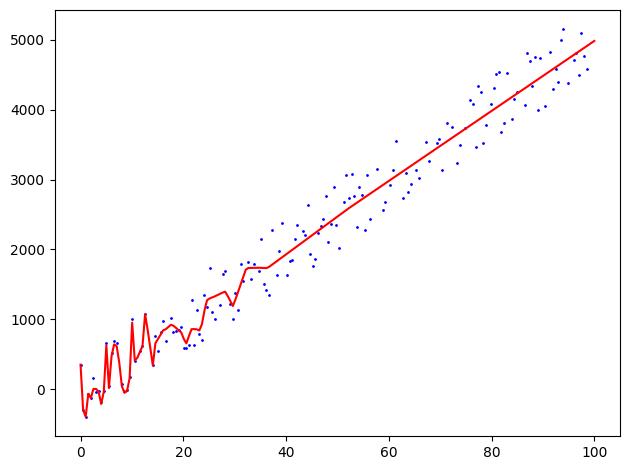

In [8]:
yfit = model.predict(x)
plt.plot(x, yfit, color='red')
plt.scatter(X_train, y_train, s=1, color='blue')

plt.tight_layout()        
plt.show()

# Loading a saved version of the model, zooming in on overfitting 

7/7 [==============================] - 0s 3ms/step


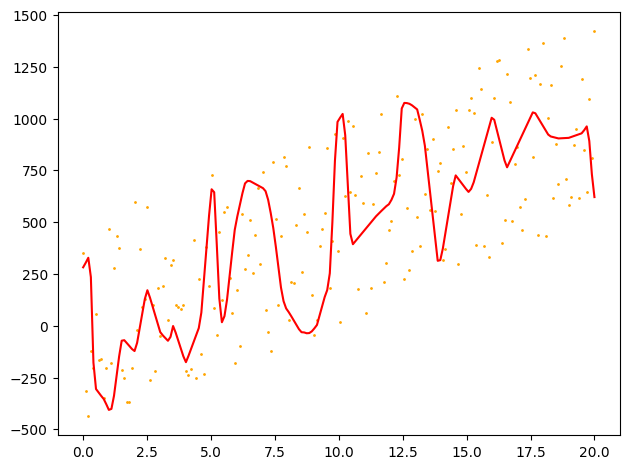

In [6]:

# Note, your filename will surely be different. Uncomment and change the filename to load one.
# Do note, I included this particular model in the github repo so you CAN use it.
# model = load_model('cp77433-50231.29')

# "zooming in" on the data between 0<=x<=20
num_samples = 200
rng = np.random.RandomState(15)

x2 = np.linspace(0, 20, num_samples)
y2 = (50*x2) + ((rng.rand(num_samples) * 1000) - 500)

yfit2 = model.predict(x2)

plt.plot(x2, yfit2, color='red')
plt.scatter(x2, y2, s=1, color='orange')

plt.tight_layout()        
plt.show()

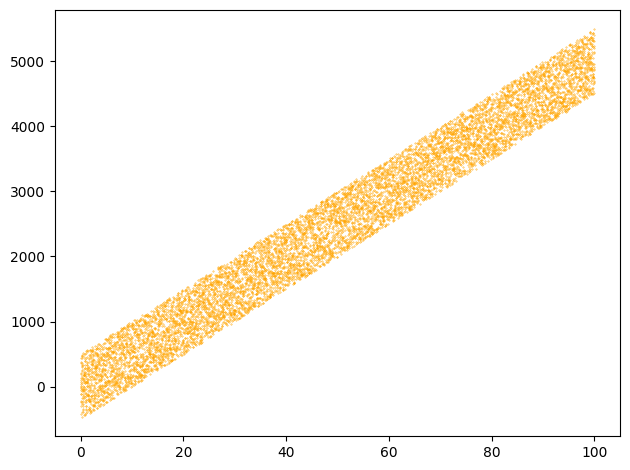

In [3]:
num_samples = 10000
rng = np.random.RandomState(38)

x3 = np.linspace(0, 100, num_samples)
y3 = (50*x3) + ((rng.rand(num_samples) * 1000) - 500)

plt.scatter(x3, y3, s=.1, color='orange')

plt.tight_layout()        
plt.show()

# Demonstrating the lack of overfitting with large data

In [9]:
model2 = Sequential([
    Dense(units=2000, activation='relu', input_shape=(1,)),
    Dense(units=1000, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=1, activation='linear')
])
model2.compile(optimizer="adam", loss='mse')

cp = ModelCheckpoint(
    'more-data-model-{epoch:02d}-{loss:.2f}',
    monitor = 'loss',
    save_best_only=True
)

model2.fit(x3, y3, batch_size=200, epochs=1000, verbose=True, callbacks=[cp])

Epoch 1/10000
49/50 [============================>.] - ETA: 0s - loss: 2487578.0000INFO:tensorflow:Assets written to: more-data-model-01-2439498.75/assets


INFO:tensorflow:Assets written to: more-data-model-01-2439498.75/assets


50/50 [==============================] - 3s 53ms/step - loss: 2439498.7500
Epoch 2/10000
50/50 [==============================] - ETA: 0s - loss: 90436.5703INFO:tensorflow:Assets written to: more-data-model-02-90436.57/assets


INFO:tensorflow:Assets written to: more-data-model-02-90436.57/assets


50/50 [==============================] - 3s 56ms/step - loss: 90436.5703
Epoch 3/10000
49/50 [============================>.] - ETA: 0s - loss: 82525.8281INFO:tensorflow:Assets written to: more-data-model-03-82588.55/assets


INFO:tensorflow:Assets written to: more-data-model-03-82588.55/assets


50/50 [==============================] - 3s 54ms/step - loss: 82588.5469
Epoch 4/10000
50/50 [==============================] - ETA: 0s - loss: 82274.8438INFO:tensorflow:Assets written to: more-data-model-04-82274.84/assets


INFO:tensorflow:Assets written to: more-data-model-04-82274.84/assets


50/50 [==============================] - 3s 52ms/step - loss: 82274.8438
Epoch 5/10000
50/50 [==============================] - 2s 39ms/step - loss: 82322.9531
Epoch 6/10000
50/50 [==============================] - 2s 38ms/step - loss: 82470.1484
Epoch 7/10000
50/50 [==============================] - 2s 39ms/step - loss: 82289.8750
Epoch 8/10000
50/50 [==============================] - 2s 36ms/step - loss: 82647.7812
Epoch 9/10000
50/50 [==============================] - 2s 38ms/step - loss: 82393.6094
Epoch 10/10000
50/50 [==============================] - 2s 38ms/step - loss: 82275.9844
Epoch 11/10000
50/50 [==============================] - 2s 38ms/step - loss: 82421.2969
Epoch 12/10000
50/50 [==============================] - 2s 43ms/step - loss: 82810.5859
Epoch 13/10000
50/50 [==============================] - 2s 40ms/step - loss: 82444.6094
Epoch 14/10000
49/50 [============================>.] - ETA: 0s - loss: 82247.5859INFO:tensorflow:Assets written to: more-data-model-14-8220

INFO:tensorflow:Assets written to: more-data-model-14-82208.70/assets


50/50 [==============================] - 2s 49ms/step - loss: 82208.7031
Epoch 15/10000
50/50 [==============================] - 2s 36ms/step - loss: 82515.5234
Epoch 16/10000
50/50 [==============================] - 2s 36ms/step - loss: 82723.5234
Epoch 17/10000
50/50 [==============================] - 2s 38ms/step - loss: 82773.0703
Epoch 18/10000
50/50 [==============================] - 2s 39ms/step - loss: 82978.1328
Epoch 19/10000
50/50 [==============================] - 2s 38ms/step - loss: 82314.9297
Epoch 20/10000
50/50 [==============================] - 2s 46ms/step - loss: 82512.4375
Epoch 21/10000
50/50 [==============================] - 2s 42ms/step - loss: 82456.4844
Epoch 22/10000
50/50 [==============================] - 2s 39ms/step - loss: 82935.0781
Epoch 23/10000
50/50 [==============================] - 2s 37ms/step - loss: 82413.0078
Epoch 24/10000
50/50 [==============================] - 2s 38ms/step - loss: 83057.1250
Epoch 25/10000
50/50 [=========================

50/50 [==============================] - 2s 43ms/step - loss: 83606.3750
Epoch 108/10000
50/50 [==============================] - 2s 40ms/step - loss: 83292.2891
Epoch 109/10000
50/50 [==============================] - 2s 38ms/step - loss: 84718.8359
Epoch 110/10000
50/50 [==============================] - 2s 39ms/step - loss: 83603.2422
Epoch 111/10000
50/50 [==============================] - 2s 40ms/step - loss: 82933.4375
Epoch 112/10000
50/50 [==============================] - 2s 40ms/step - loss: 82945.4219
Epoch 113/10000
50/50 [==============================] - 2s 38ms/step - loss: 84218.1406
Epoch 114/10000
50/50 [==============================] - 2s 37ms/step - loss: 83053.1641
Epoch 115/10000
50/50 [==============================] - 2s 38ms/step - loss: 83152.3828
Epoch 116/10000
50/50 [==============================] - 2s 37ms/step - loss: 82959.0625
Epoch 117/10000
50/50 [==============================] - 2s 37ms/step - loss: 83085.5781
Epoch 118/10000
50/50 [==============

50/50 [==============================] - 2s 37ms/step - loss: 83184.4453
Epoch 200/10000
50/50 [==============================] - 2s 37ms/step - loss: 83716.1953
Epoch 201/10000
50/50 [==============================] - 2s 37ms/step - loss: 83967.9922
Epoch 202/10000
50/50 [==============================] - 2s 37ms/step - loss: 83107.0469
Epoch 203/10000
50/50 [==============================] - 2s 37ms/step - loss: 82612.0469
Epoch 204/10000
50/50 [==============================] - 2s 36ms/step - loss: 83215.4375
Epoch 205/10000
50/50 [==============================] - 2s 37ms/step - loss: 82919.5781
Epoch 206/10000
50/50 [==============================] - 2s 37ms/step - loss: 83086.6719
Epoch 207/10000
50/50 [==============================] - 2s 37ms/step - loss: 82599.3906
Epoch 208/10000
50/50 [==============================] - 2s 37ms/step - loss: 84591.6719
Epoch 209/10000
50/50 [==============================] - 2s 38ms/step - loss: 85142.4062
Epoch 210/10000
50/50 [==============

50/50 [==============================] - 2s 40ms/step - loss: 82585.0156
Epoch 292/10000
50/50 [==============================] - 2s 42ms/step - loss: 83306.7969
Epoch 293/10000
50/50 [==============================] - 2s 41ms/step - loss: 83525.3203
Epoch 294/10000
50/50 [==============================] - 2s 41ms/step - loss: 83316.3438
Epoch 295/10000
50/50 [==============================] - 2s 41ms/step - loss: 83416.1641
Epoch 296/10000
50/50 [==============================] - 2s 41ms/step - loss: 84690.2891
Epoch 297/10000
50/50 [==============================] - 2s 41ms/step - loss: 82723.8203
Epoch 298/10000
50/50 [==============================] - 2s 41ms/step - loss: 83083.0938
Epoch 299/10000
50/50 [==============================] - 2s 41ms/step - loss: 83465.3281
Epoch 300/10000
50/50 [==============================] - 2s 42ms/step - loss: 83205.3438
Epoch 301/10000
50/50 [==============================] - 2s 41ms/step - loss: 83353.1406
Epoch 302/10000
50/50 [==============

INFO:tensorflow:Assets written to: more-data-model-309-82193.60/assets


50/50 [==============================] - 3s 56ms/step - loss: 82193.6016
Epoch 310/10000
50/50 [==============================] - 2s 41ms/step - loss: 83248.0859
Epoch 311/10000
50/50 [==============================] - 2s 40ms/step - loss: 83193.8594
Epoch 312/10000
50/50 [==============================] - 2s 40ms/step - loss: 83164.8125
Epoch 313/10000
50/50 [==============================] - 2s 41ms/step - loss: 83017.4062
Epoch 314/10000
50/50 [==============================] - 2s 42ms/step - loss: 84068.7891
Epoch 315/10000
50/50 [==============================] - 2s 41ms/step - loss: 85246.0703
Epoch 316/10000
50/50 [==============================] - 2s 42ms/step - loss: 82892.6094
Epoch 317/10000
50/50 [==============================] - 2s 41ms/step - loss: 83383.7578
Epoch 318/10000
50/50 [==============================] - 2s 41ms/step - loss: 83626.0000
Epoch 319/10000
50/50 [==============================] - 2s 43ms/step - loss: 83219.9453
Epoch 320/10000
50/50 [==============

50/50 [==============================] - 2s 40ms/step - loss: 84124.3438
Epoch 402/10000
50/50 [==============================] - 2s 41ms/step - loss: 84186.8125
Epoch 403/10000
50/50 [==============================] - 2s 41ms/step - loss: 83634.1875
Epoch 404/10000
50/50 [==============================] - 2s 41ms/step - loss: 83200.0859
Epoch 405/10000
50/50 [==============================] - 2s 42ms/step - loss: 83280.8672
Epoch 406/10000
50/50 [==============================] - 2s 42ms/step - loss: 83966.0078
Epoch 407/10000
50/50 [==============================] - 2s 40ms/step - loss: 82540.4062
Epoch 408/10000
50/50 [==============================] - 2s 41ms/step - loss: 82780.1016
Epoch 409/10000
50/50 [==============================] - 2s 40ms/step - loss: 82734.4766
Epoch 410/10000
50/50 [==============================] - 2s 40ms/step - loss: 83307.4922
Epoch 411/10000
50/50 [==============================] - 2s 40ms/step - loss: 83943.6953
Epoch 412/10000
50/50 [==============

50/50 [==============================] - 2s 43ms/step - loss: 83924.3047
Epoch 494/10000
50/50 [==============================] - 2s 43ms/step - loss: 83336.8047
Epoch 495/10000
50/50 [==============================] - 2s 42ms/step - loss: 82834.7188
Epoch 496/10000
50/50 [==============================] - 2s 42ms/step - loss: 82561.3750
Epoch 497/10000
50/50 [==============================] - 2s 42ms/step - loss: 82415.0703
Epoch 498/10000
50/50 [==============================] - 2s 41ms/step - loss: 83719.1875
Epoch 499/10000
50/50 [==============================] - 2s 42ms/step - loss: 82725.3984
Epoch 500/10000
50/50 [==============================] - 2s 42ms/step - loss: 82542.5938
Epoch 501/10000
50/50 [==============================] - 2s 41ms/step - loss: 83667.9297
Epoch 502/10000
50/50 [==============================] - 2s 41ms/step - loss: 82917.6094
Epoch 503/10000
50/50 [==============================] - 2s 43ms/step - loss: 83256.8125
Epoch 504/10000
50/50 [==============

50/50 [==============================] - 2s 41ms/step - loss: 82926.7031
Epoch 586/10000
50/50 [==============================] - 2s 42ms/step - loss: 83190.7188
Epoch 587/10000
50/50 [==============================] - 2s 43ms/step - loss: 82325.5859
Epoch 588/10000
50/50 [==============================] - 2s 42ms/step - loss: 82642.0234
Epoch 589/10000
50/50 [==============================] - 2s 42ms/step - loss: 82901.6094
Epoch 590/10000
50/50 [==============================] - 2s 43ms/step - loss: 82733.2891
Epoch 591/10000
50/50 [==============================] - 2s 43ms/step - loss: 84027.6953
Epoch 592/10000
50/50 [==============================] - 2s 42ms/step - loss: 83335.0156
Epoch 593/10000
50/50 [==============================] - 2s 41ms/step - loss: 82518.8047
Epoch 594/10000
50/50 [==============================] - 2s 41ms/step - loss: 82699.1719
Epoch 595/10000
50/50 [==============================] - 2s 42ms/step - loss: 83627.5703
Epoch 596/10000
50/50 [==============

50/50 [==============================] - 2s 36ms/step - loss: 82836.4453
Epoch 678/10000
50/50 [==============================] - 2s 37ms/step - loss: 83325.6875
Epoch 679/10000
50/50 [==============================] - 2s 37ms/step - loss: 83181.1328
Epoch 680/10000
50/50 [==============================] - 2s 37ms/step - loss: 82683.2969
Epoch 681/10000
50/50 [==============================] - 2s 37ms/step - loss: 82295.4766
Epoch 682/10000
50/50 [==============================] - 2s 38ms/step - loss: 82832.1172
Epoch 683/10000
50/50 [==============================] - 2s 38ms/step - loss: 82632.4531
Epoch 684/10000
50/50 [==============================] - 2s 38ms/step - loss: 83375.0312
Epoch 685/10000
50/50 [==============================] - 2s 37ms/step - loss: 83465.8281
Epoch 686/10000
50/50 [==============================] - 2s 37ms/step - loss: 83606.1094
Epoch 687/10000
50/50 [==============================] - 2s 37ms/step - loss: 83310.9531
Epoch 688/10000
50/50 [==============

INFO:tensorflow:Assets written to: more-data-model-718-82179.52/assets


50/50 [==============================] - 2s 50ms/step - loss: 82179.5156
Epoch 719/10000
50/50 [==============================] - 2s 37ms/step - loss: 82372.8672
Epoch 720/10000
50/50 [==============================] - 2s 37ms/step - loss: 83099.4766
Epoch 721/10000
50/50 [==============================] - 2s 37ms/step - loss: 83874.0156
Epoch 722/10000
50/50 [==============================] - 2s 37ms/step - loss: 82528.4062
Epoch 723/10000
50/50 [==============================] - 2s 37ms/step - loss: 82468.0391
Epoch 724/10000
50/50 [==============================] - 2s 37ms/step - loss: 82801.9375
Epoch 725/10000
50/50 [==============================] - 2s 38ms/step - loss: 83321.9062
Epoch 726/10000
50/50 [==============================] - 2s 37ms/step - loss: 82699.7969
Epoch 727/10000
50/50 [==============================] - 2s 37ms/step - loss: 83075.2891
Epoch 728/10000
50/50 [==============================] - 2s 38ms/step - loss: 82681.0625
Epoch 729/10000
50/50 [==============

50/50 [==============================] - 2s 42ms/step - loss: 82660.0703
Epoch 811/10000
50/50 [==============================] - 2s 43ms/step - loss: 82891.5234
Epoch 812/10000
50/50 [==============================] - 2s 42ms/step - loss: 83577.7812
Epoch 813/10000
50/50 [==============================] - 2s 43ms/step - loss: 83470.6328
Epoch 814/10000
50/50 [==============================] - 2s 44ms/step - loss: 83216.7812
Epoch 815/10000
50/50 [==============================] - 2s 48ms/step - loss: 83567.4609
Epoch 816/10000
50/50 [==============================] - 3s 56ms/step - loss: 83844.7422
Epoch 817/10000
50/50 [==============================] - 2s 44ms/step - loss: 82680.8828
Epoch 818/10000
50/50 [==============================] - 2s 43ms/step - loss: 82856.3359
Epoch 819/10000
50/50 [==============================] - 2s 45ms/step - loss: 83370.8438
Epoch 820/10000
50/50 [==============================] - 2s 44ms/step - loss: 83274.0156
Epoch 821/10000
50/50 [==============

50/50 [==============================] - 2s 37ms/step - loss: 82356.9375
Epoch 903/10000
50/50 [==============================] - 2s 38ms/step - loss: 83474.3984
Epoch 904/10000
50/50 [==============================] - 2s 38ms/step - loss: 82767.2266
Epoch 905/10000
50/50 [==============================] - 2s 37ms/step - loss: 82895.6328
Epoch 906/10000
50/50 [==============================] - 2s 38ms/step - loss: 84480.6094
Epoch 907/10000
50/50 [==============================] - 2s 37ms/step - loss: 82818.2734
Epoch 908/10000
50/50 [==============================] - 2s 37ms/step - loss: 83056.9688
Epoch 909/10000
50/50 [==============================] - 2s 38ms/step - loss: 82727.0547
Epoch 910/10000
50/50 [==============================] - 2s 38ms/step - loss: 83376.0156
Epoch 911/10000
50/50 [==============================] - 2s 38ms/step - loss: 82760.3906
Epoch 912/10000
50/50 [==============================] - 2s 37ms/step - loss: 82411.7656
Epoch 913/10000
50/50 [==============

50/50 [==============================] - 2s 37ms/step - loss: 82370.4688
Epoch 995/10000
50/50 [==============================] - 2s 38ms/step - loss: 82749.4375
Epoch 996/10000
50/50 [==============================] - 2s 37ms/step - loss: 82651.9375
Epoch 997/10000
50/50 [==============================] - 2s 37ms/step - loss: 82715.6562
Epoch 998/10000
50/50 [==============================] - 2s 37ms/step - loss: 82303.2266
Epoch 999/10000
50/50 [==============================] - 2s 37ms/step - loss: 82542.4609
Epoch 1000/10000
50/50 [==============================] - 2s 37ms/step - loss: 82605.2500
Epoch 1001/10000
50/50 [==============================] - 2s 38ms/step - loss: 82626.6250
Epoch 1002/10000
50/50 [==============================] - 2s 36ms/step - loss: 82858.5156
Epoch 1003/10000
50/50 [==============================] - 2s 39ms/step - loss: 82764.5234
Epoch 1004/10000
50/50 [==============================] - 2s 41ms/step - loss: 82600.7578
Epoch 1005/10000
50/50 [========

313/313 [==============================] - 1s 3ms/step


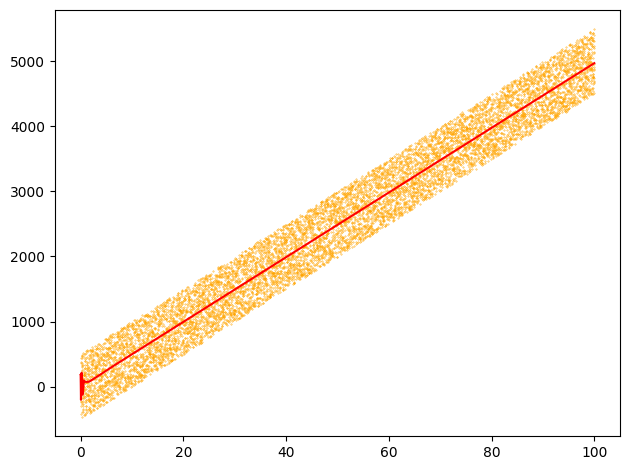

In [5]:

# model2 = load_model('more-data-model-2052-81975.55')
yfit3 = model2.predict(x3)
plt.plot(x3, yfit3, color='red')

plt.scatter(x3, y3, s=.1, color='orange')

plt.tight_layout()        
plt.show()